#  Introdução a Linguagem de Programação Python

## Trabalho Final

### Aluno: Igor Augusto Campos Barreto

## **What crop to grow ?**

Link_Kaggle: https://www.kaggle.com/code/atharvaingle/what-crop-to-grow/notebook

### Sobre o dataset:


A agricultura de precisão é uma técnica agrícola moderna que utiliza os dados características das culturas e seu ambiente como: tipos de solo, dados de rendimento da cultura, condições climáticas e sugere aos agricultores qual cultura ideal para cultivar em suas fazendas para obter o máximo rendimento e lucro. Esta técnica pode reduzir as quebras de safra e ajudará os agricultores
para tomar decisões informadas sobre sua estratégia agrícola.


A fim de mitigar a crise agrária no status quo atual, há necessidade de melhores sistemas de recomendação para aliviar a crise, ajudando os agricultores a tomar uma decisão informada antes de iniciar o cultivo das culturas.

### Objetivo:


Recomendar as melhores culturas a serem cultivadas pelos agricultores com base em vários parâmetros e ajudá-los a tomar uma decisão informada antes do cultivo


## Modelos
  * Para realizar as recomendações das culturas, foram selecionados alguns algoritmos de classificação, de modo a recomendar a cultura a ser plantada com  base nas características dos Macronutrientes(N, P, K), pH, umidade do solo, temperatura e chuva.

    * I- Regressão Logística
    * II- SVM
    * III- KNN
    * IV- Arvores de decisão
    * V- Random Forest
    * VI- Votting
    * VII- Bagging
      * VII.i - Bagging SVM
      * VII.ii - Bagging DecisionTree
    * VIII- XGBoost
      * VIII.i- ADABoost
      * VIII.ii- GradientBoost
      * VIII.iii - XGBOOST


## **I. Carregamento do Dataset:**

In [80]:
!pip install -q scipy
!pip install -q xgboost

In [2]:
# Importando as biblioteca
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np

In [4]:
## Carregando a base de  dados What Crop Grow ? --> Crop_recomendations. csv
crop_recomendation =  pd.read_csv('Crop_recommendation.csv', sep= ',')
crop_recomendation.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [5]:
# Verificando o numero de observações no dataset e o número de variáveis
crop_recomendation.shape

(2200, 8)

In [6]:
# Verificando o nome das variáveis
crop_recomendation.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
# A variével dependente para o problema em questão é a variável **label**
# A variável label contem o nome das culturas que queremos prever/ indicar de acordo com as características do ambiente de cultivo
# Verificando quais são as culturas (classes da variável label) presentes no dataset

crop_recomendation['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
# Verificando o número de culturas (classes) presentes na variável label
num_unique_labels = crop_recomendation['label'].nunique()
num_unique_labels

22

In [9]:
# verificando o numero de observações por classe
class_counts = crop_recomendation['label'].value_counts()
print(class_counts)

## o dataset tem as classes balanceadas com 100 observações em cada classe

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


In [10]:
# verificando o tipo das variáveis
crop_recomendation.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


# Características do dataset

* 2200 linhas
* 8 colunas

#Catalogo de dados

## Variáveis independentes


* N - Nitrogenio - type: int64;
* P - Fósforo - type: int64;
* K - Potássio - type: int64;
* temperature - temperatua (ºC) - type: float64;
* humidity - umidade do solo - type: float64;
* ph - pH do solo - type: float64;
* rainfall - média de chuva do local - type: float64;

## Variável dependente
* label - cultura indicada para ser plantada no local - type: str

* 22 culturas:

  * rice - arroz;
  * maize - milho;
  * chickpea;
  * kidneybeans - feijão;
  * pigeonpeas -  ervilha d'angola ;
  * mothbeans - Feijão mariposa;
  * mungbean - feijão mungo;
  * blackgram - grama preta;
  * lentil - lentilha;
  * pomegranate - romã;
  * banana - banana;
  * mango - manga;
  * grapes - uva;
  * watermelon - melância;
  * muskmelon - melão;
  * apple - maçã;
  * orange - laranja;
  * papaya - mamão;
  * coconut - coco;
  * cotton - algdão;
  * jute -juta;
  * coffee - café.


  * Dataset balanceado com 100 observações/classe

## **II. Processamento dos dados**


In [11]:
# Análise das estatísticas do dataset
crop_recomendation.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

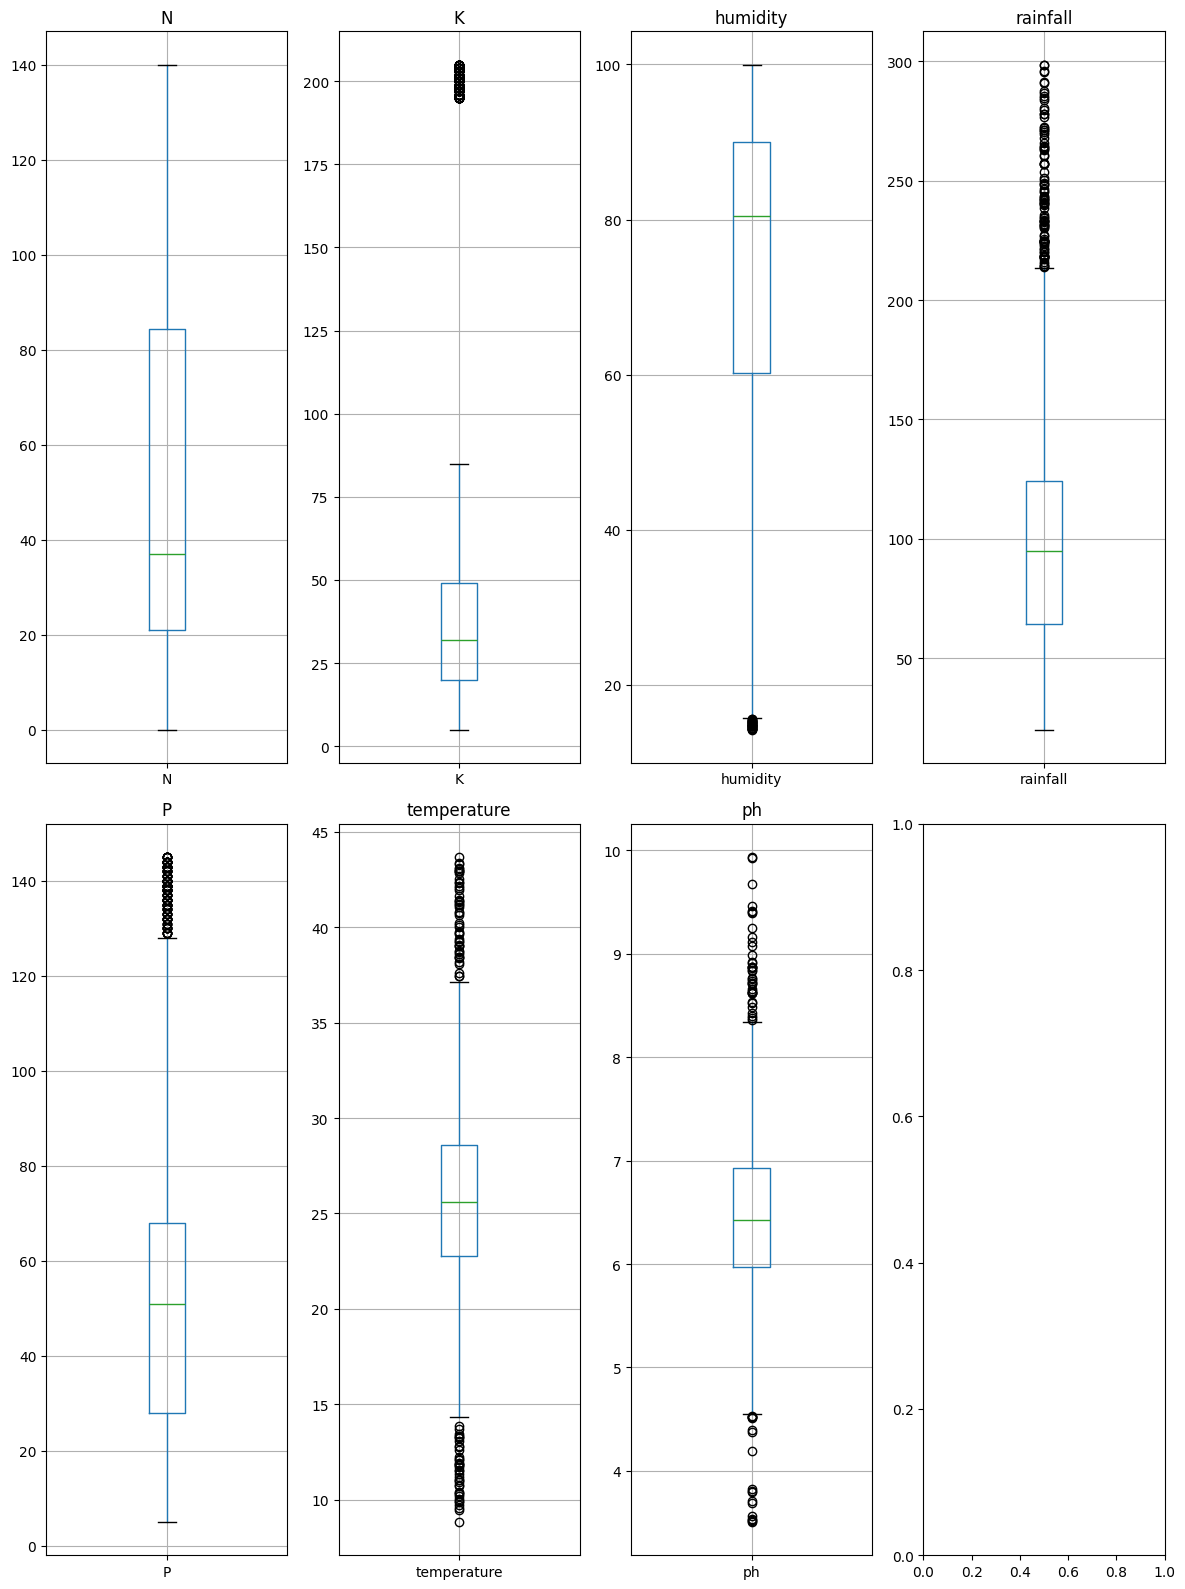

In [12]:
##Boxplot das variáveis
import matplotlib.pyplot as plt

# Definindo a disposição dos subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 16))

# Variáveis para criar os boxplots
variables = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Criando os boxplots
for i, variable in enumerate(variables):
    col = i // 2
    row = i % 2
    ax = axes[row, col]
    crop_recomendation.boxplot(column=variable, ax=ax)
    ax.set_title(variable)

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()

## os boxplots gerados a partir dos dados gerais do dataset são apresentados abaixo:
## Para todas as variáveis são observados valores outliers

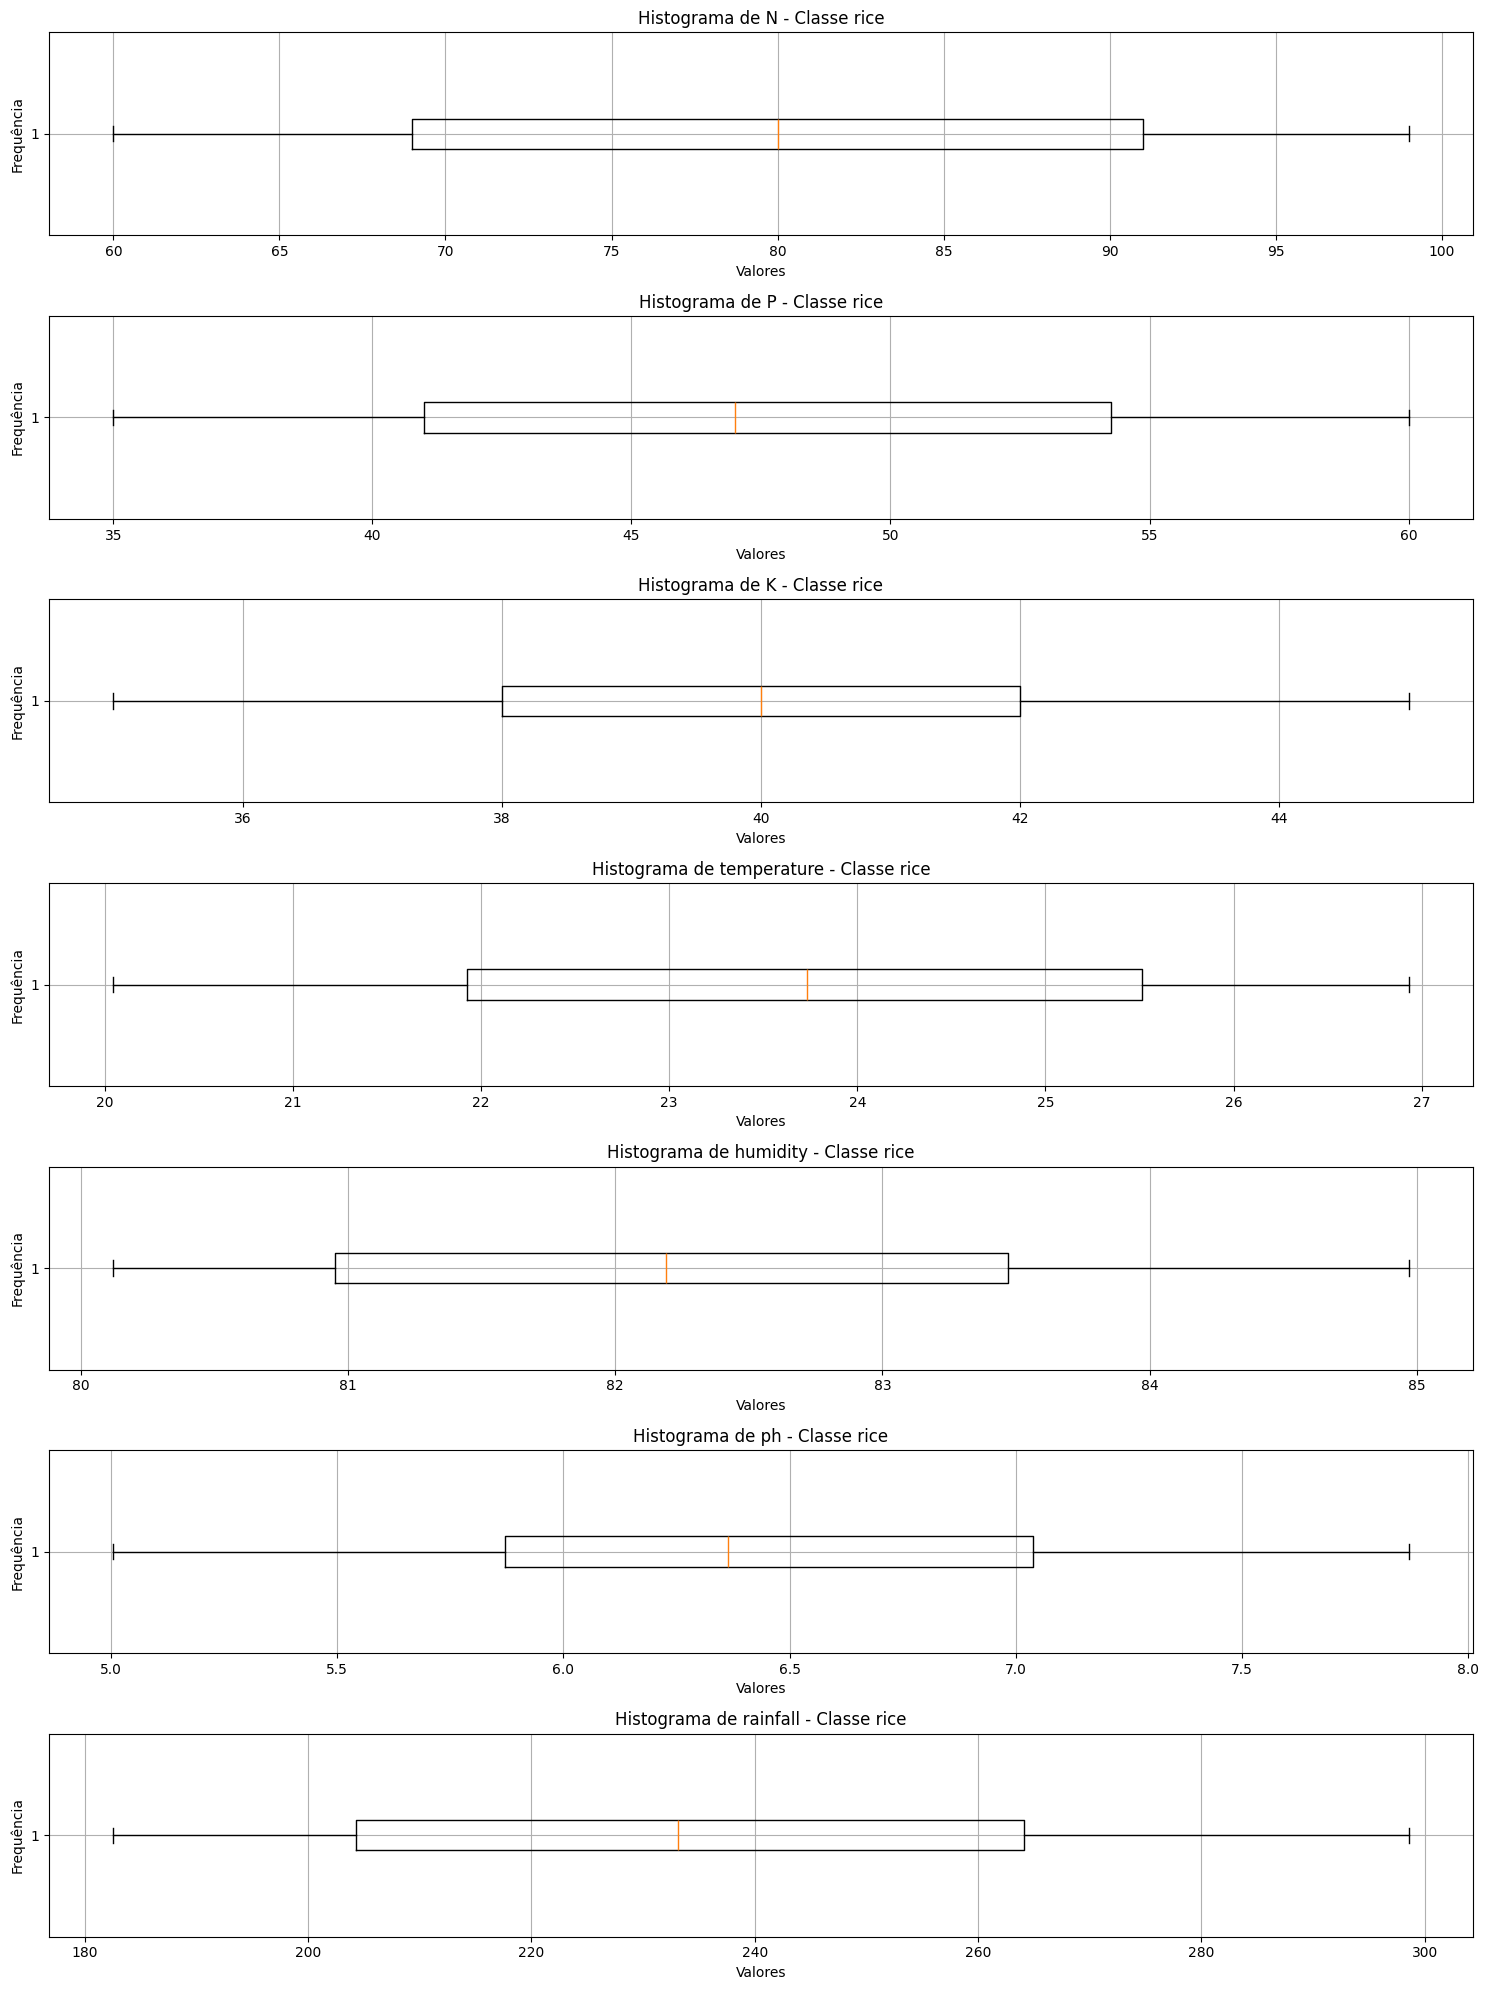

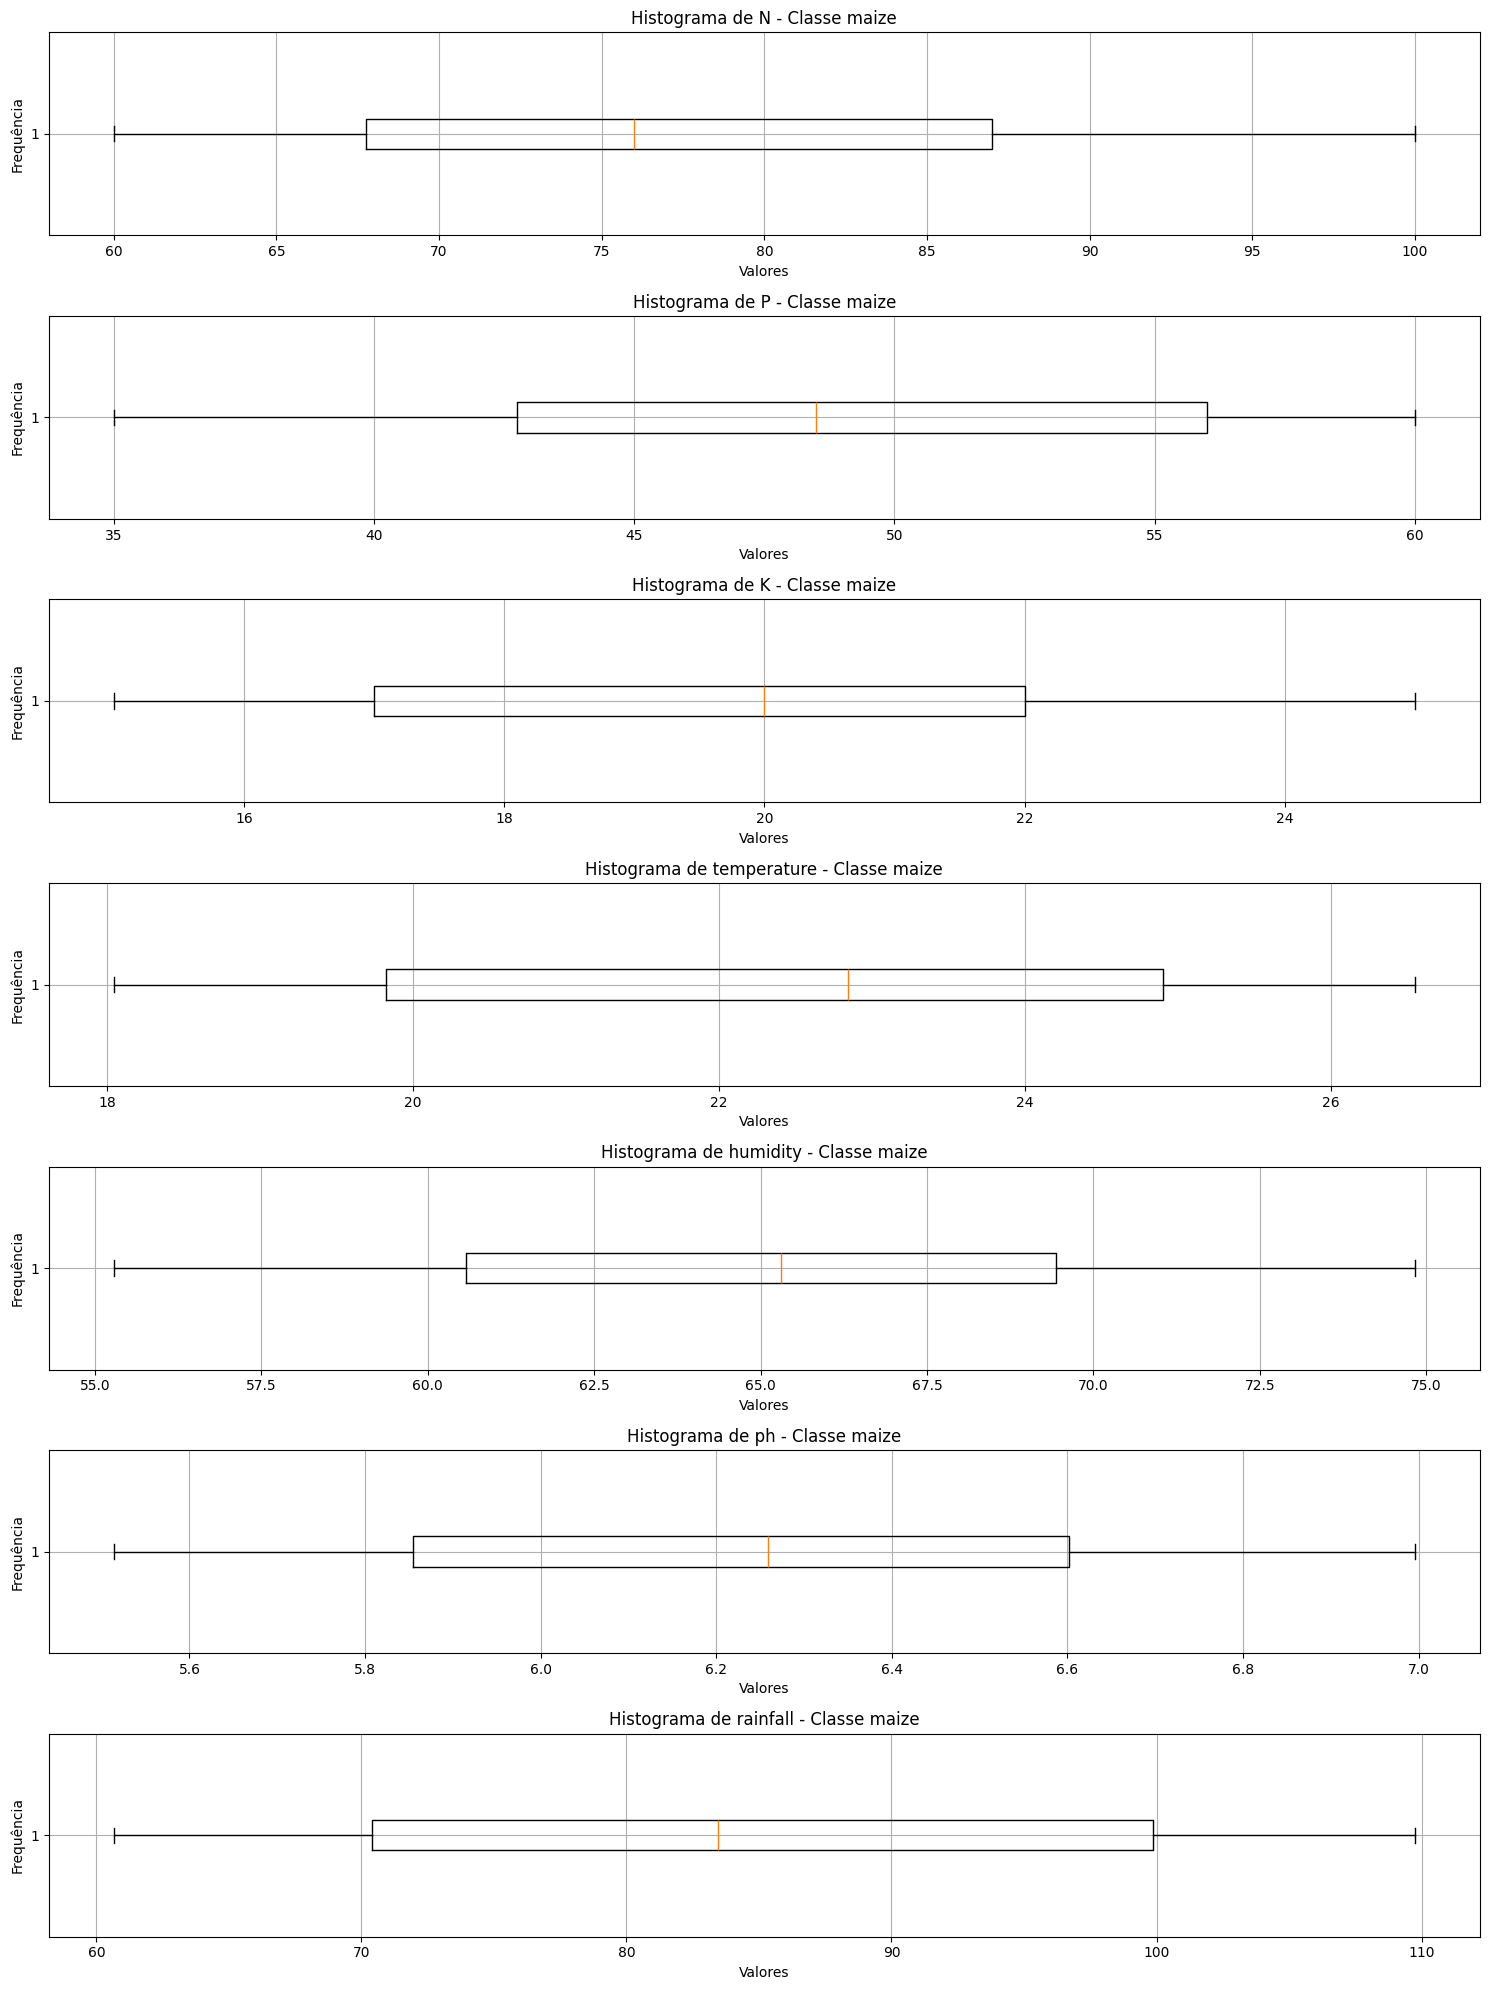

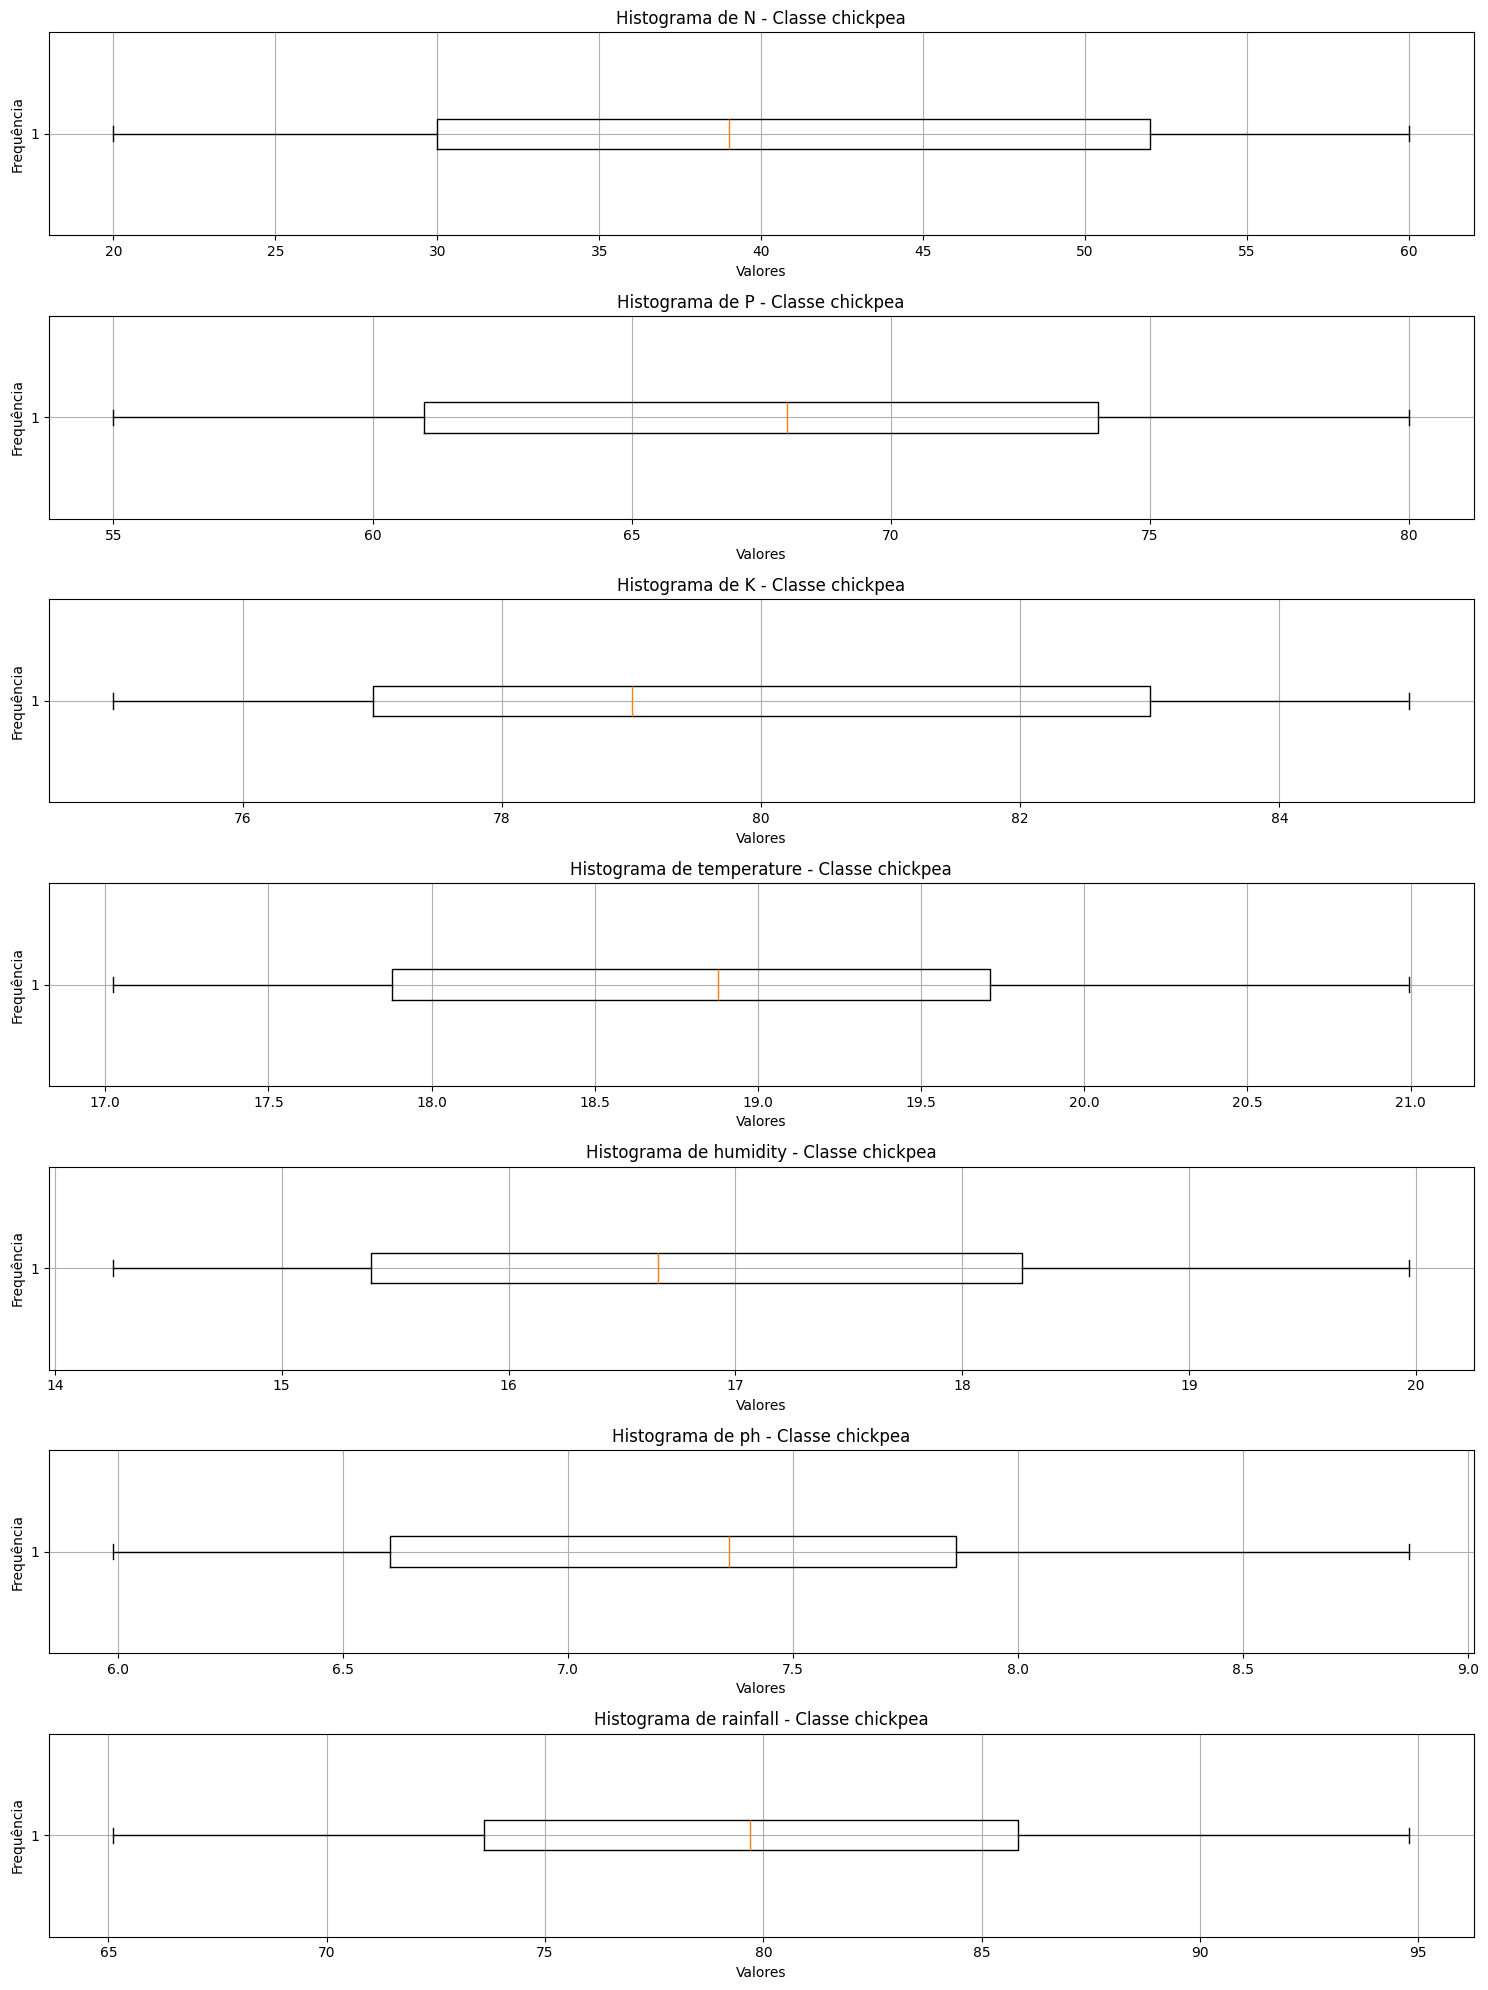

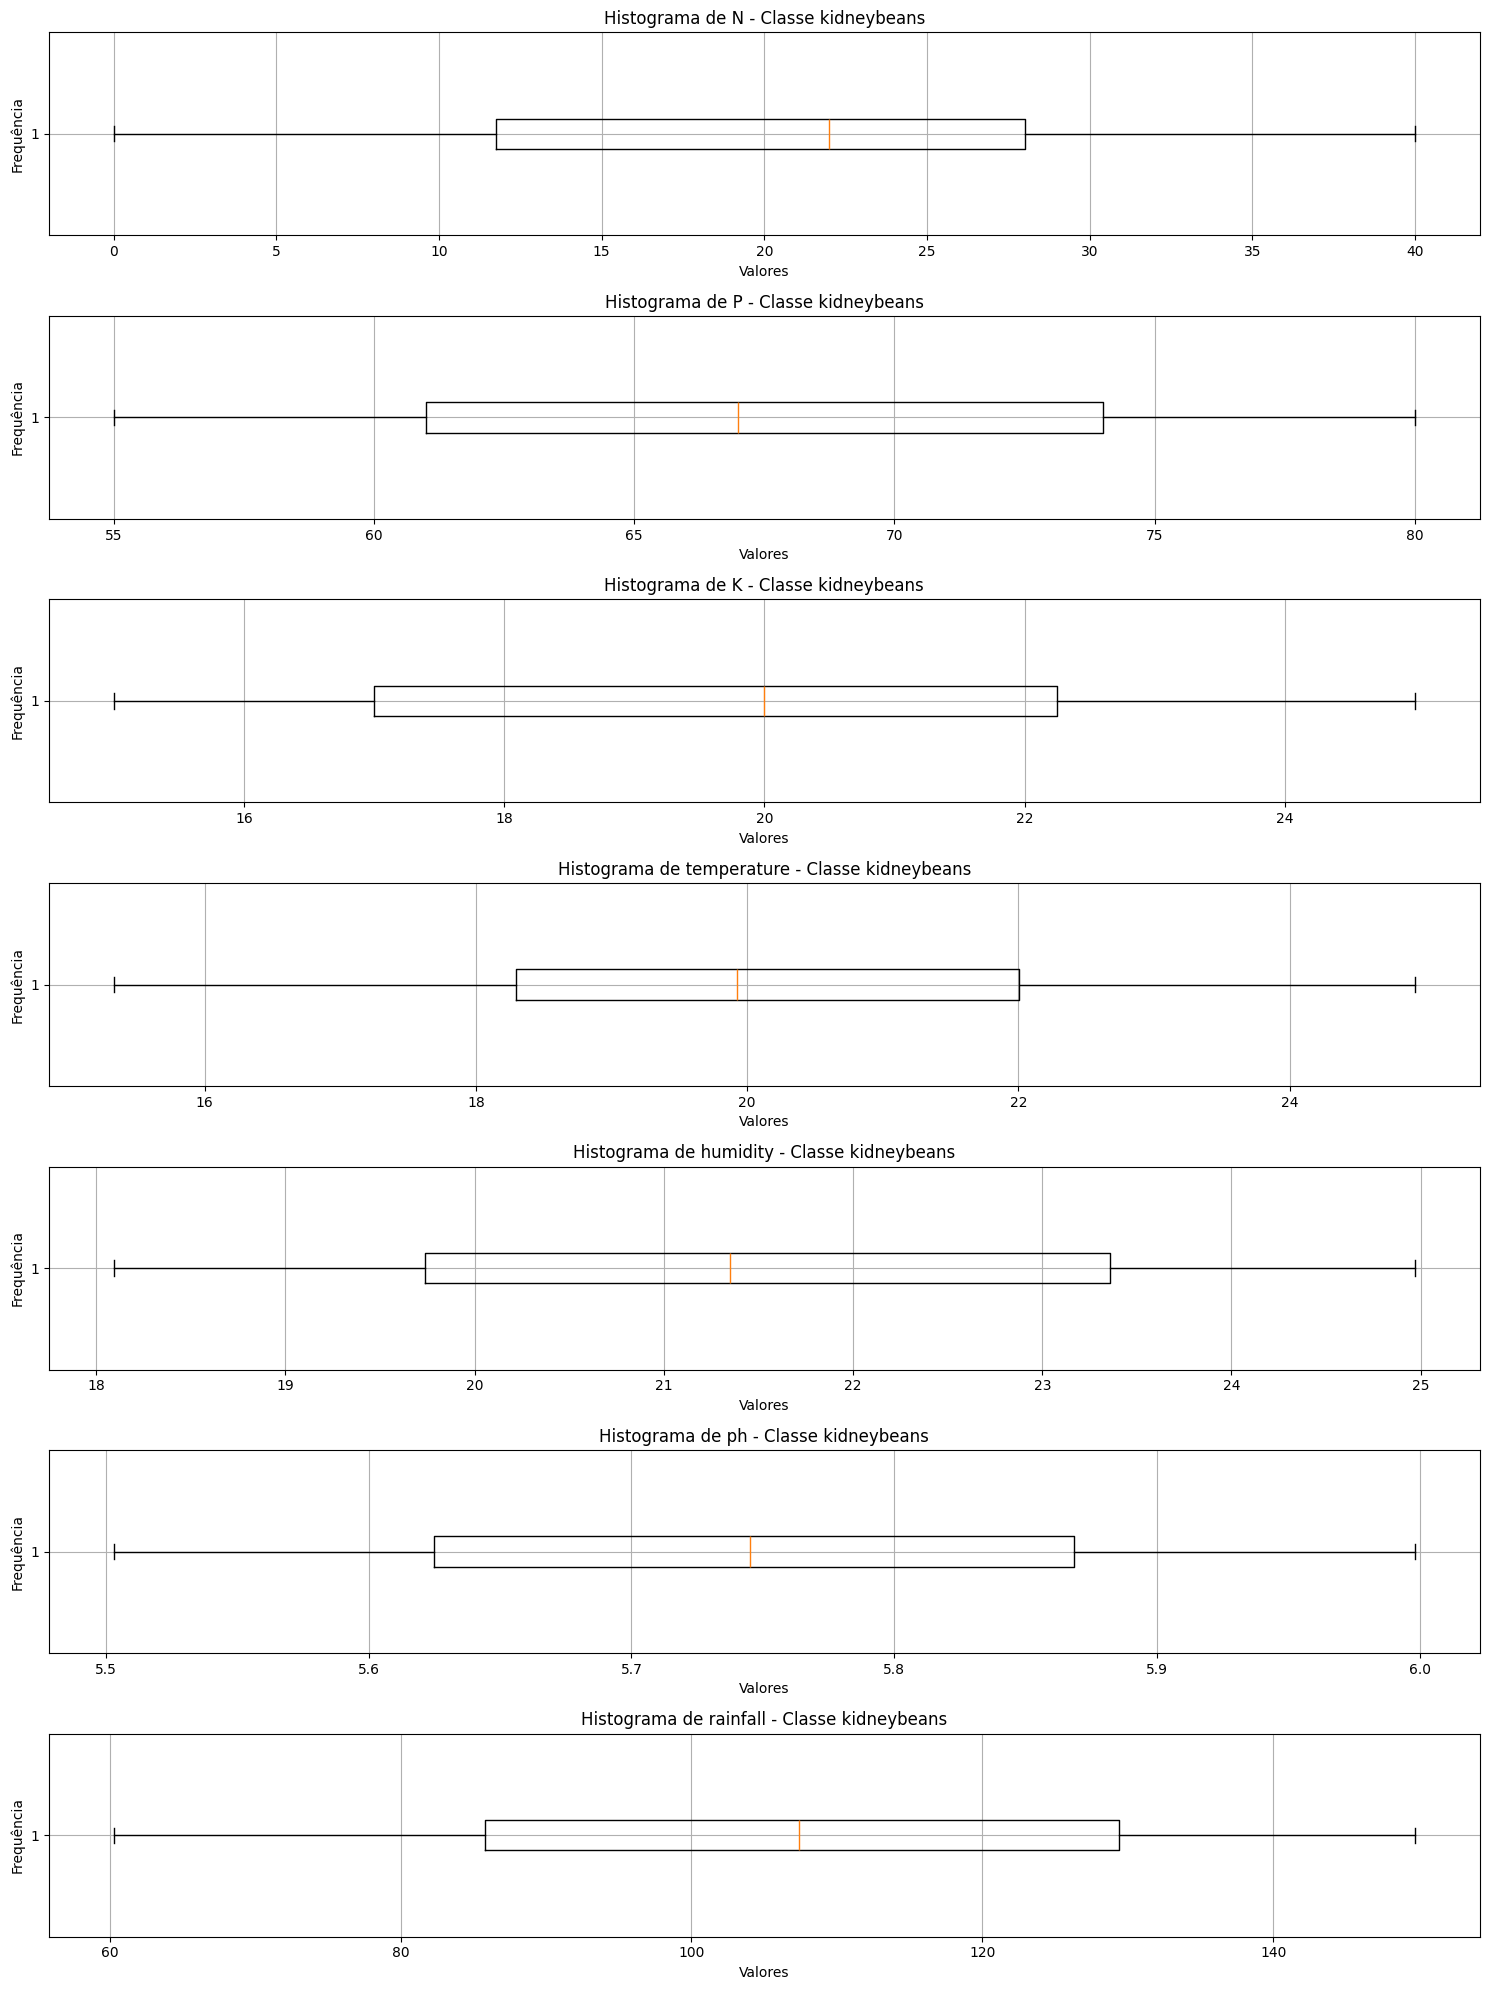

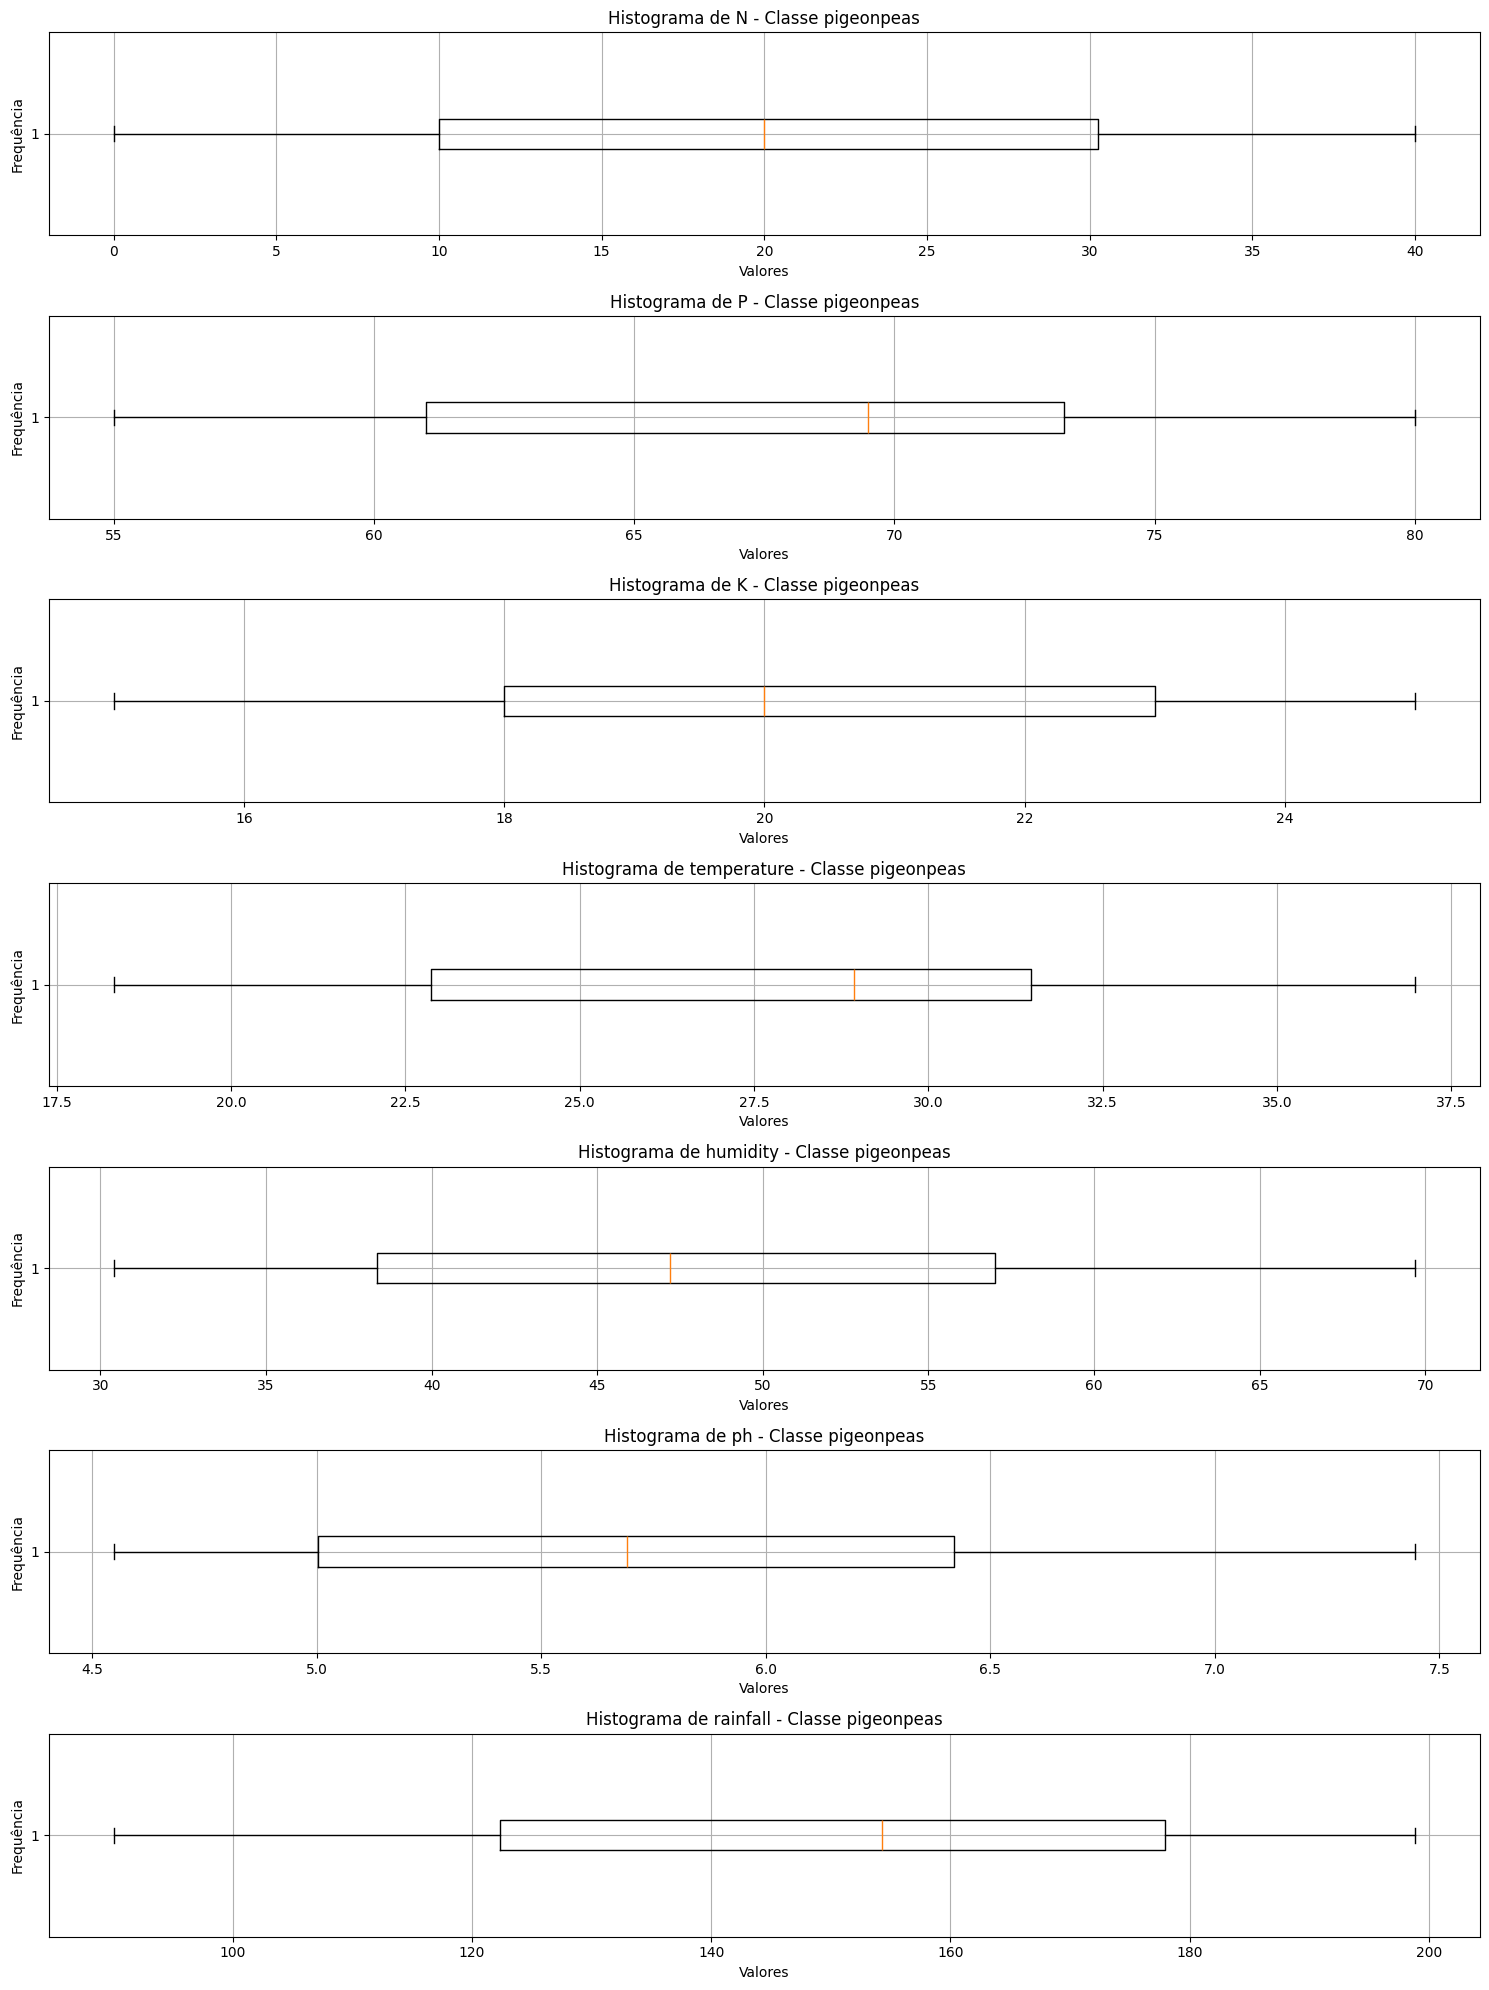

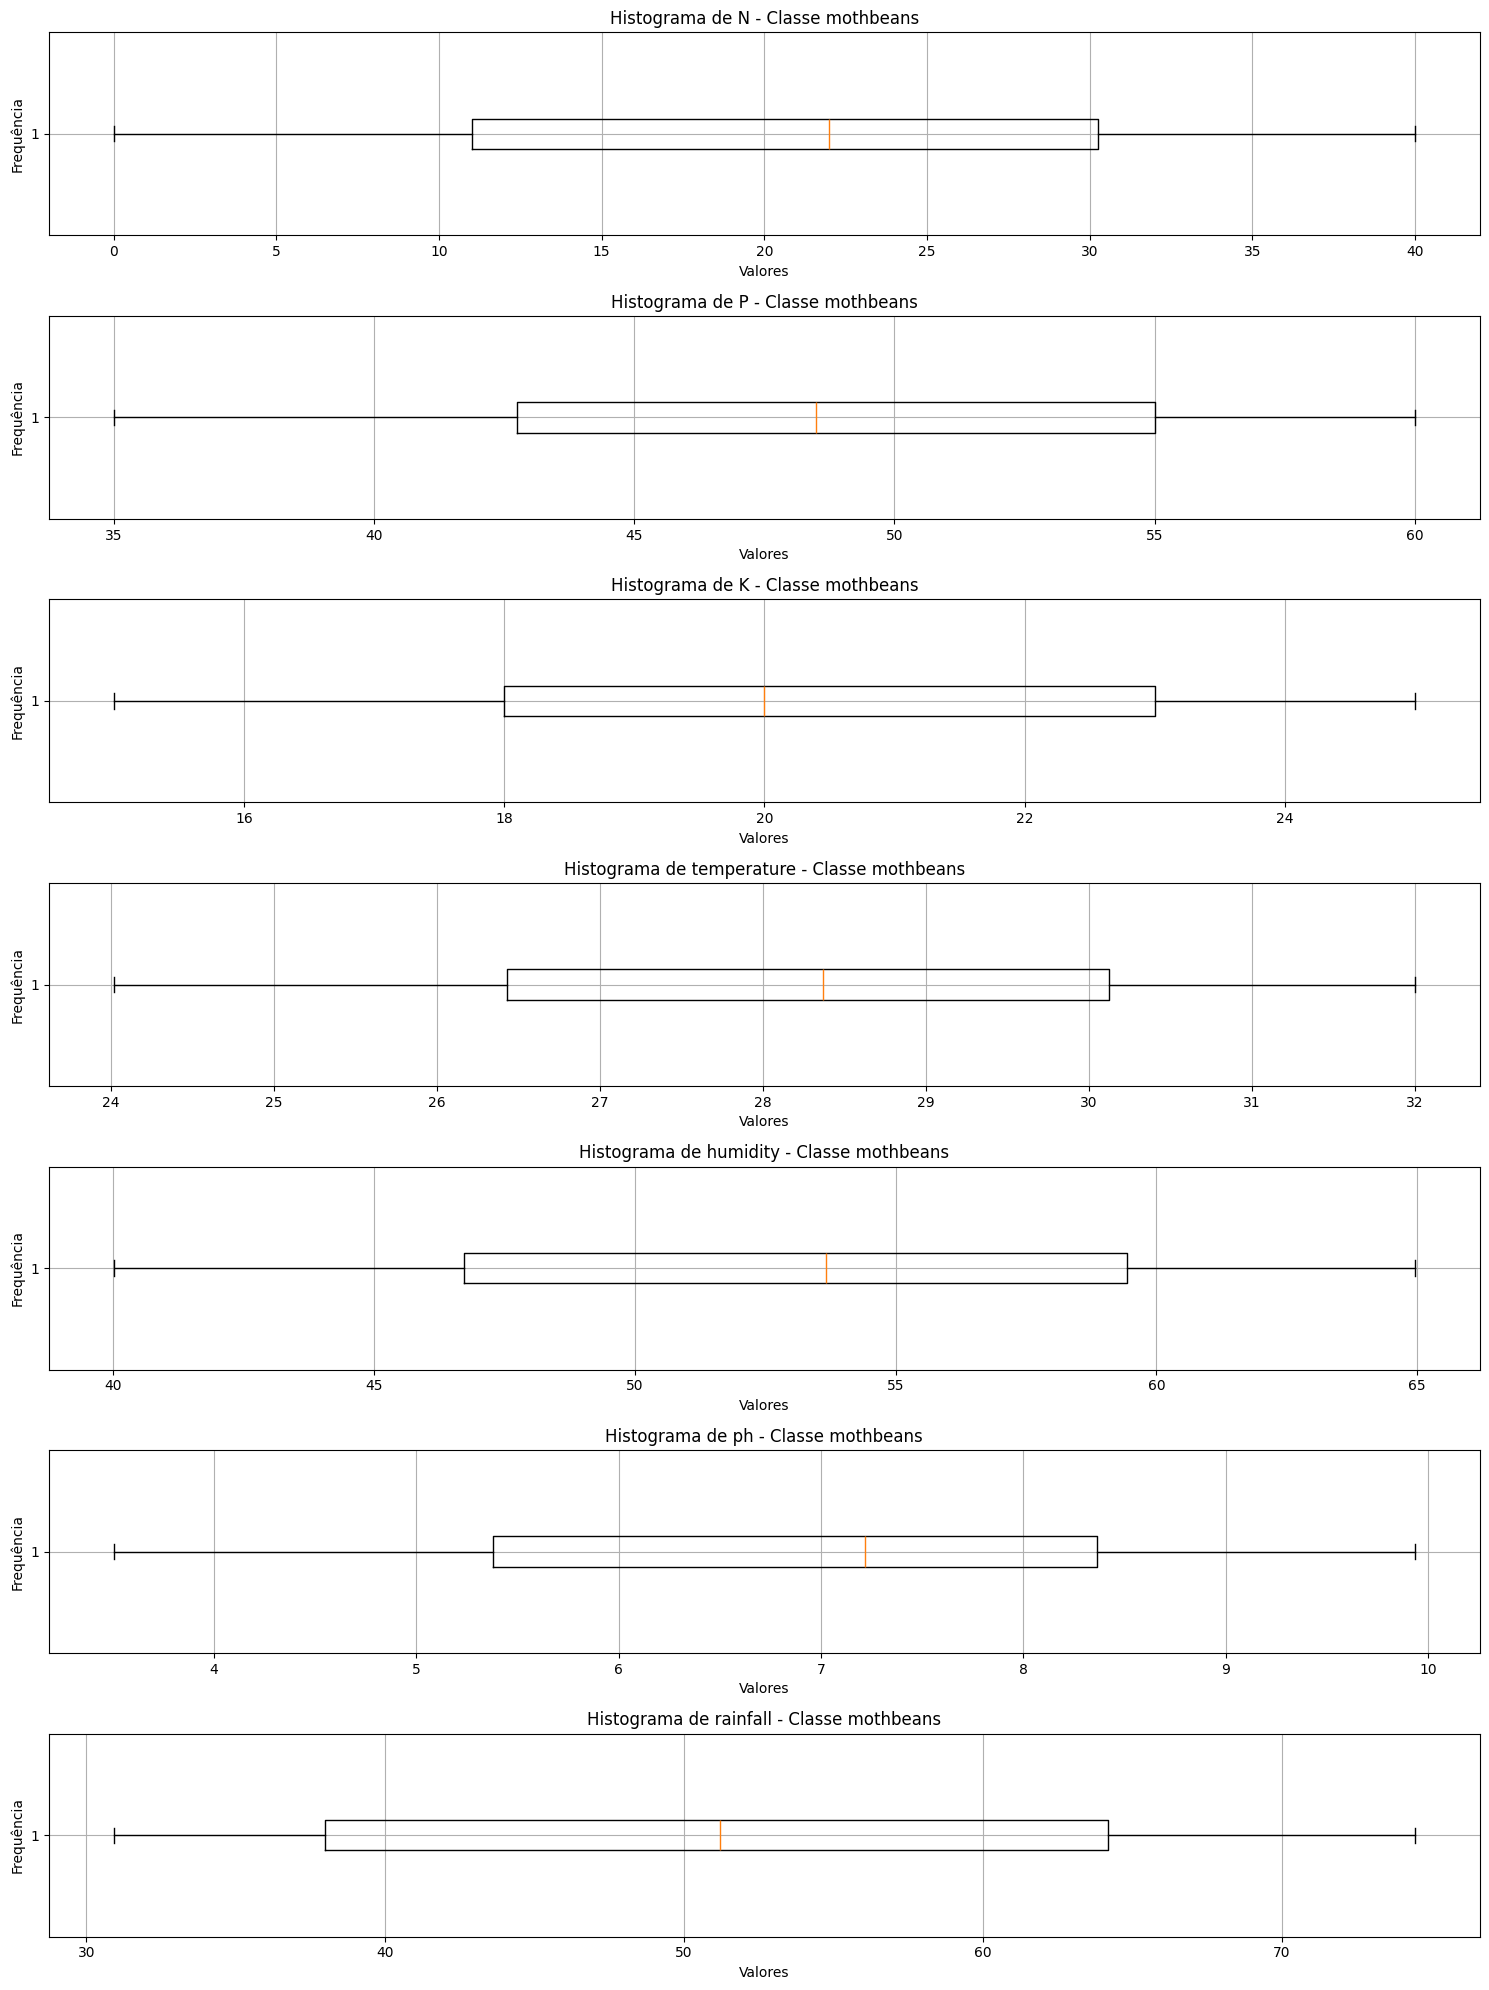

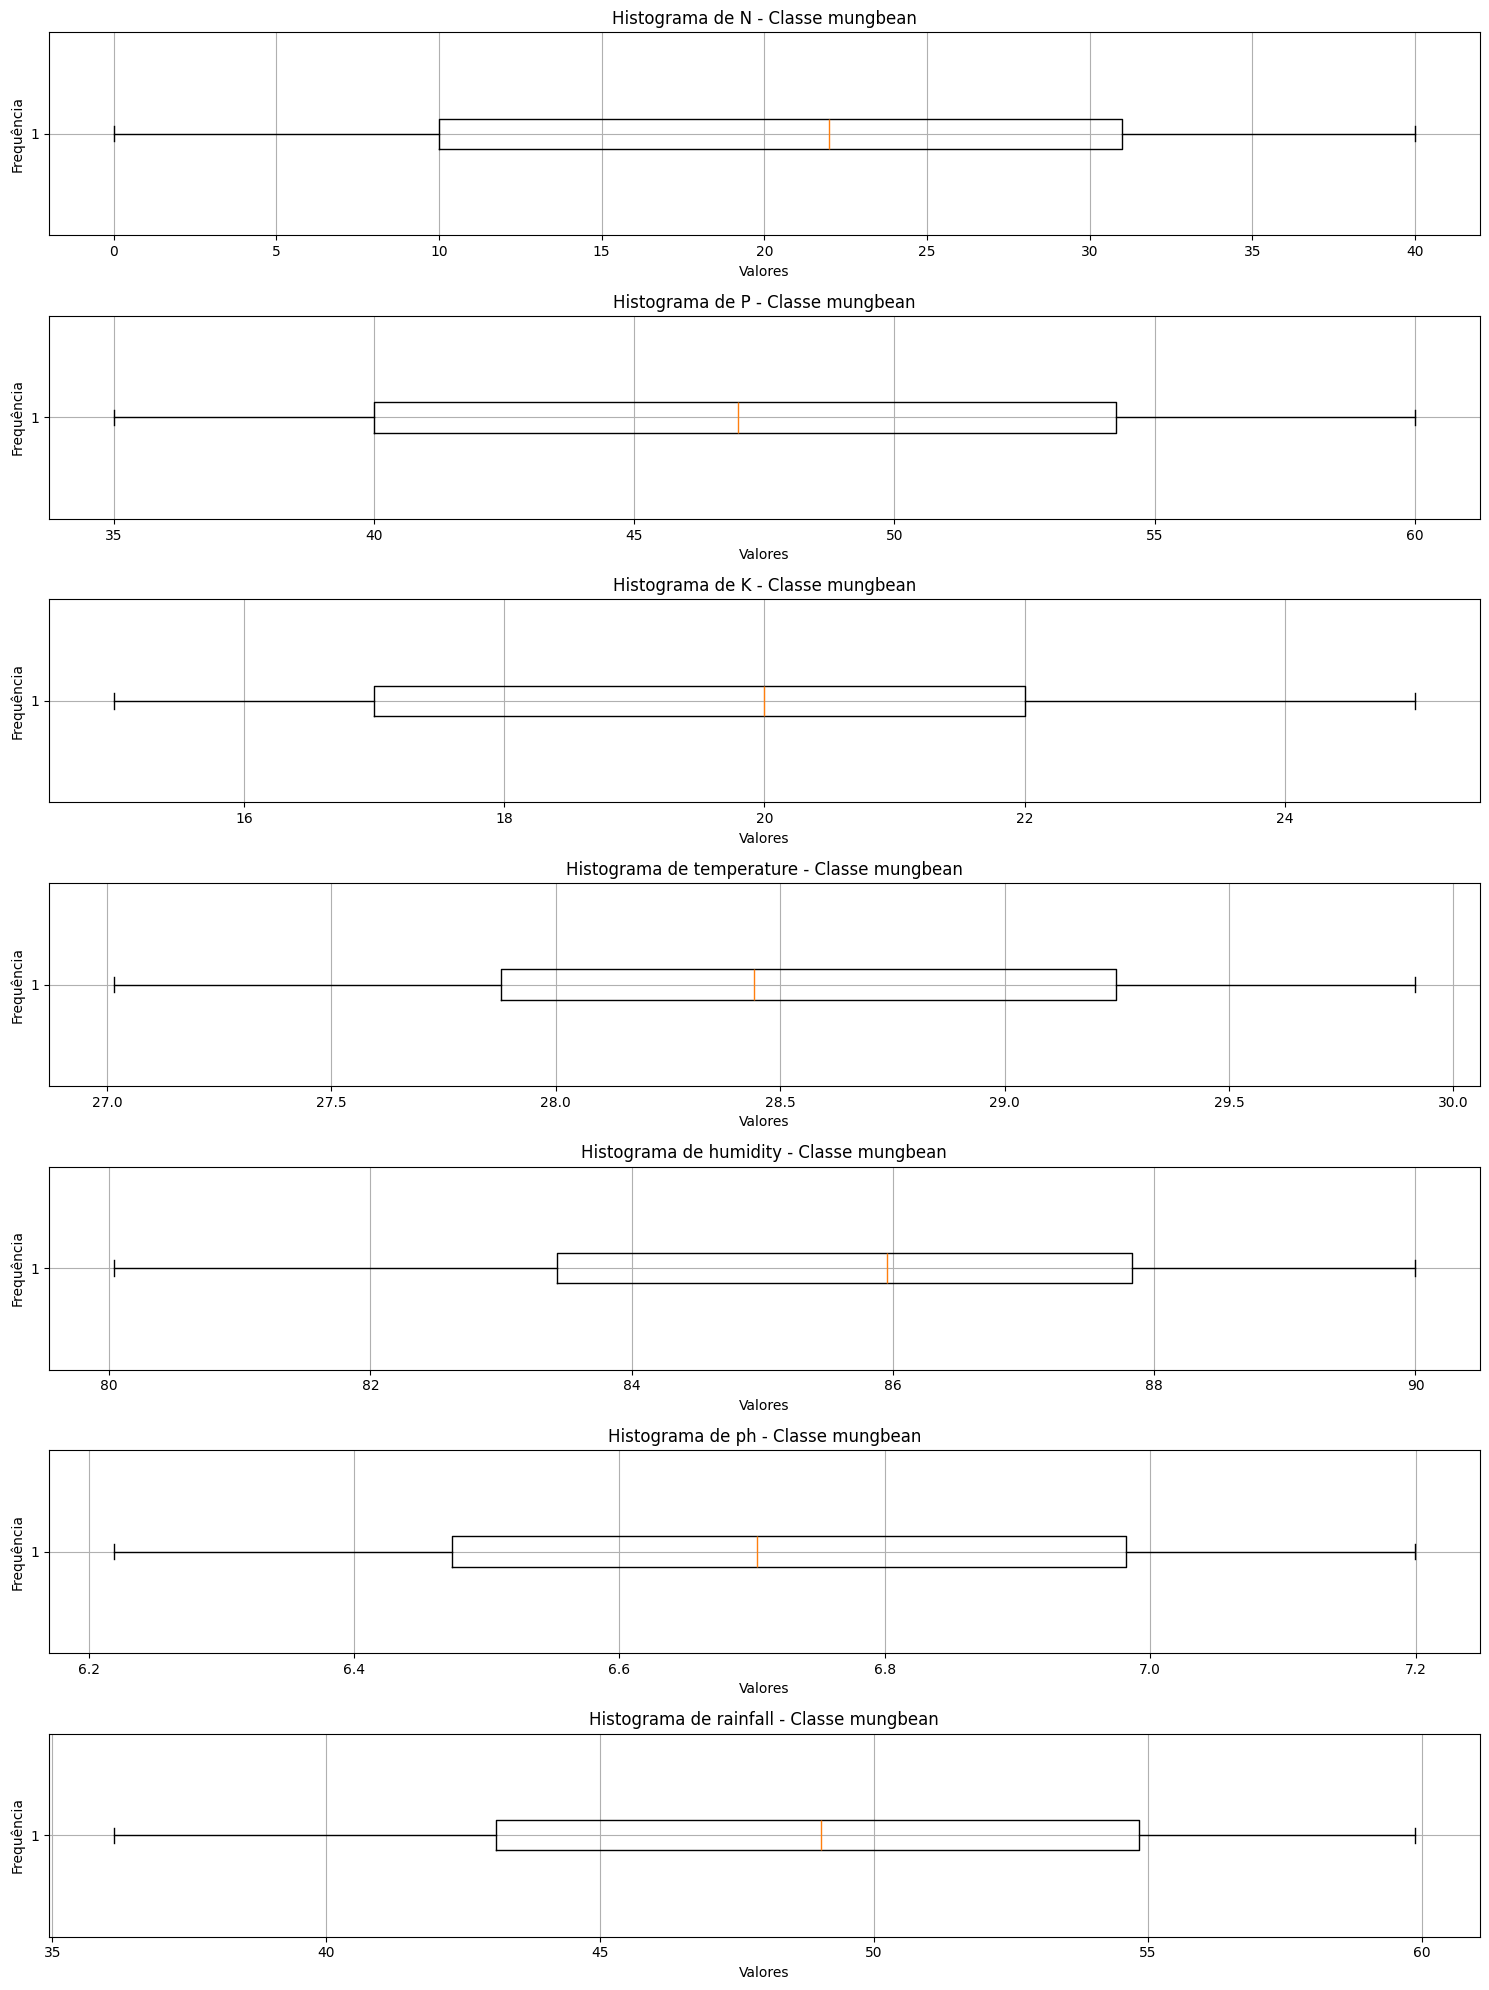

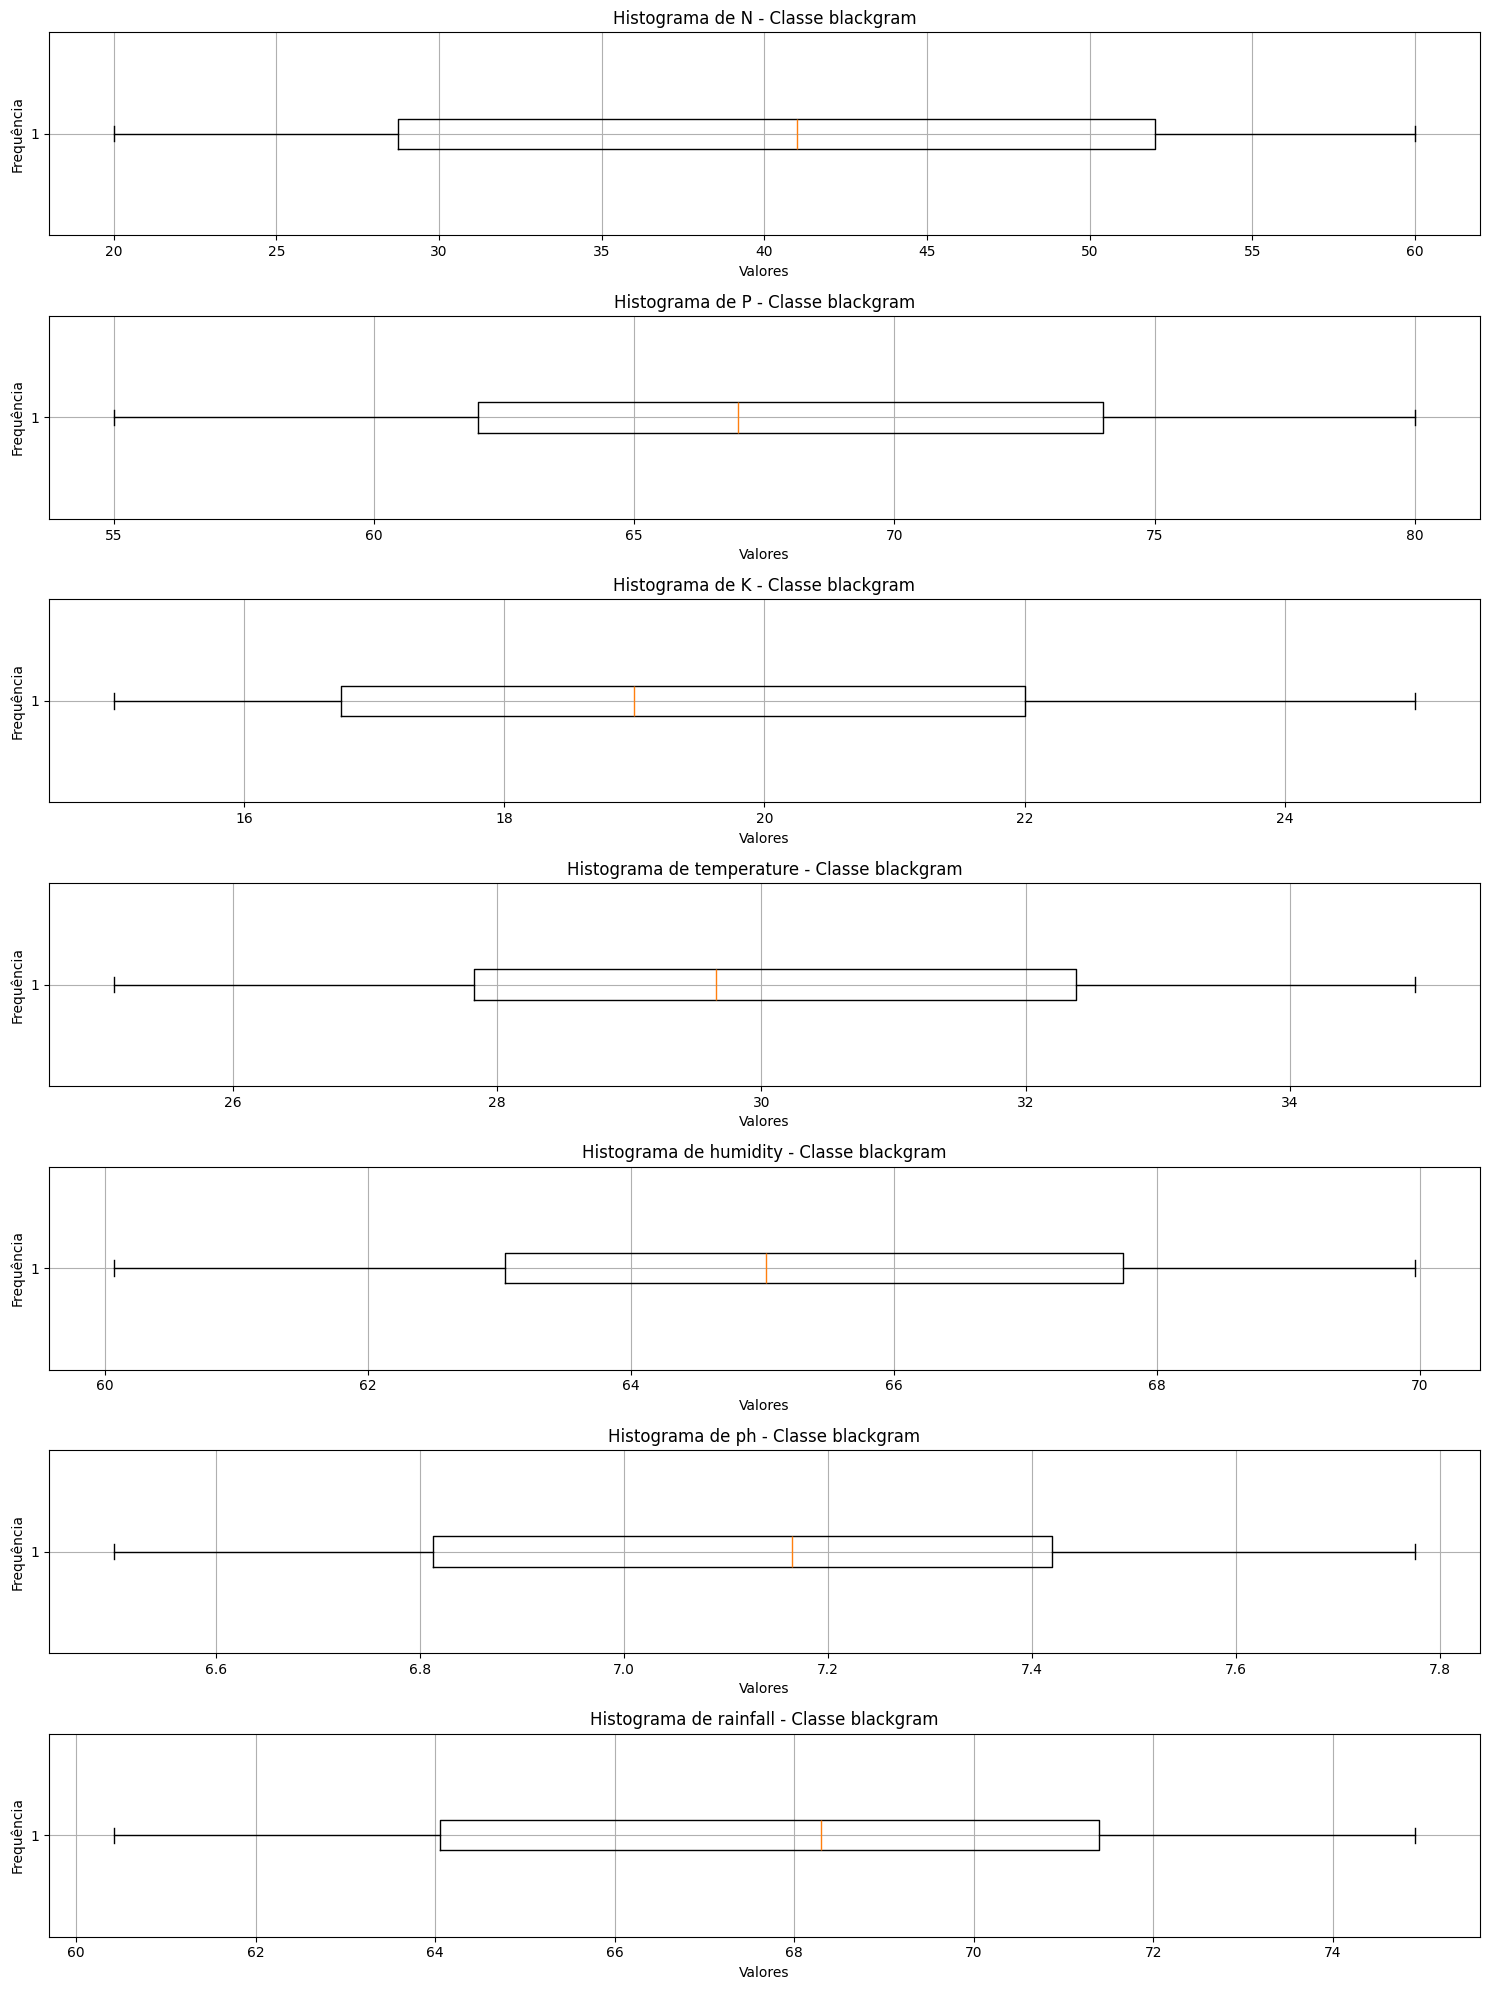

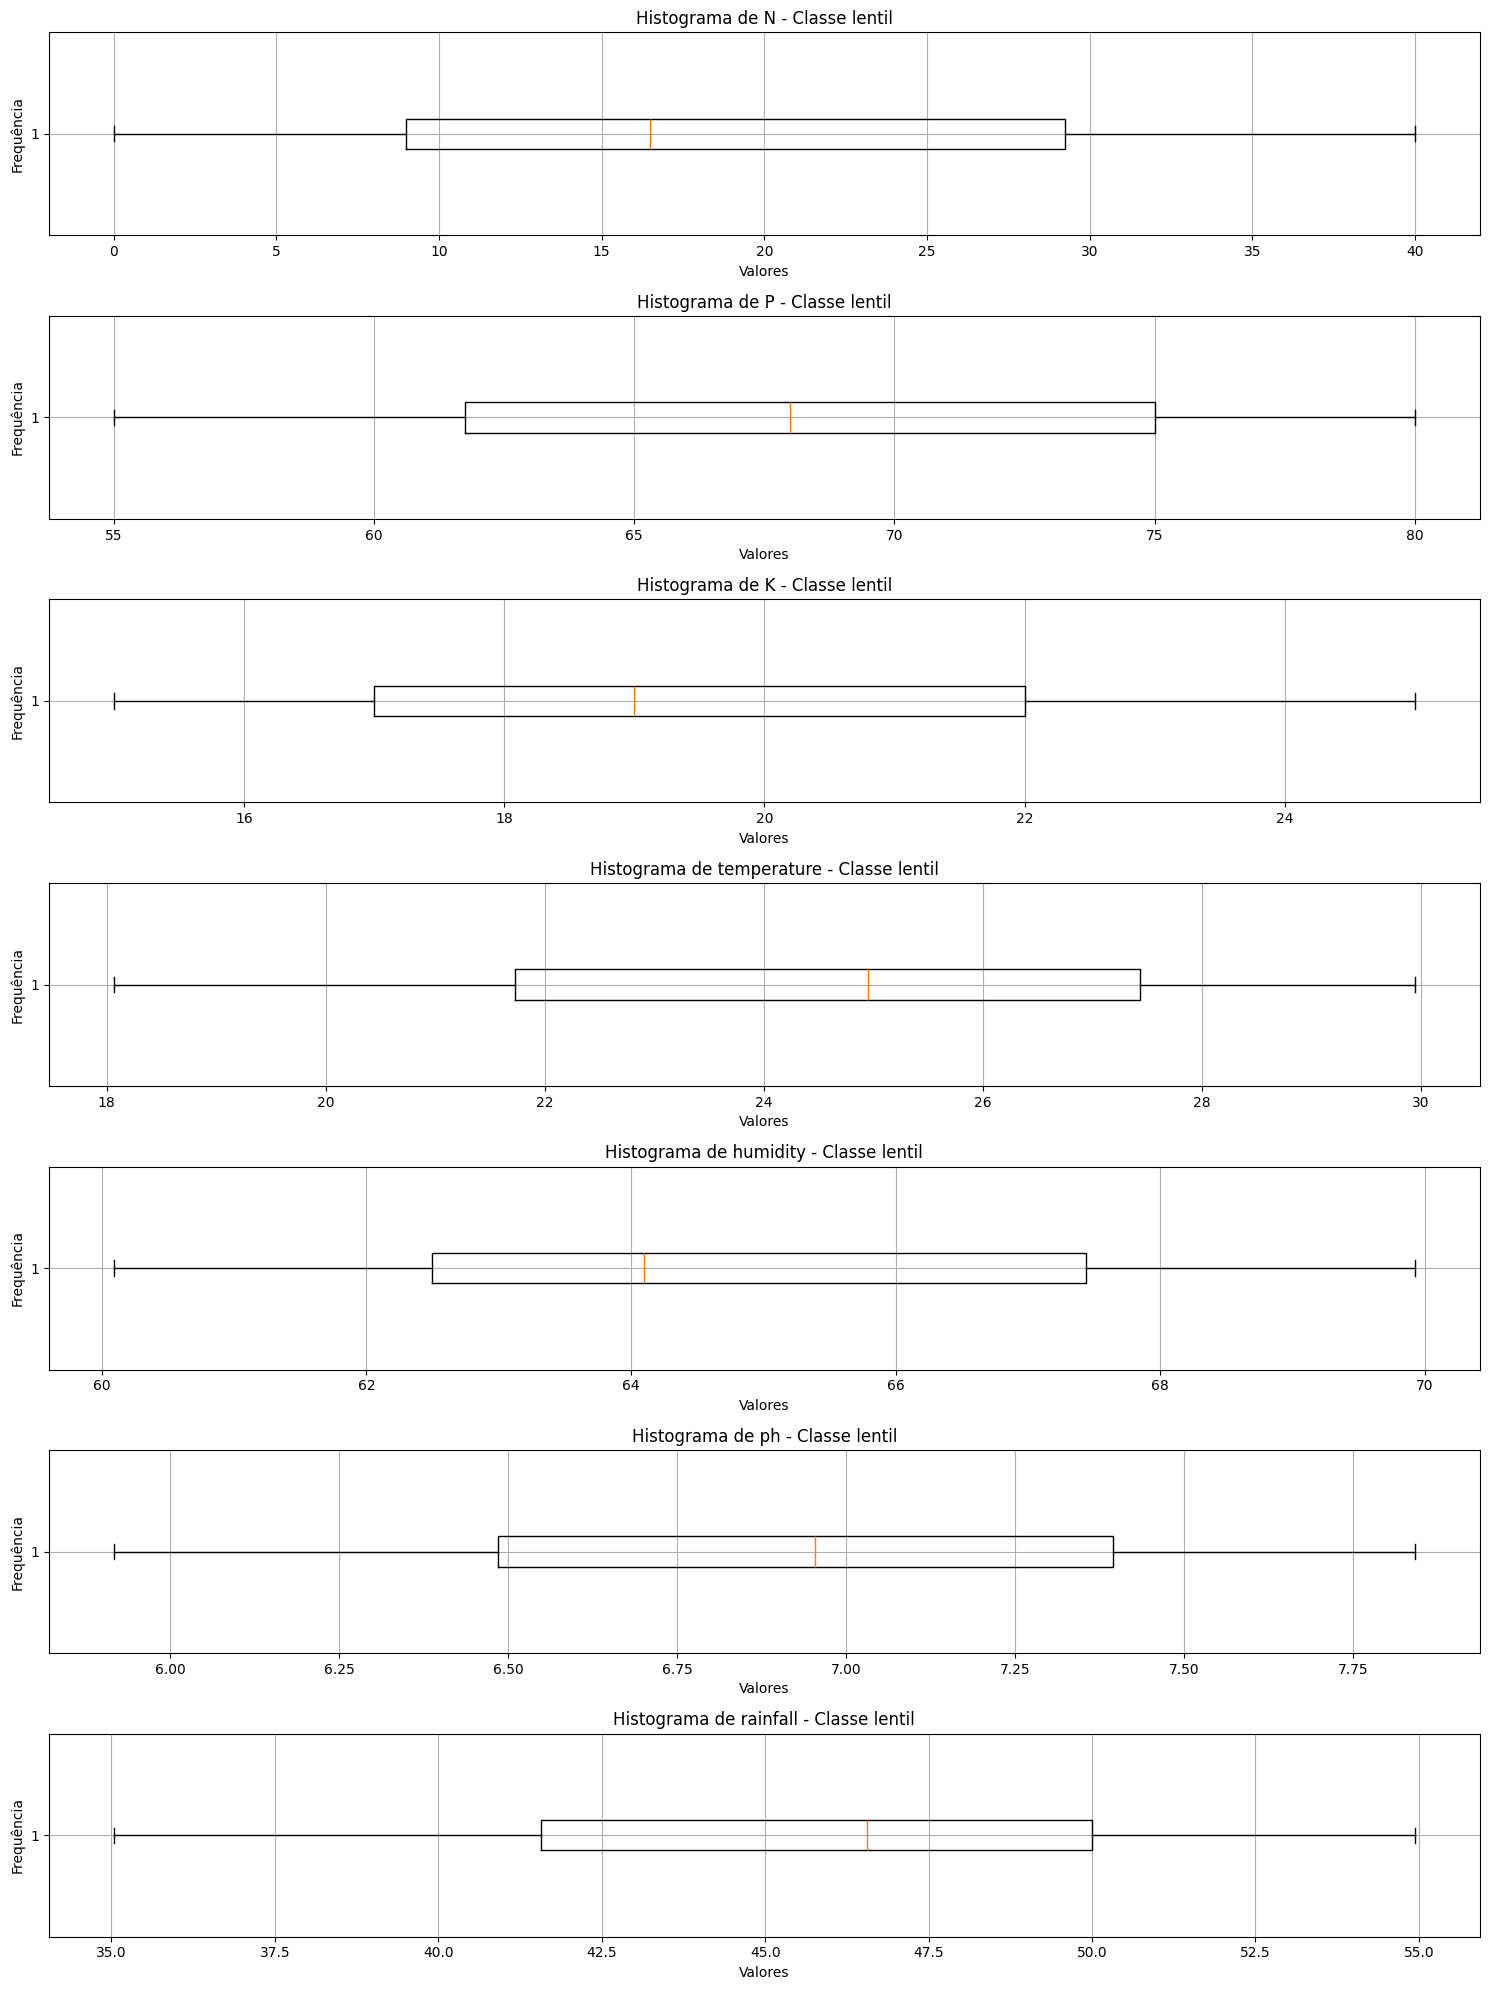

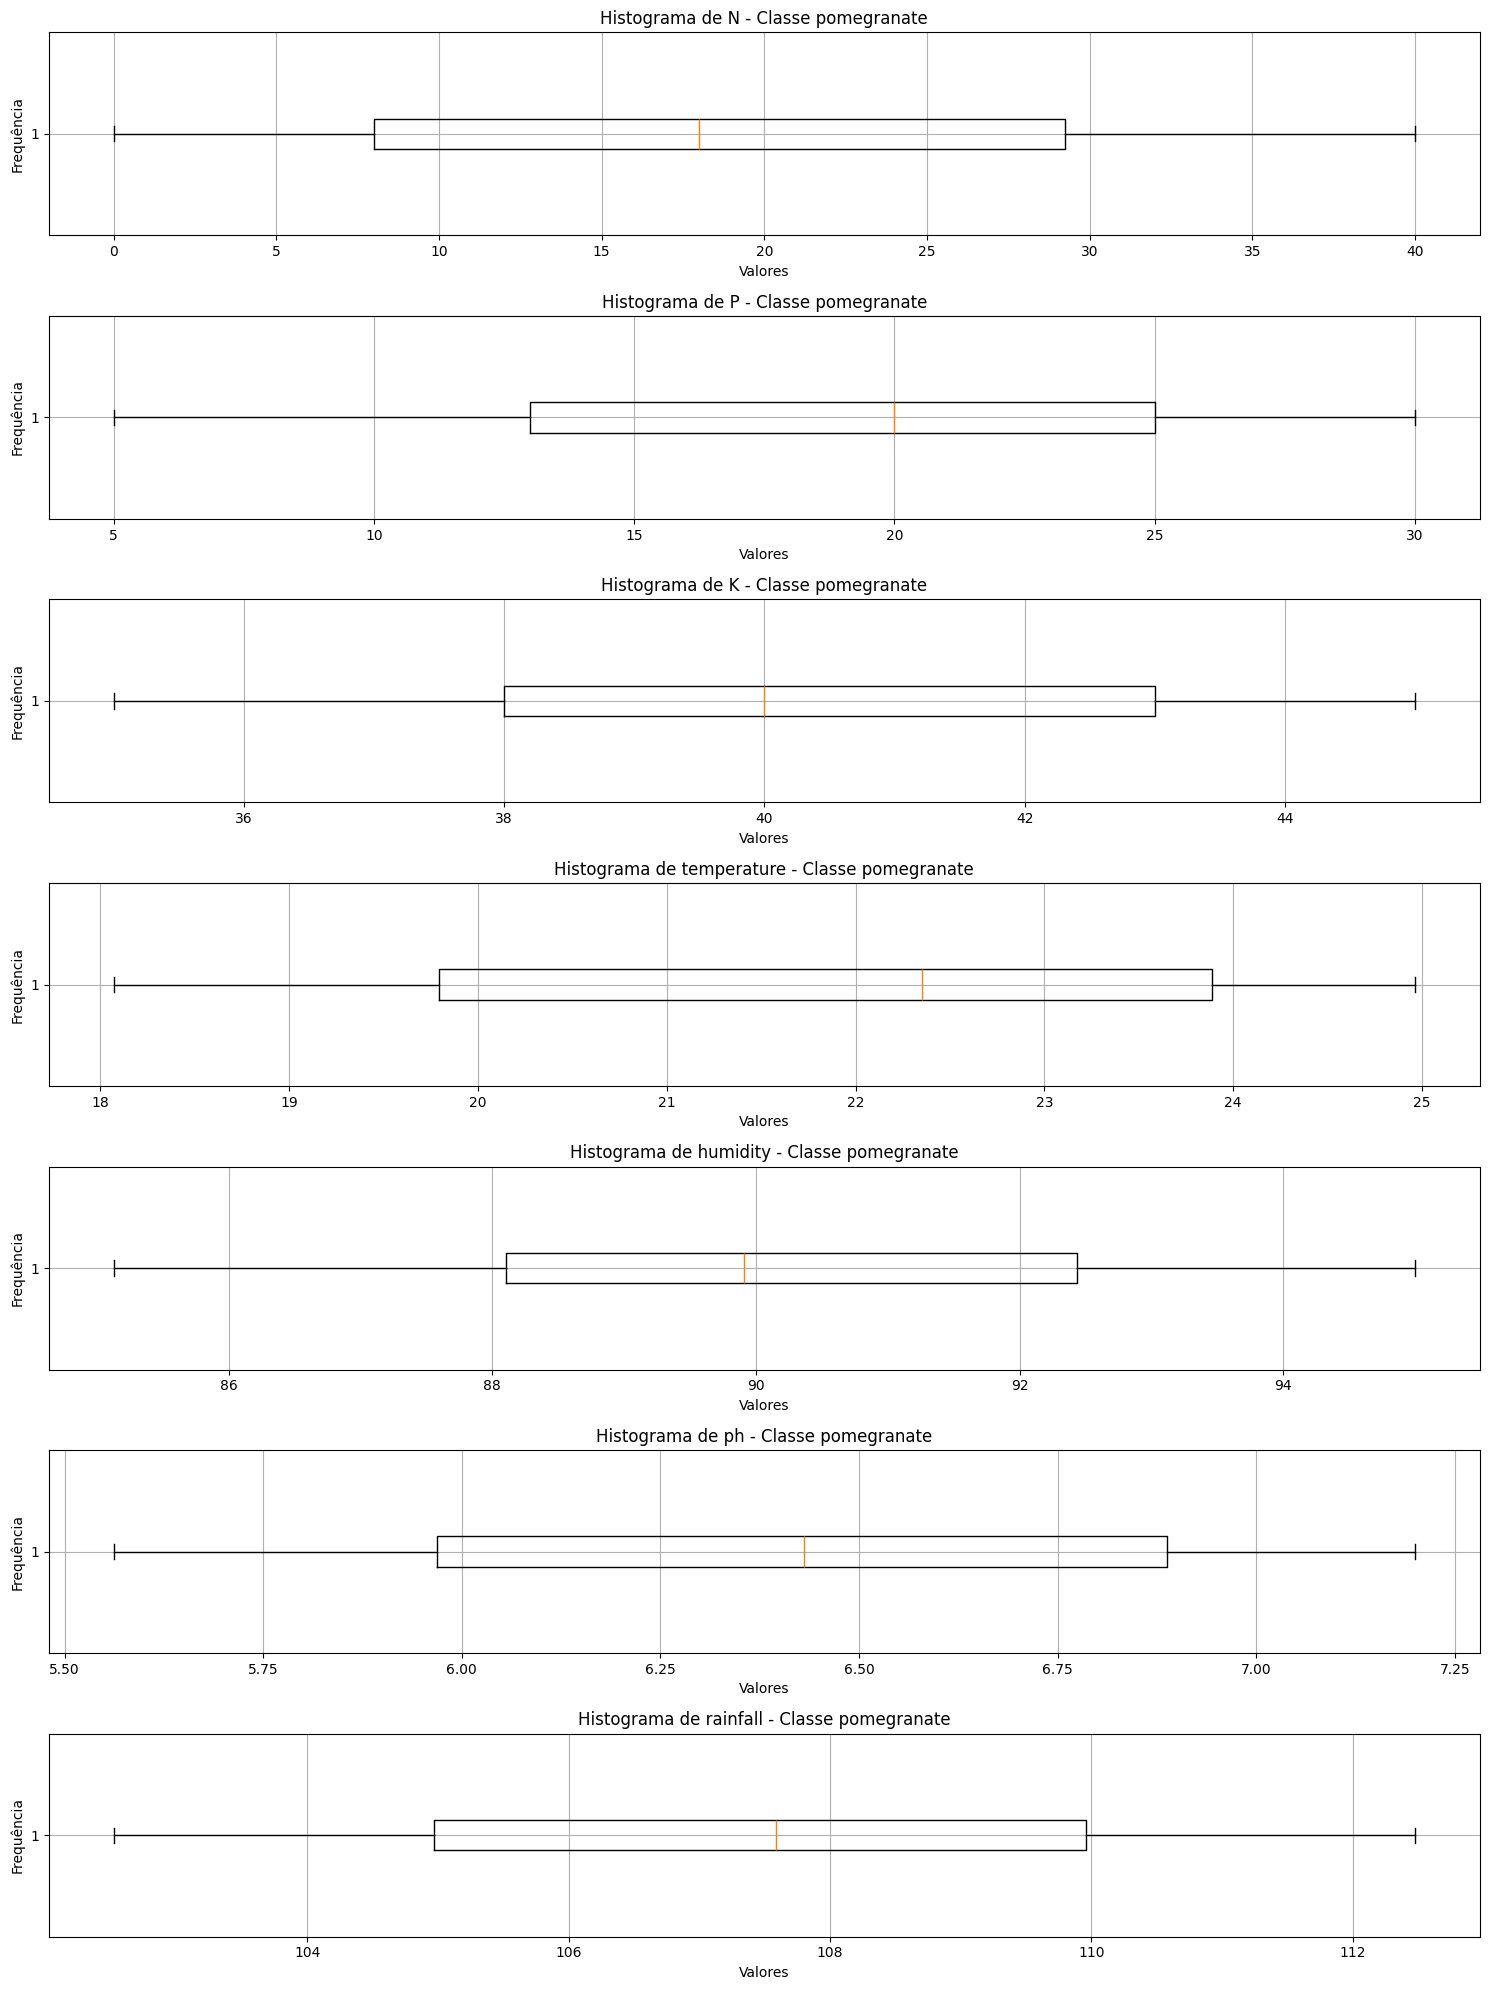

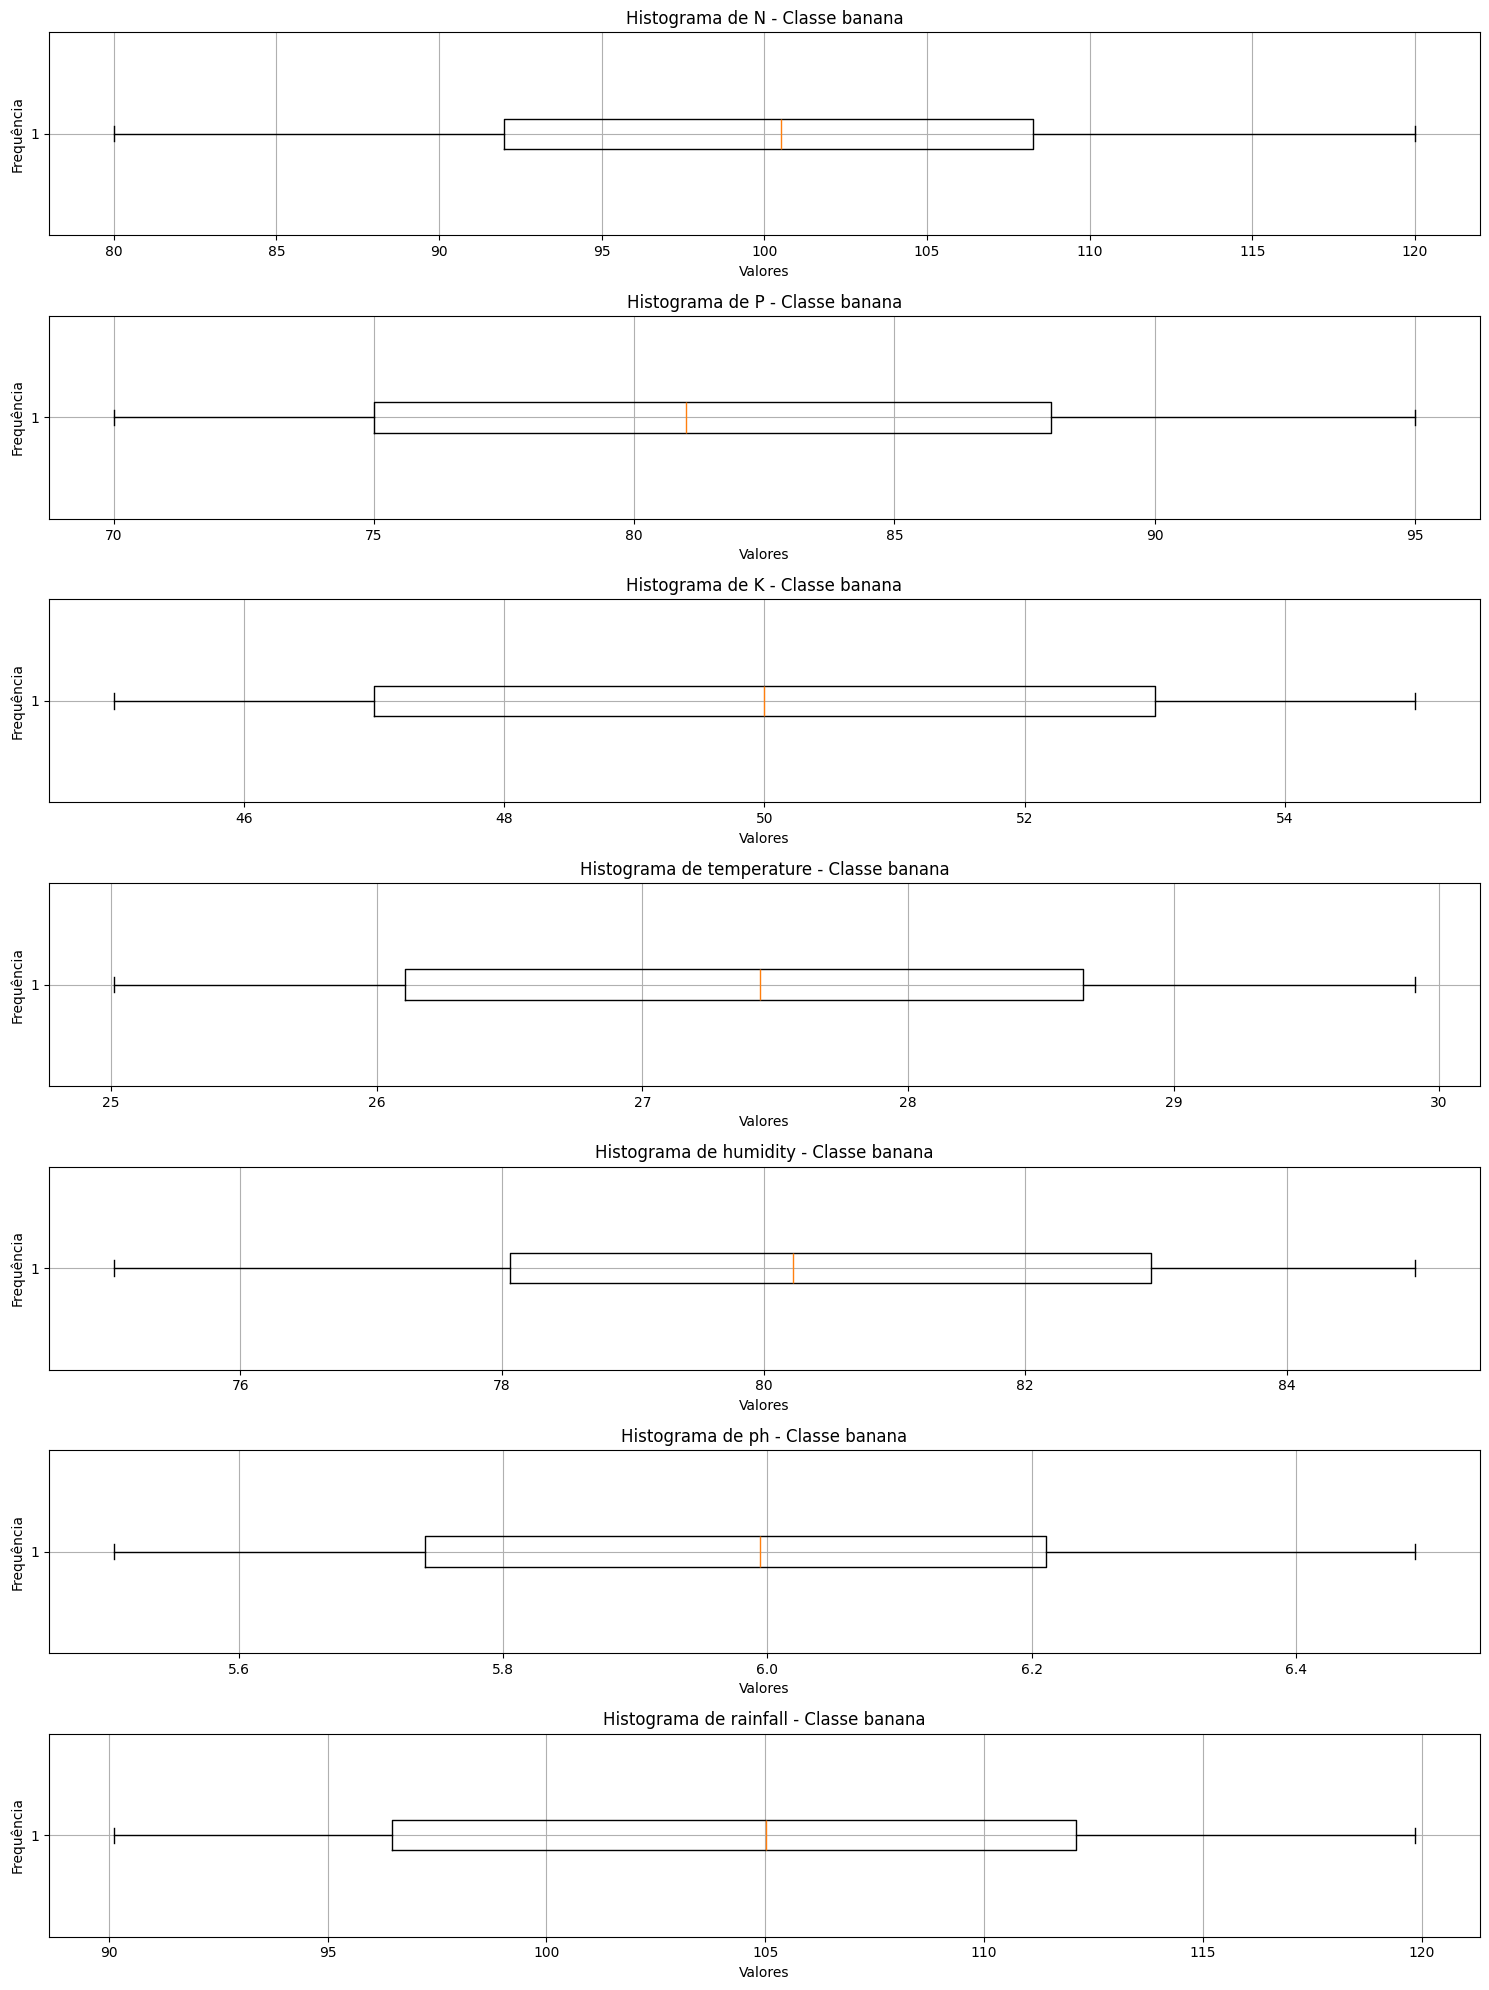

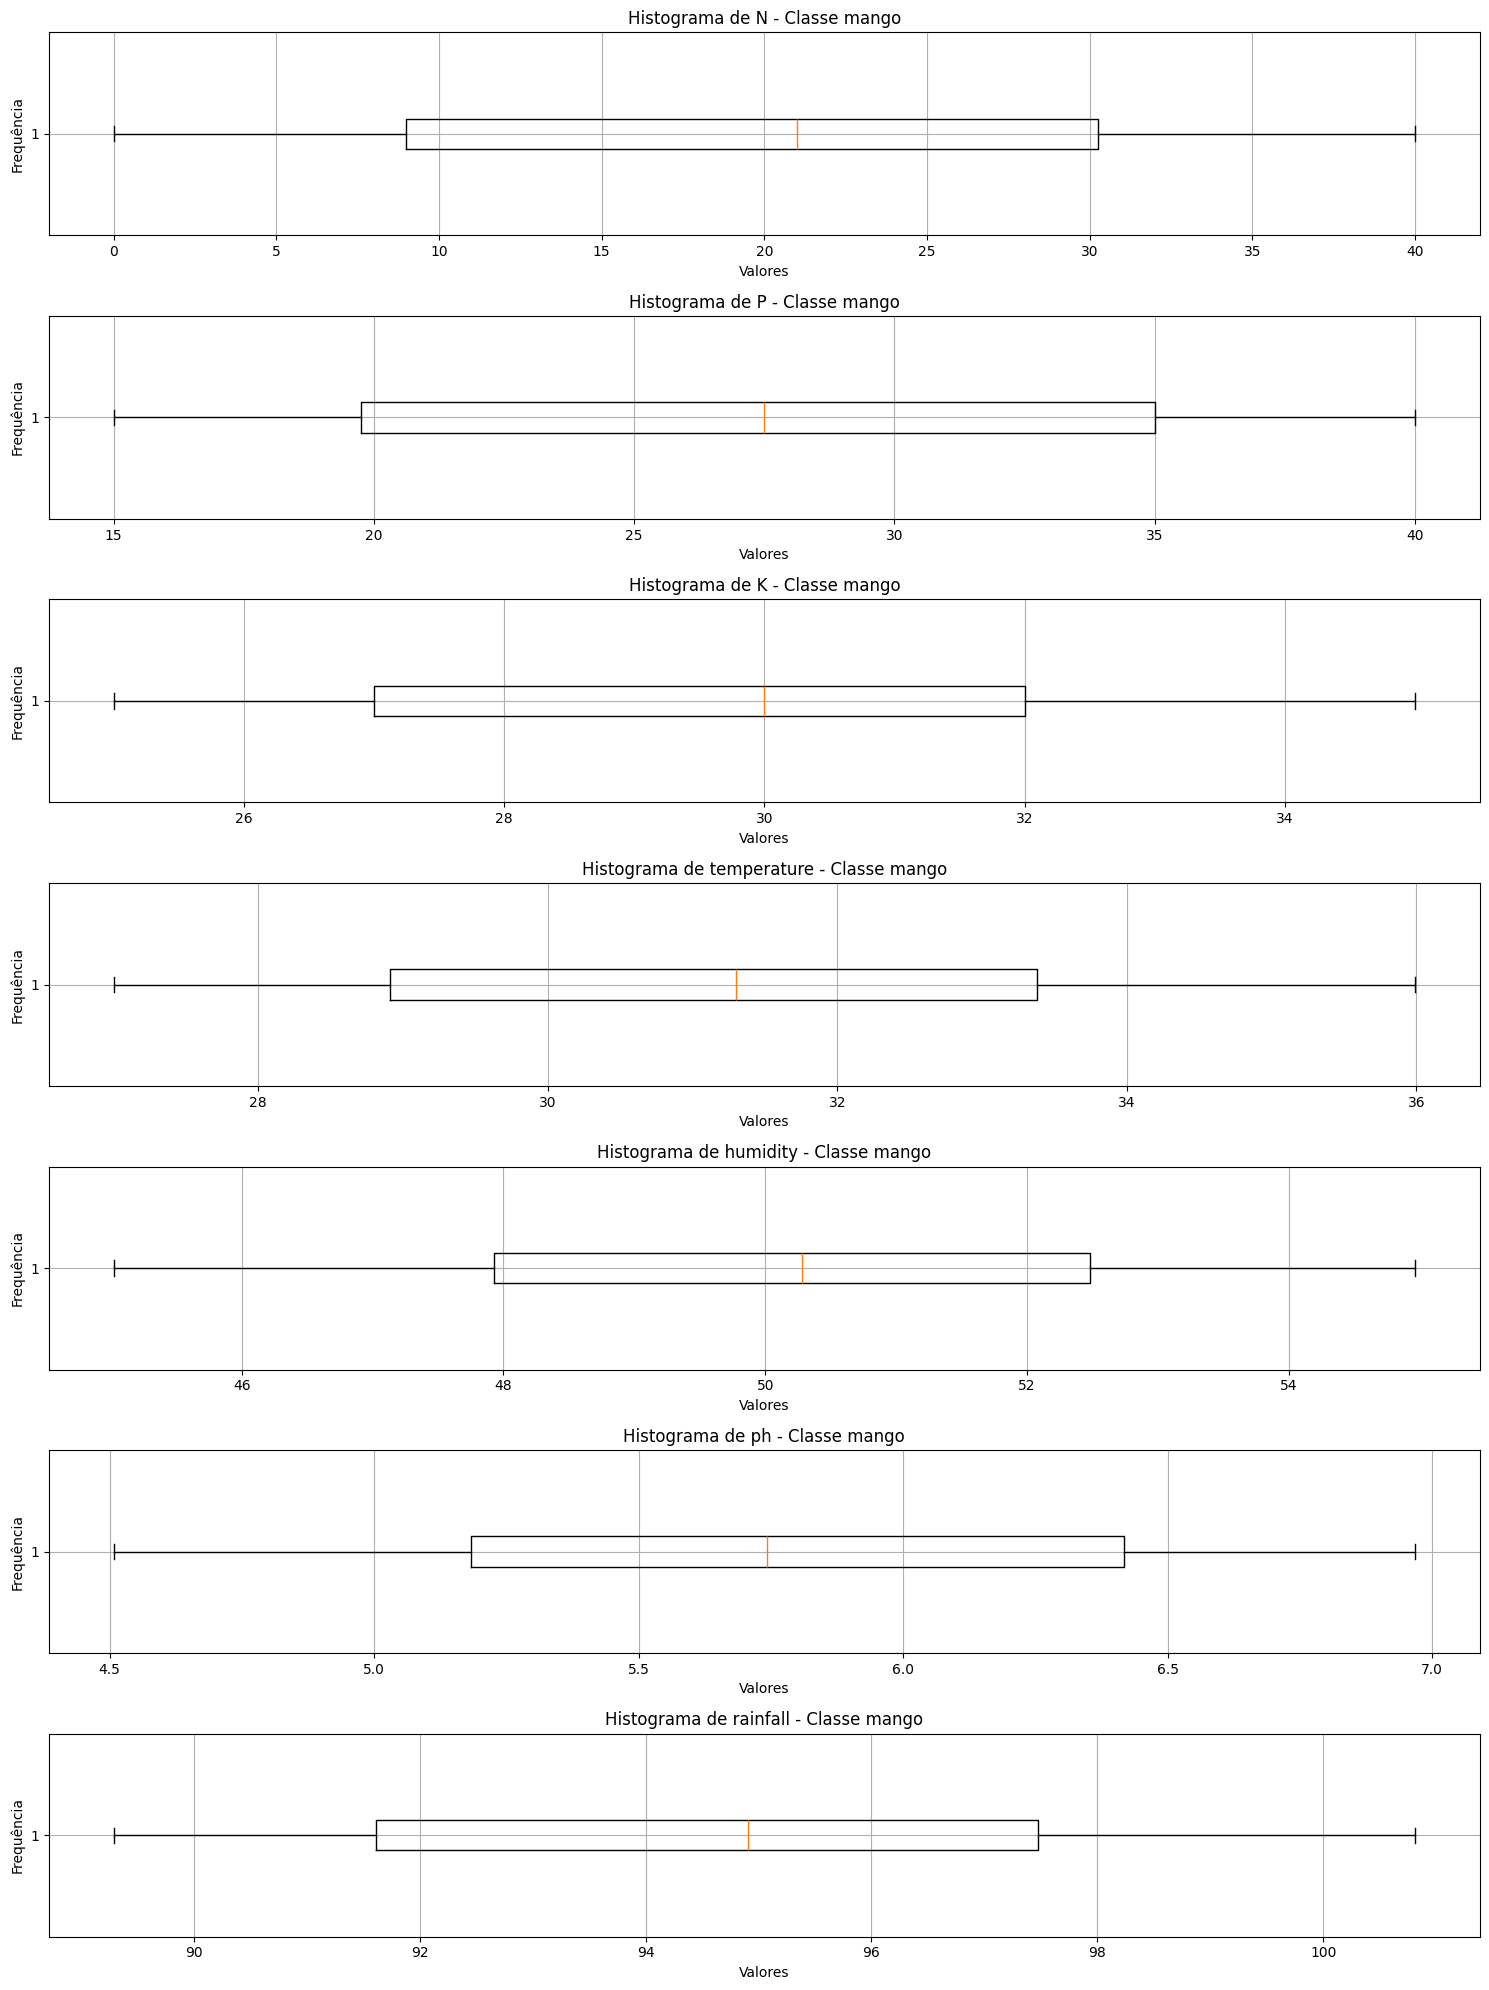

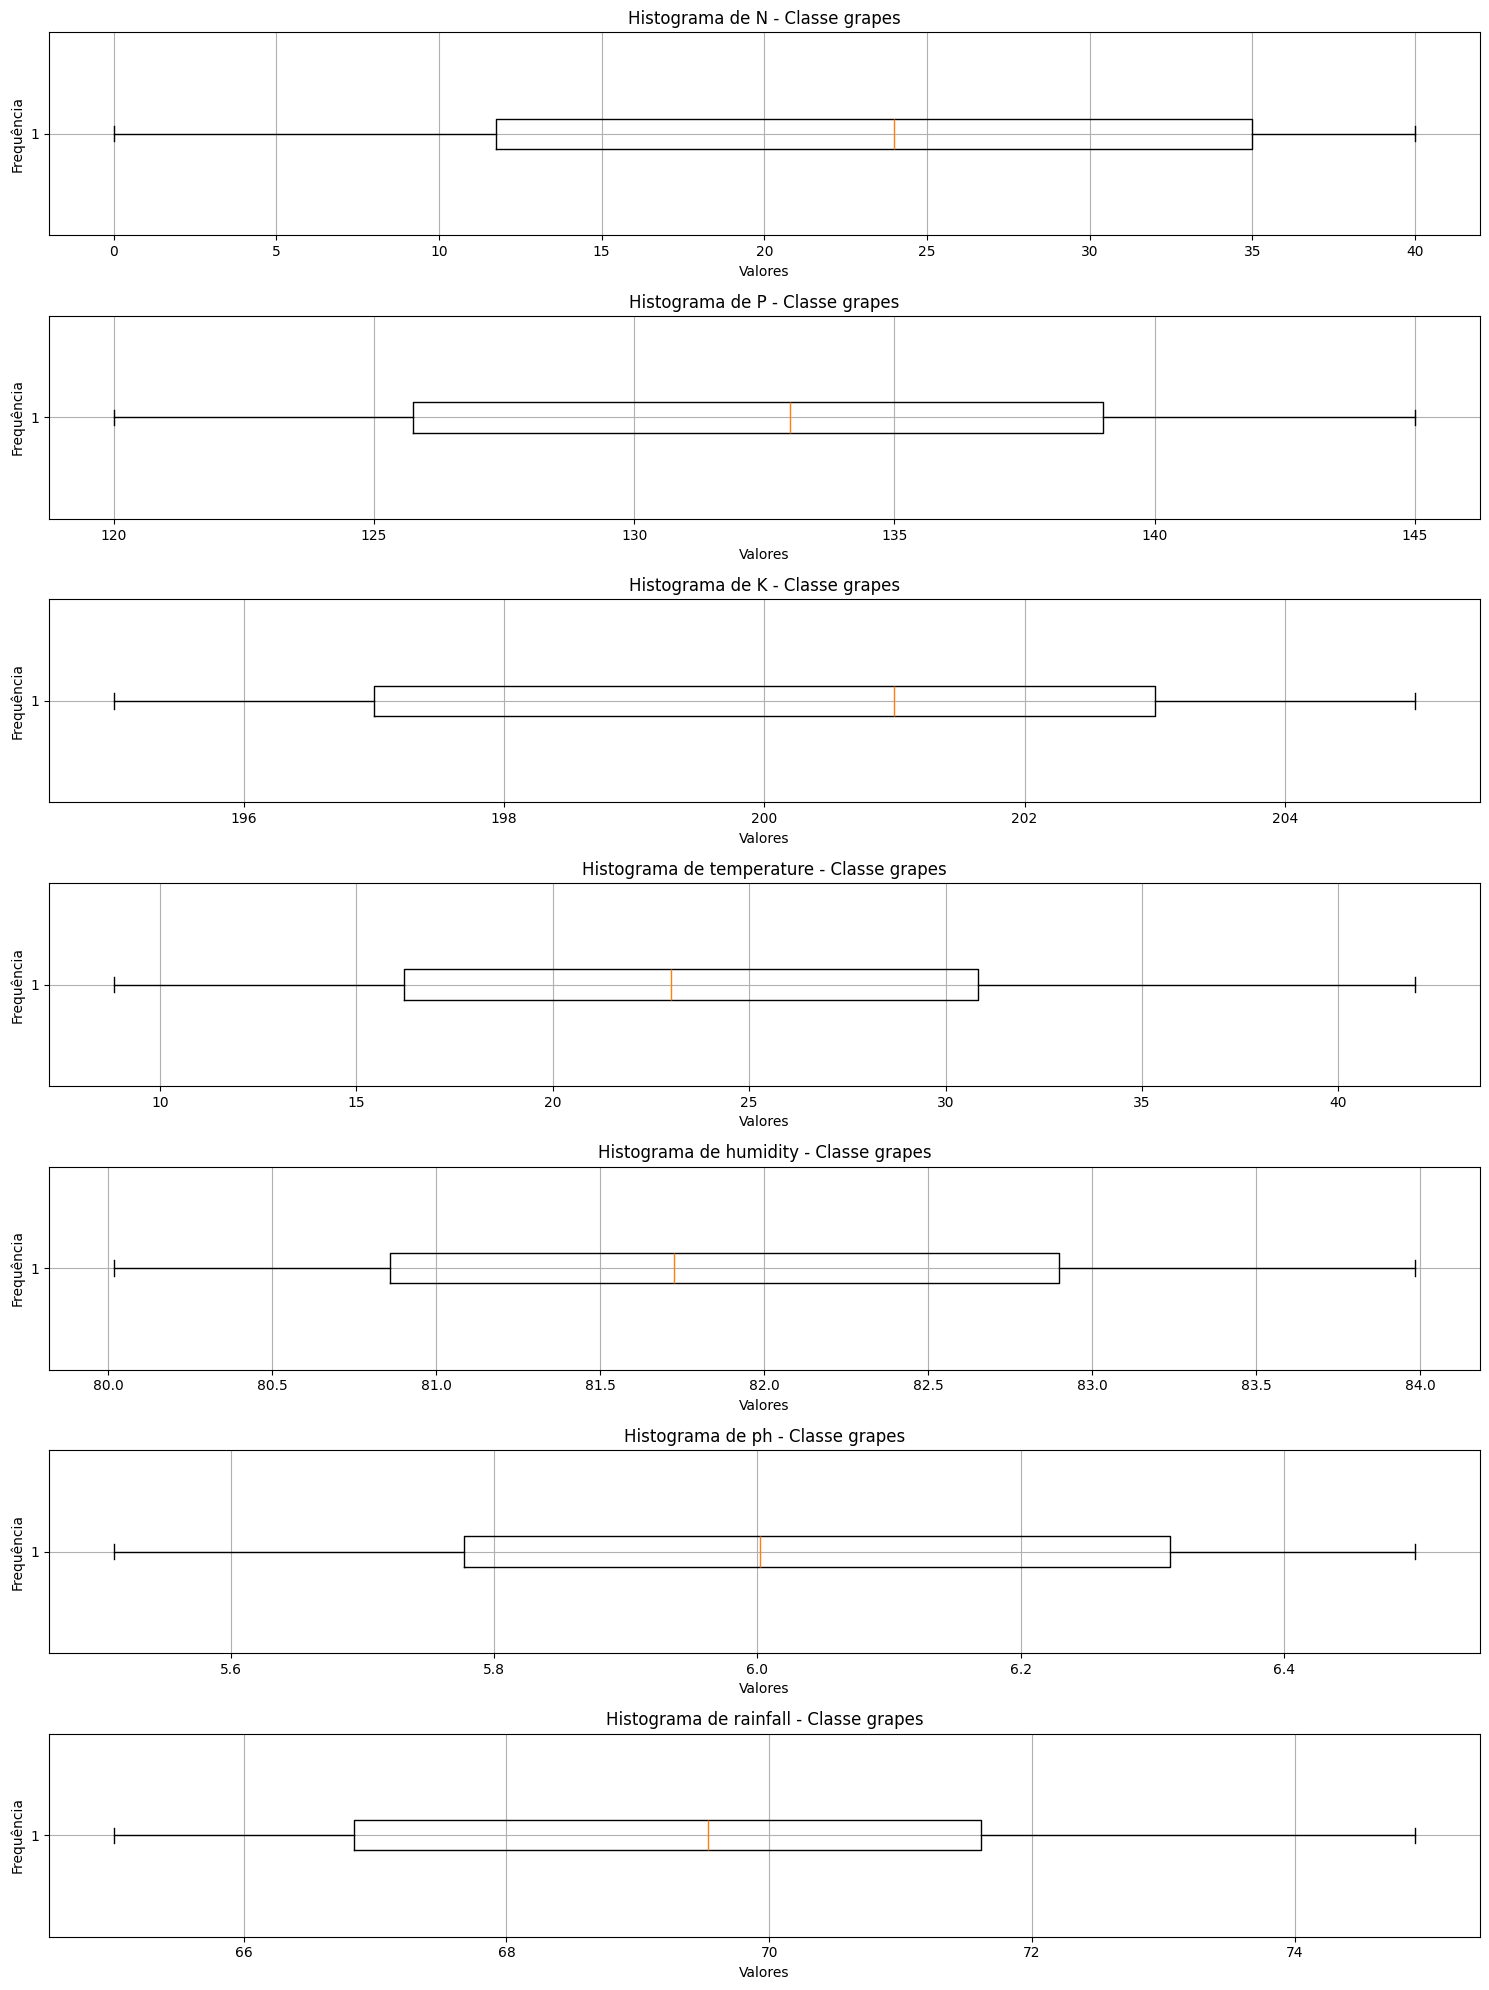

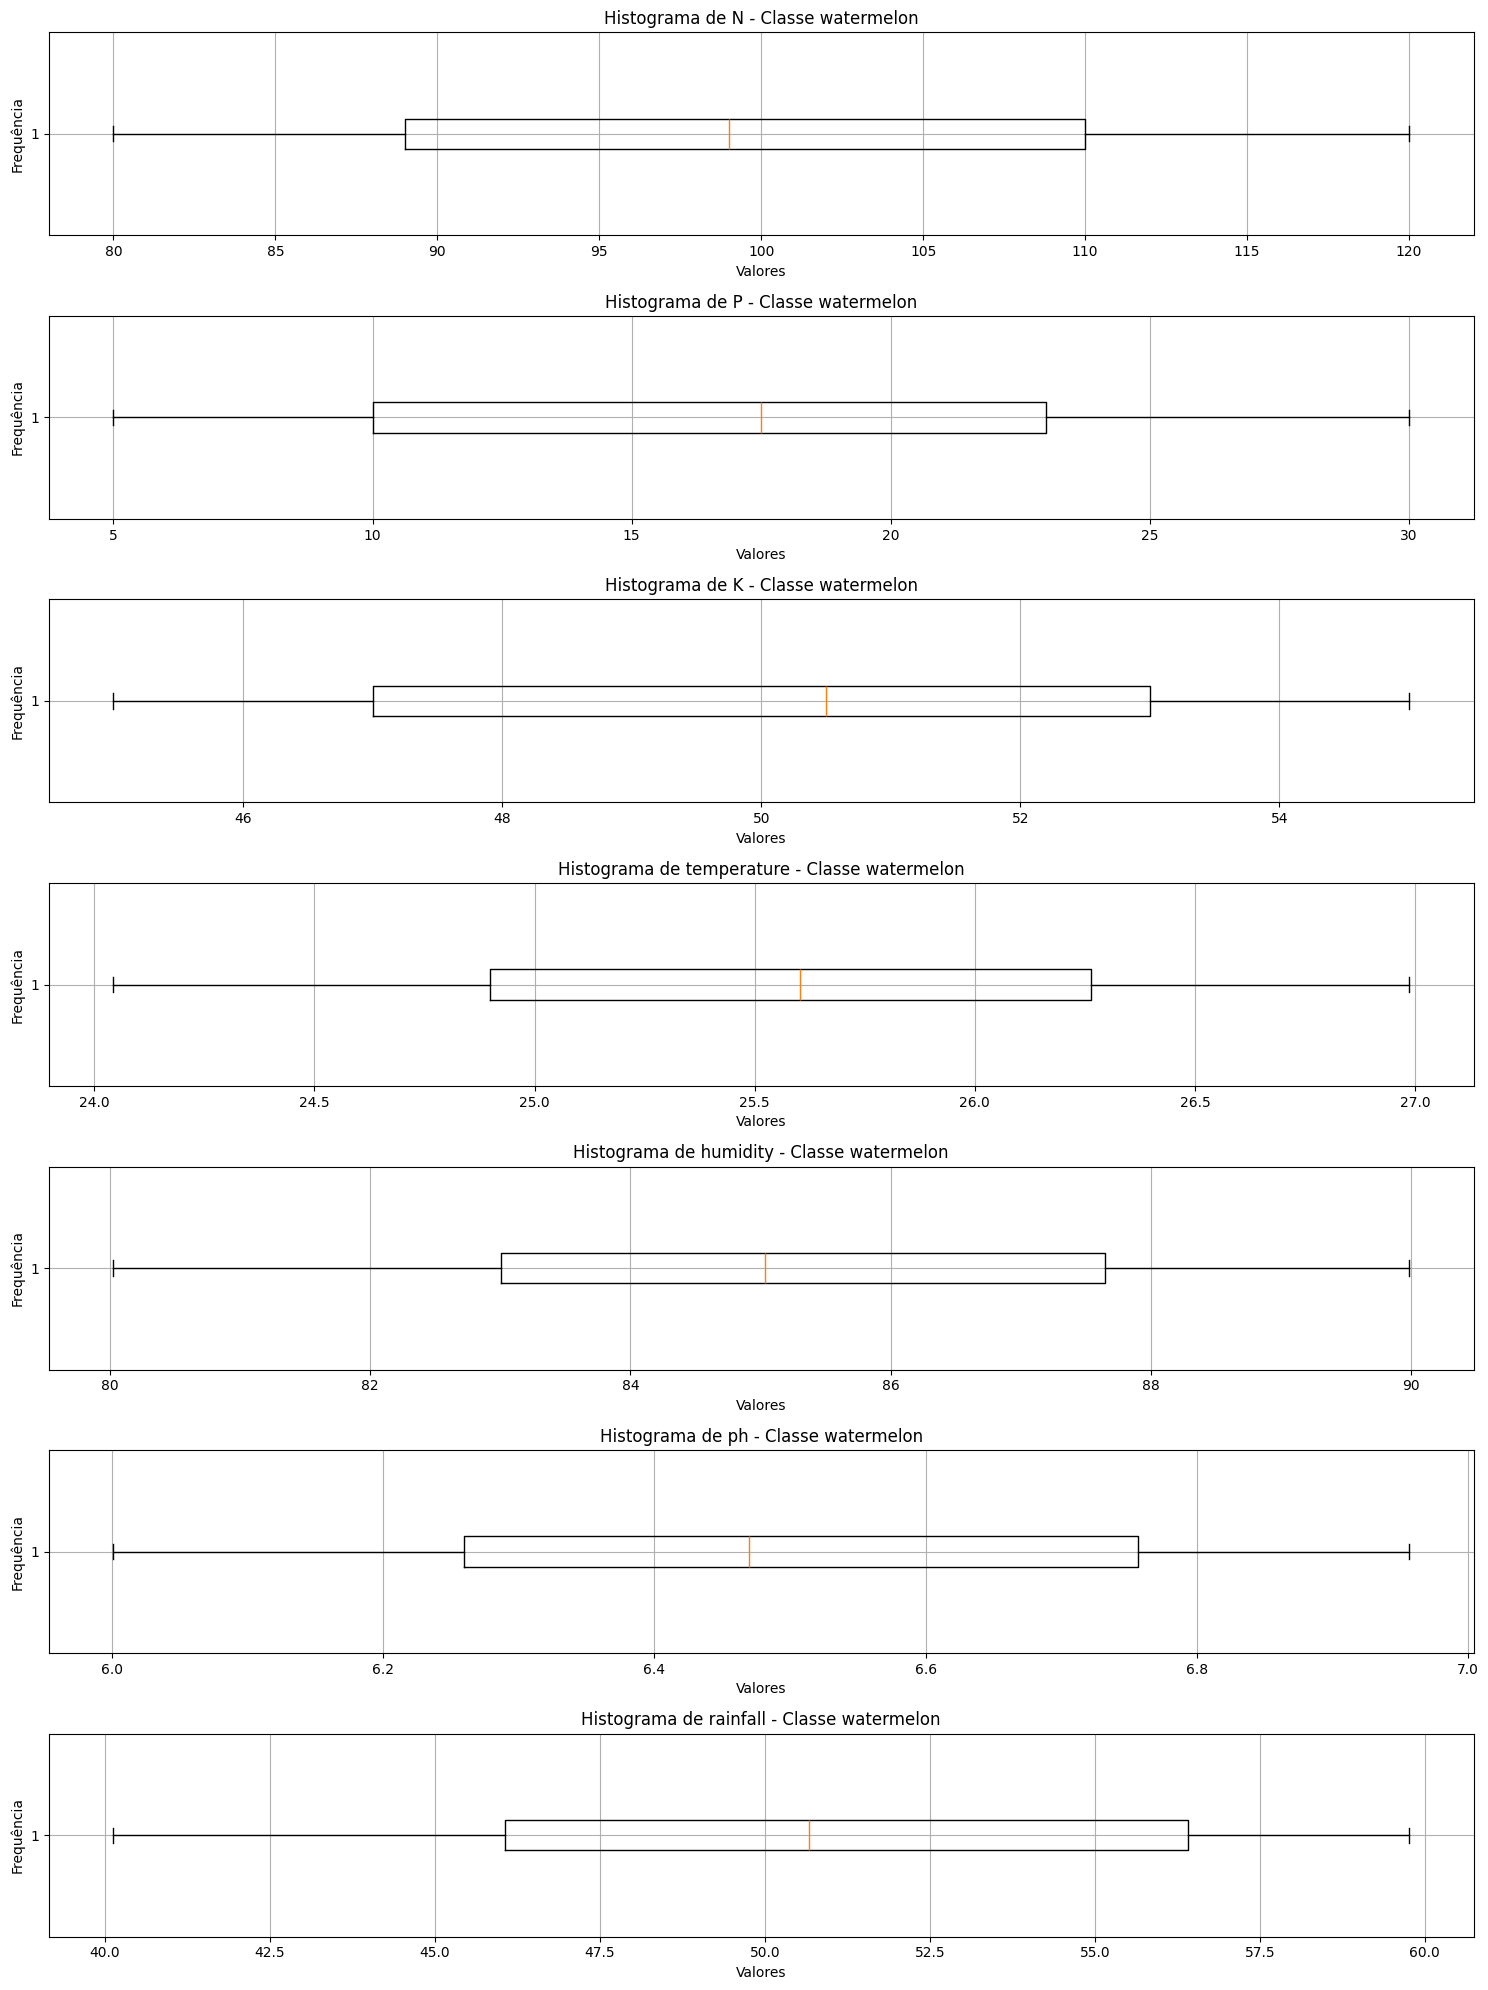

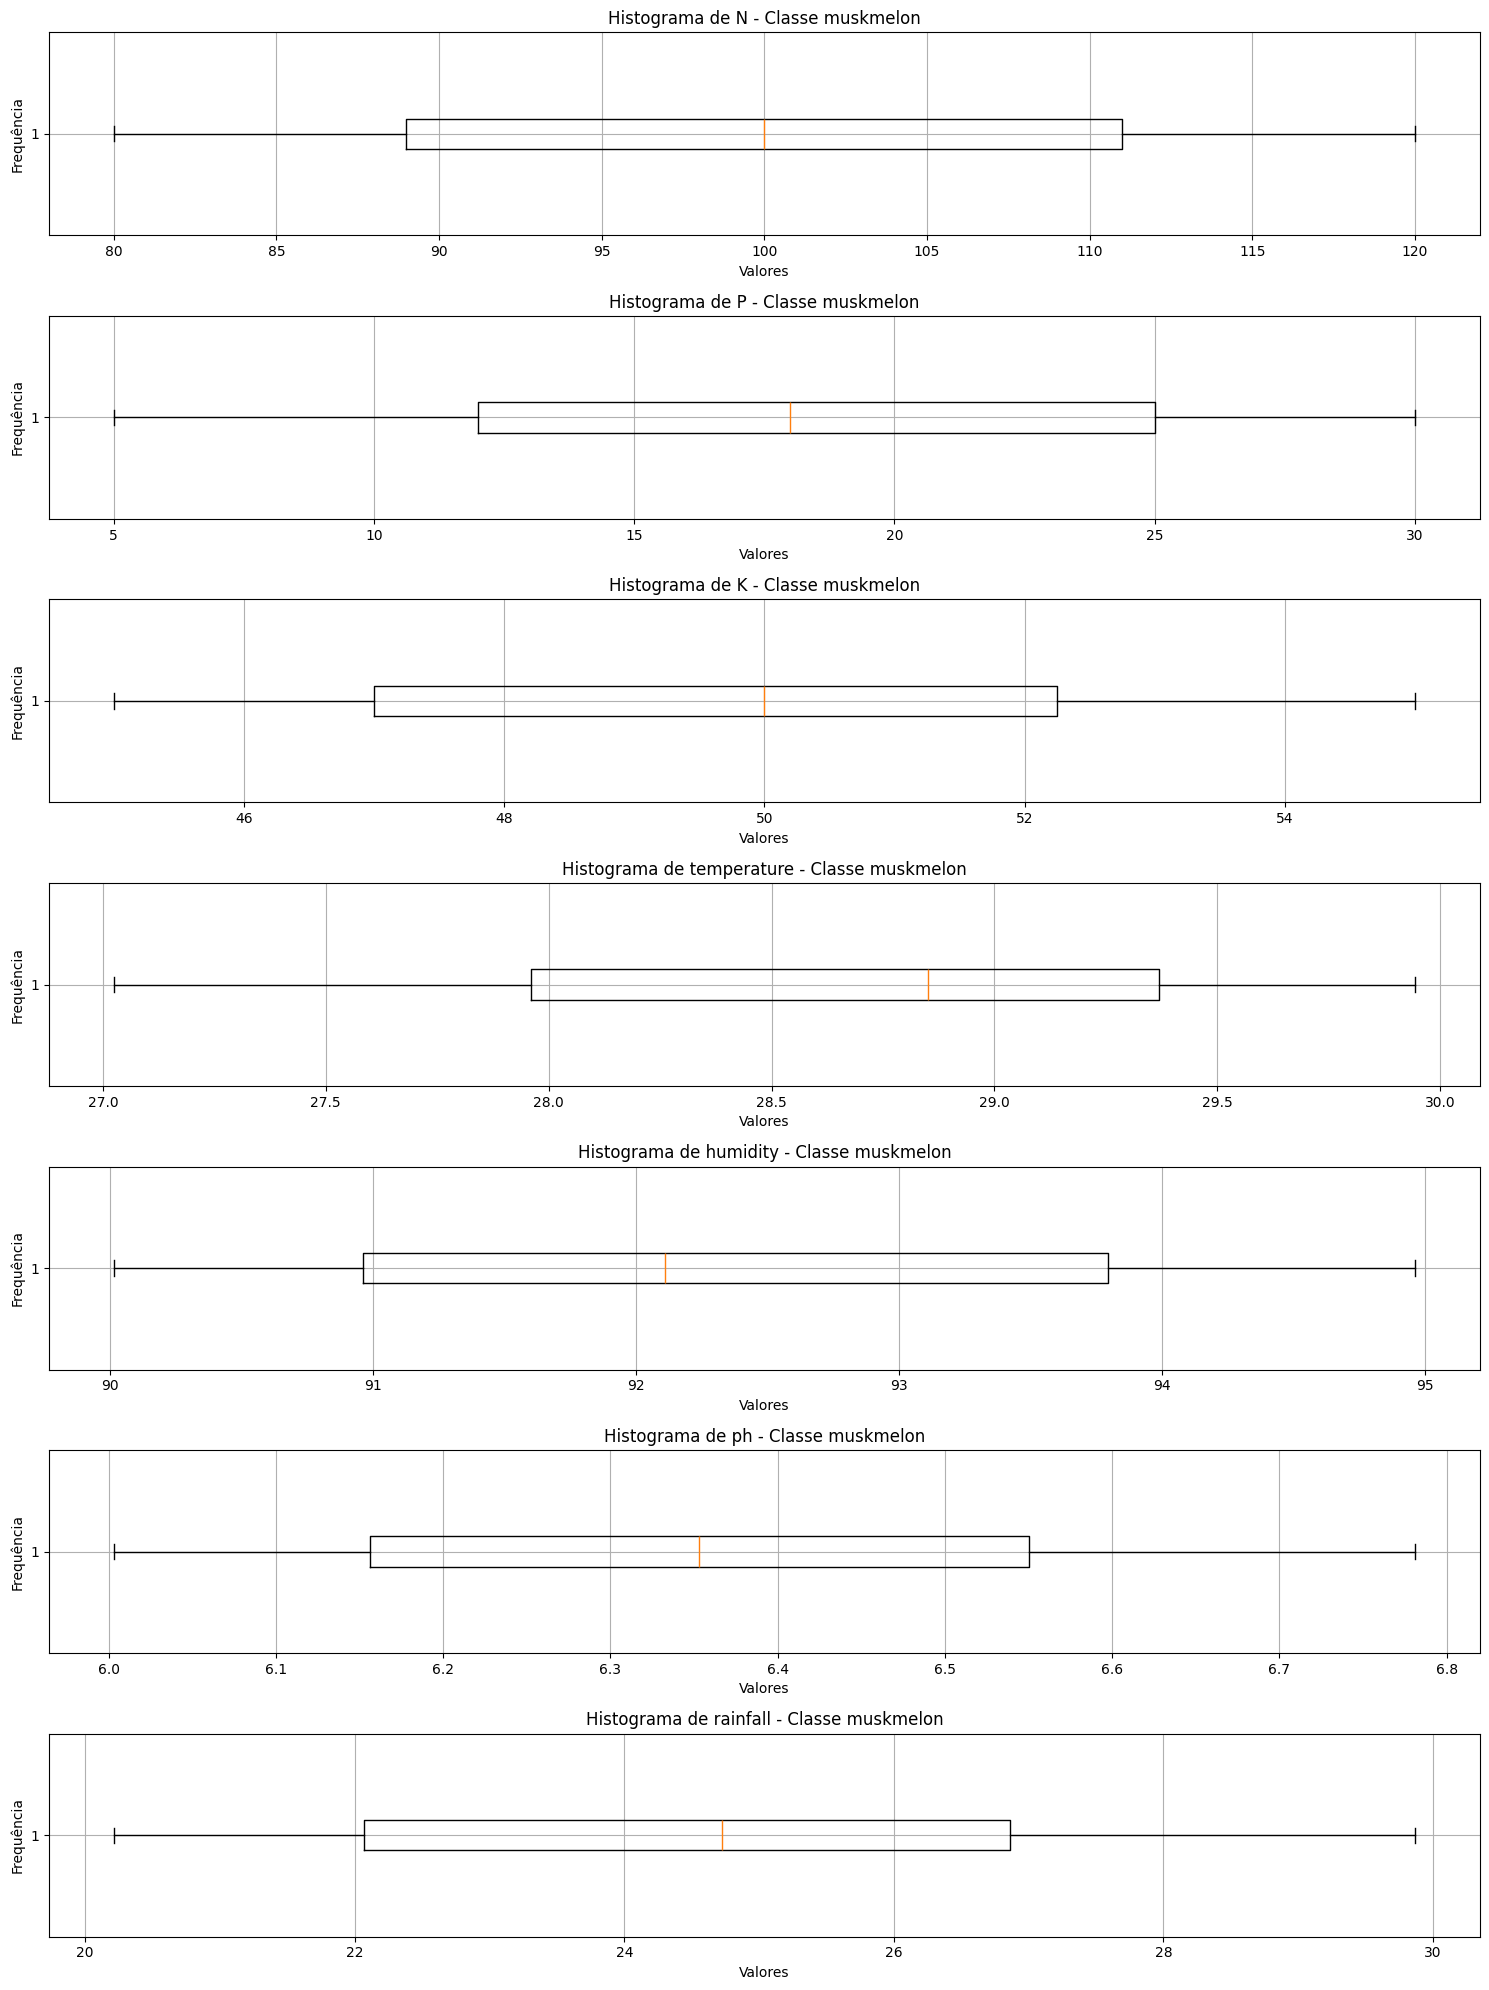

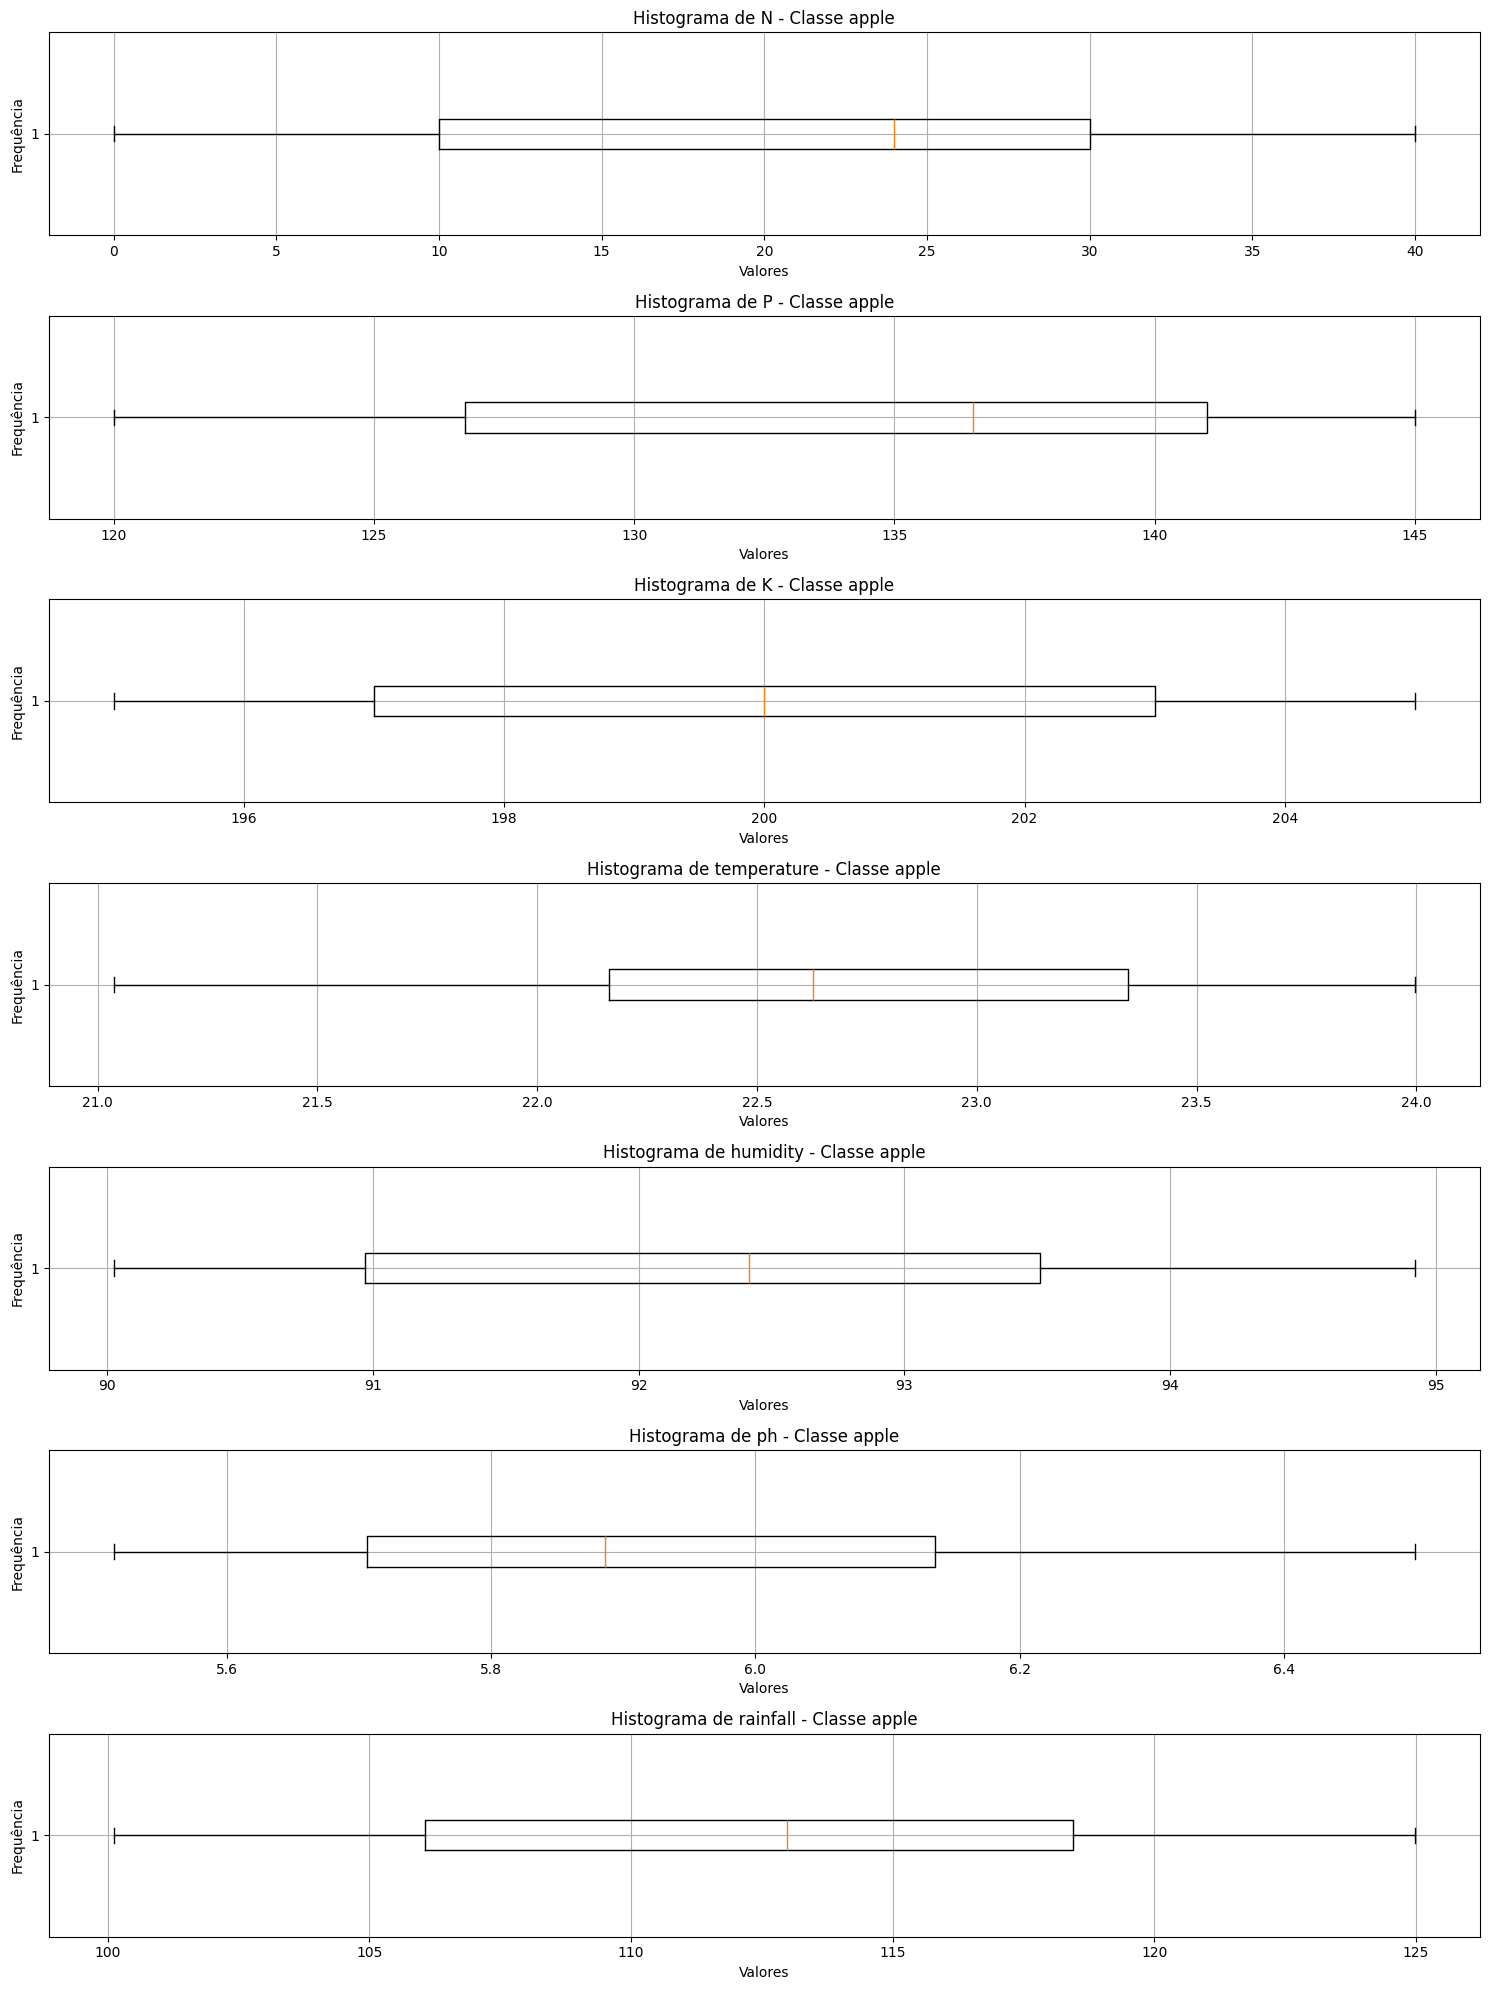

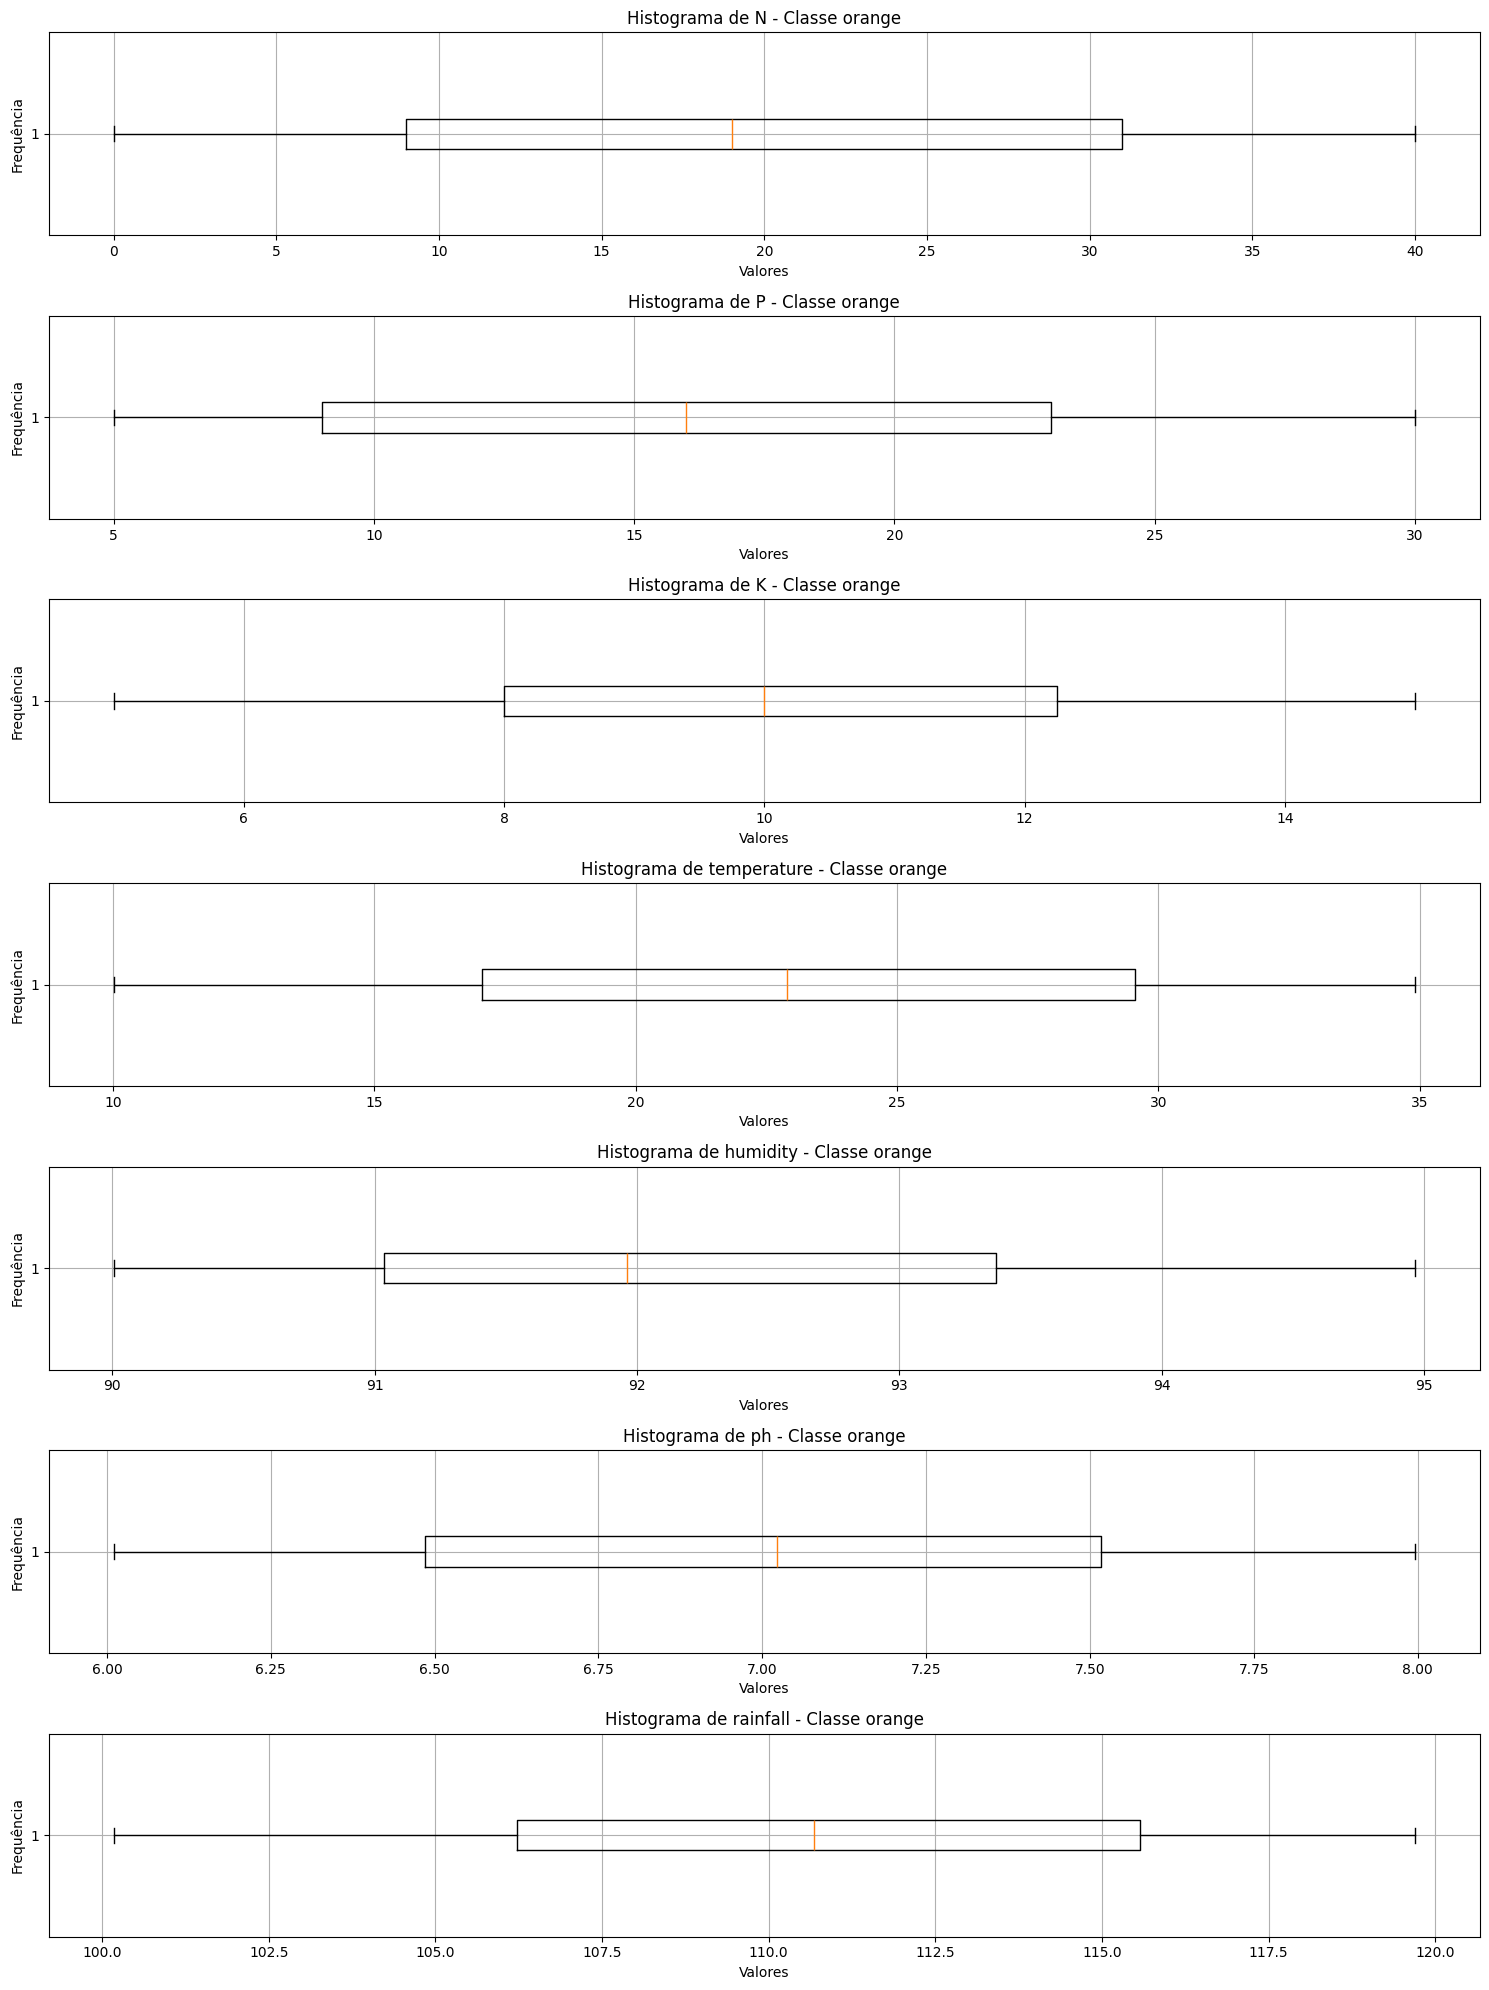

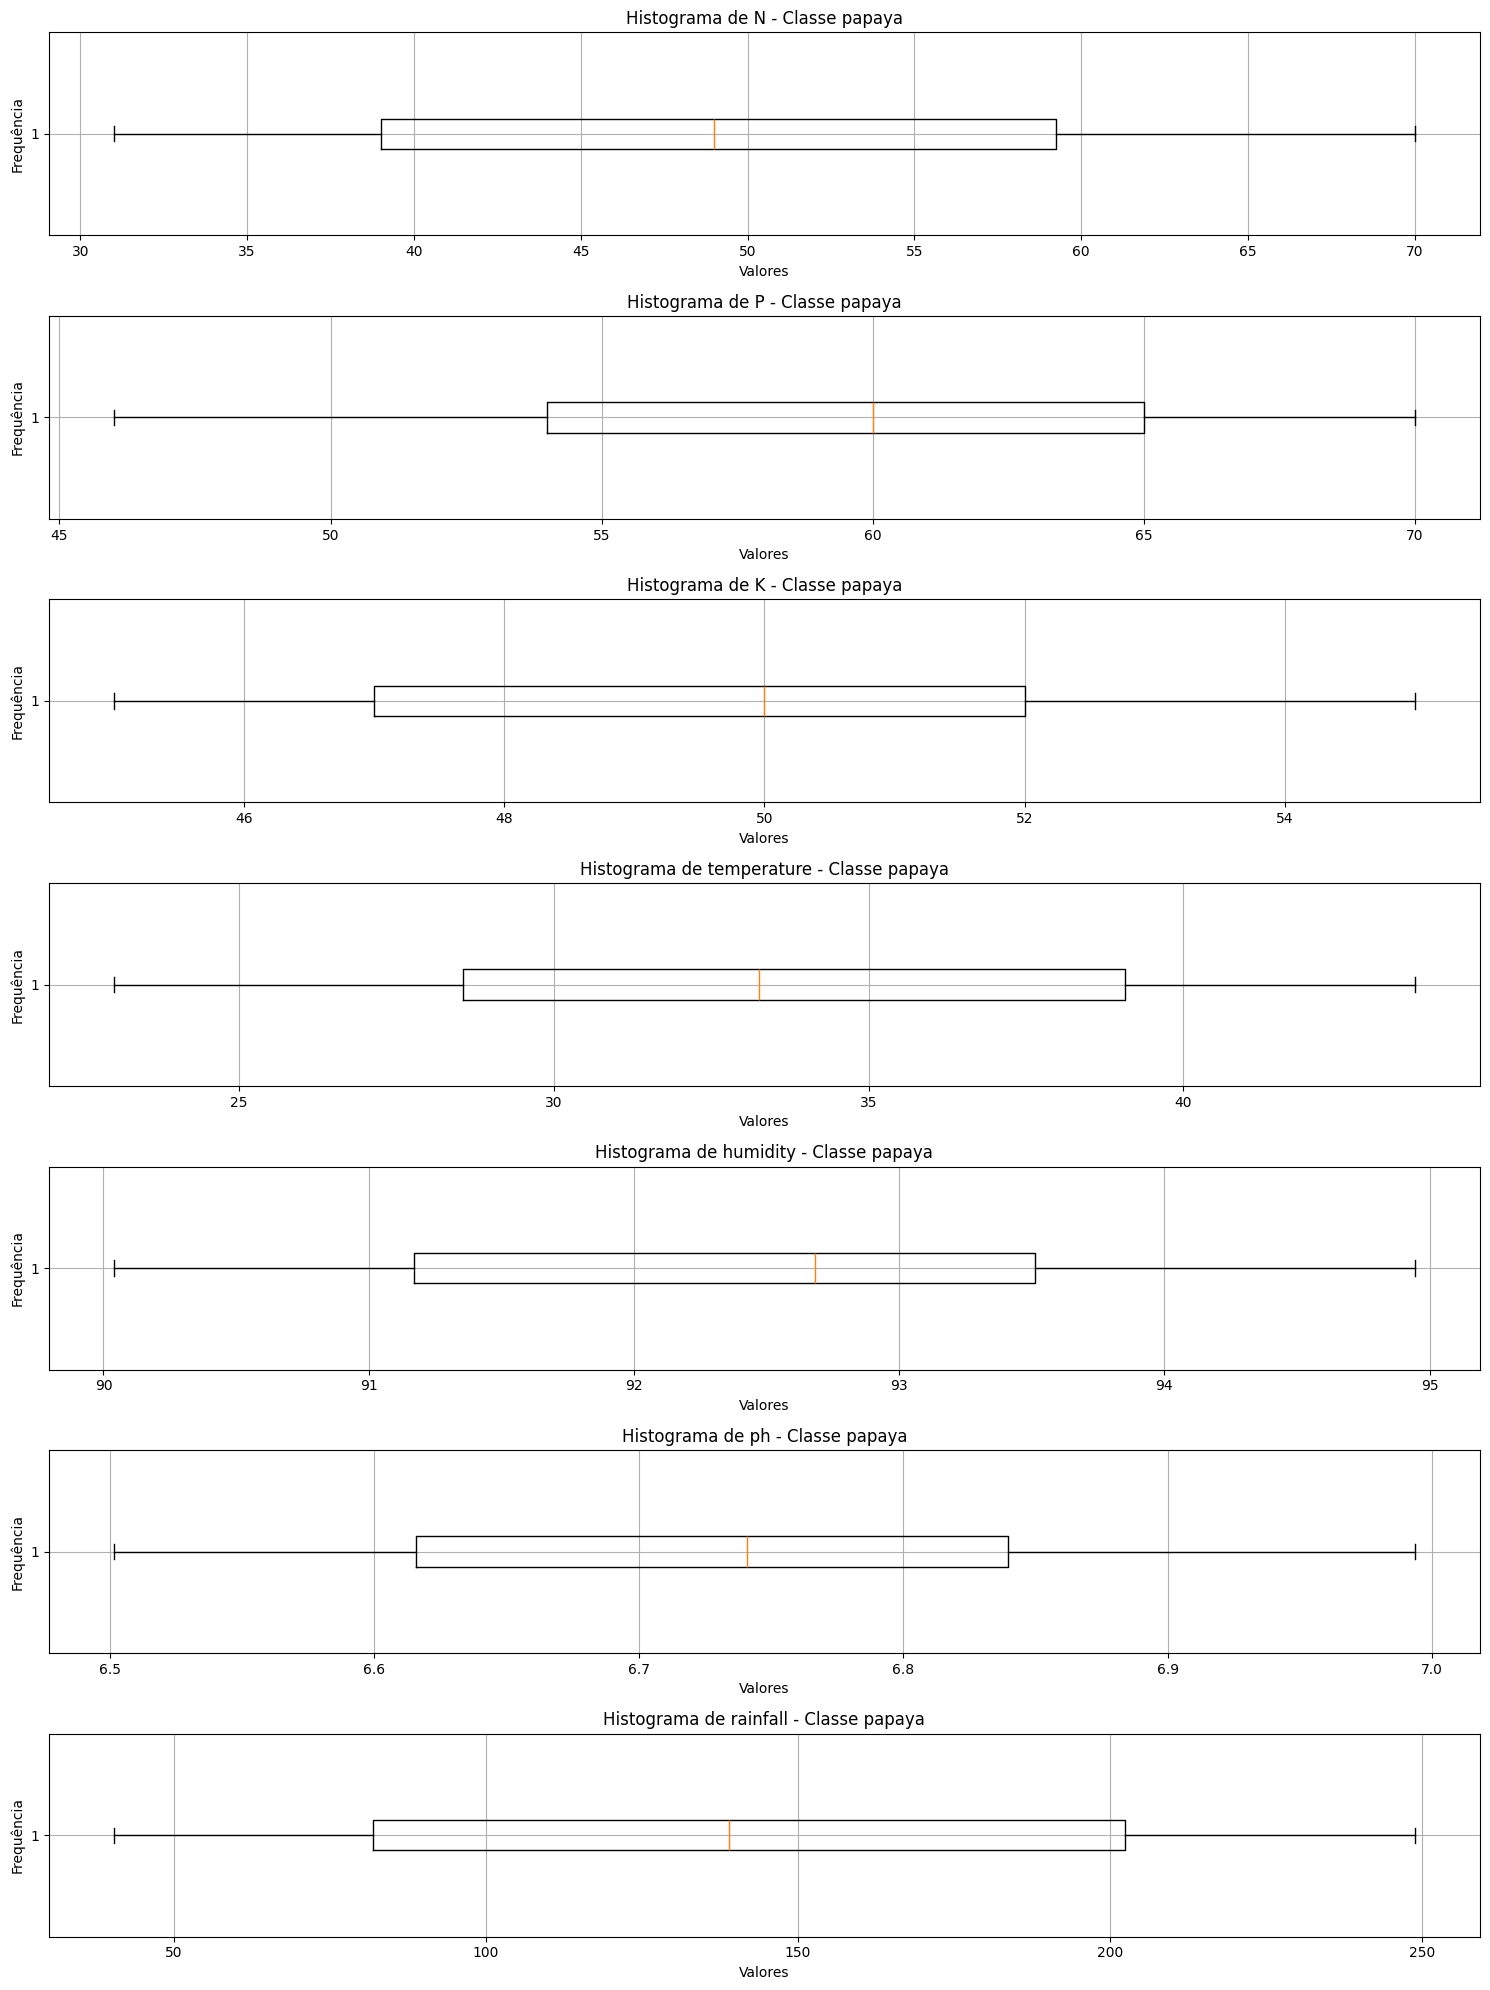

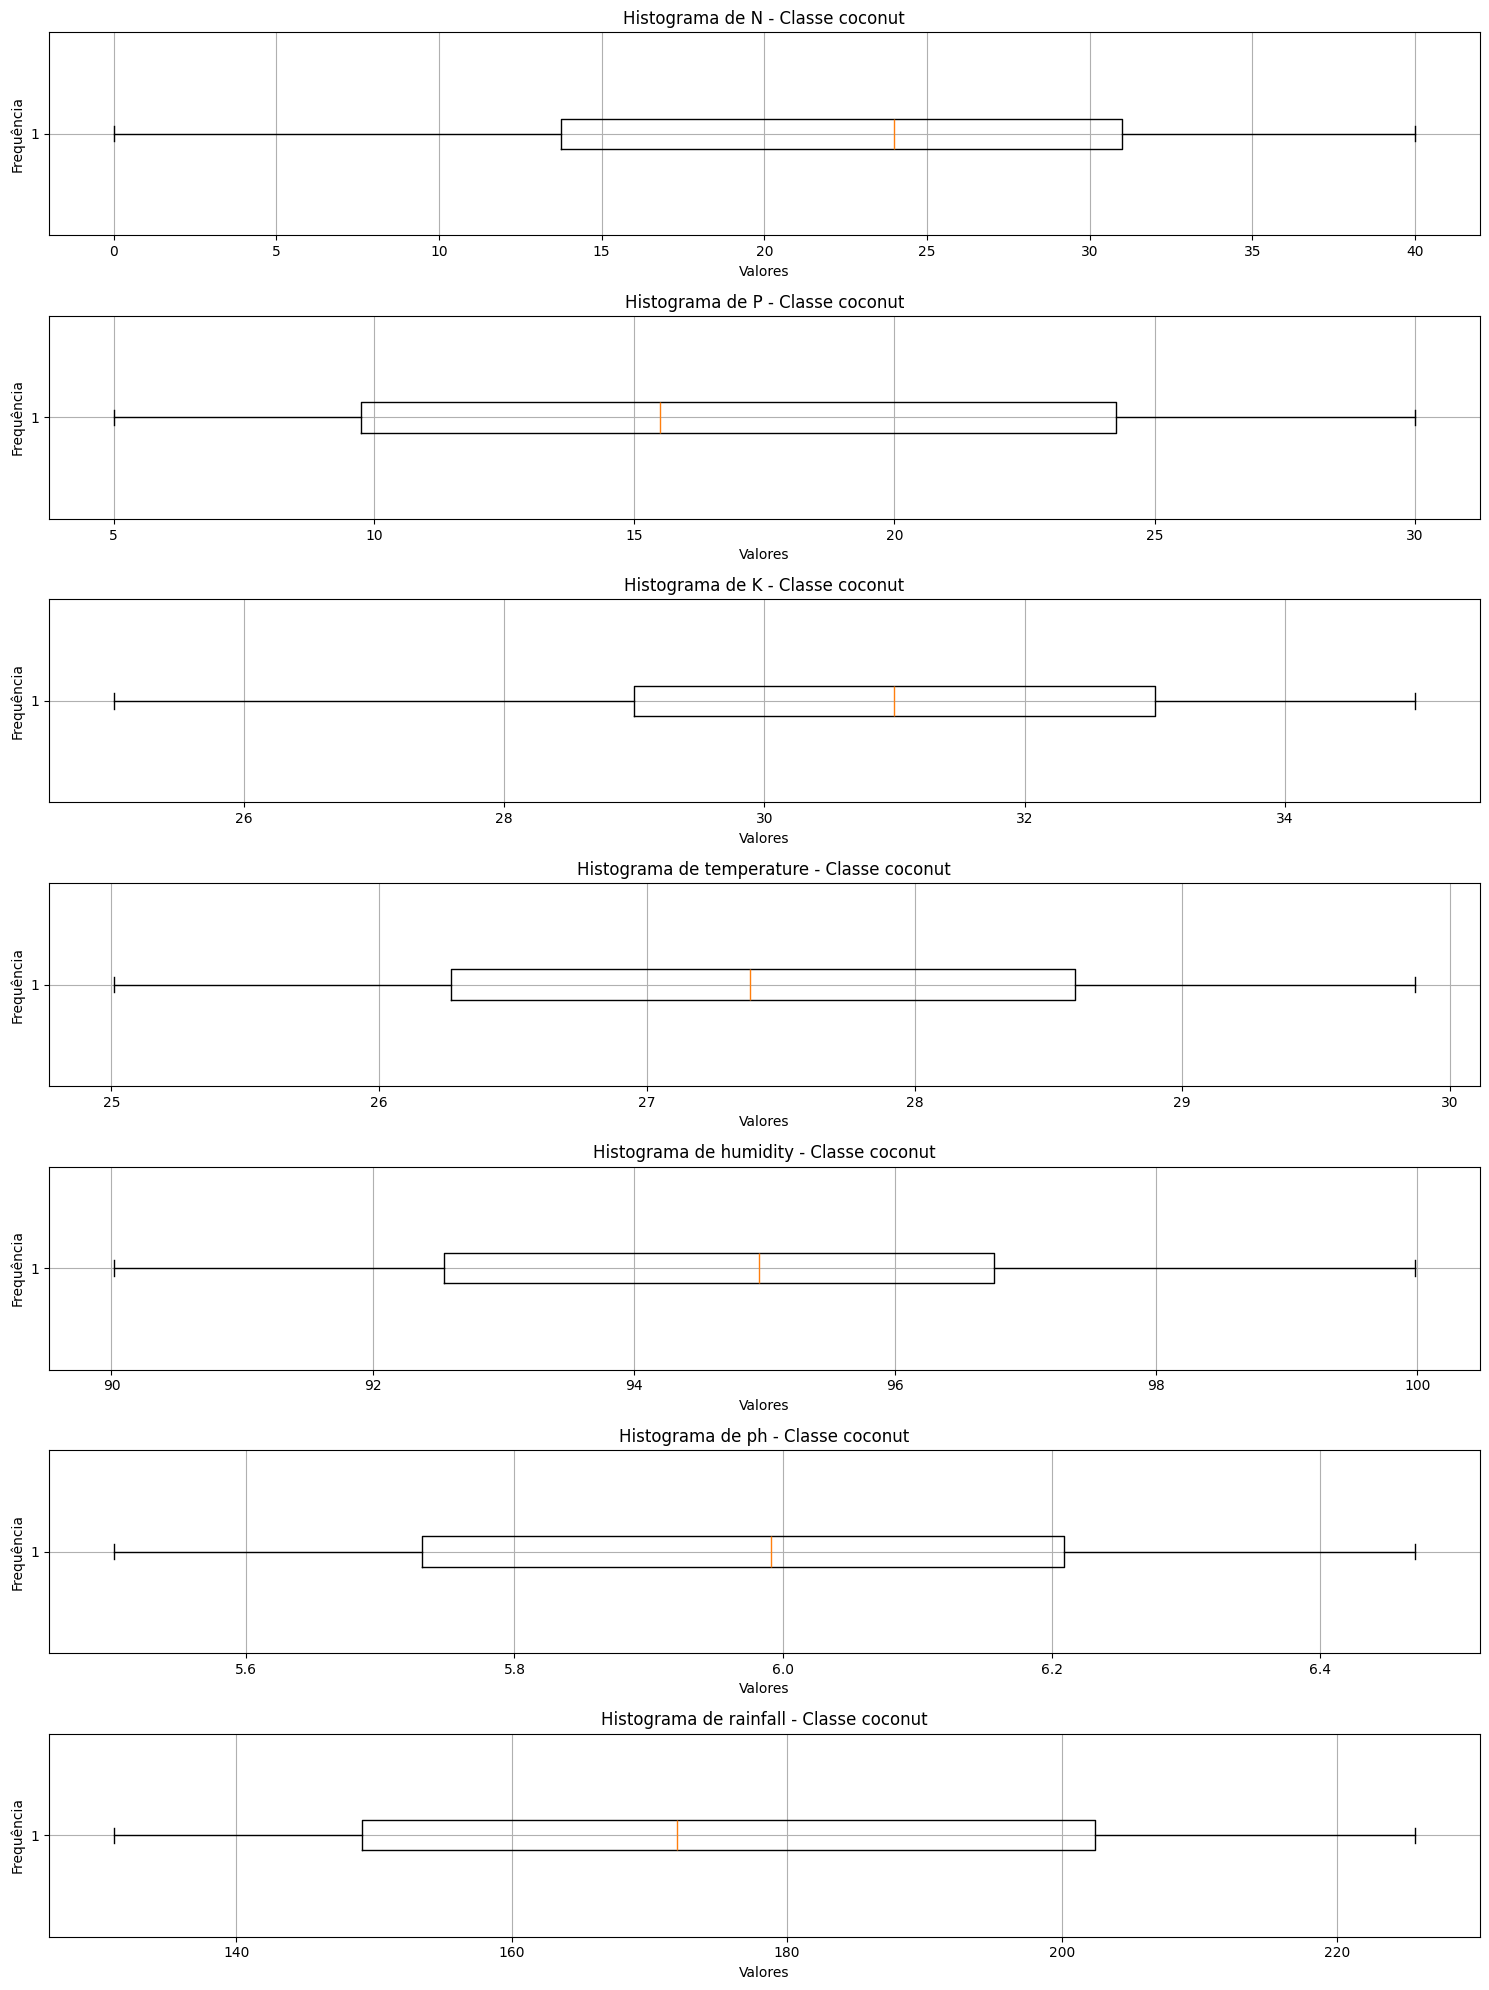

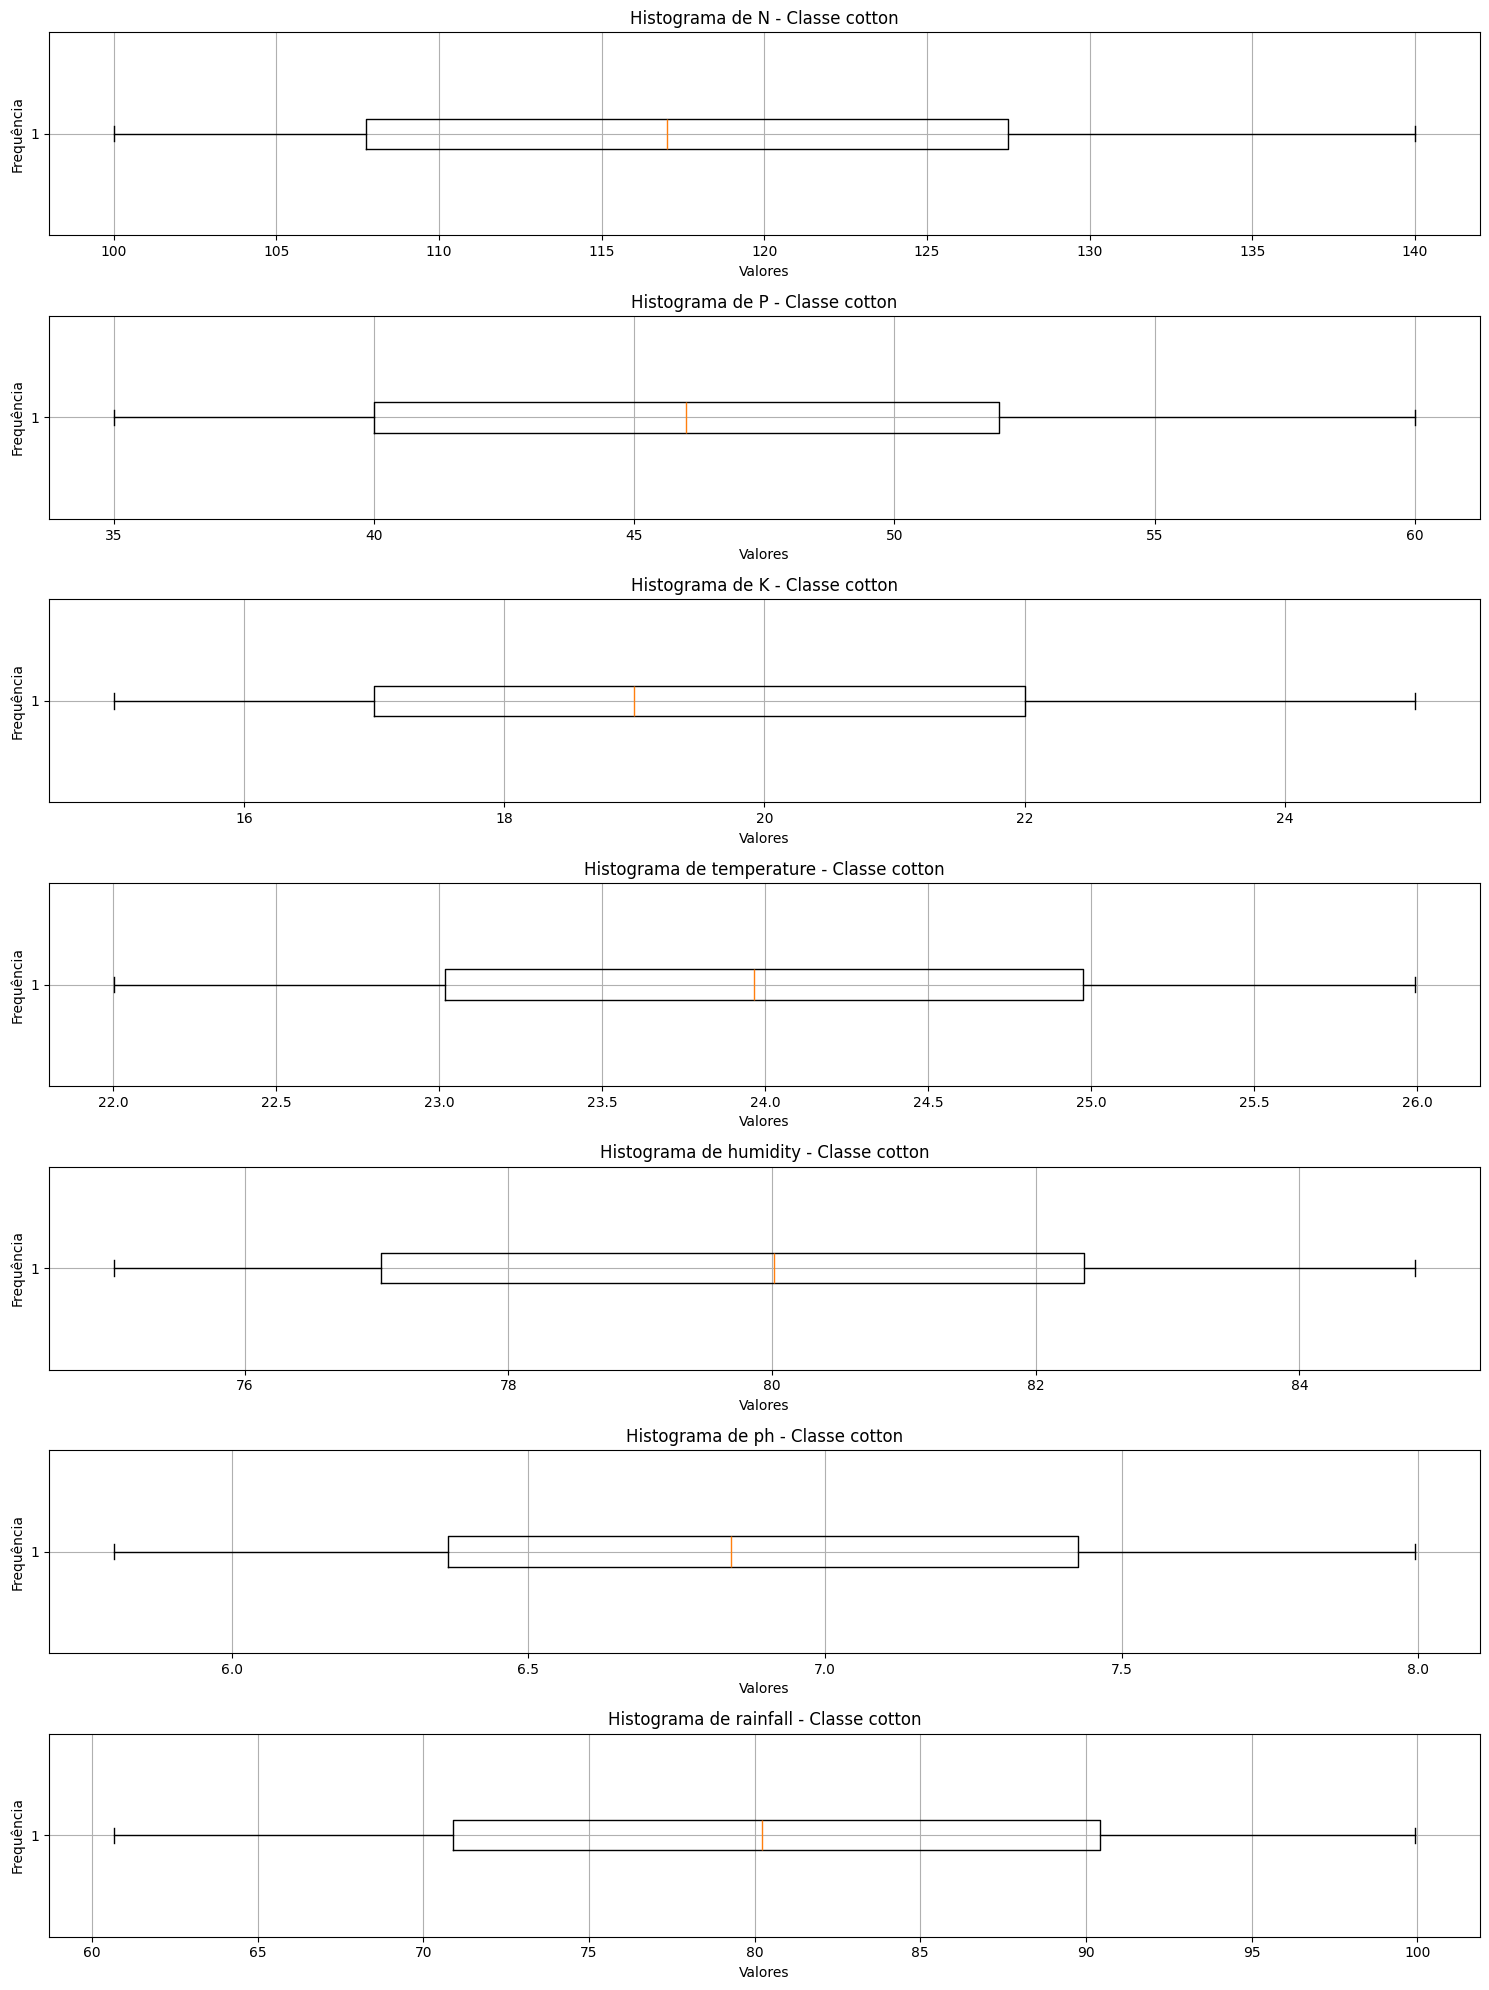

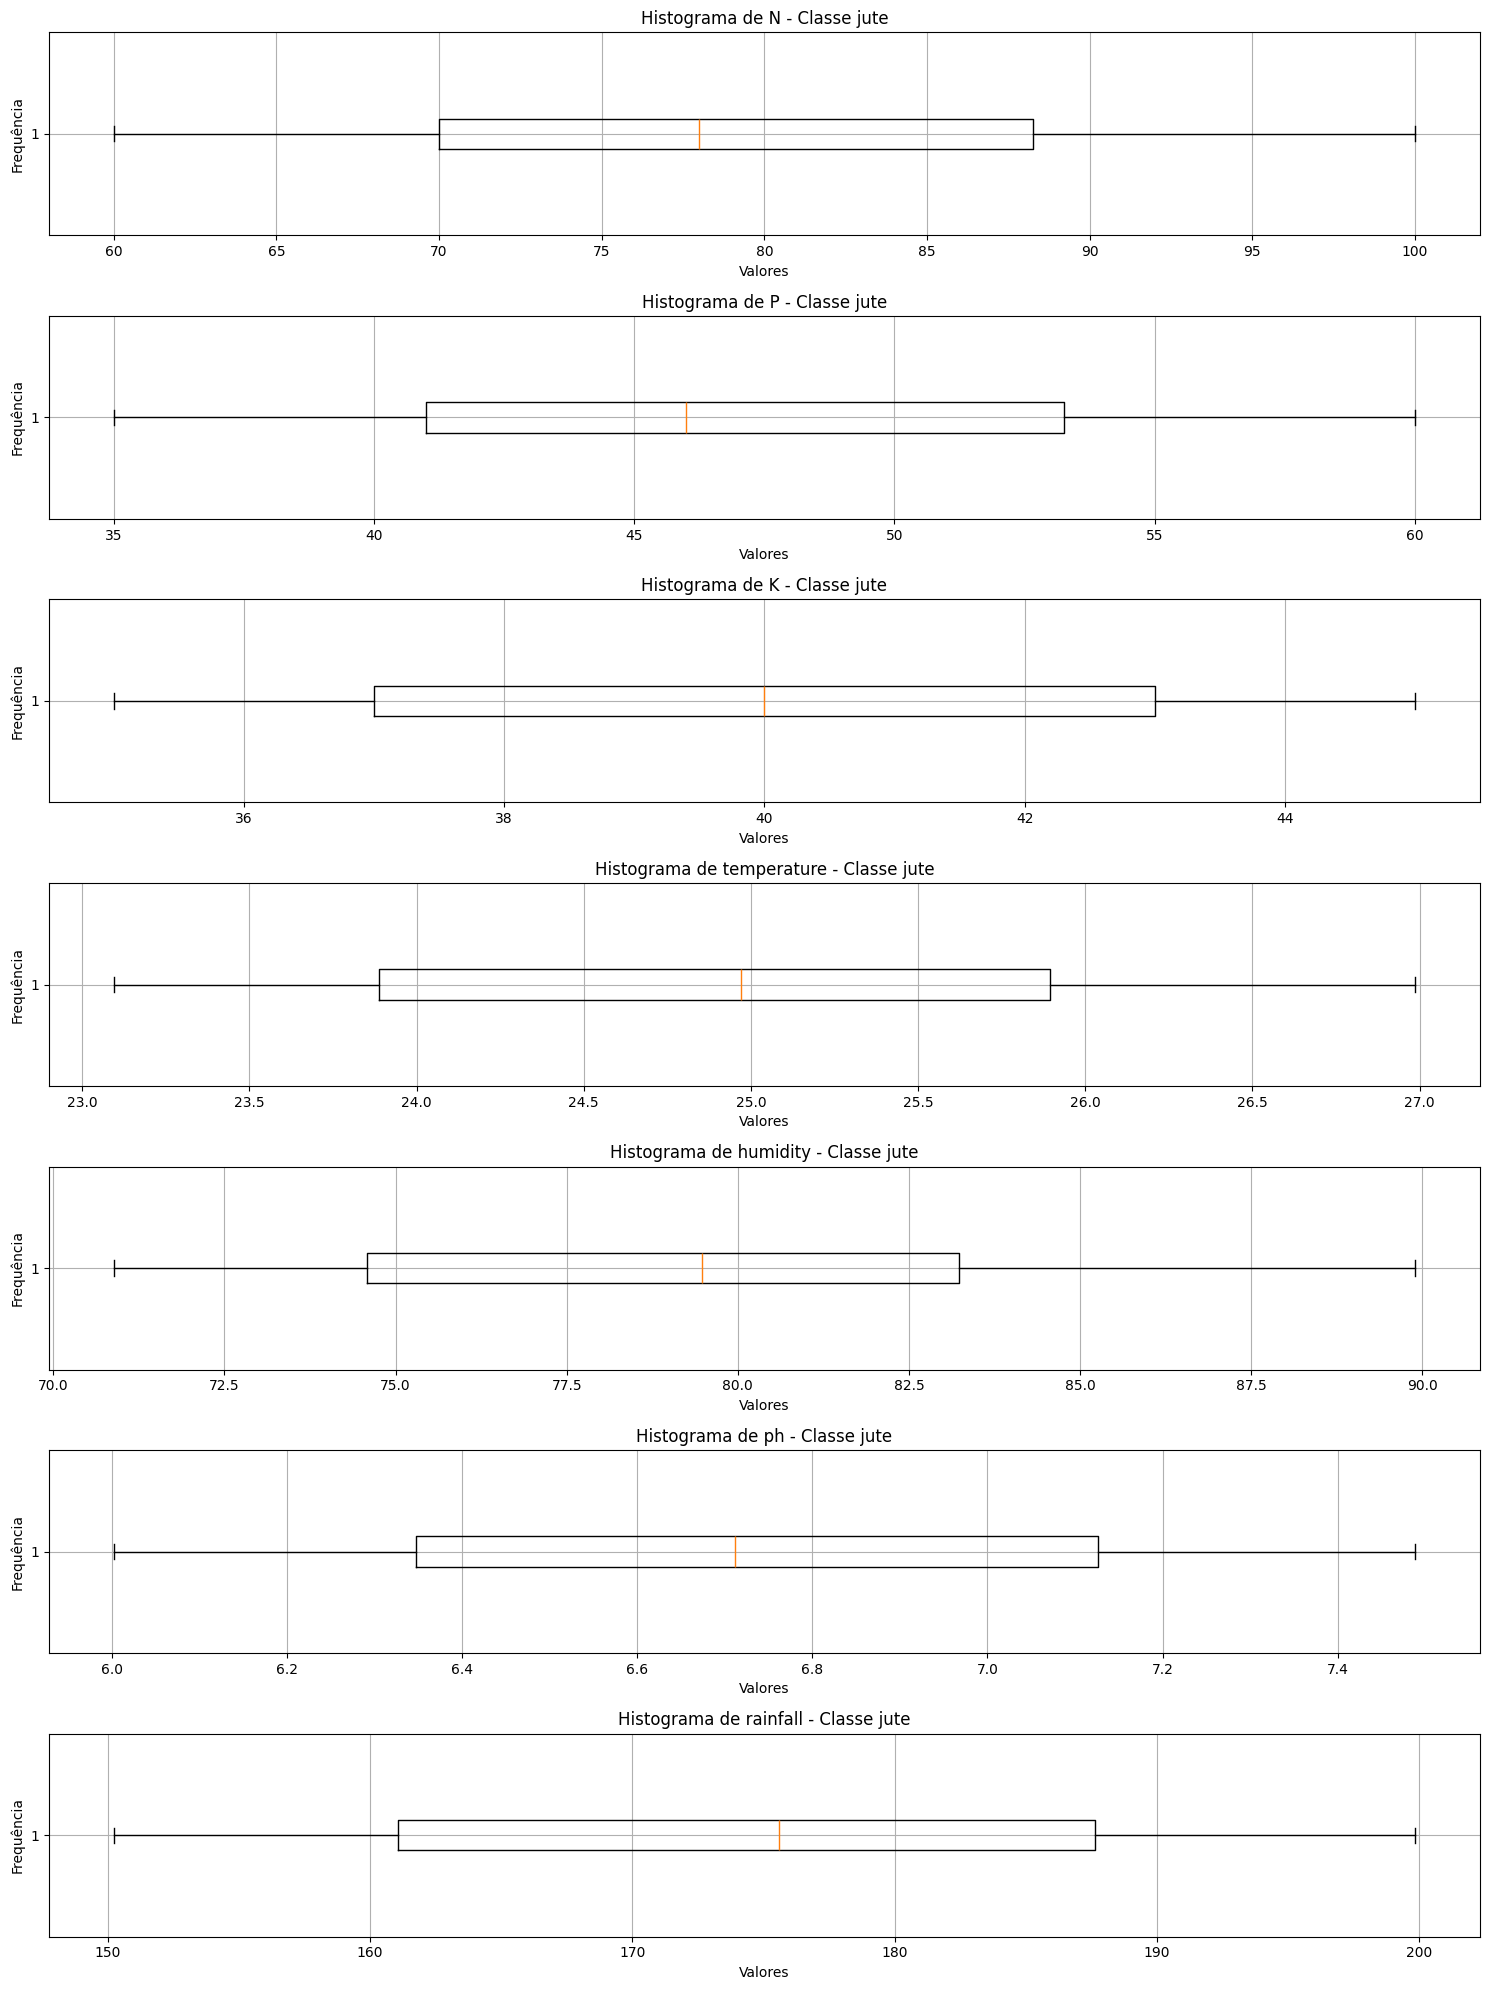

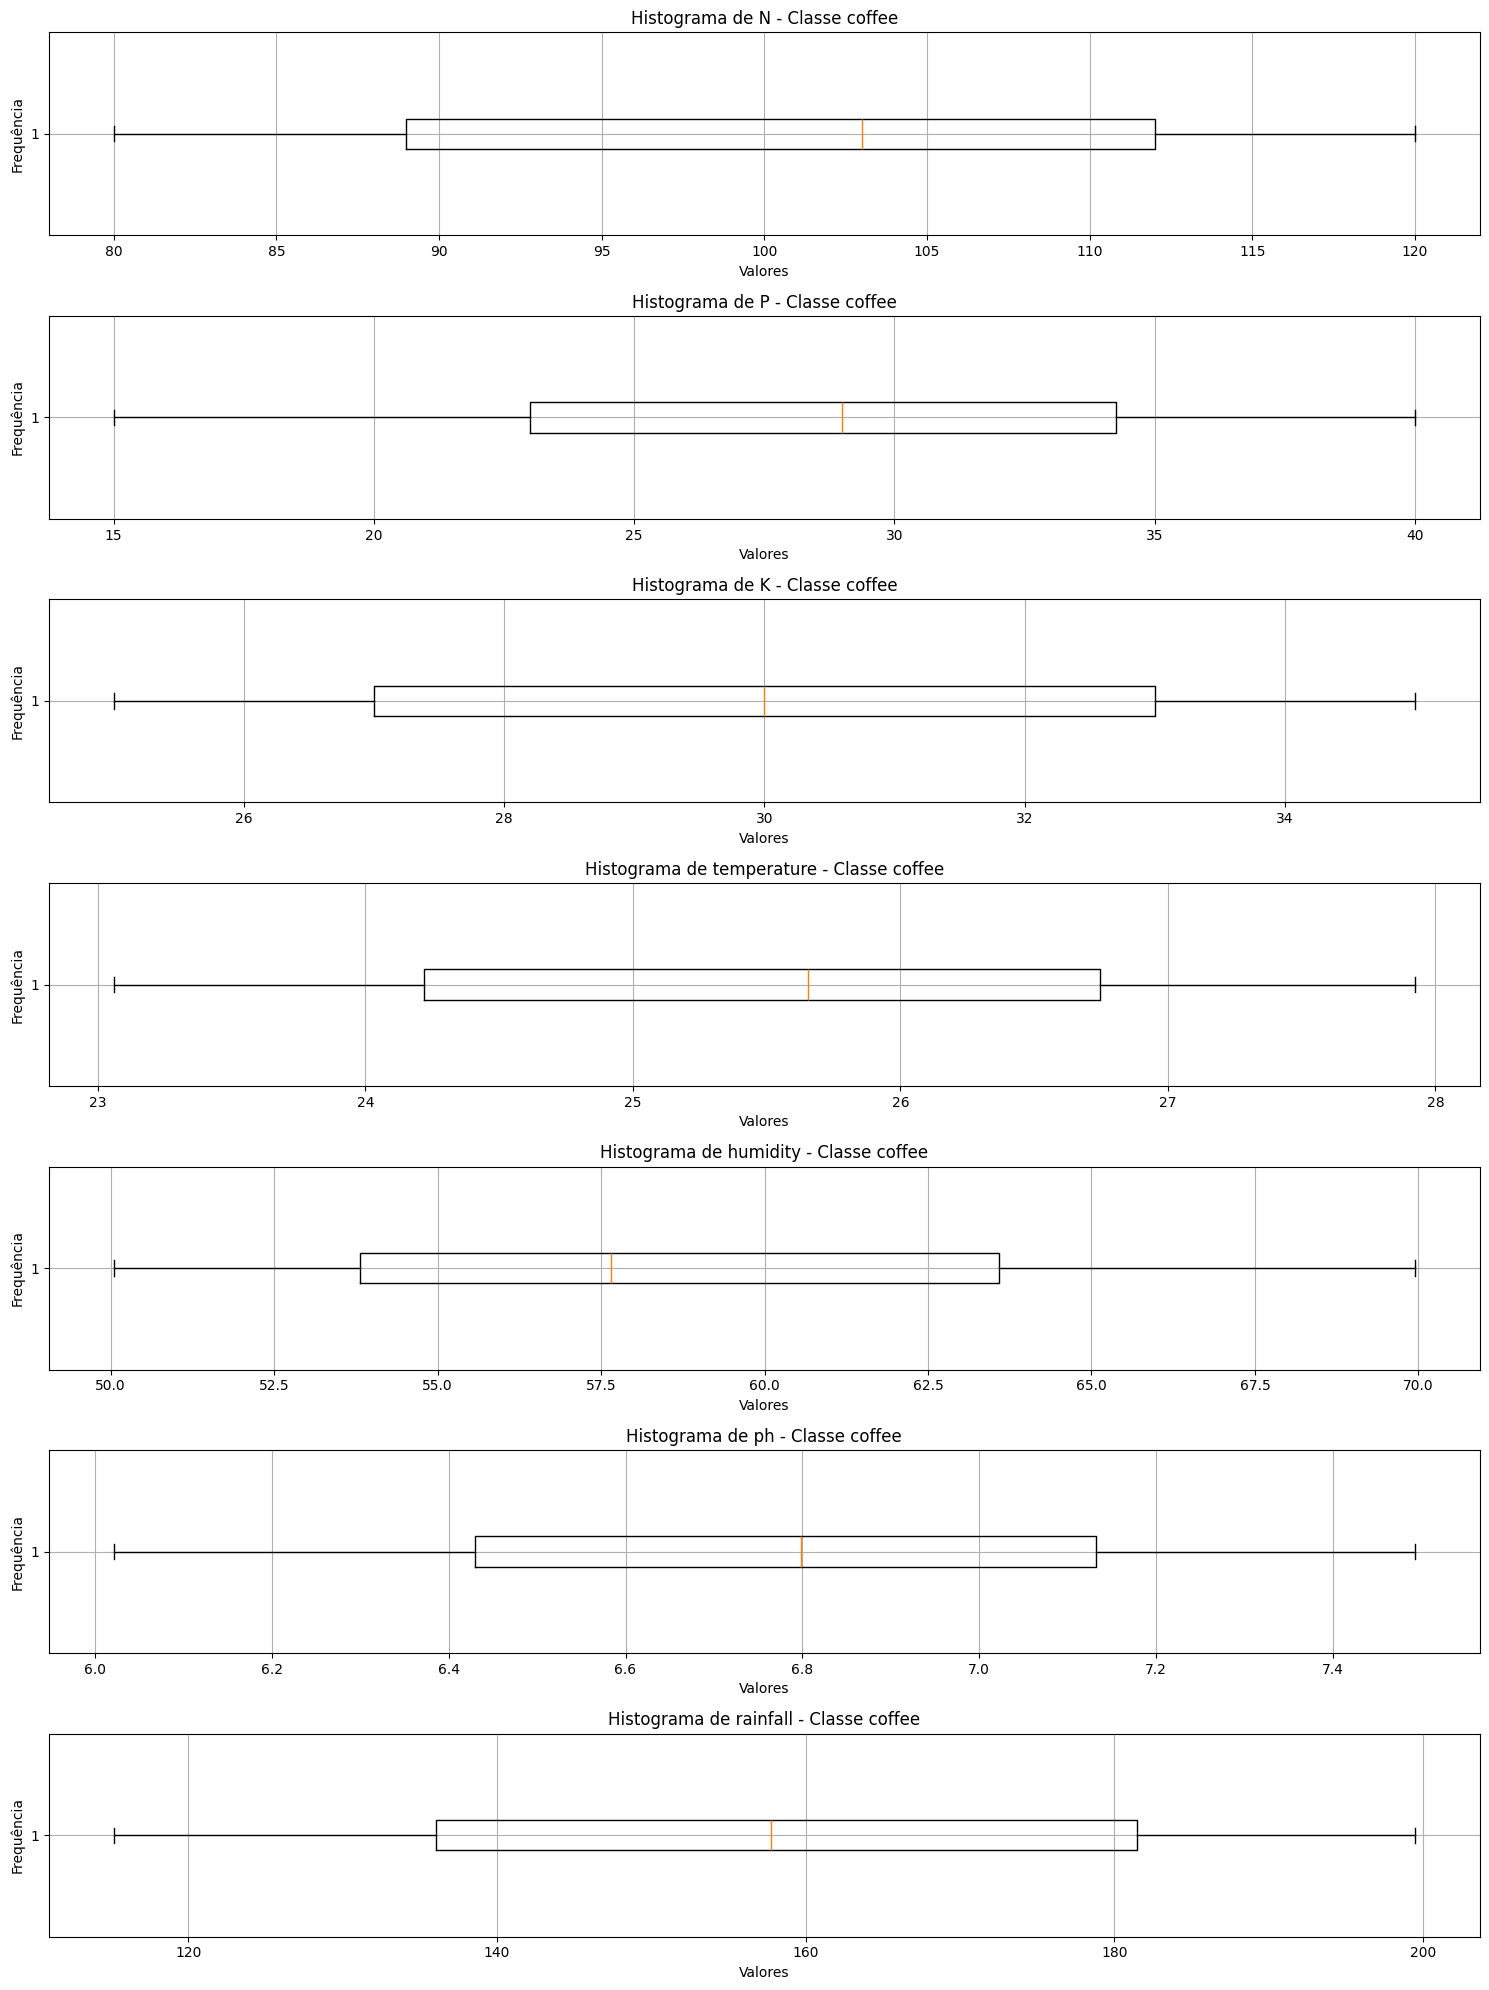

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Número de classes no dataset
num_classes = crop_recomendation['label'].nunique()

# Número de colunas por subplot
num_cols = 1
num_rows = 7

# Número de linhas necessárias para acomodar todas as colunas
num_rows = (len(crop_recomendation.columns) - 1 + num_cols - 1) // num_cols

# Loop para criar os subplots para cada classe
for classe in crop_recomendation['label'].unique():
    # Filtra os dados para a classe atual
    class_data = crop_recomendation[crop_recomendation['label'] == classe]

    # Cria um novo subplot para a classe atual
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

    # Loop para criar os histogramas para cada variável (coluna) do DataFrame
    for i, column in enumerate(crop_recomendation.columns[:-1]):  # Exclui a coluna 'classe'
        row = i // num_cols
        col = i % num_cols
        class_data = crop_recomendation[crop_recomendation['label'] == classe]
        axes[row].boxplot(class_data[column], vert=False)
        #axes[row].hist(class_data[column], bins='auto', color='skyblue', alpha=0.7)
        axes[row].set_title(f'Histograma de {column} - Classe {classe}')
        axes[row].set_xlabel('Valores')
        axes[row].set_ylabel('Frequência')
        axes[row].grid(True)

    # Remove eixos vazios
    for i in range(len(crop_recomendation.columns) - 1, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    # Ajusta o layout do subplot
    plt.tight_layout()

    # Exibe o subplot para a classe atual
    plt.show()

    ## Como os dados possuem várias classes na váriavel label, foram realizadas as analises de boxplot separado por classe
    ## Com a análise discriminada por classe, os boxplot não apresentaram valore outliers

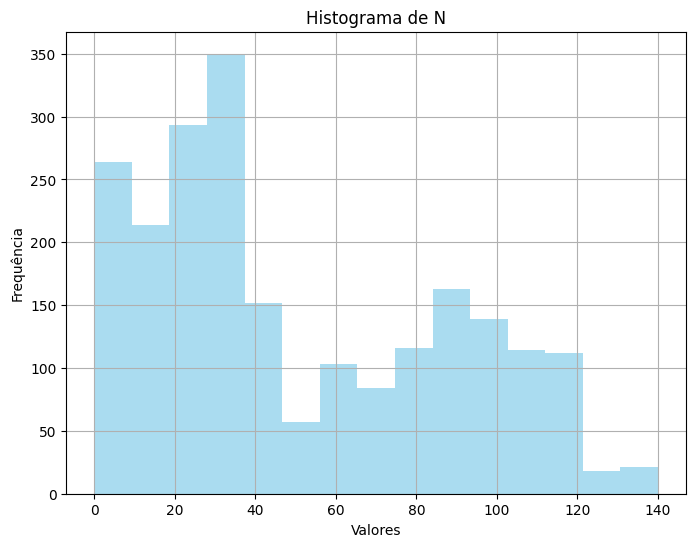

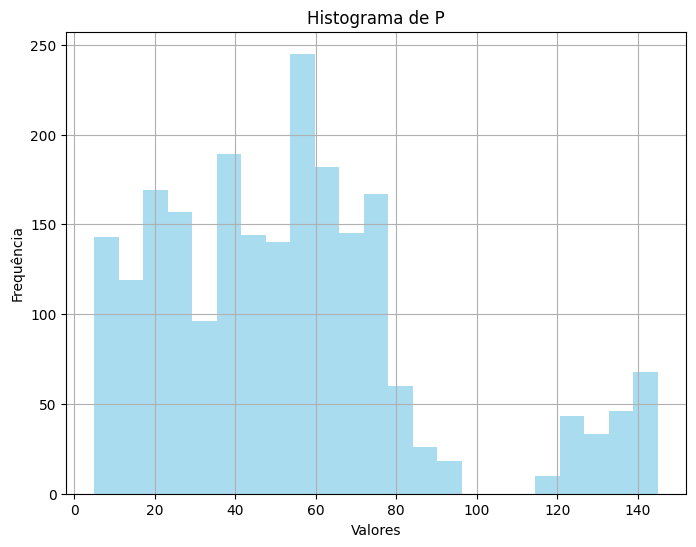

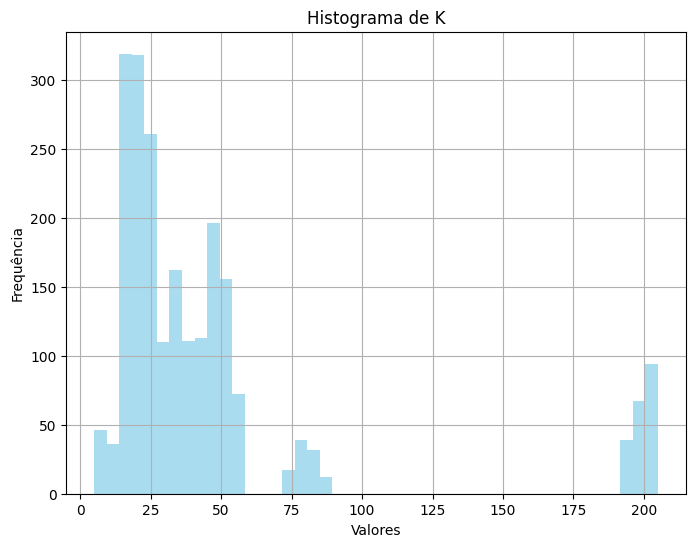

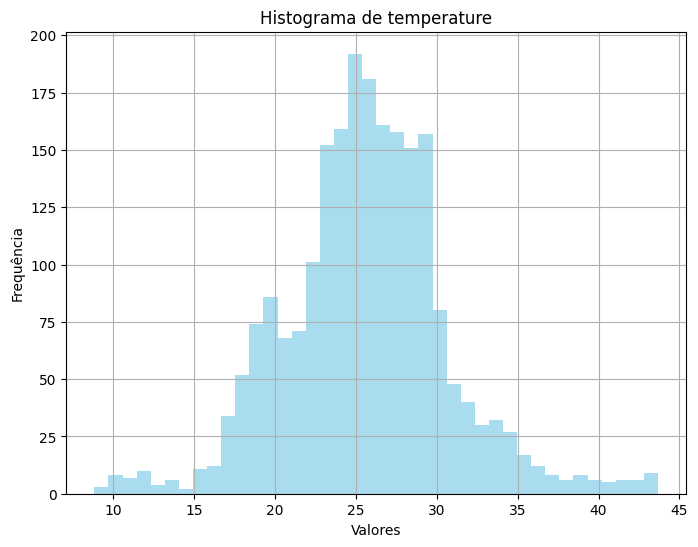

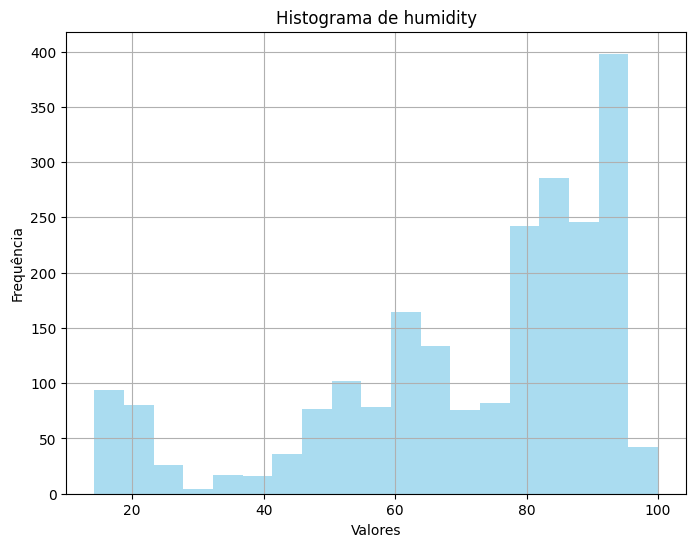

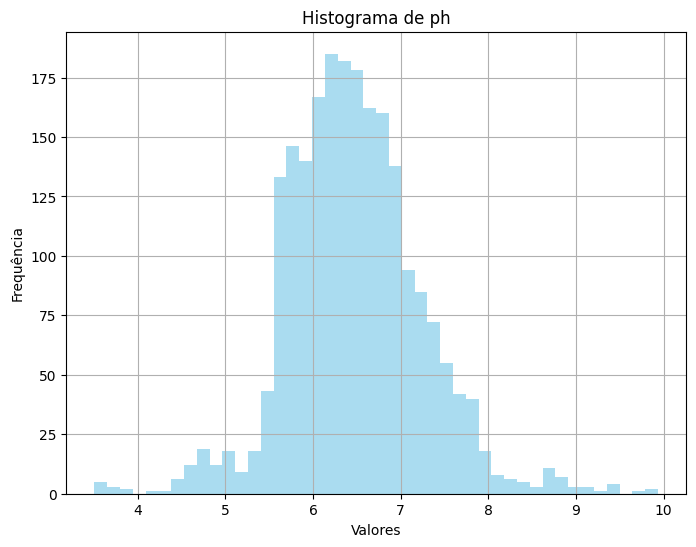

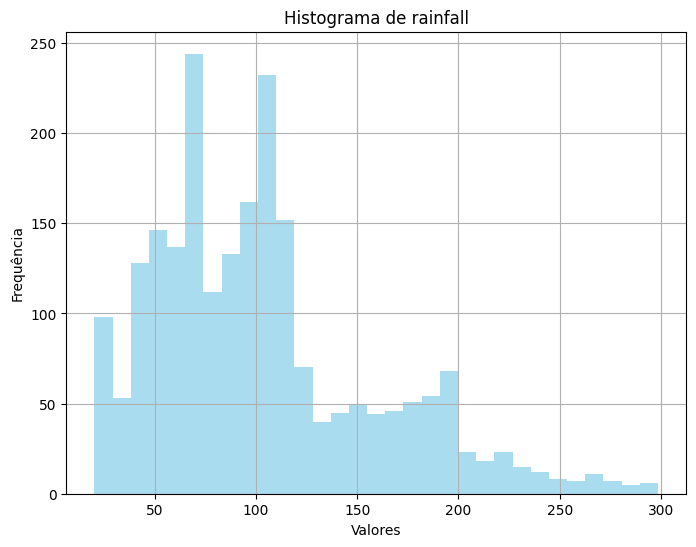

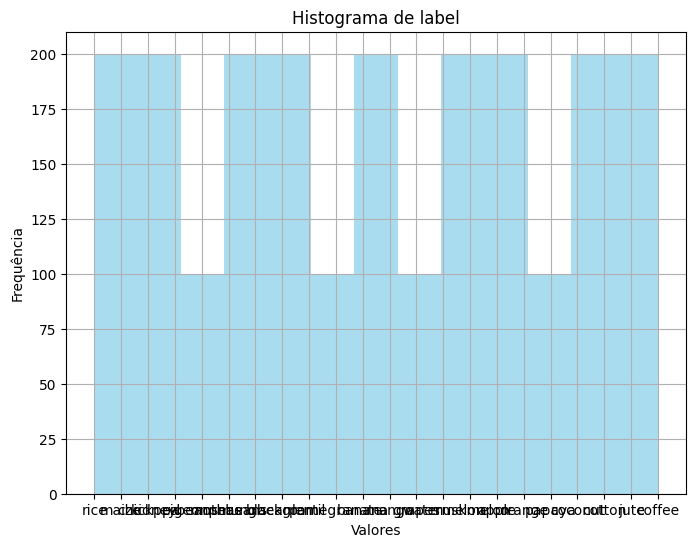

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Loop para criar histogramas para cada variável
for column in crop_recomendation.columns:
    plt.figure(figsize=(8, 6))  # Define o tamanho da figura
    plt.hist(crop_recomendation[column], bins='auto', color='skyblue', alpha=0.7)  # Cria o histograma
    plt.title(f'Histograma de {column}')  # Define o título do histograma
    plt.xlabel('Valores')  # Define o rótulo do eixo x
    plt.ylabel('Frequência')  # Define o rótulo do eixo y
    plt.grid(True)  # Adiciona linhas de grade ao gráfico
    plt.show()  # Exibe o histograma

## Observando a distribuião geral dos dados de cada variável através do histograma

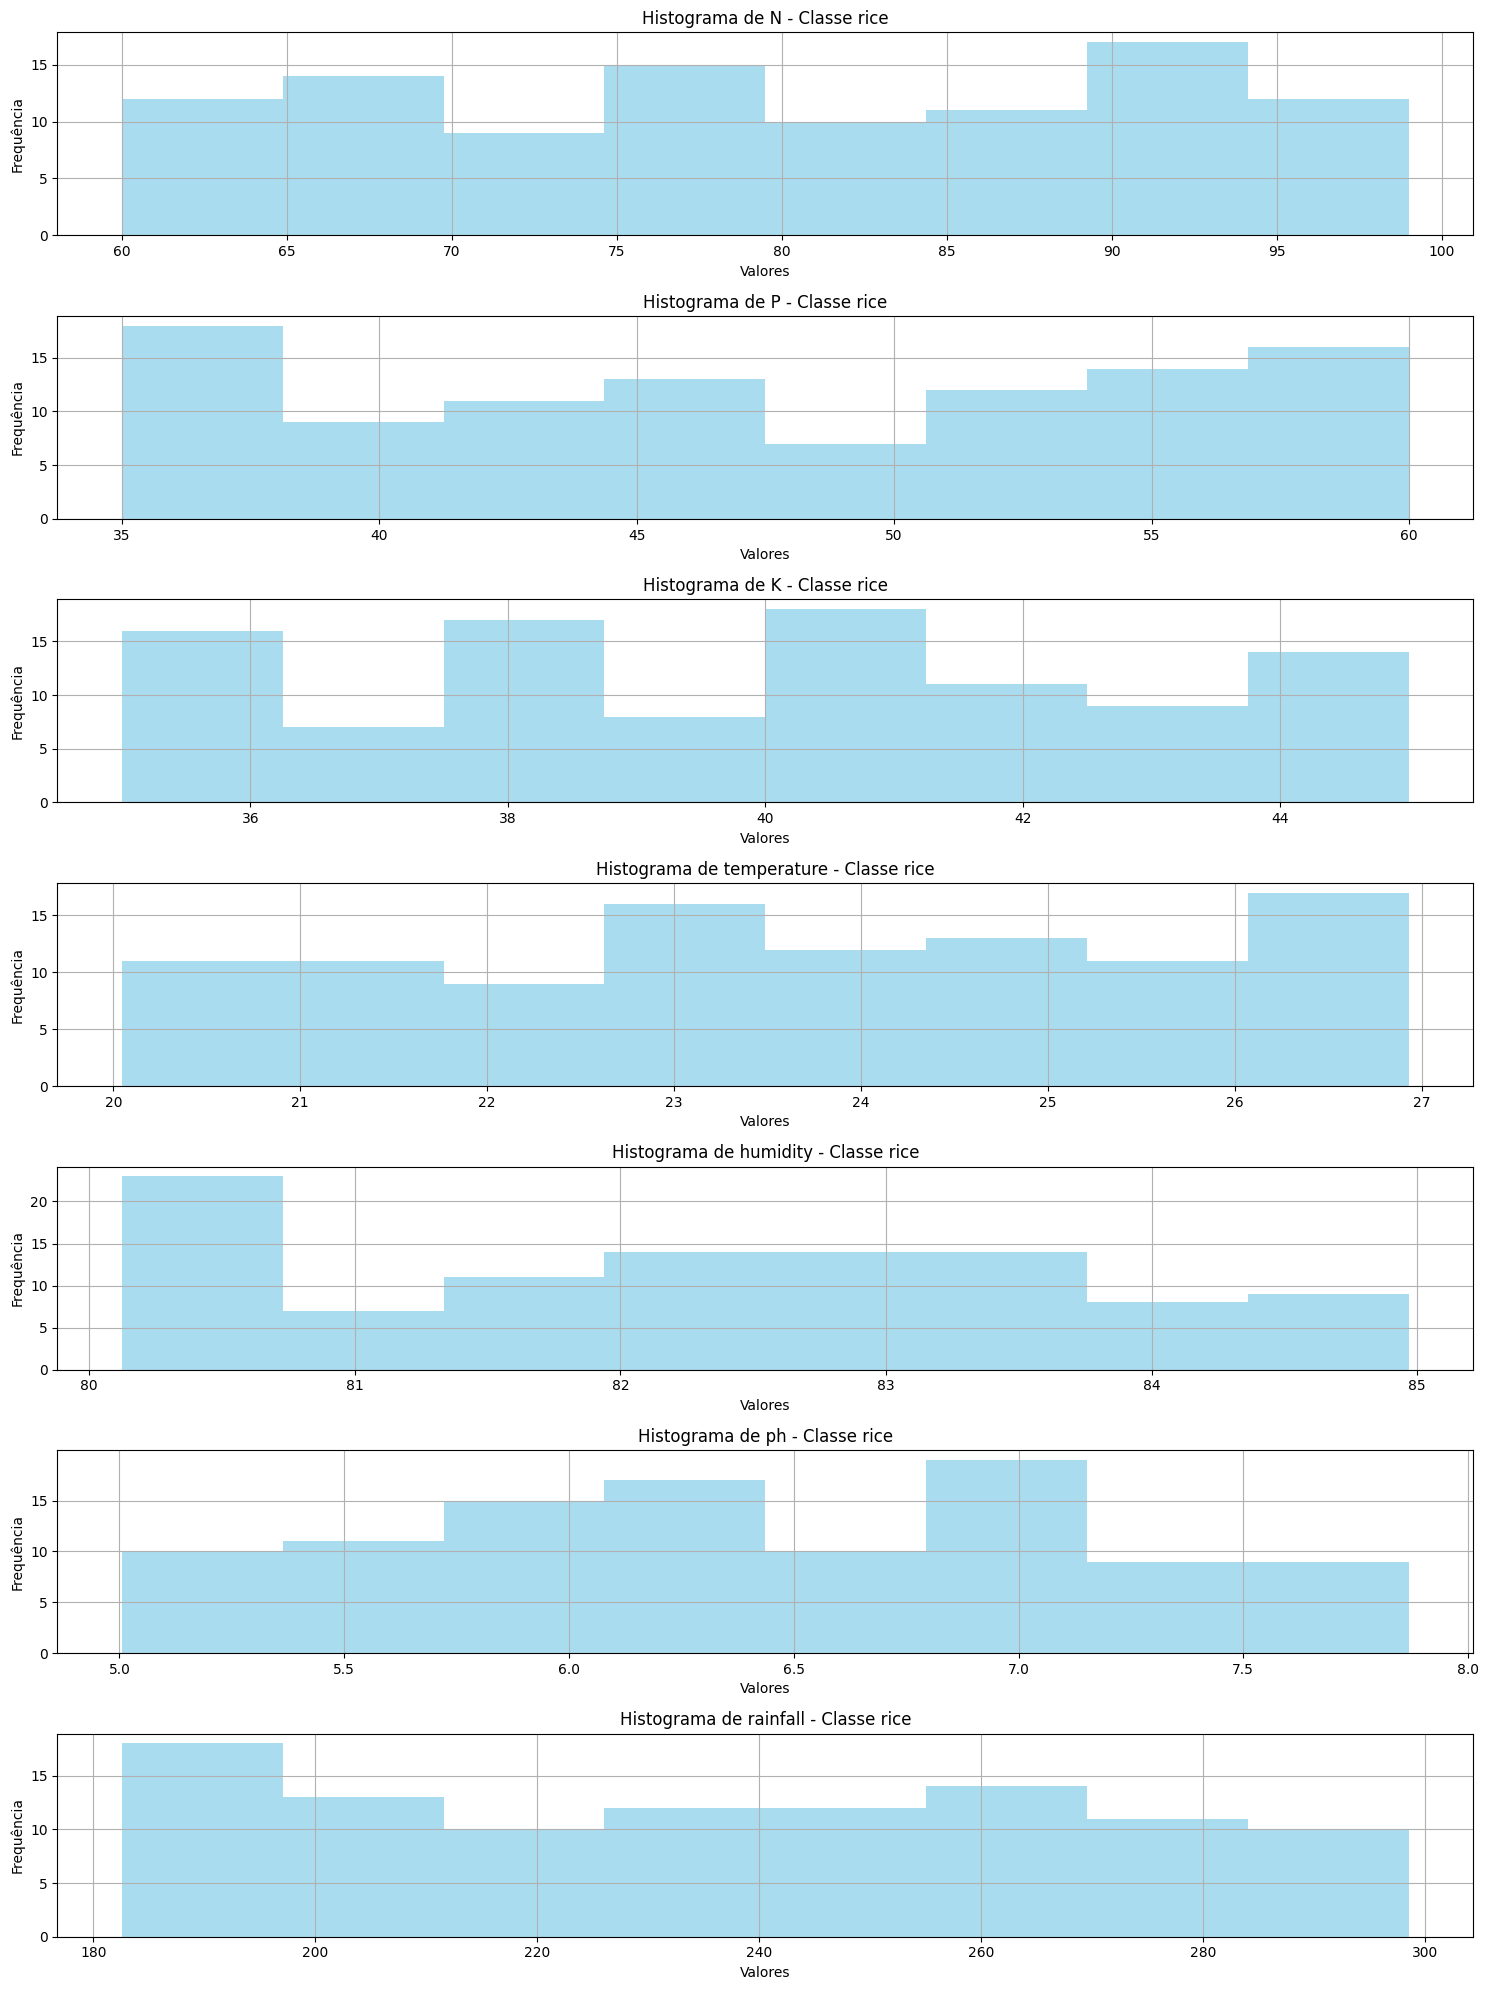

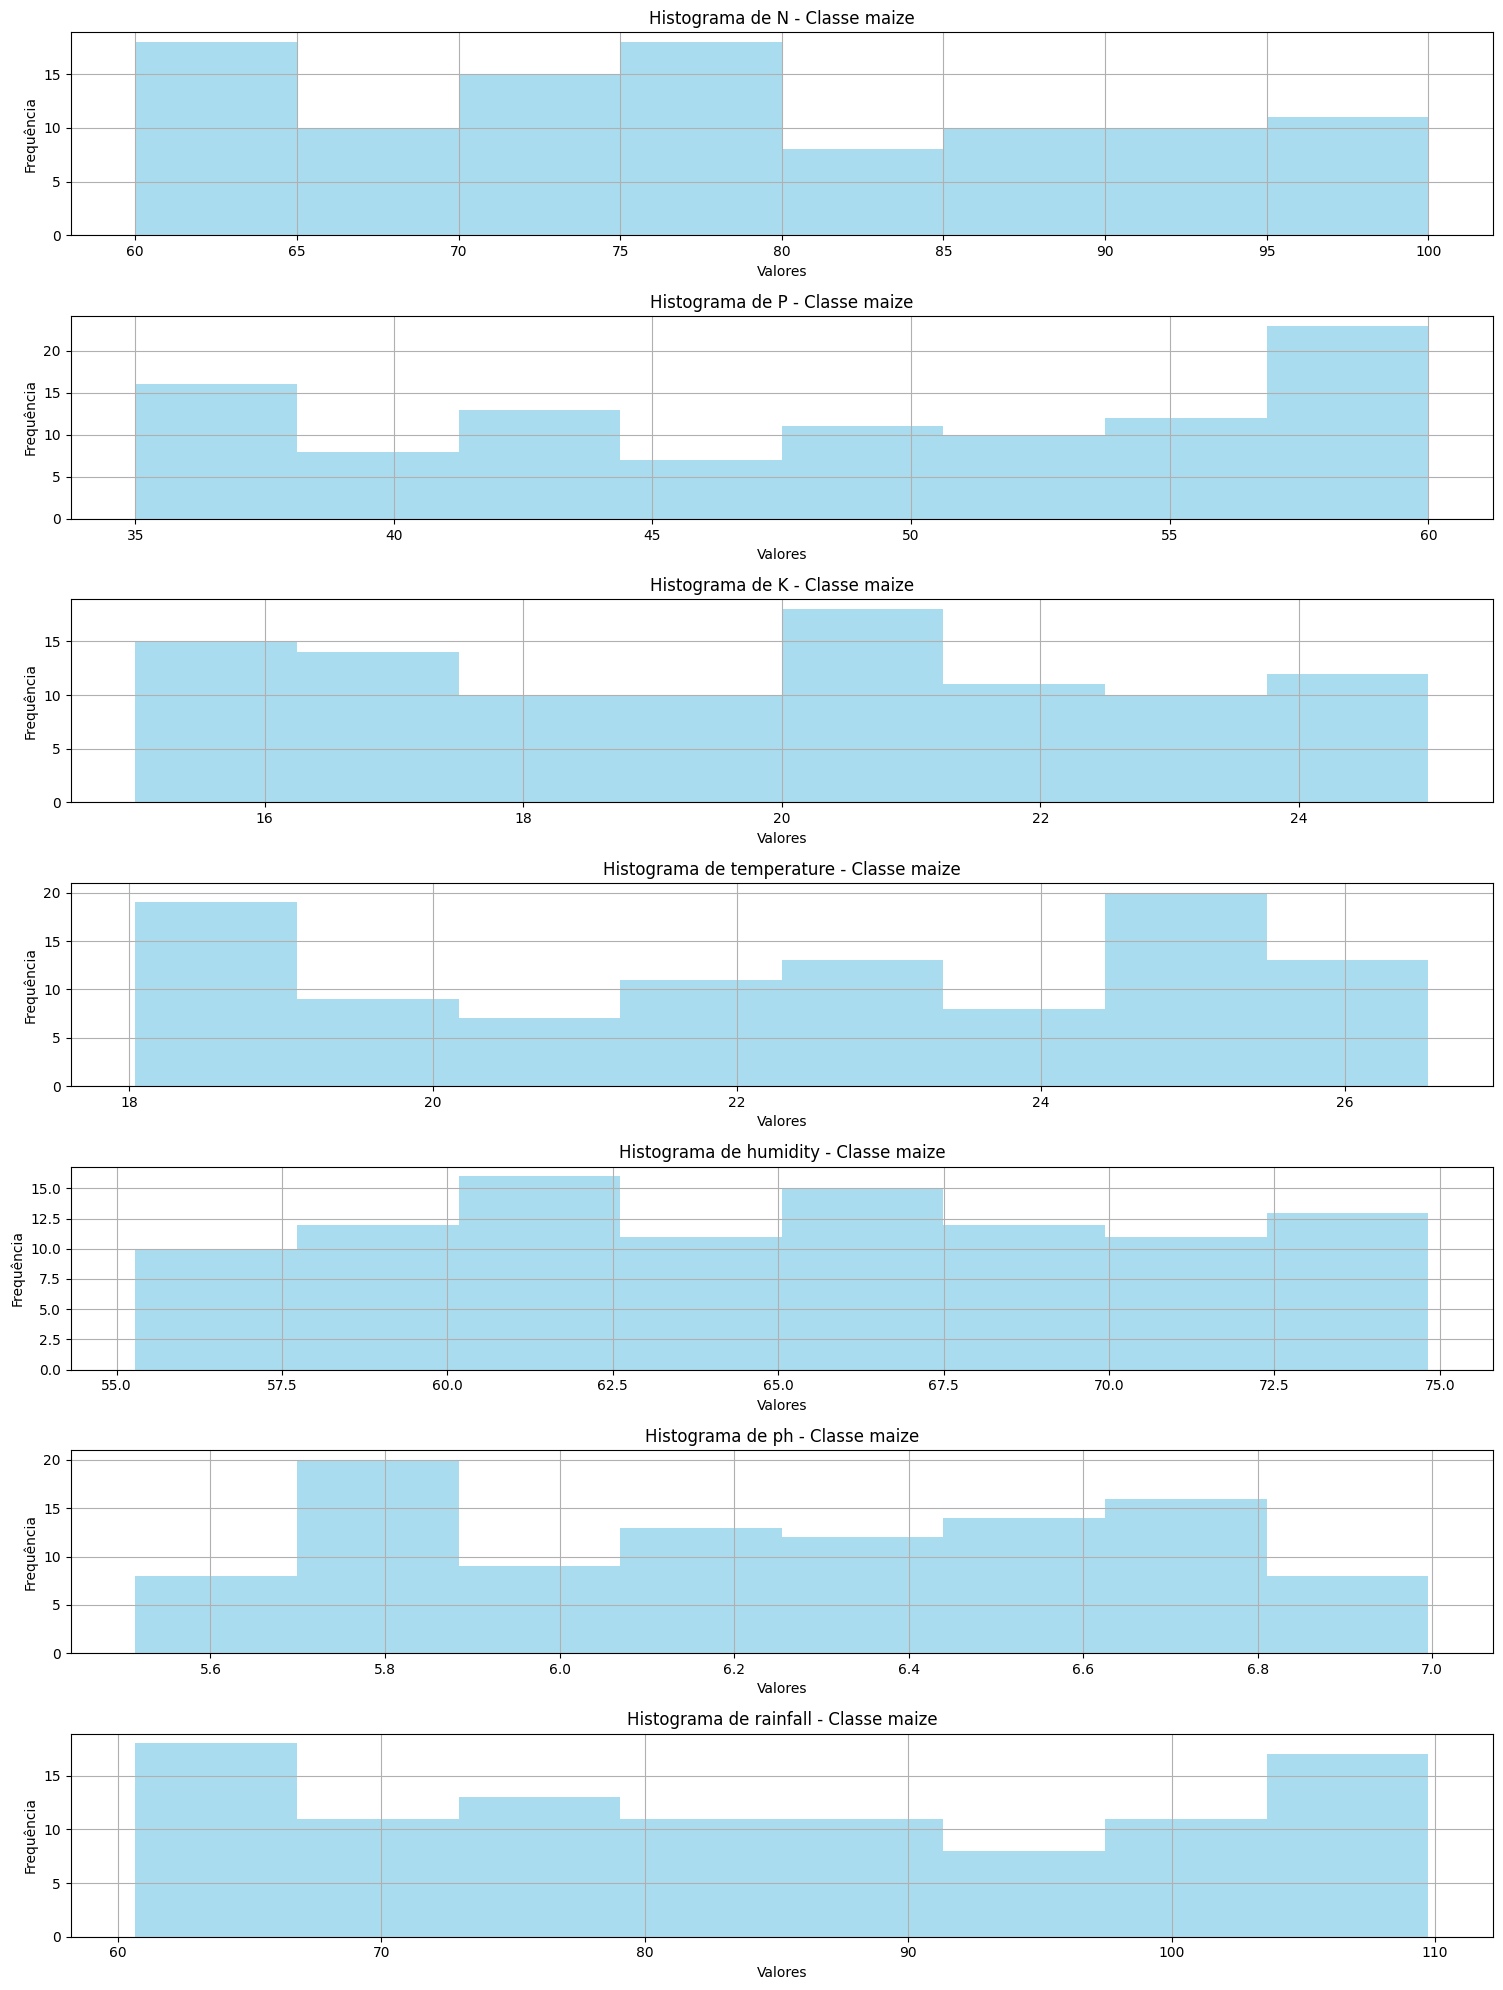

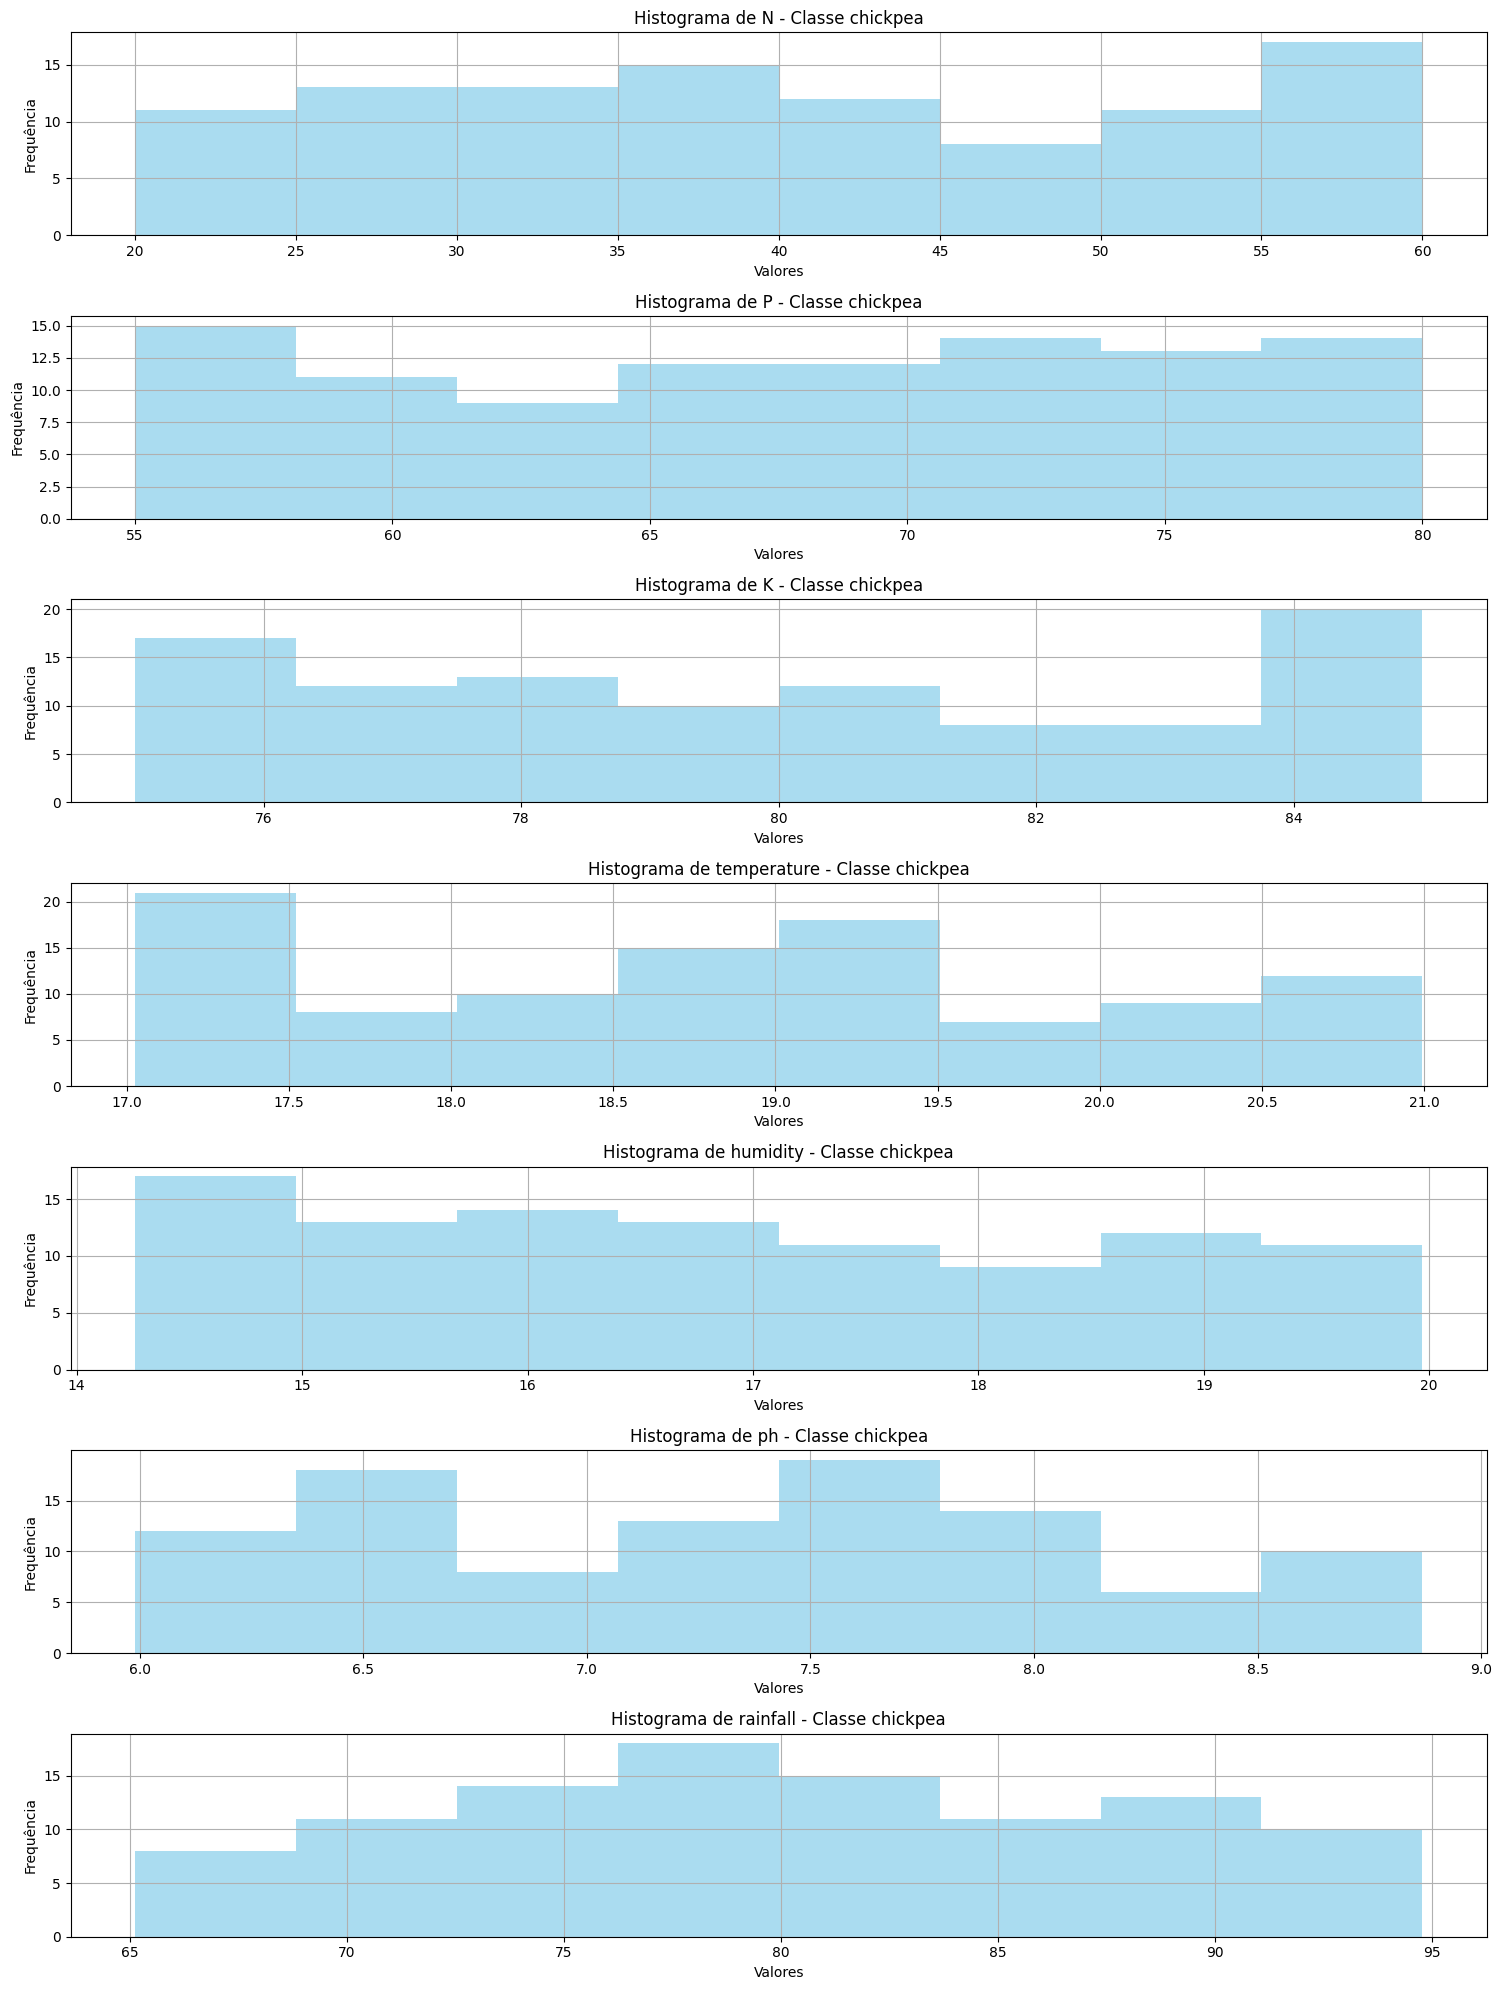

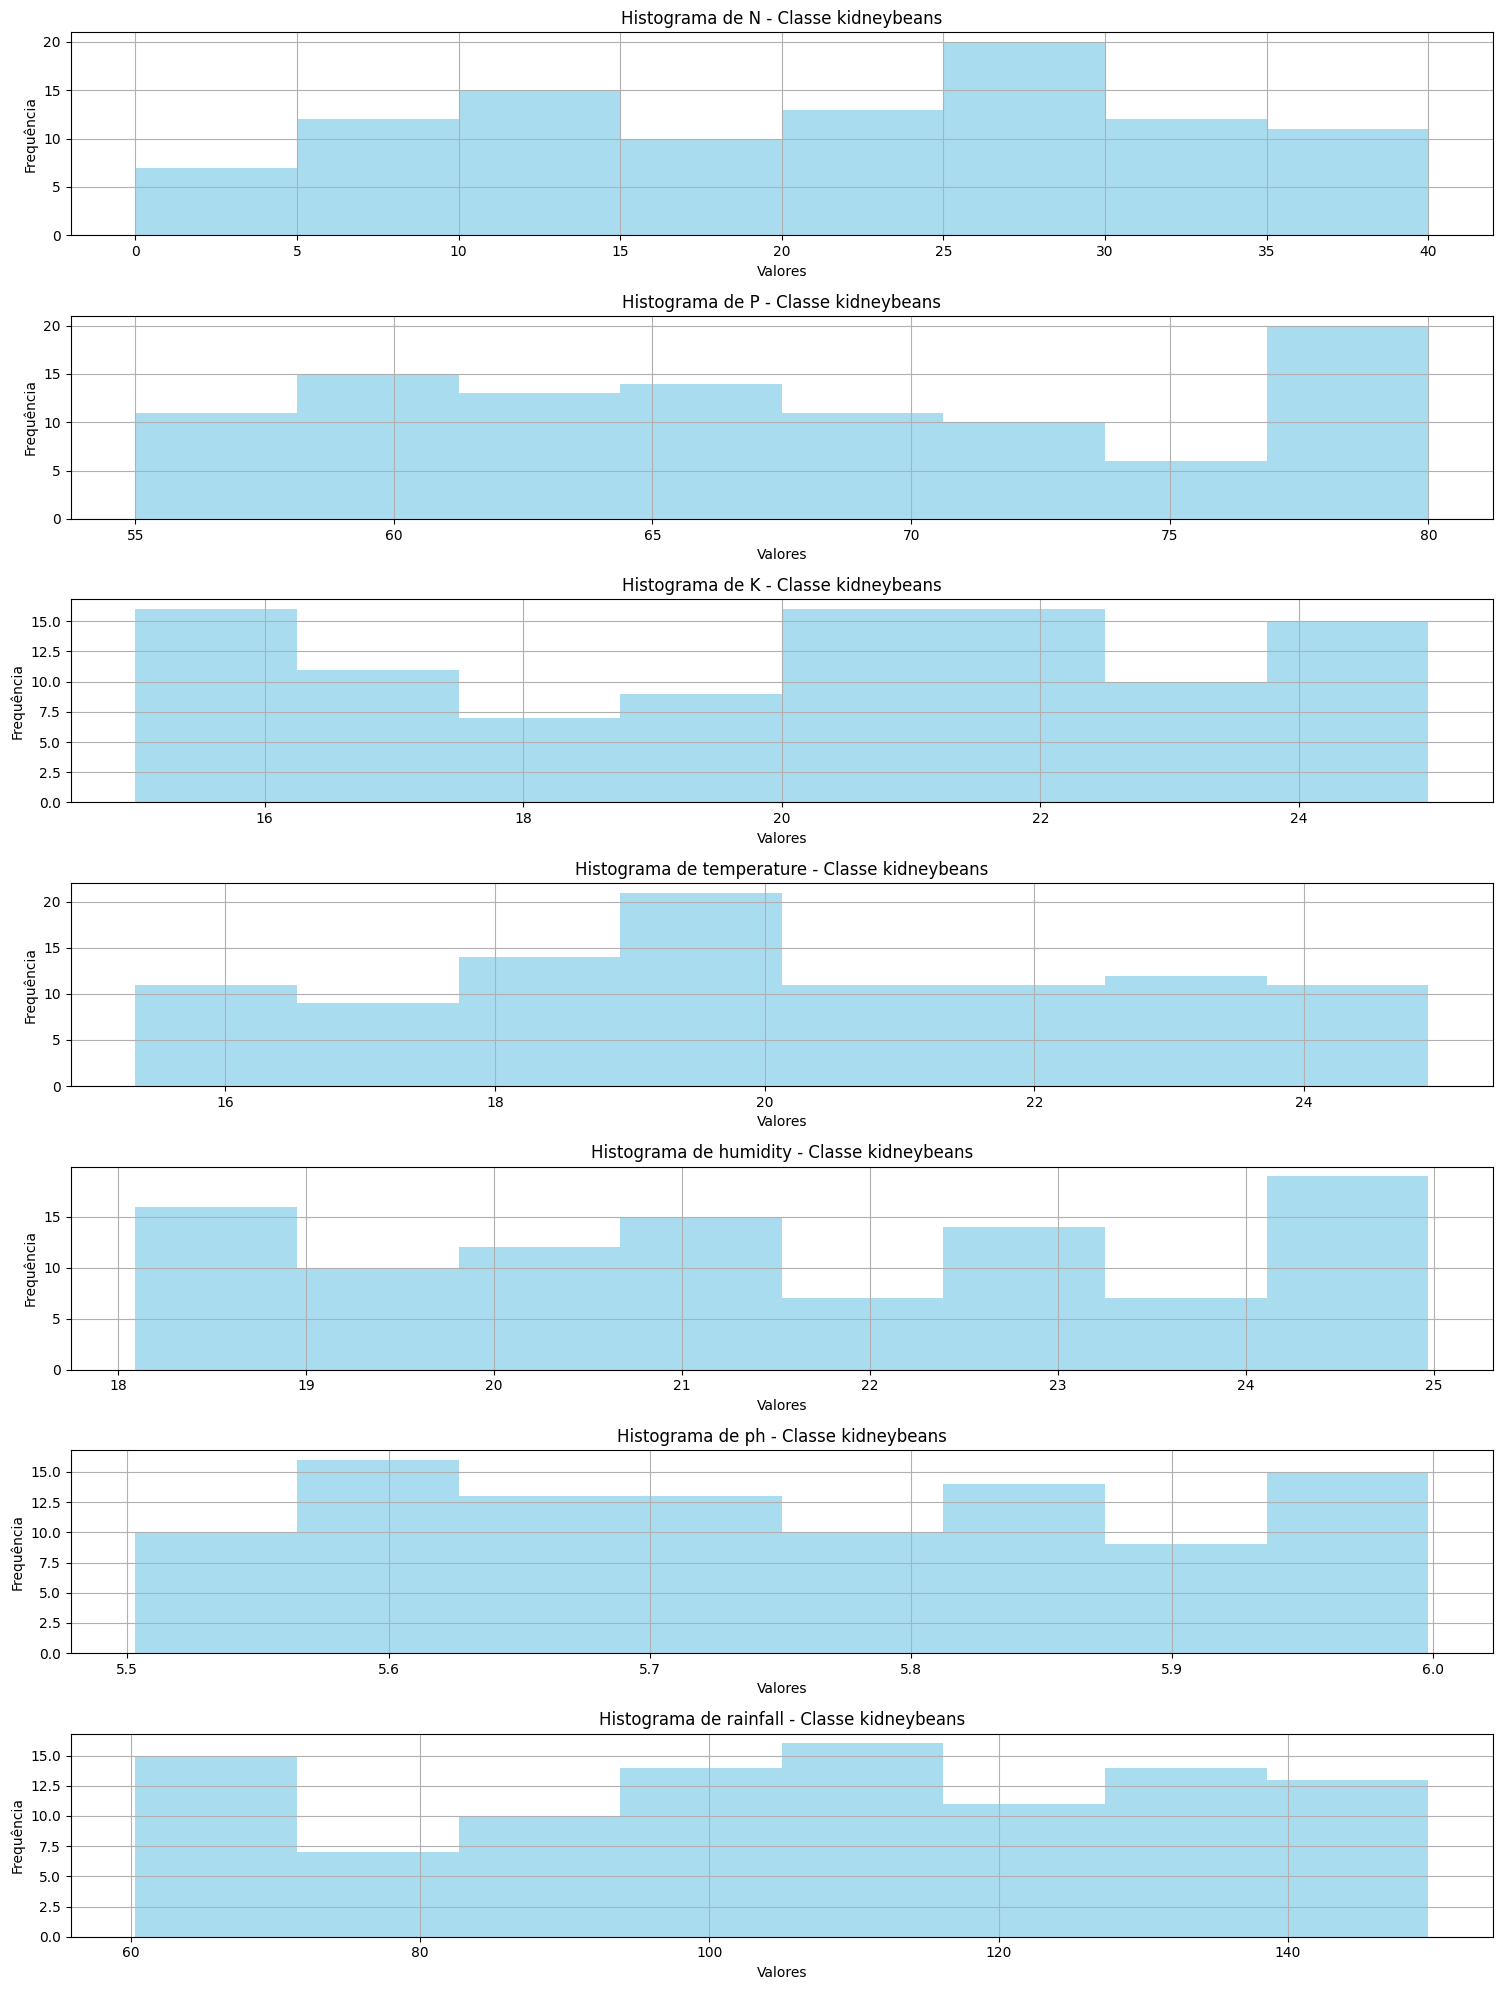

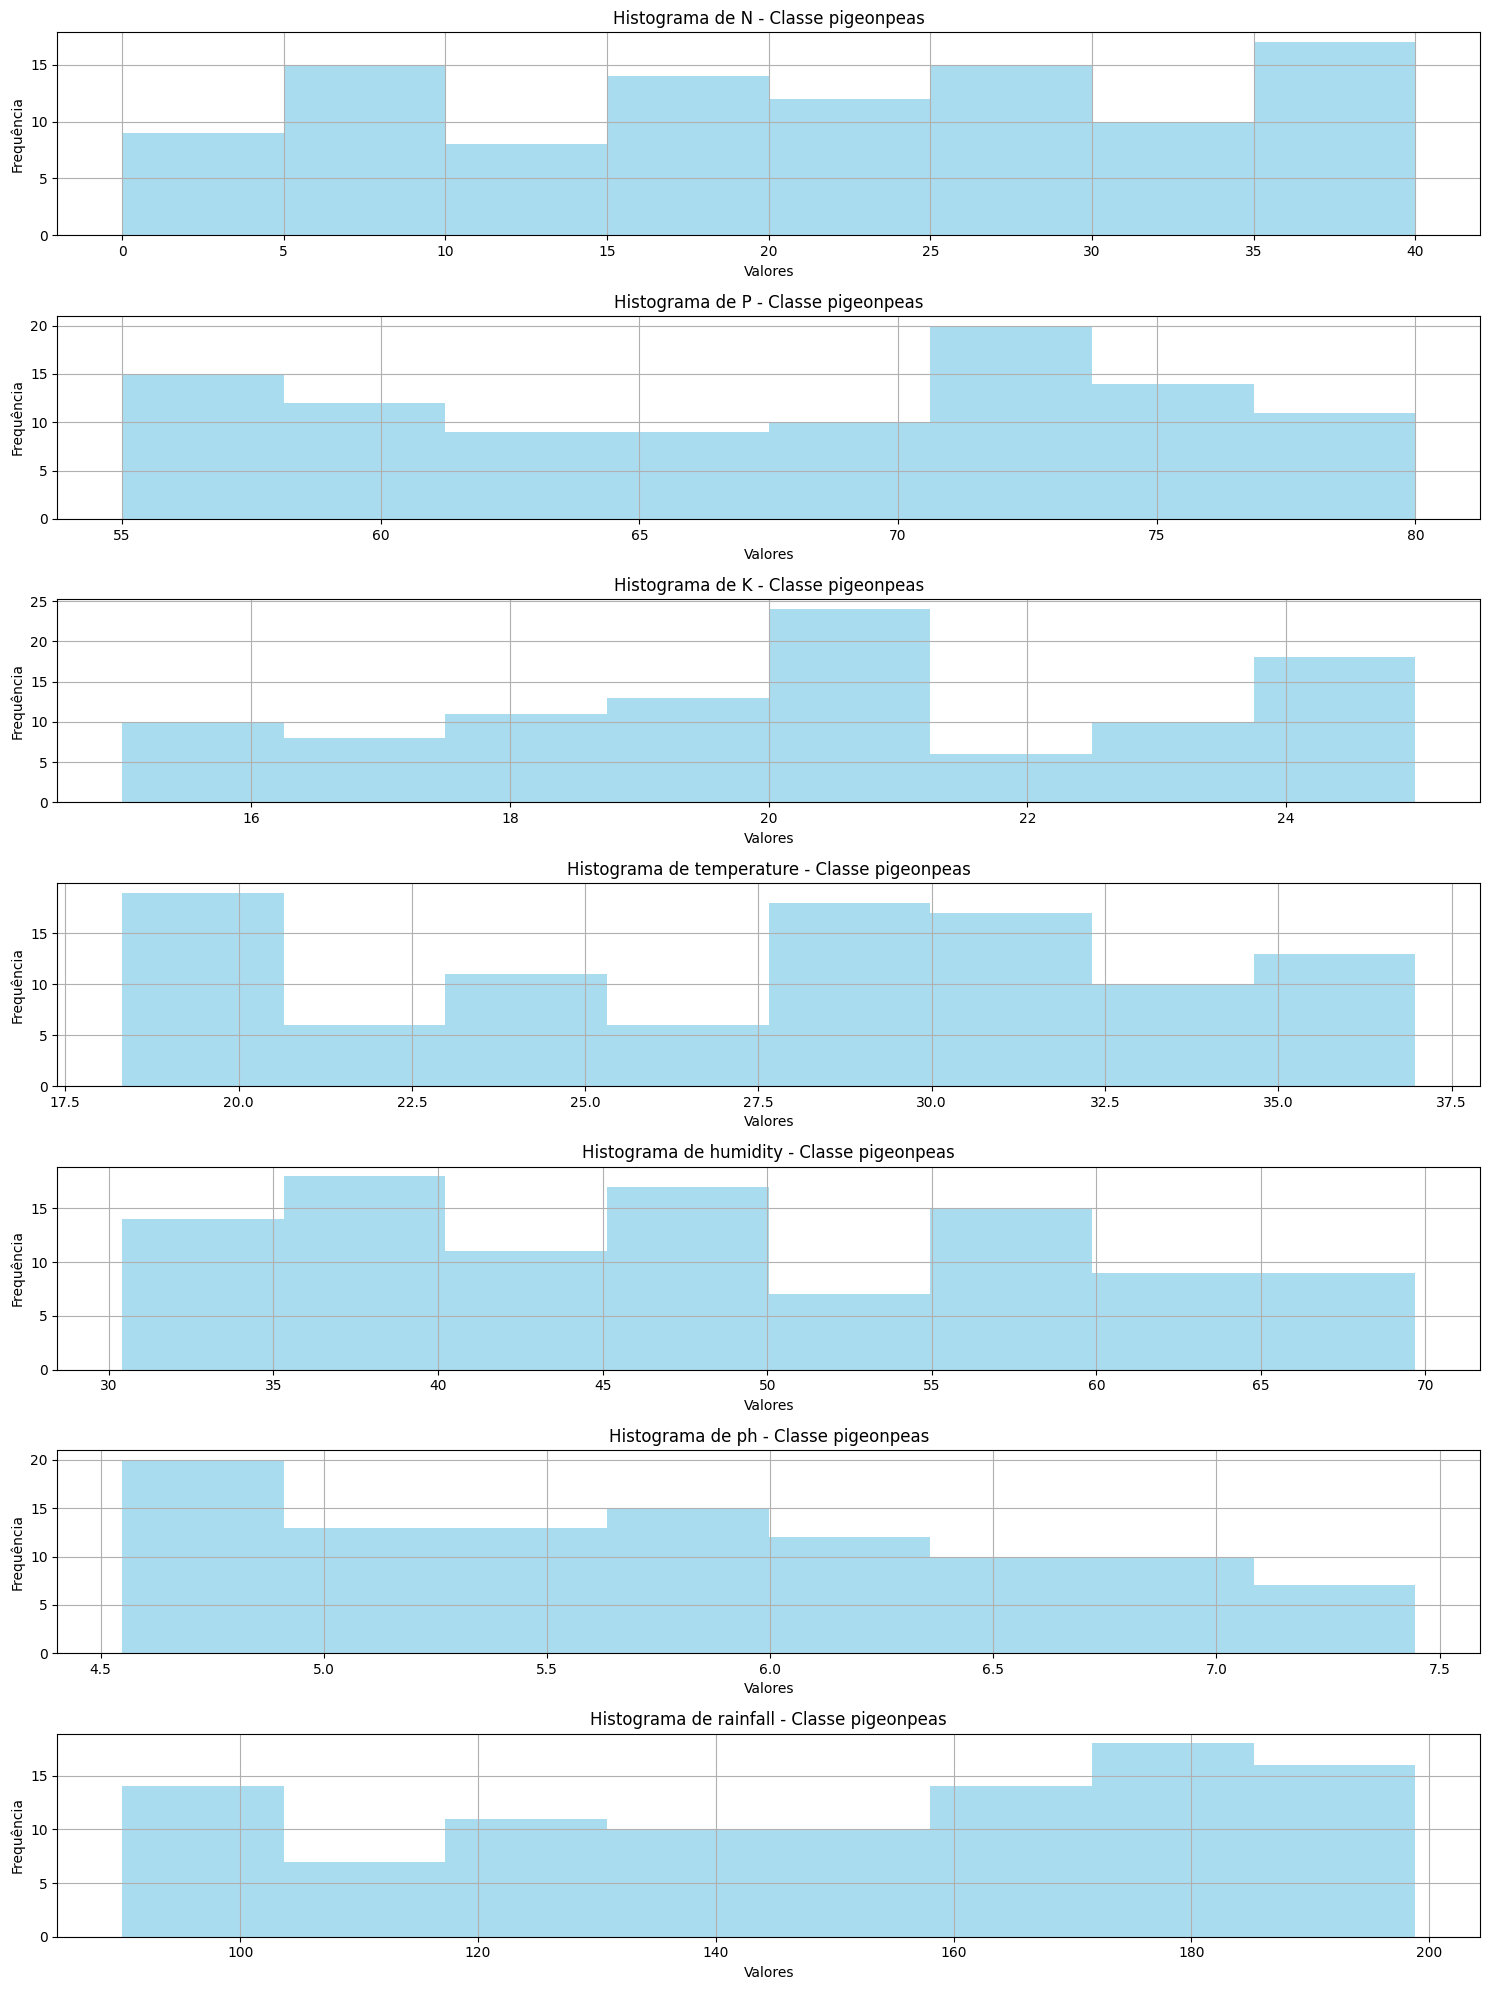

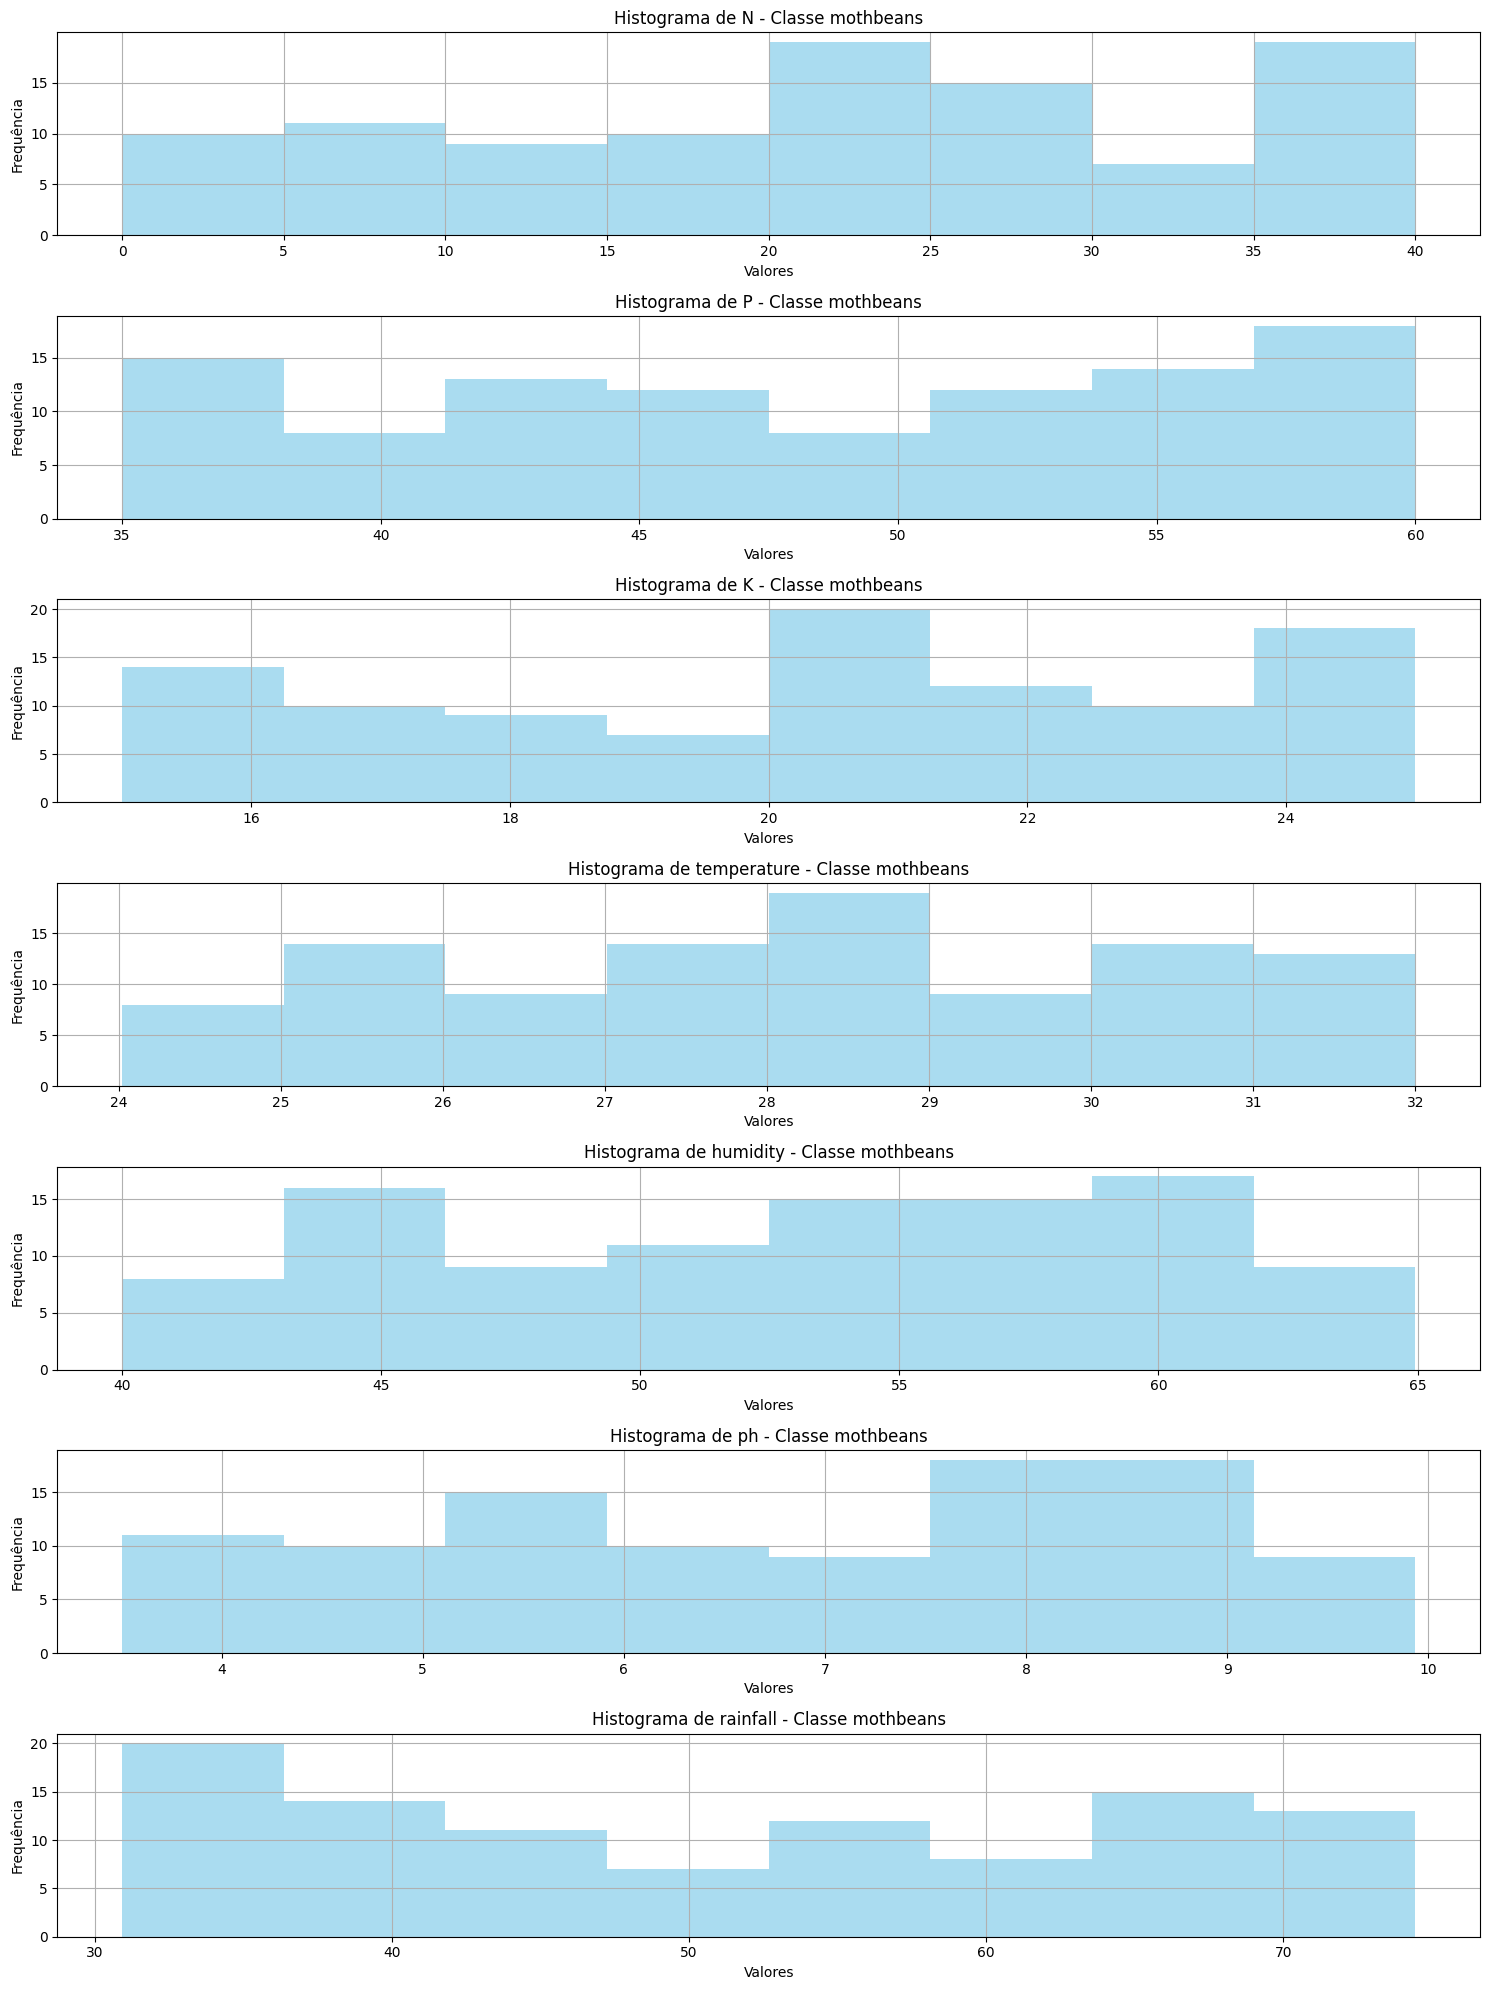

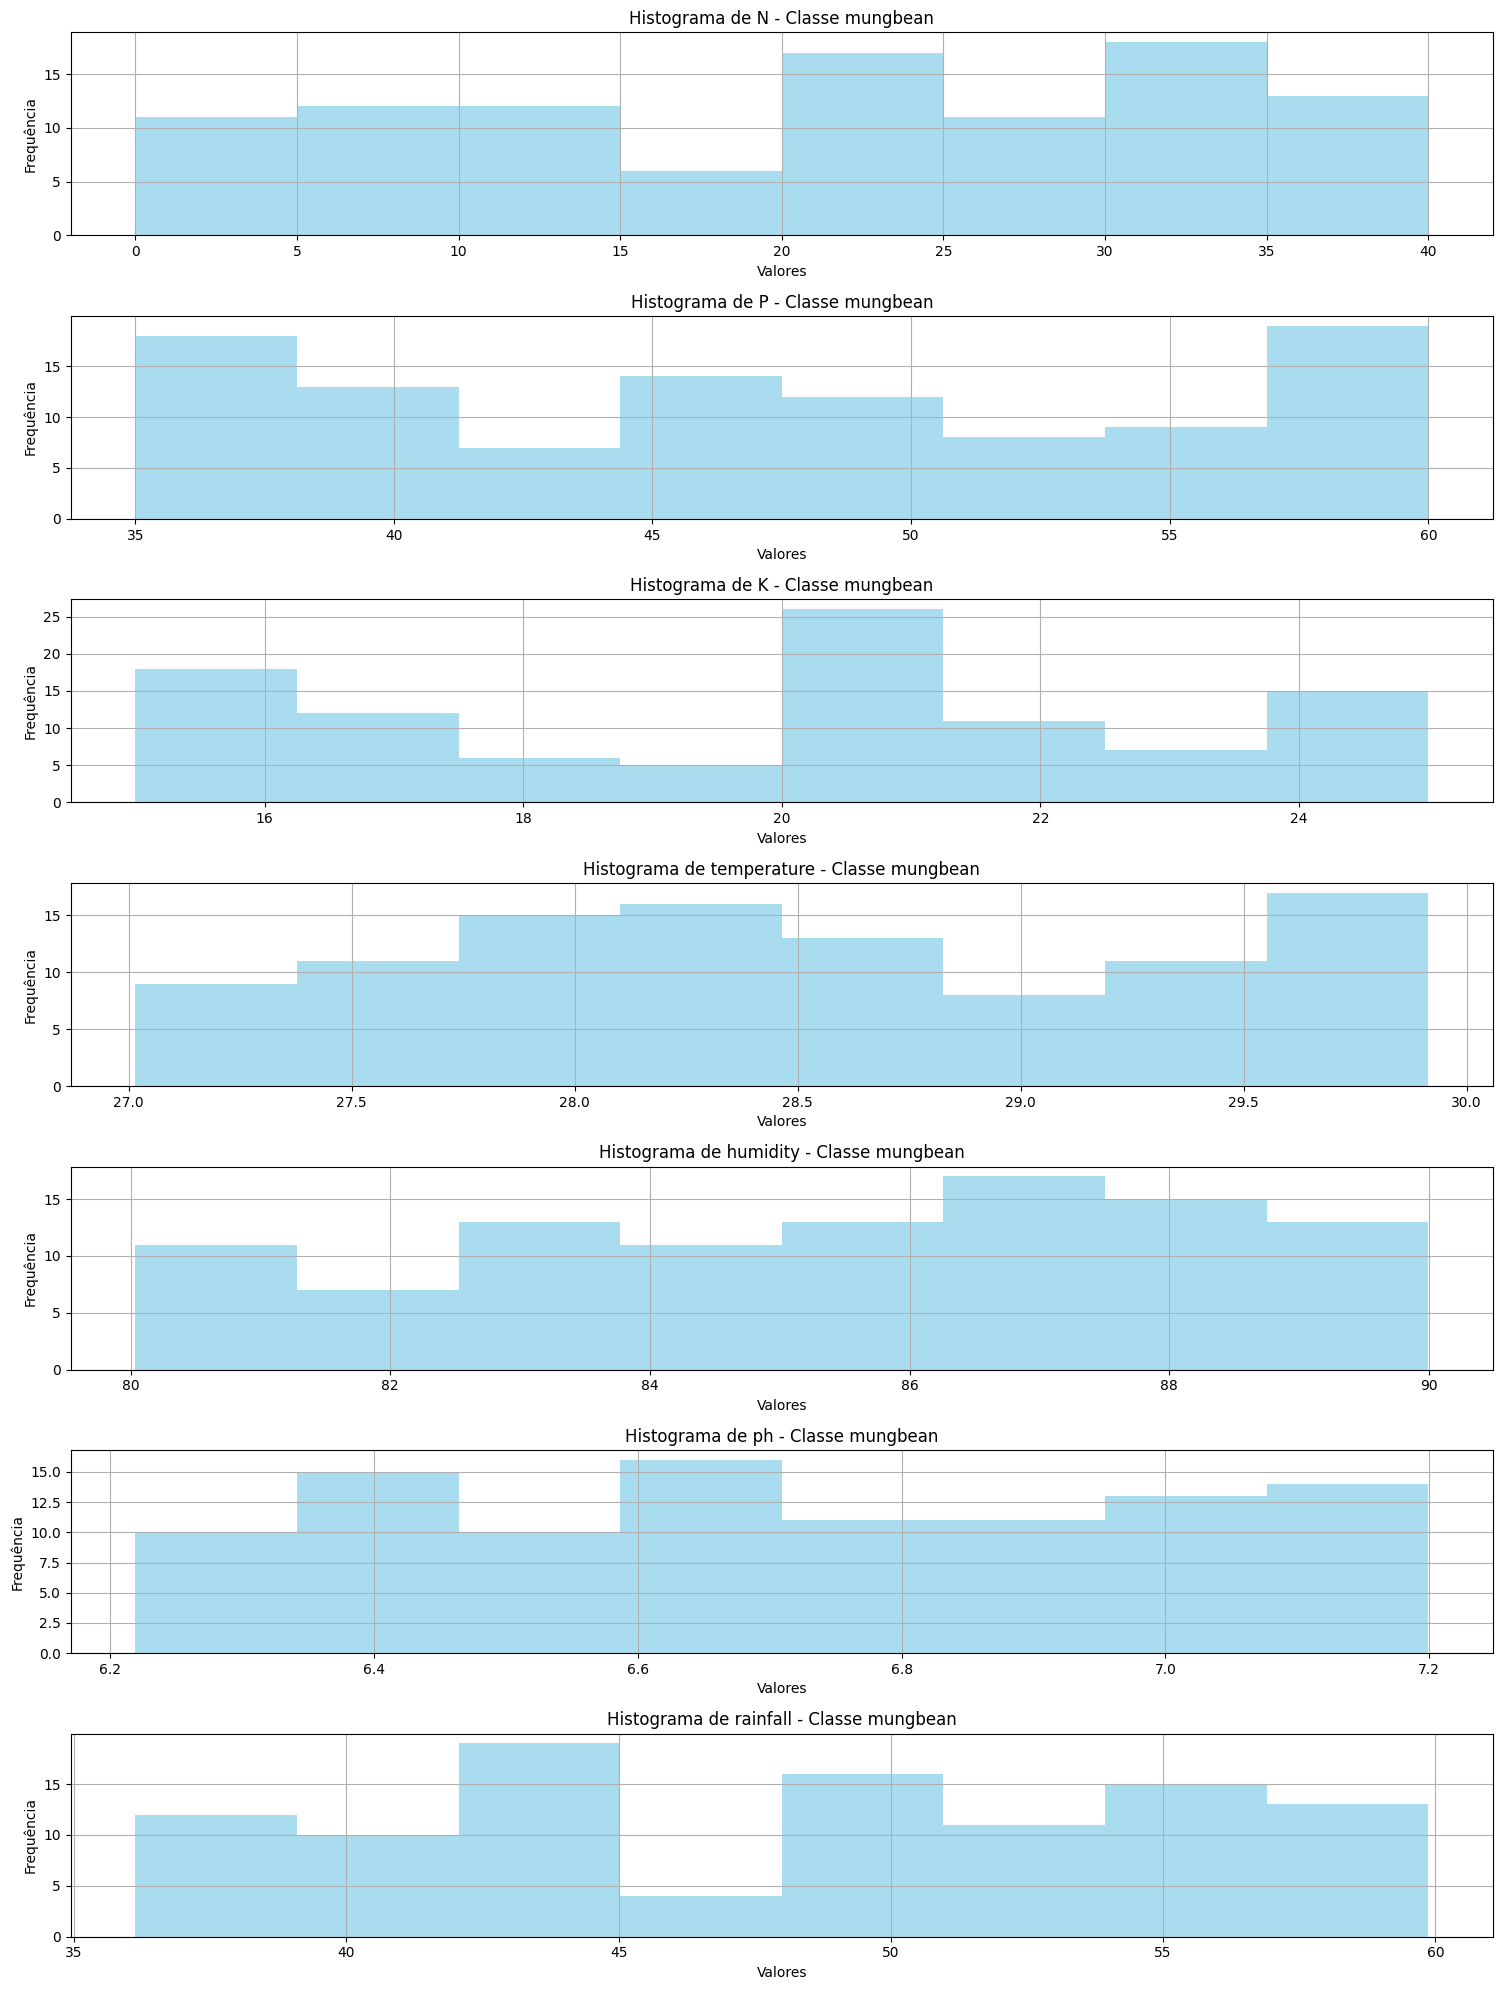

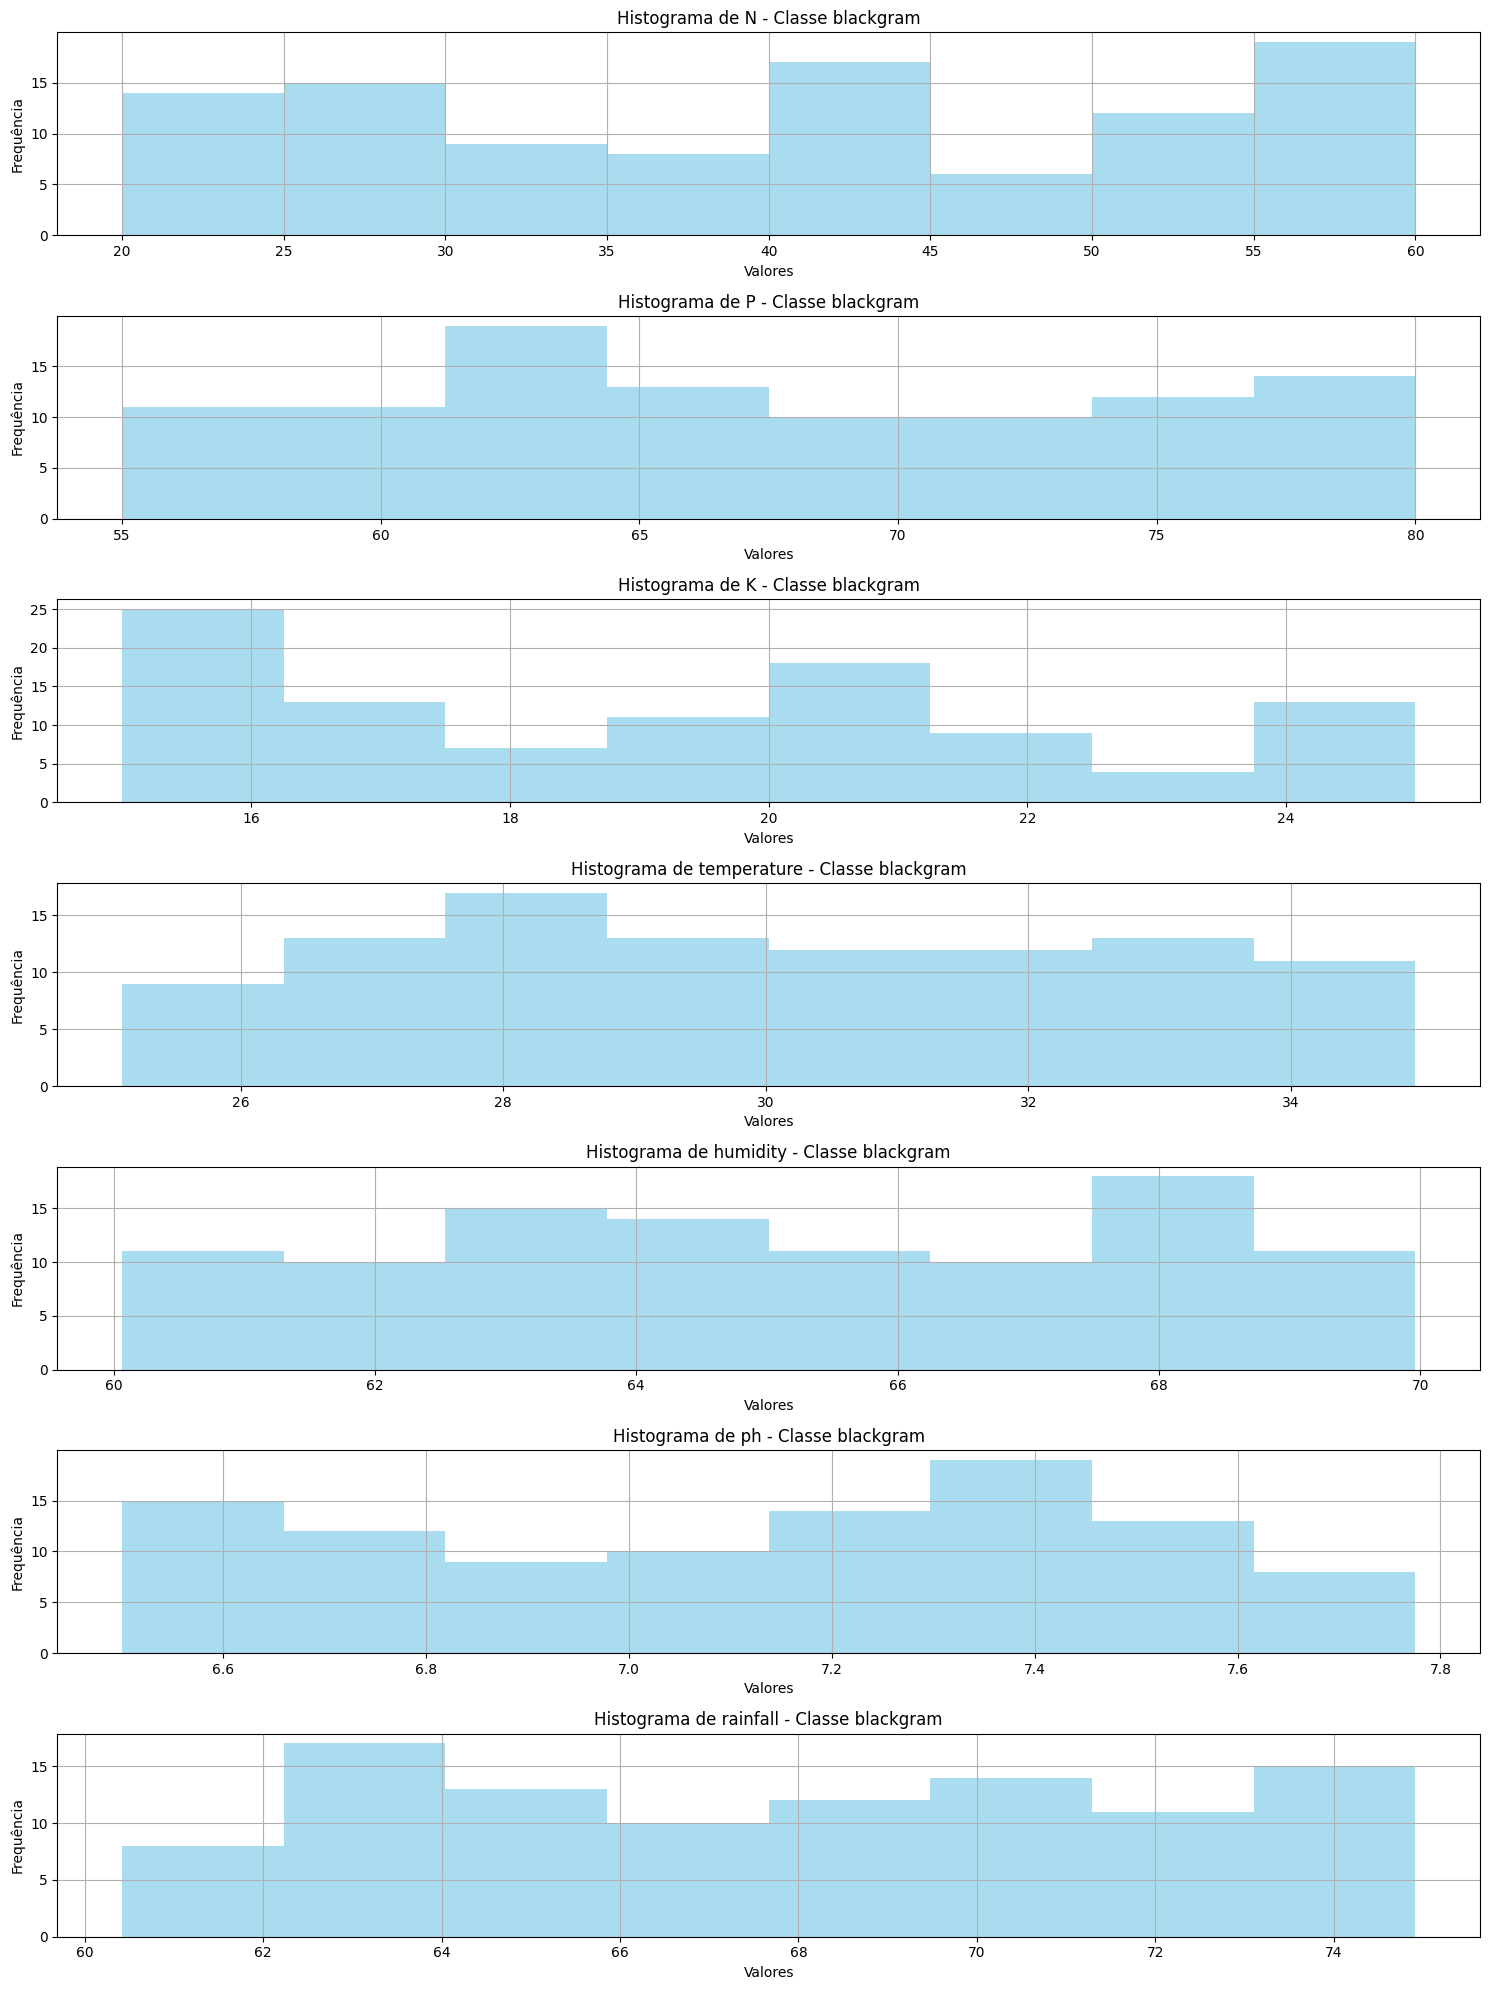

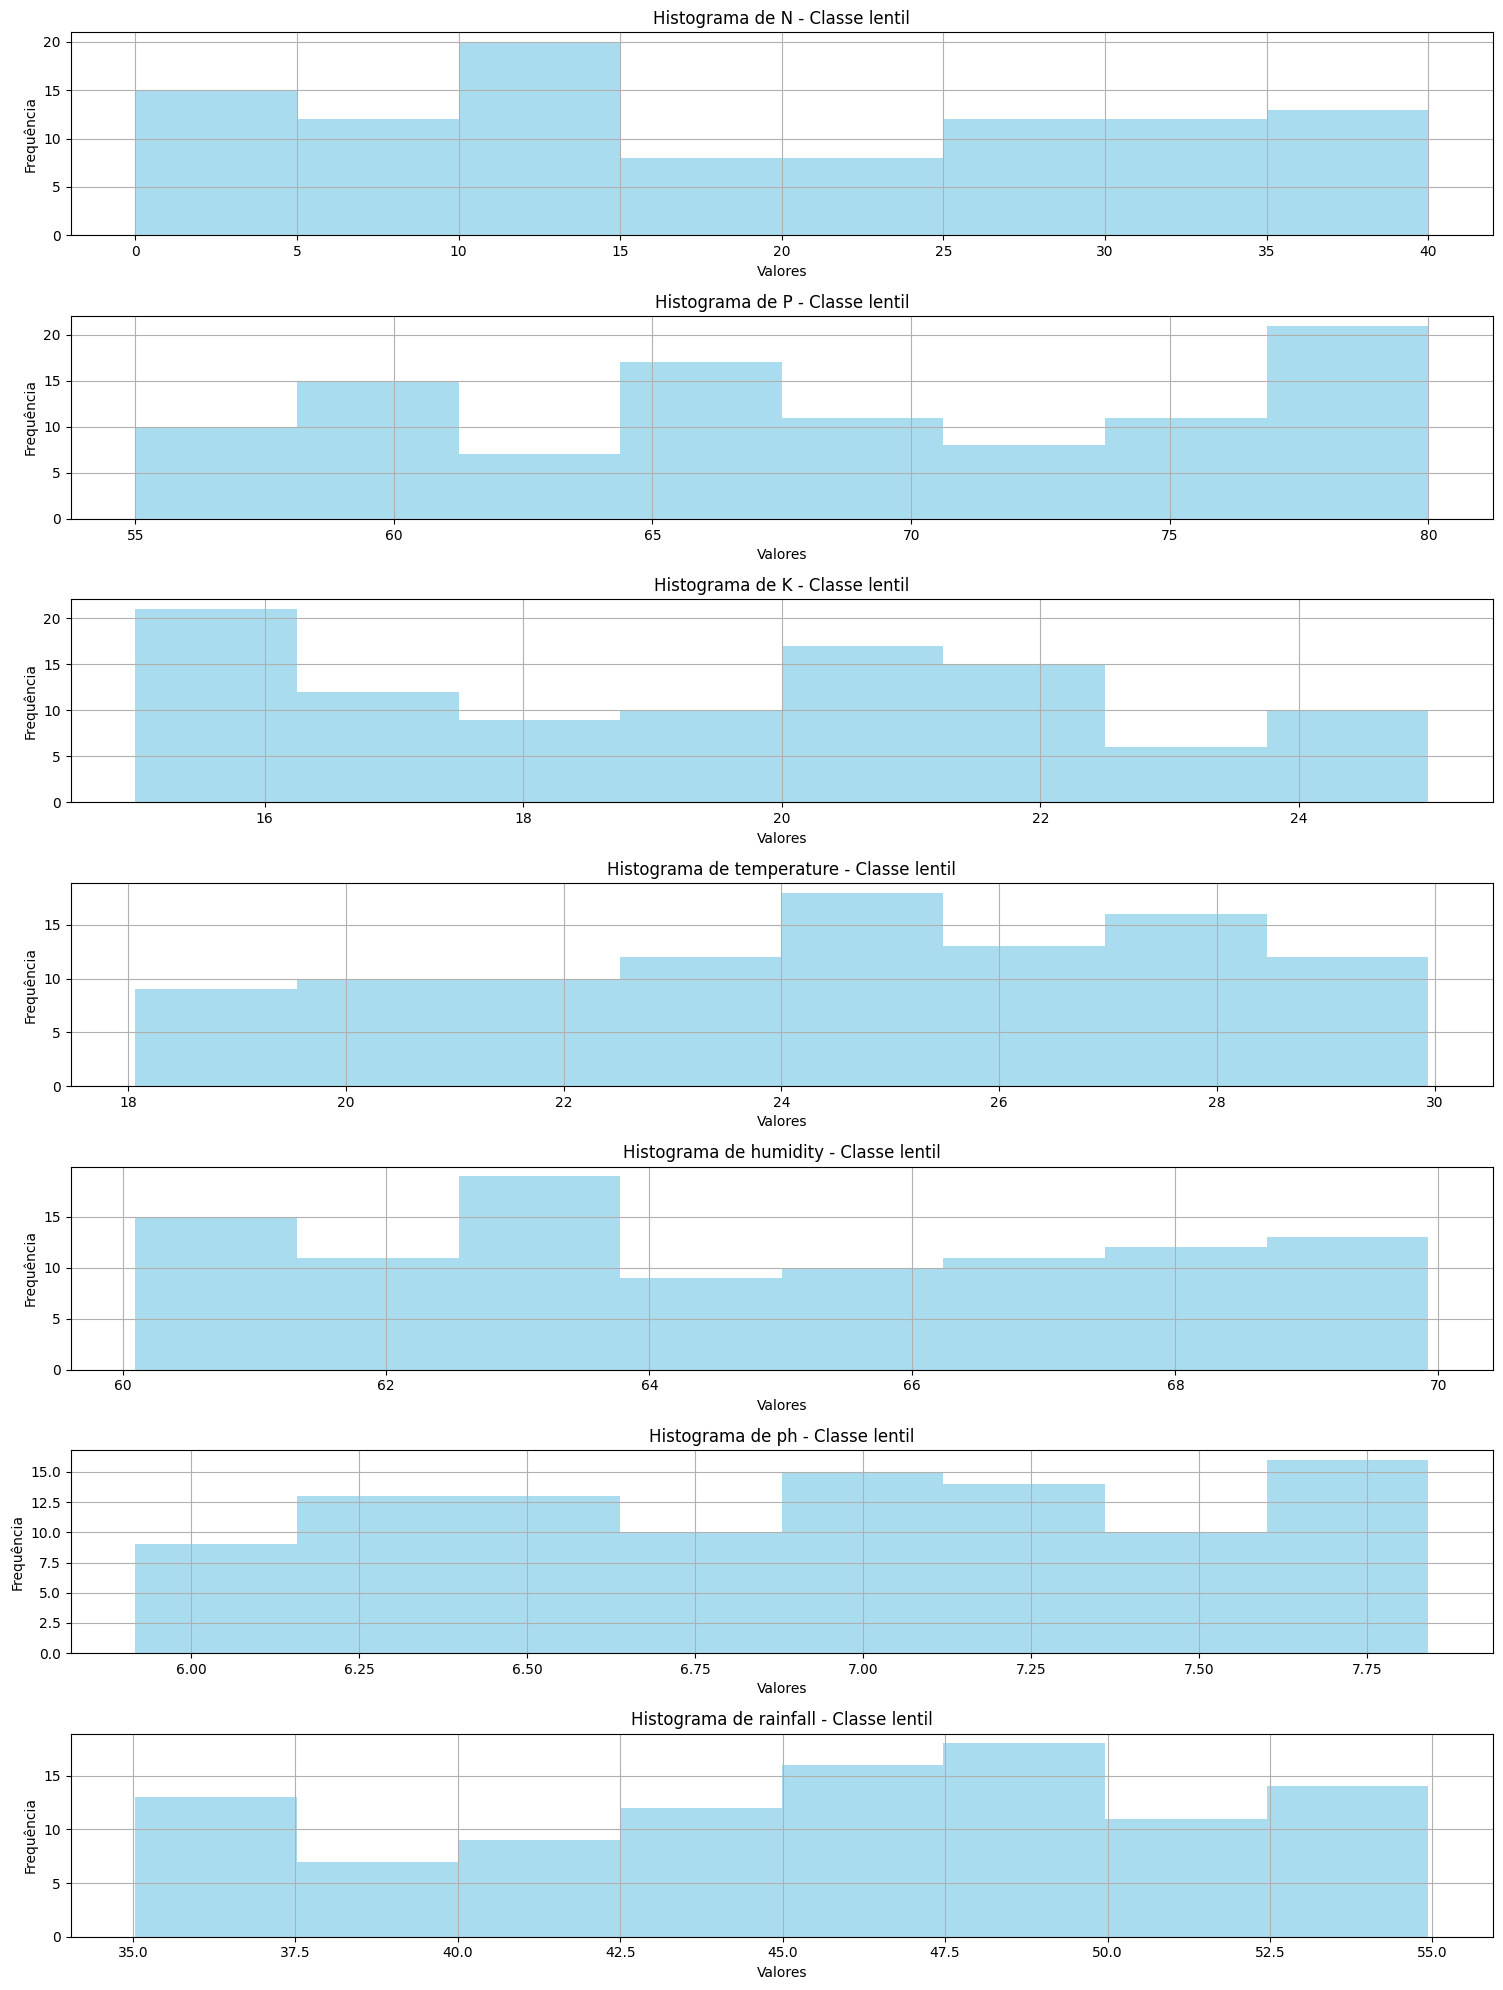

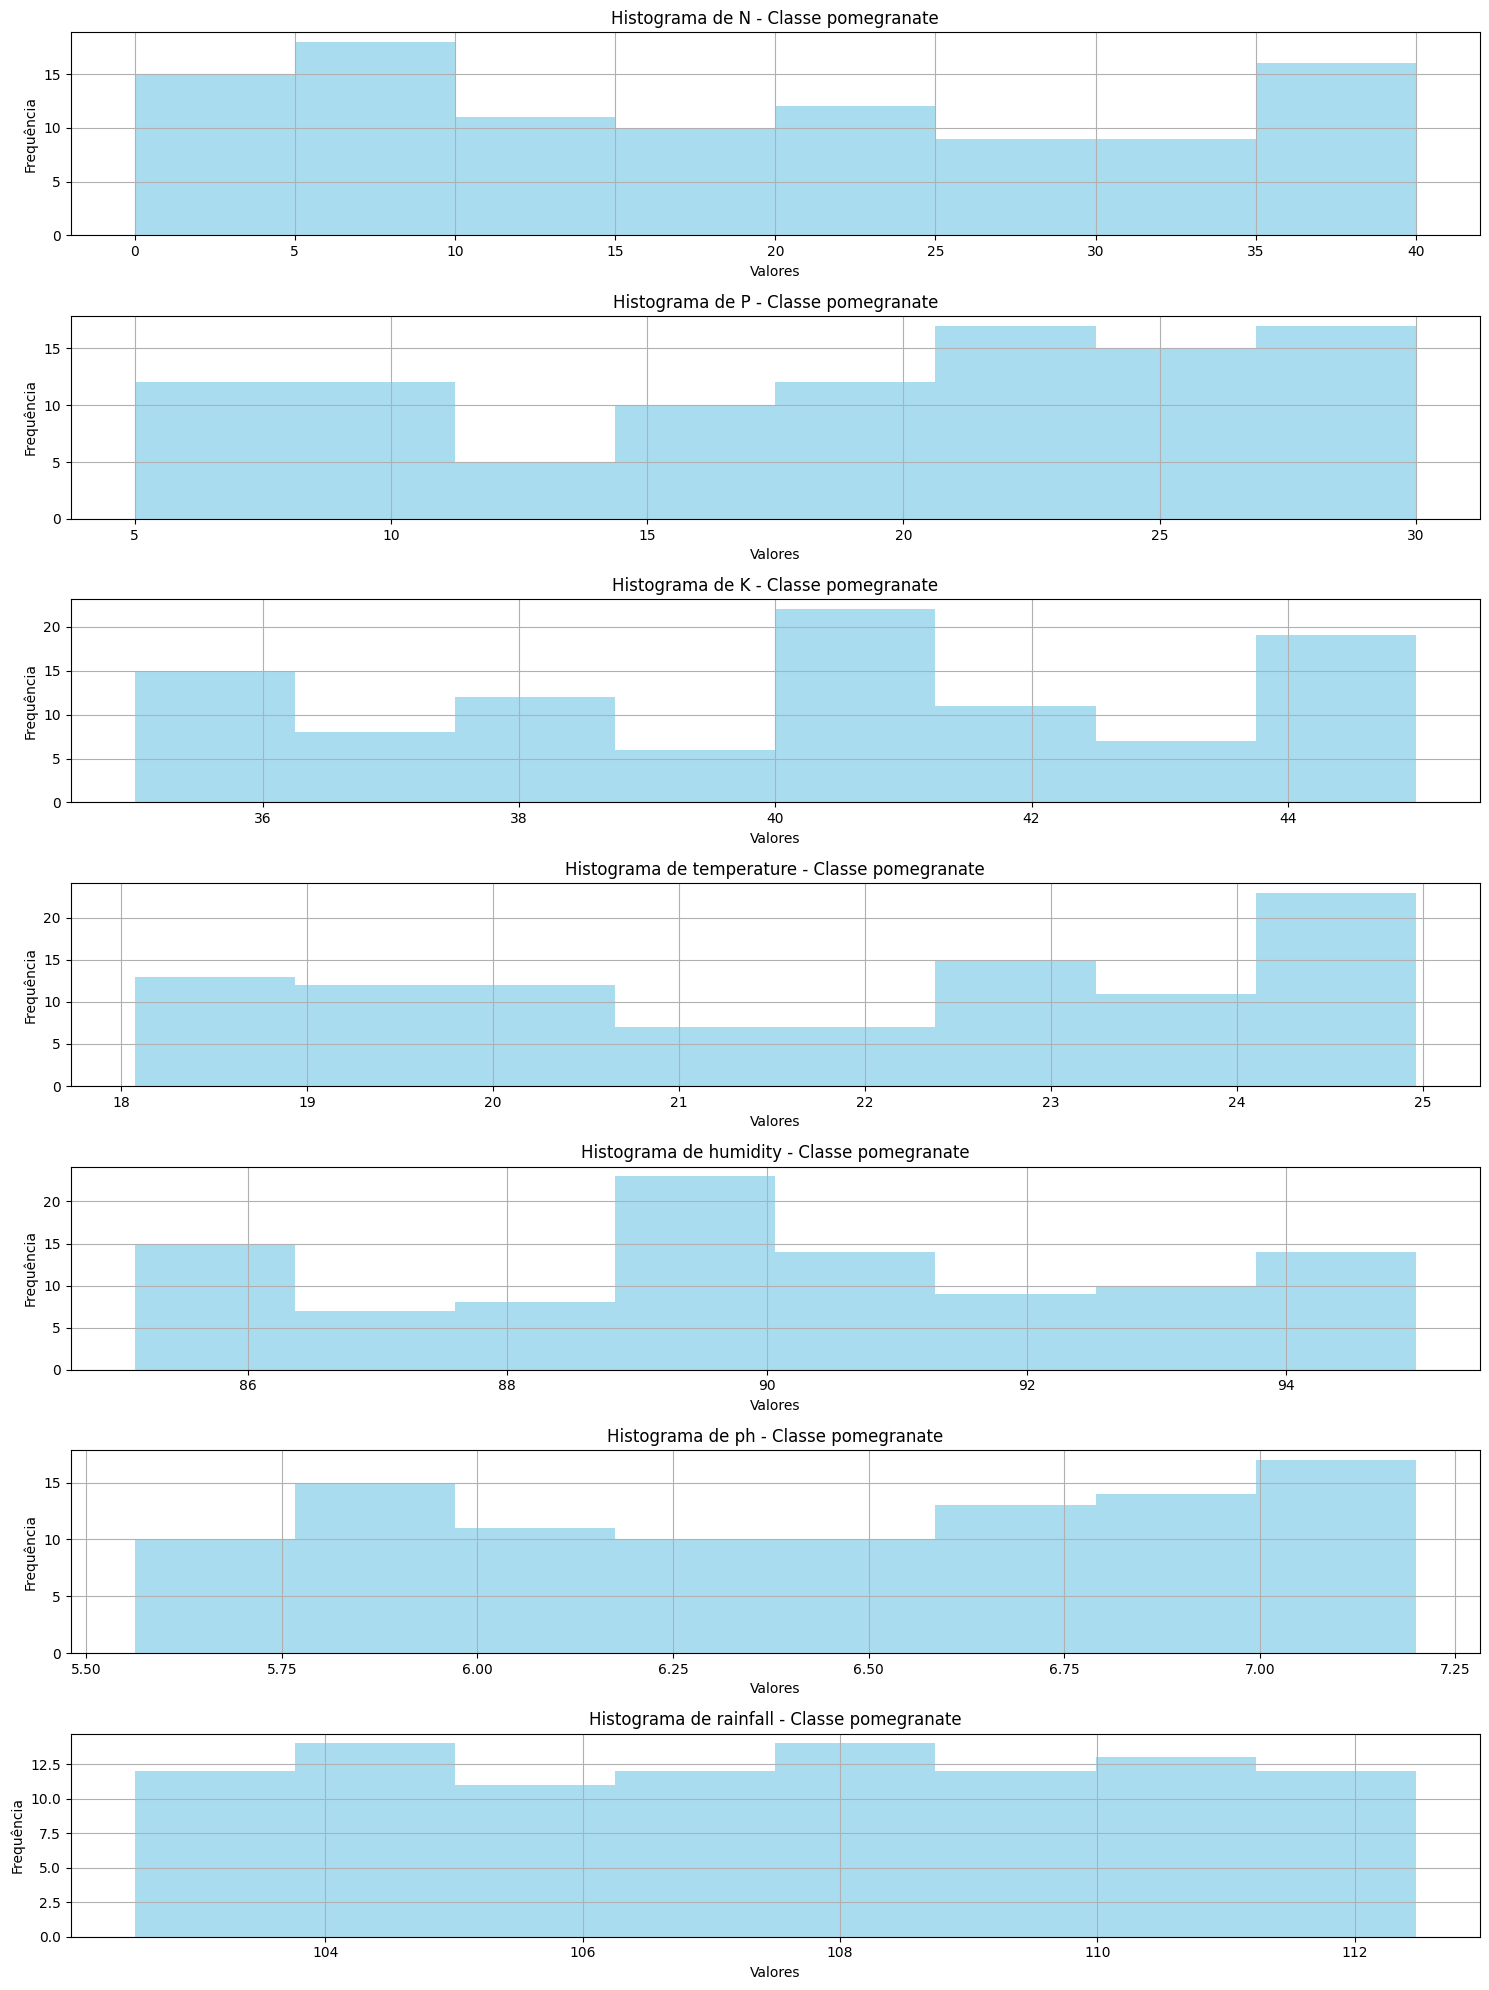

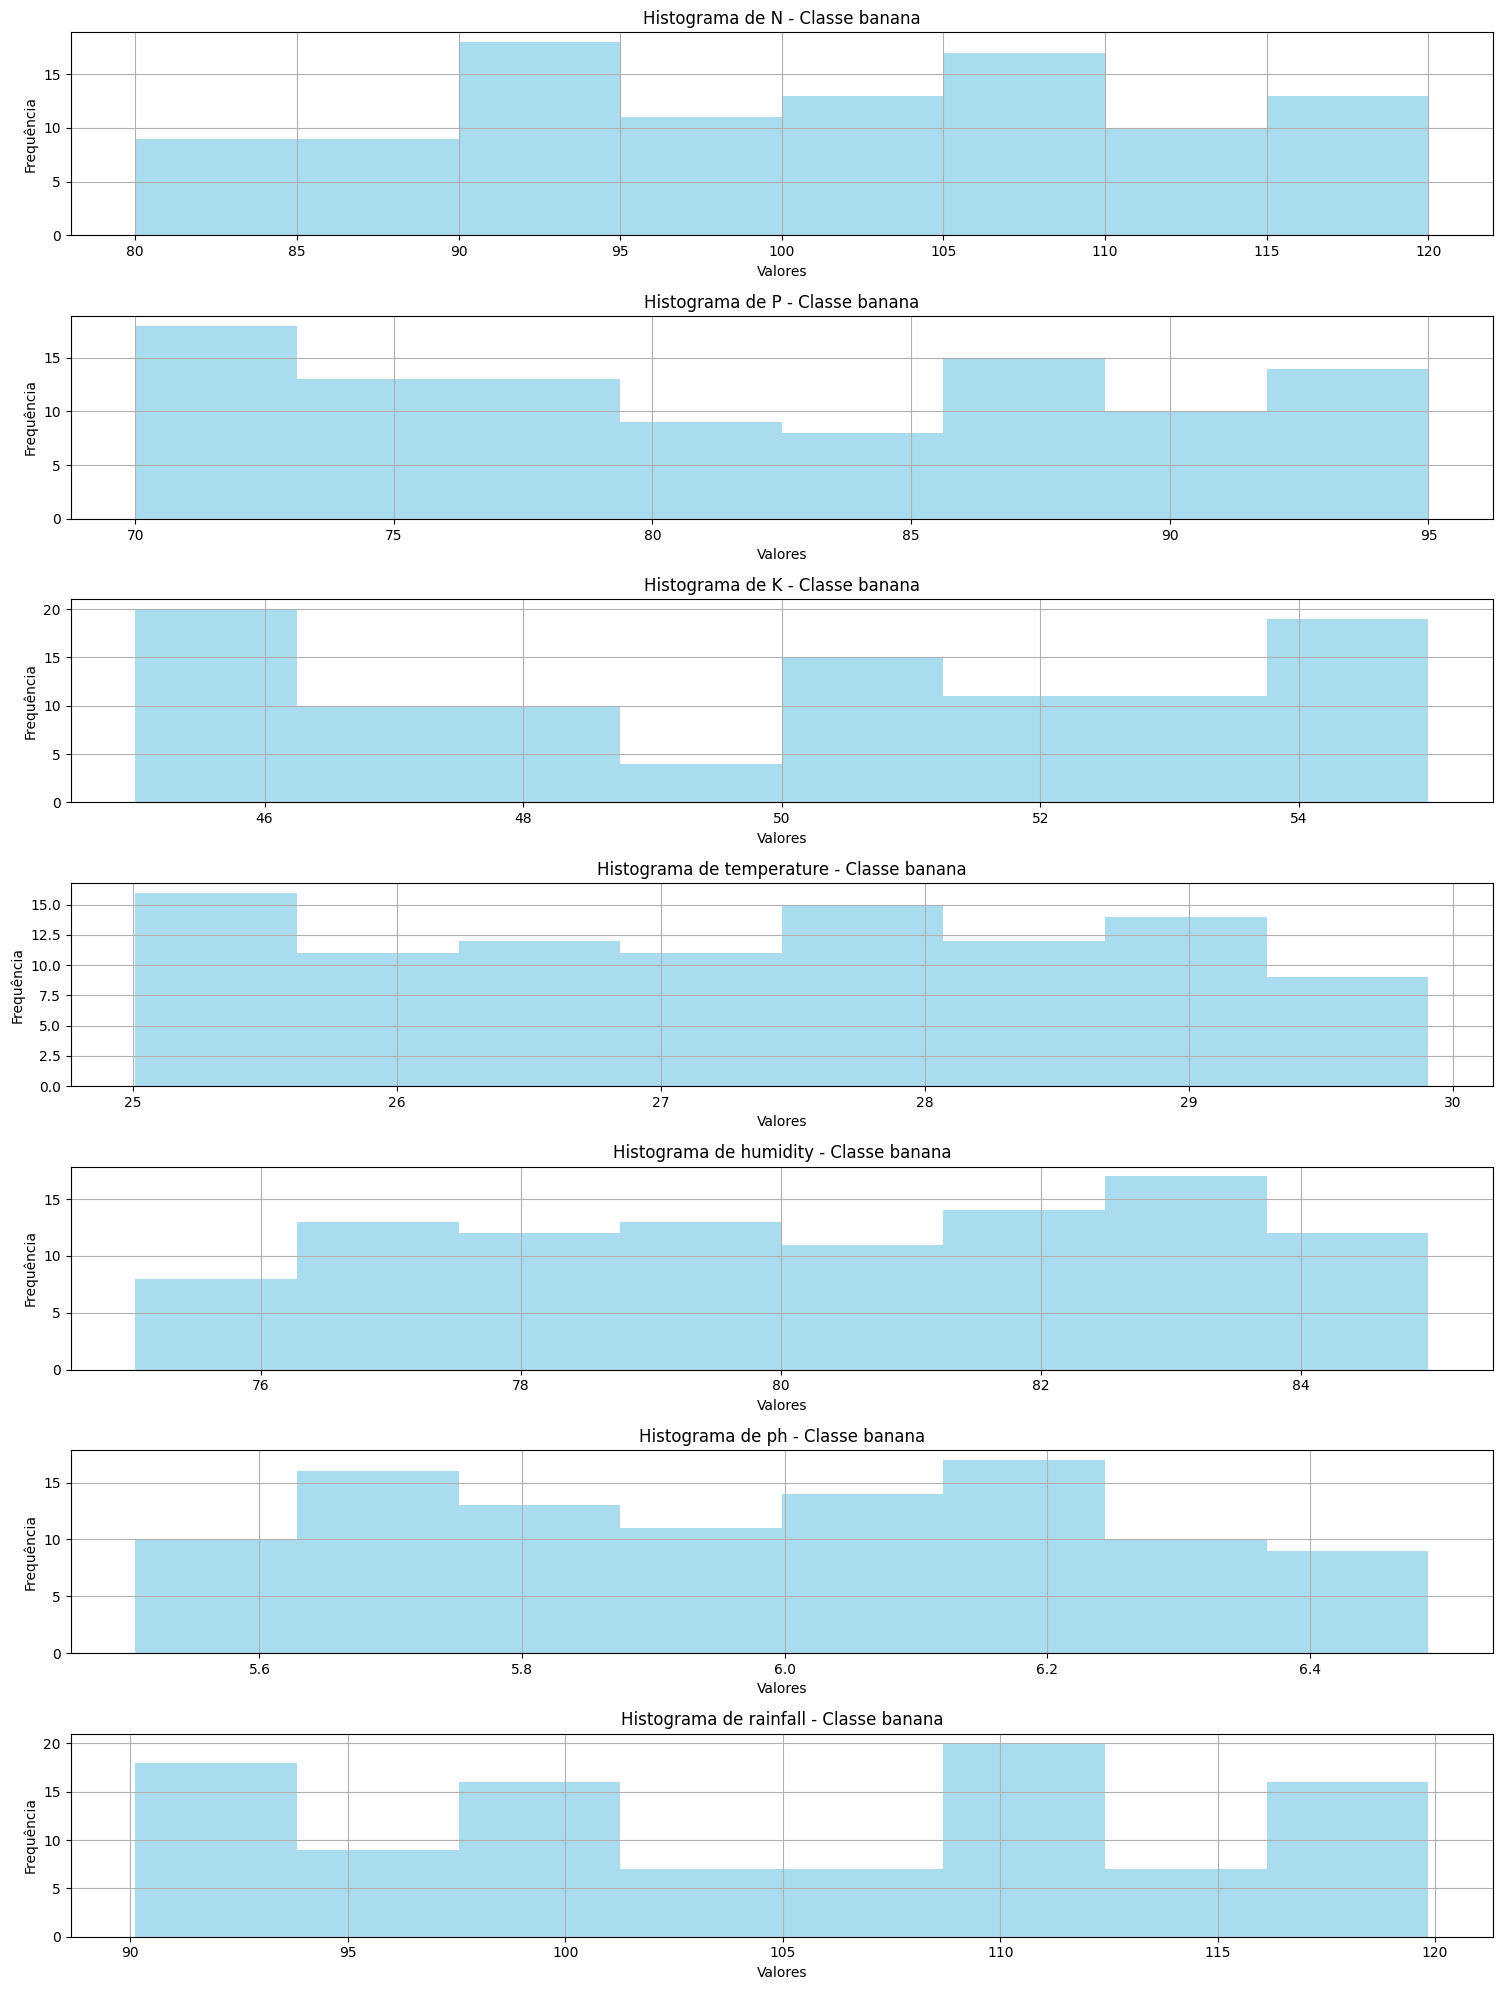

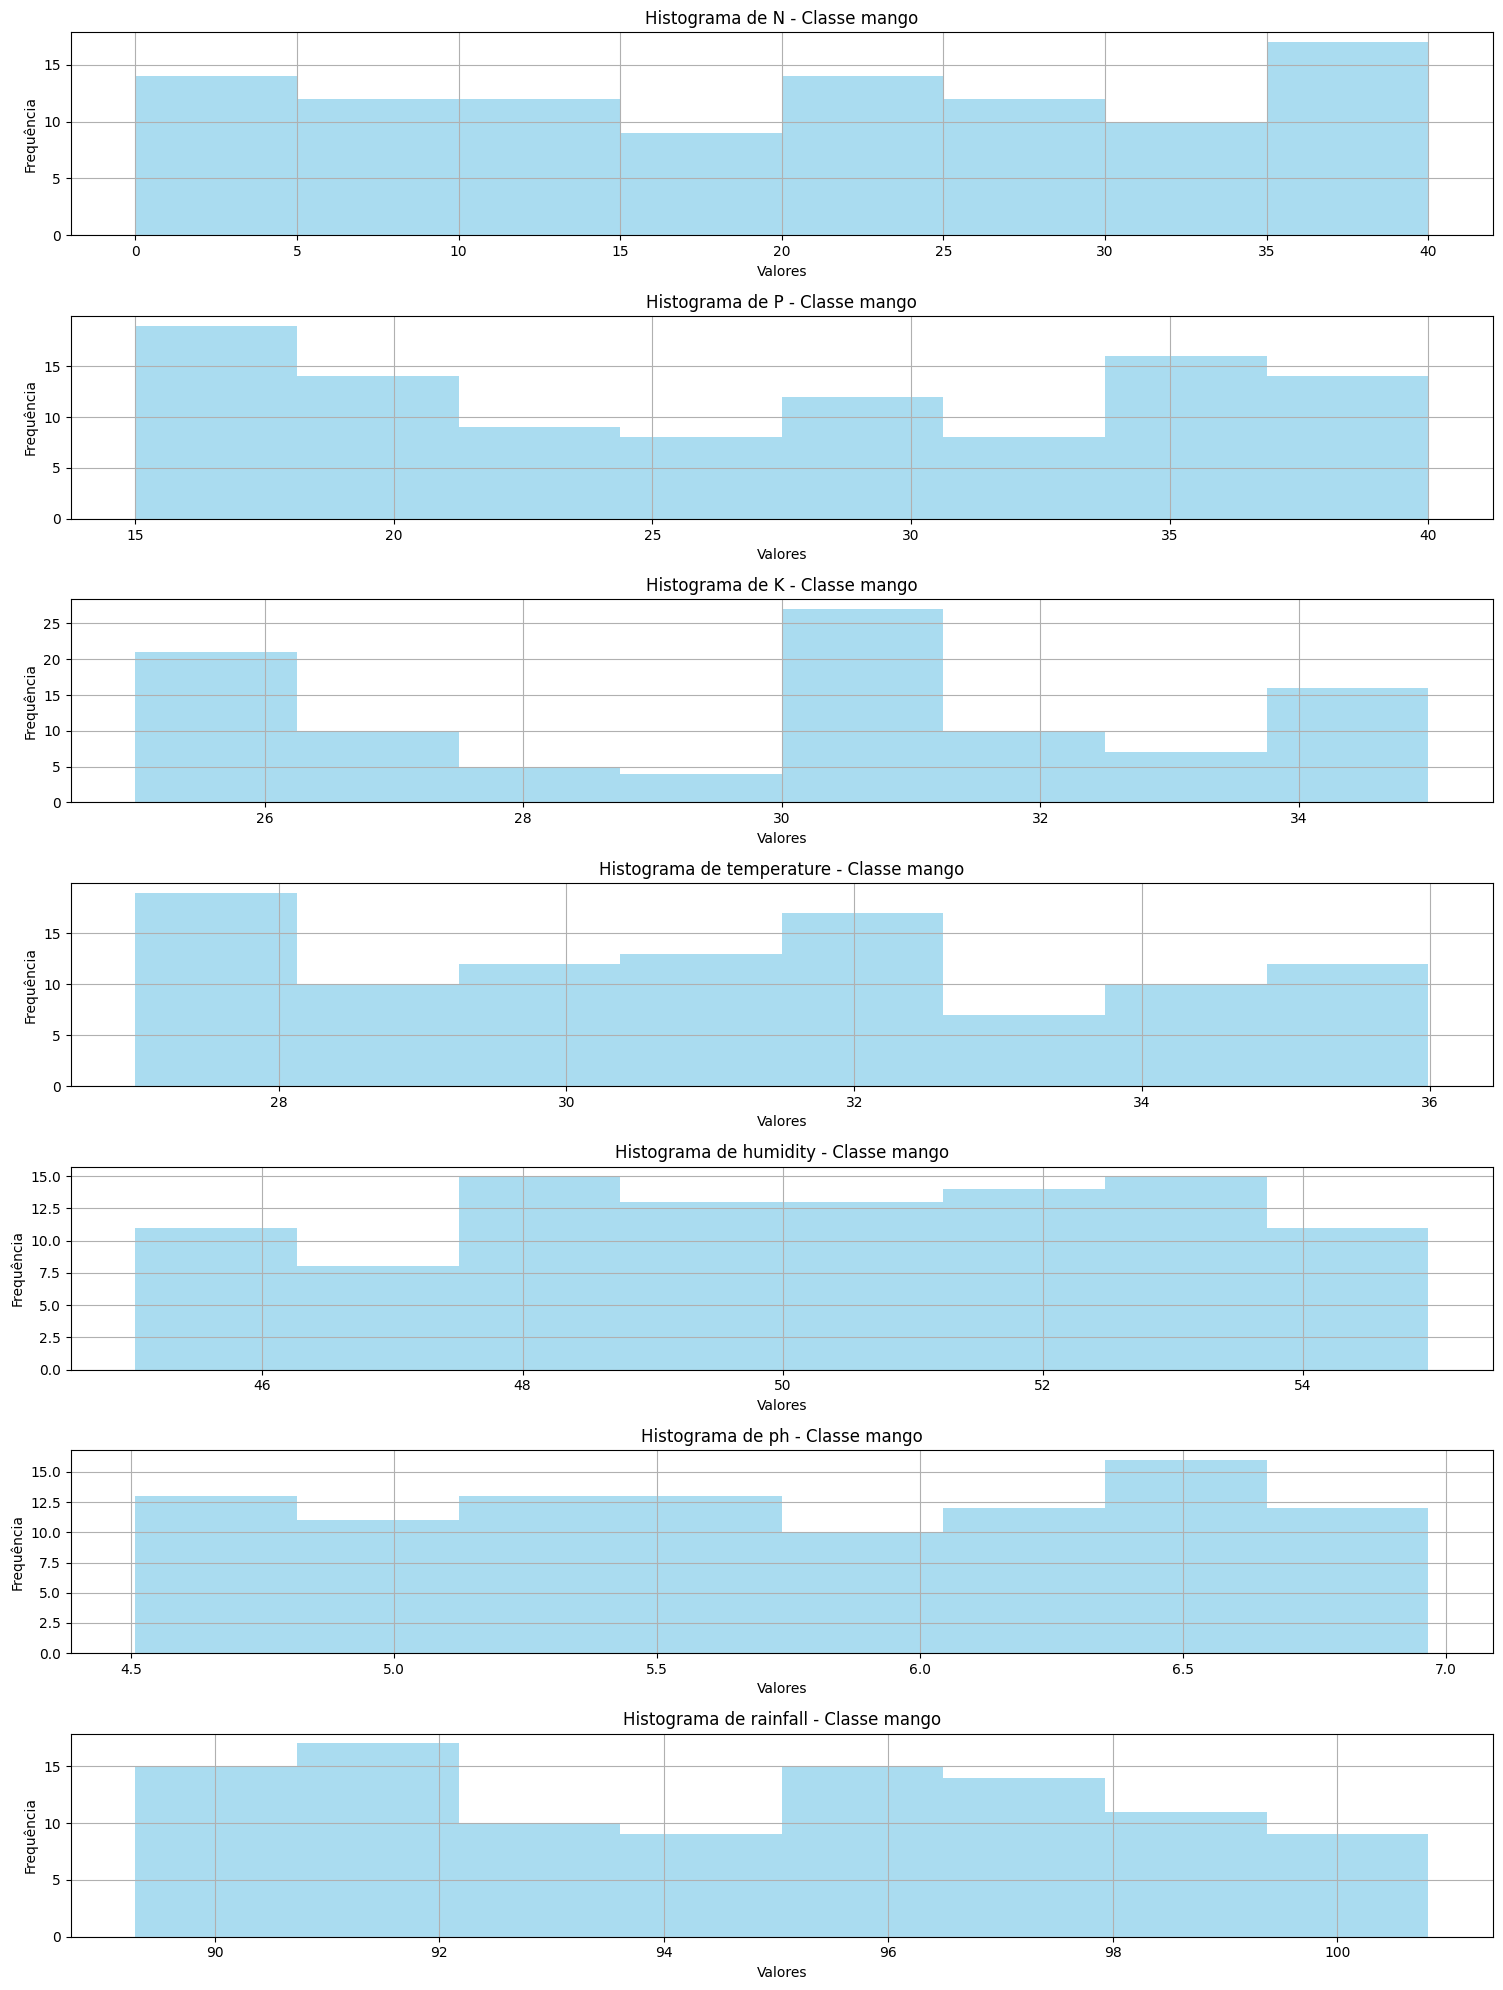

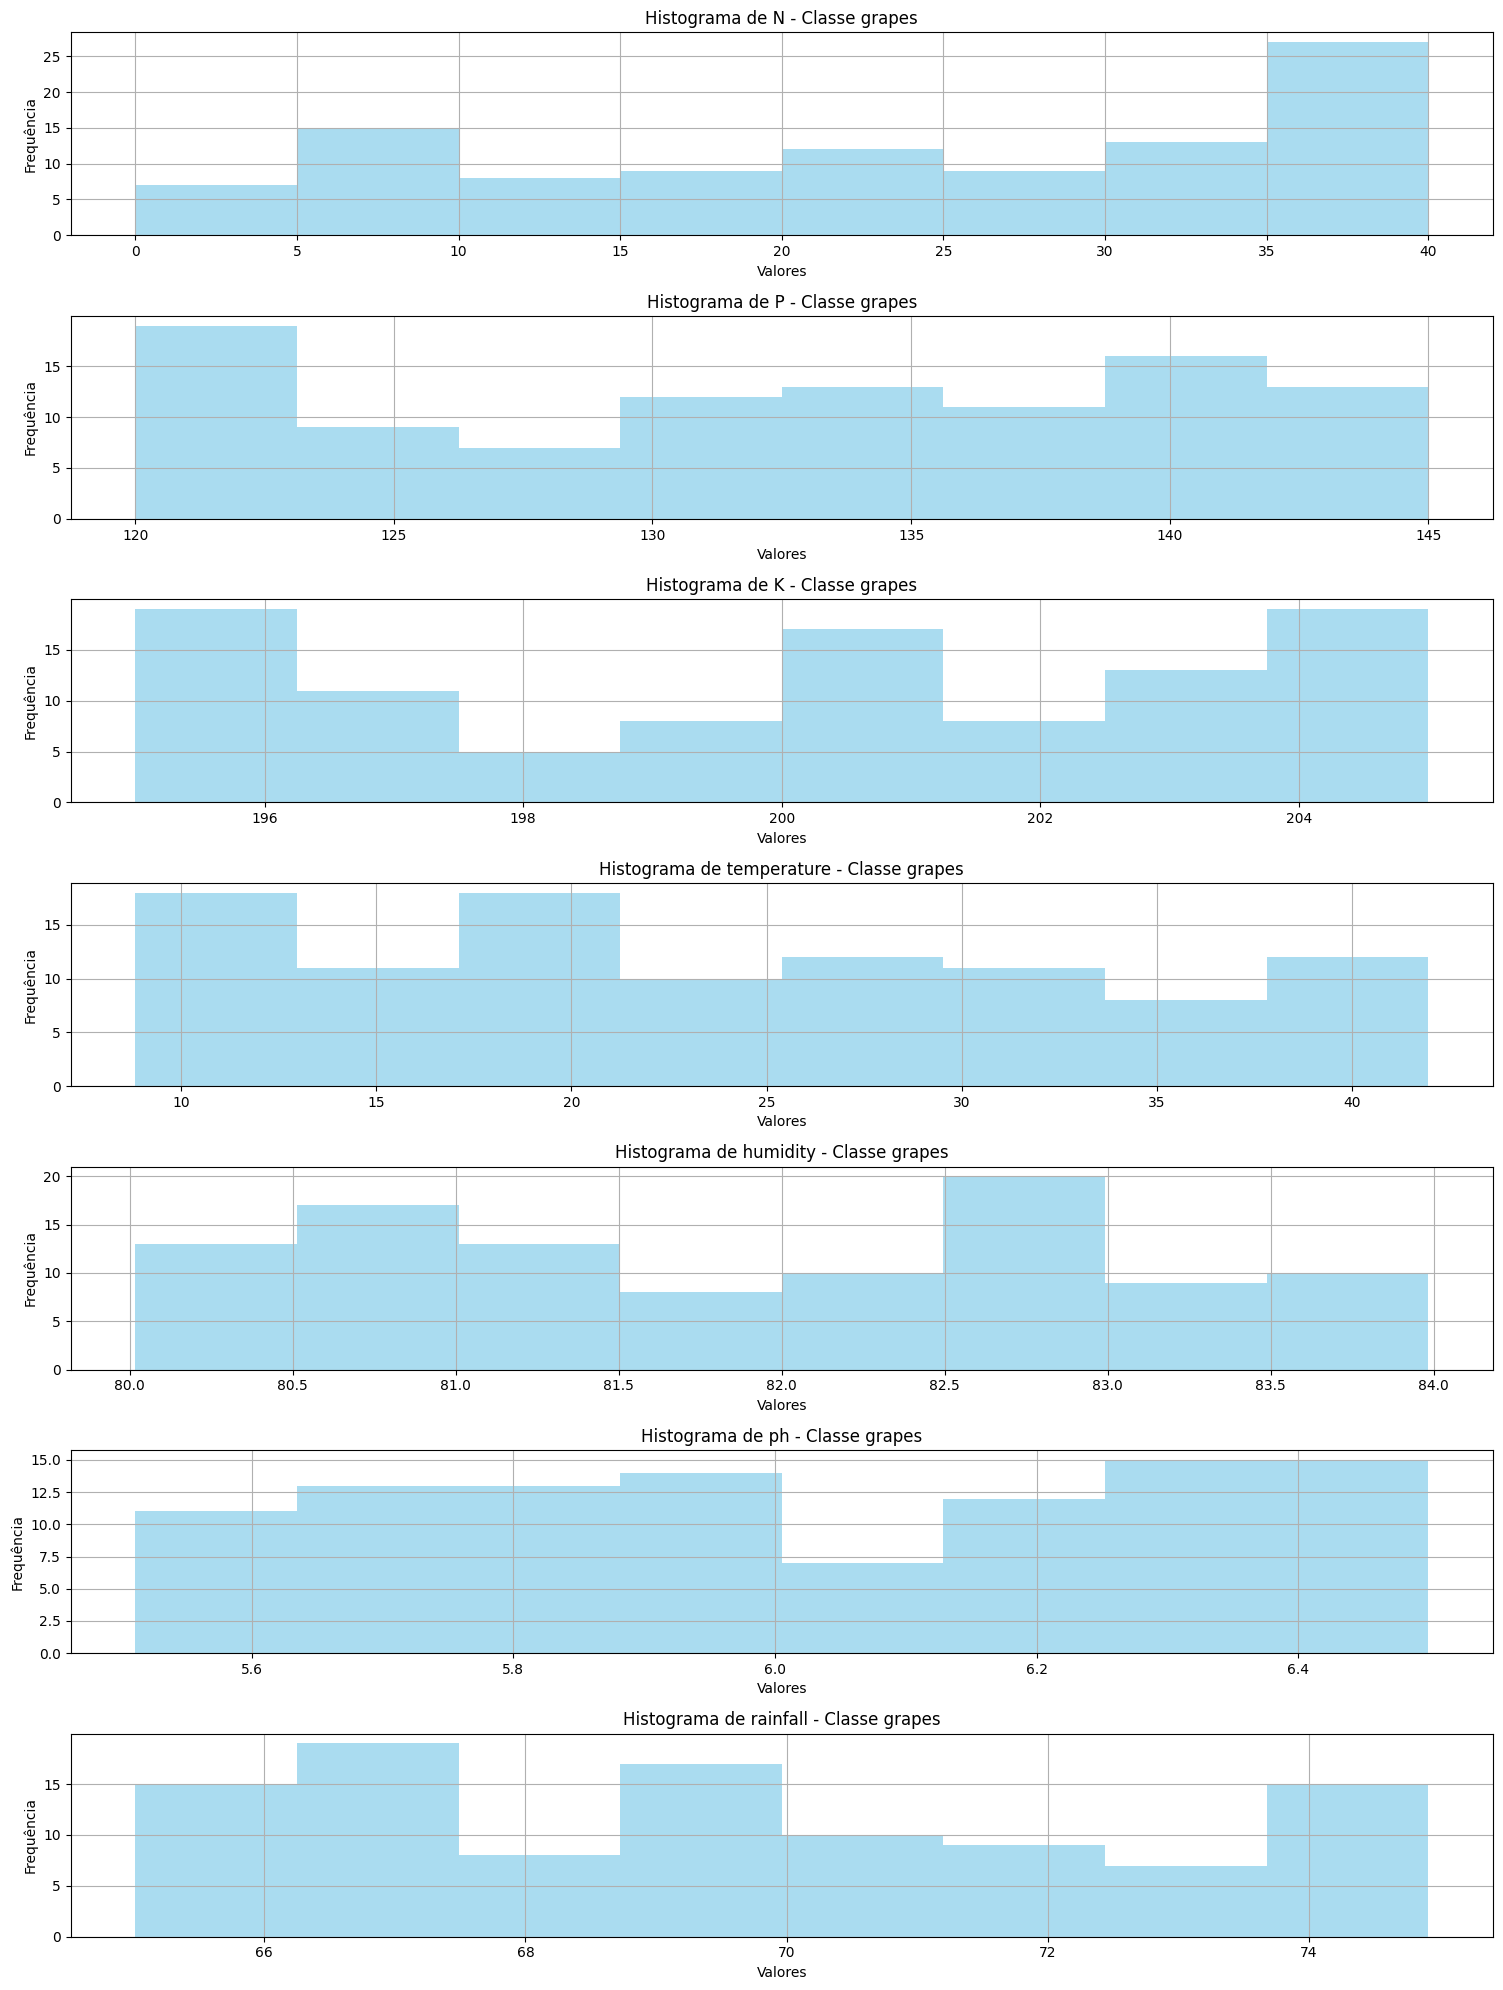

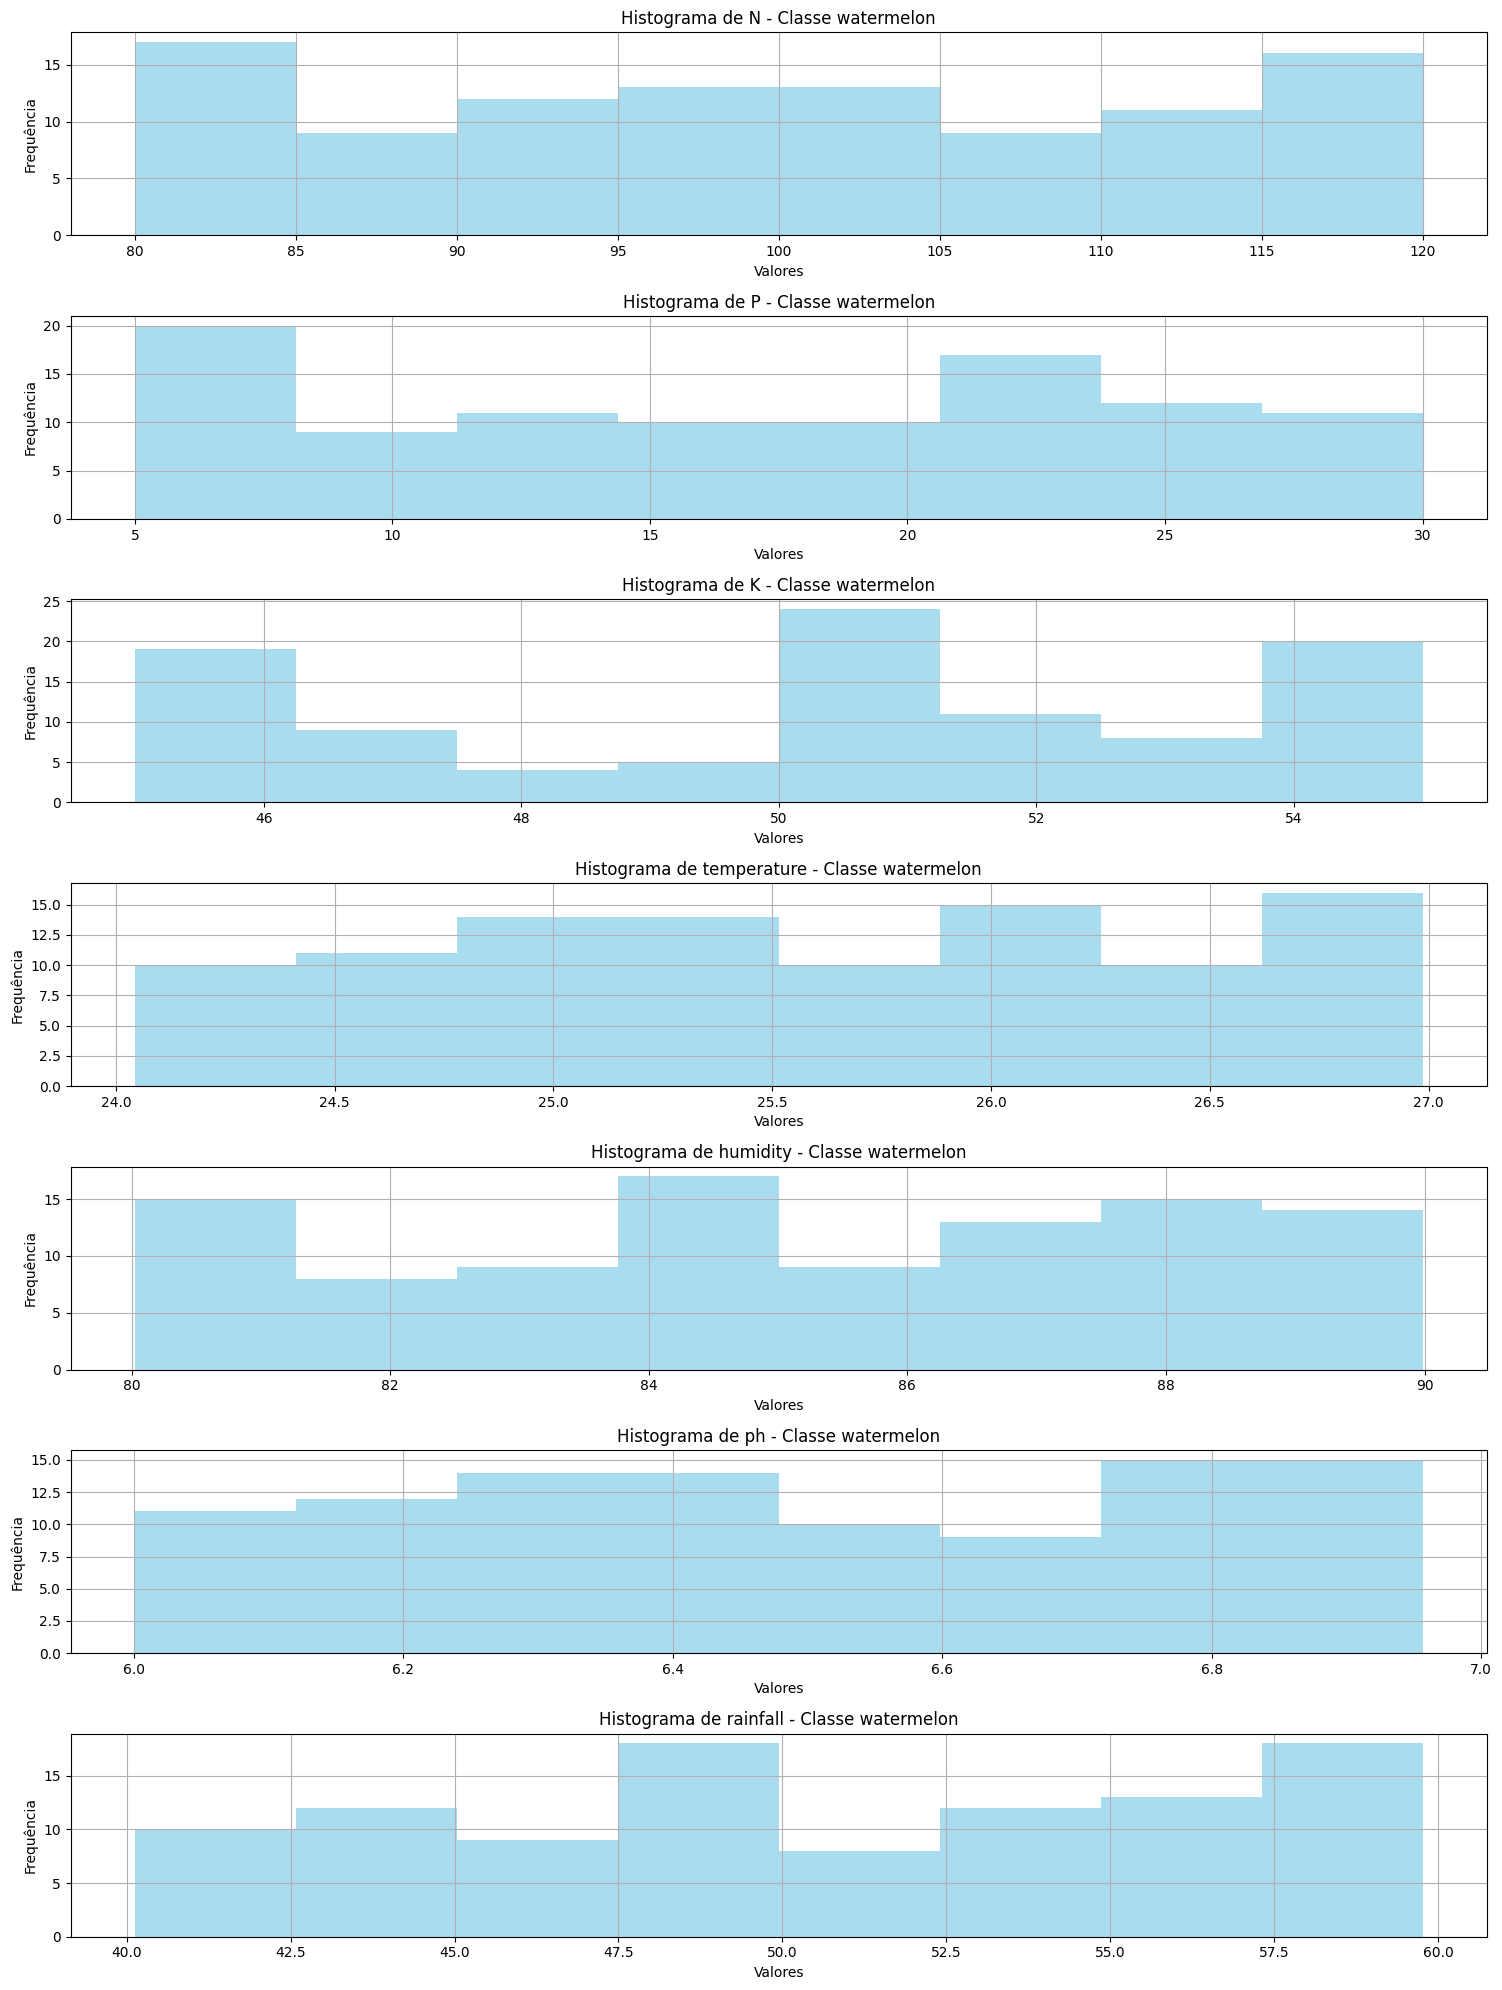

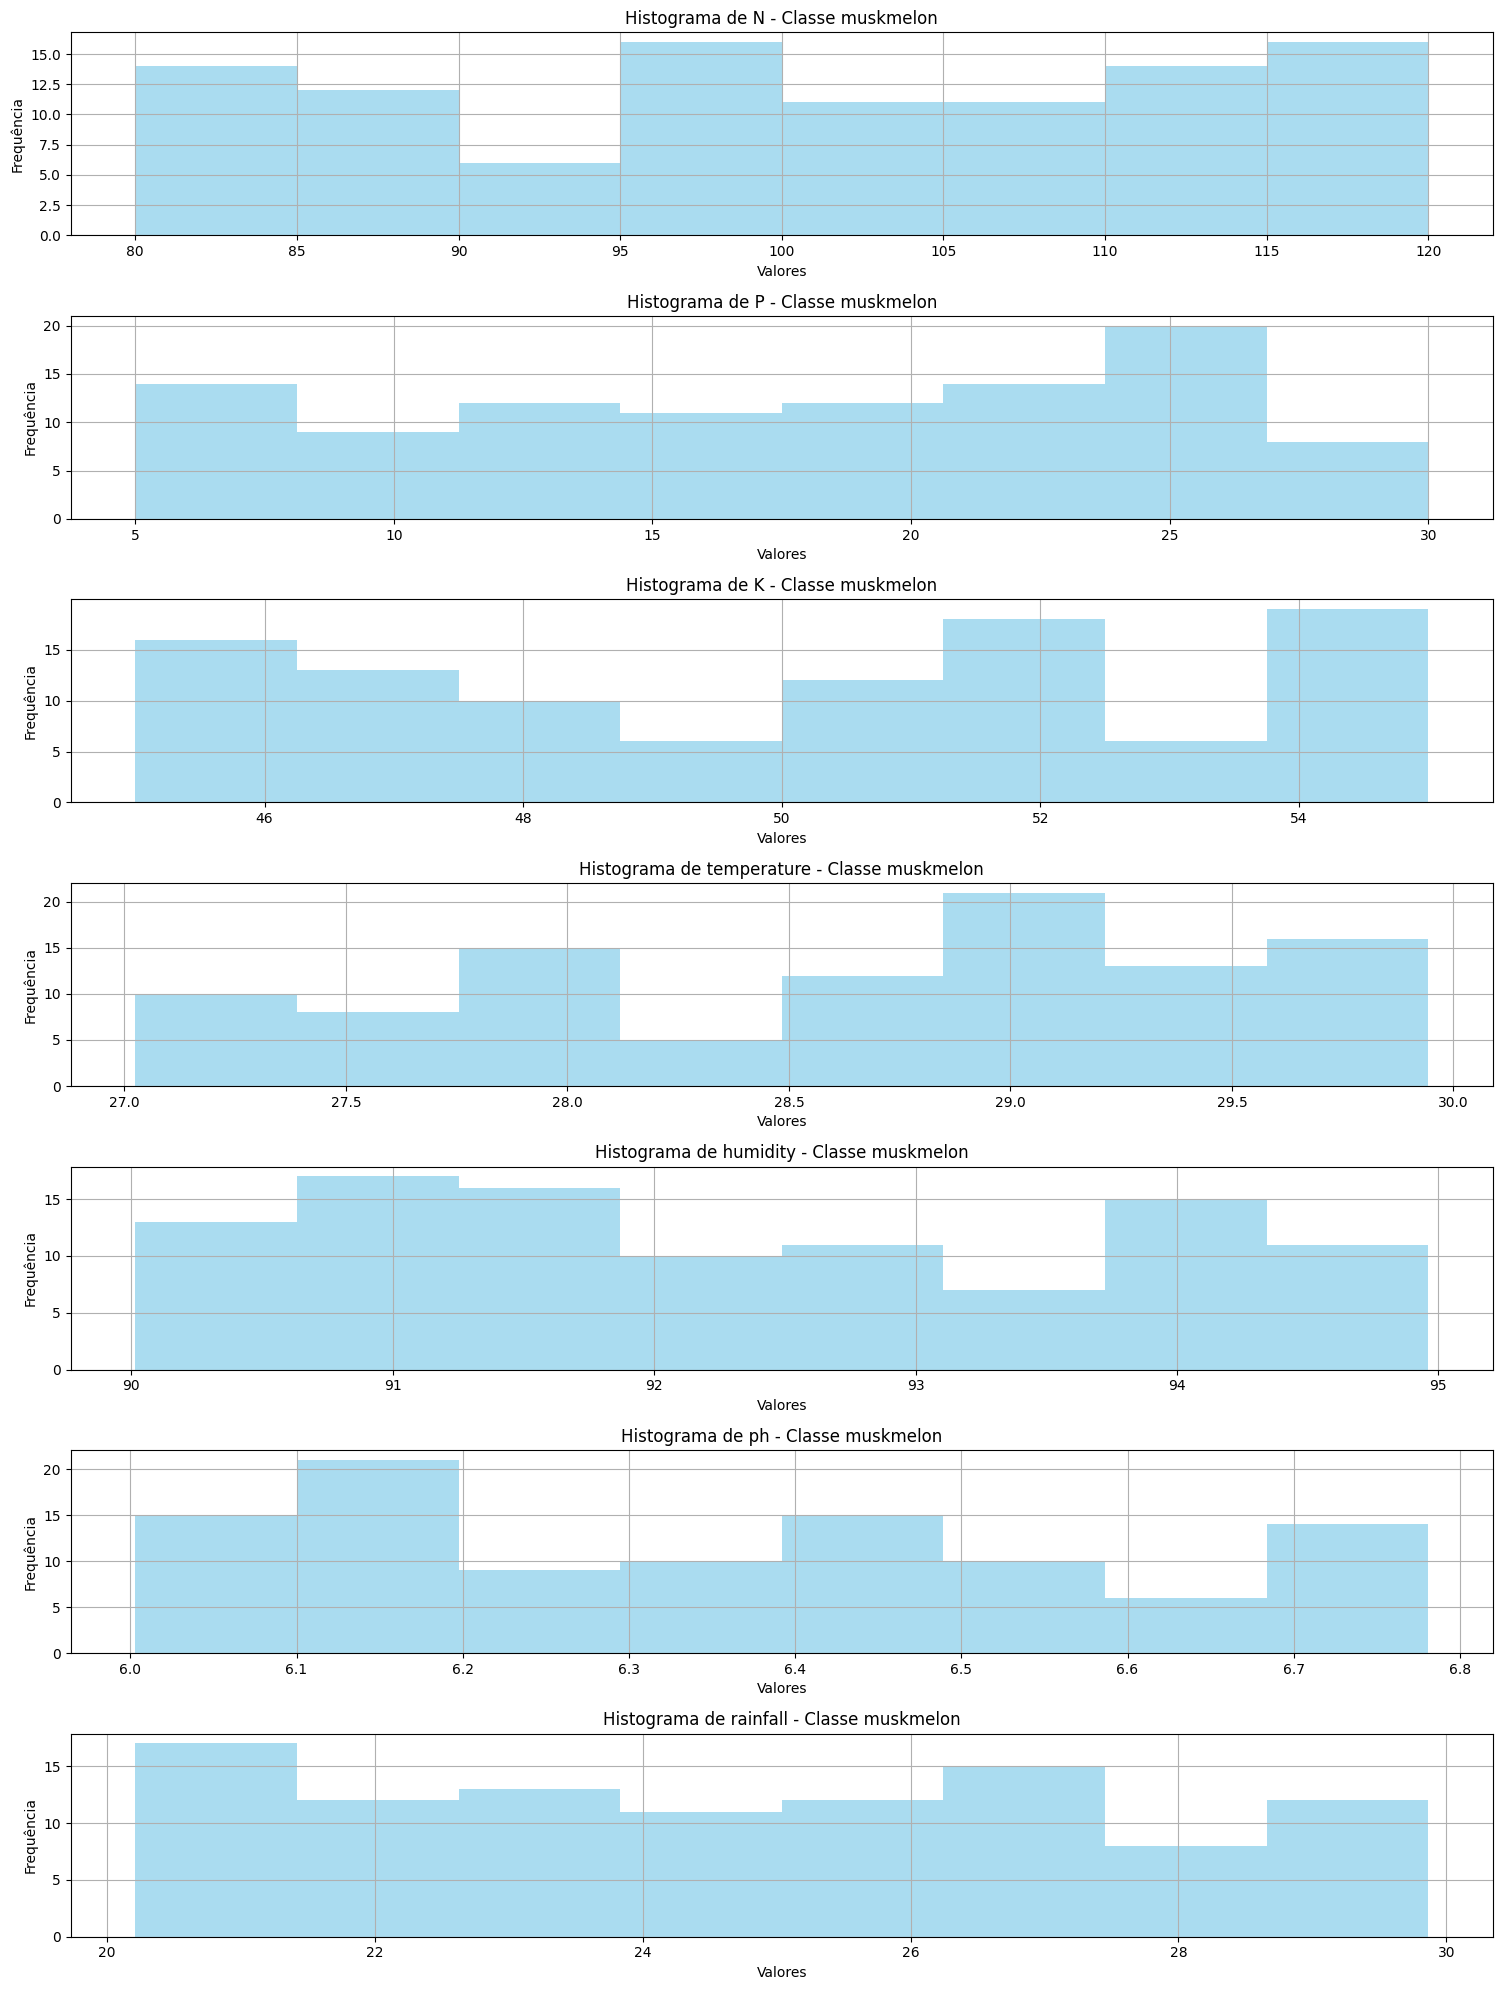

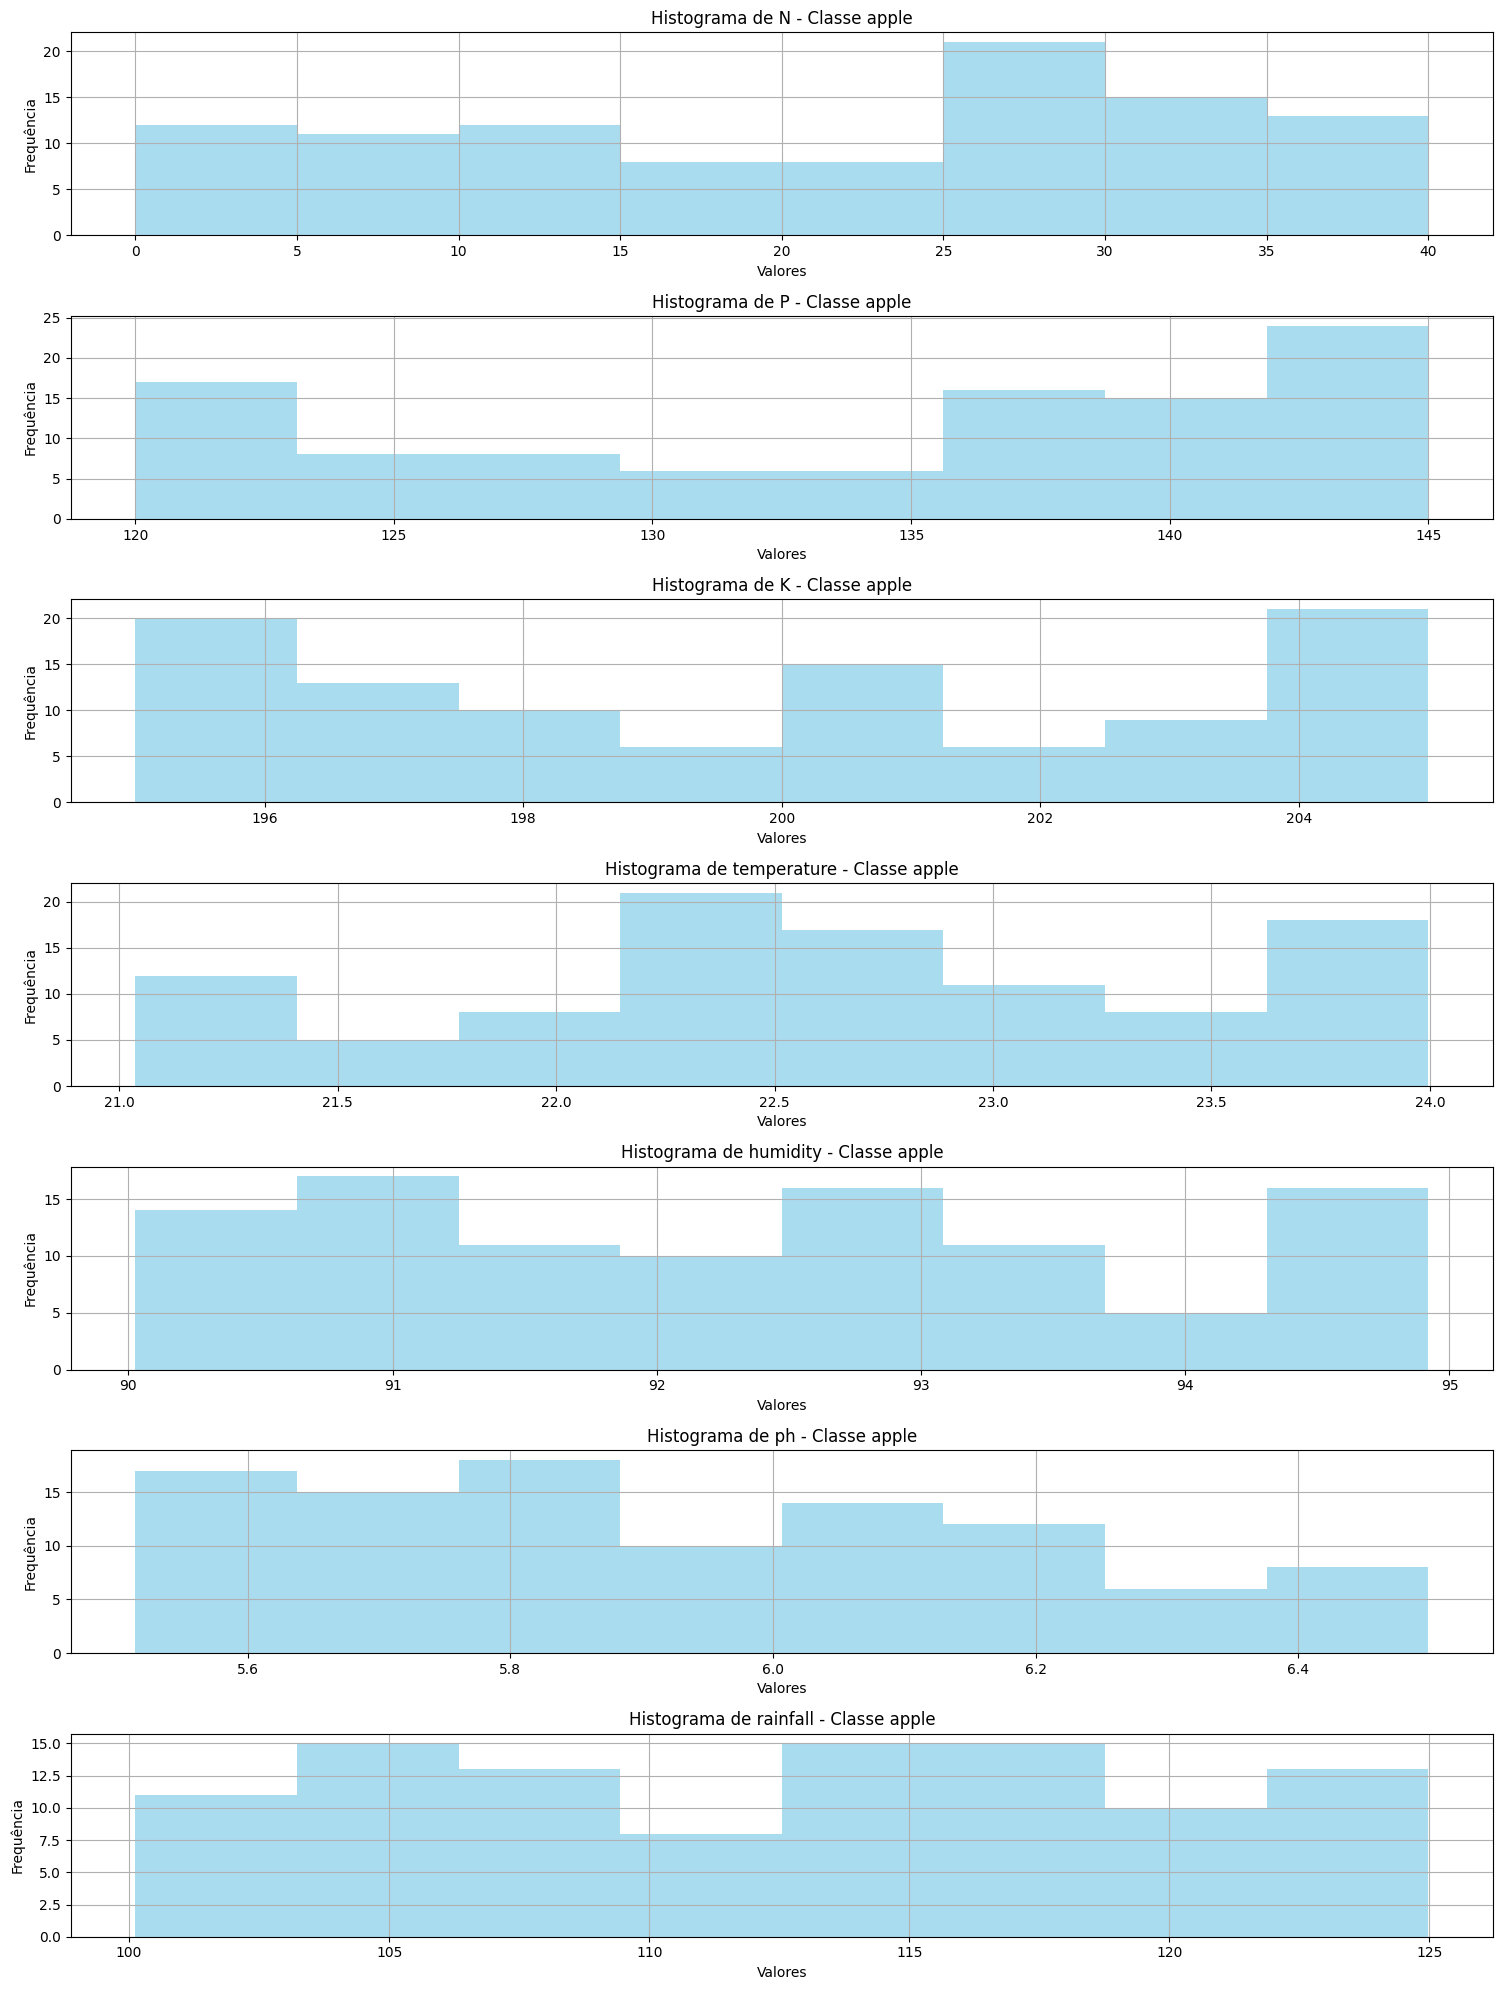

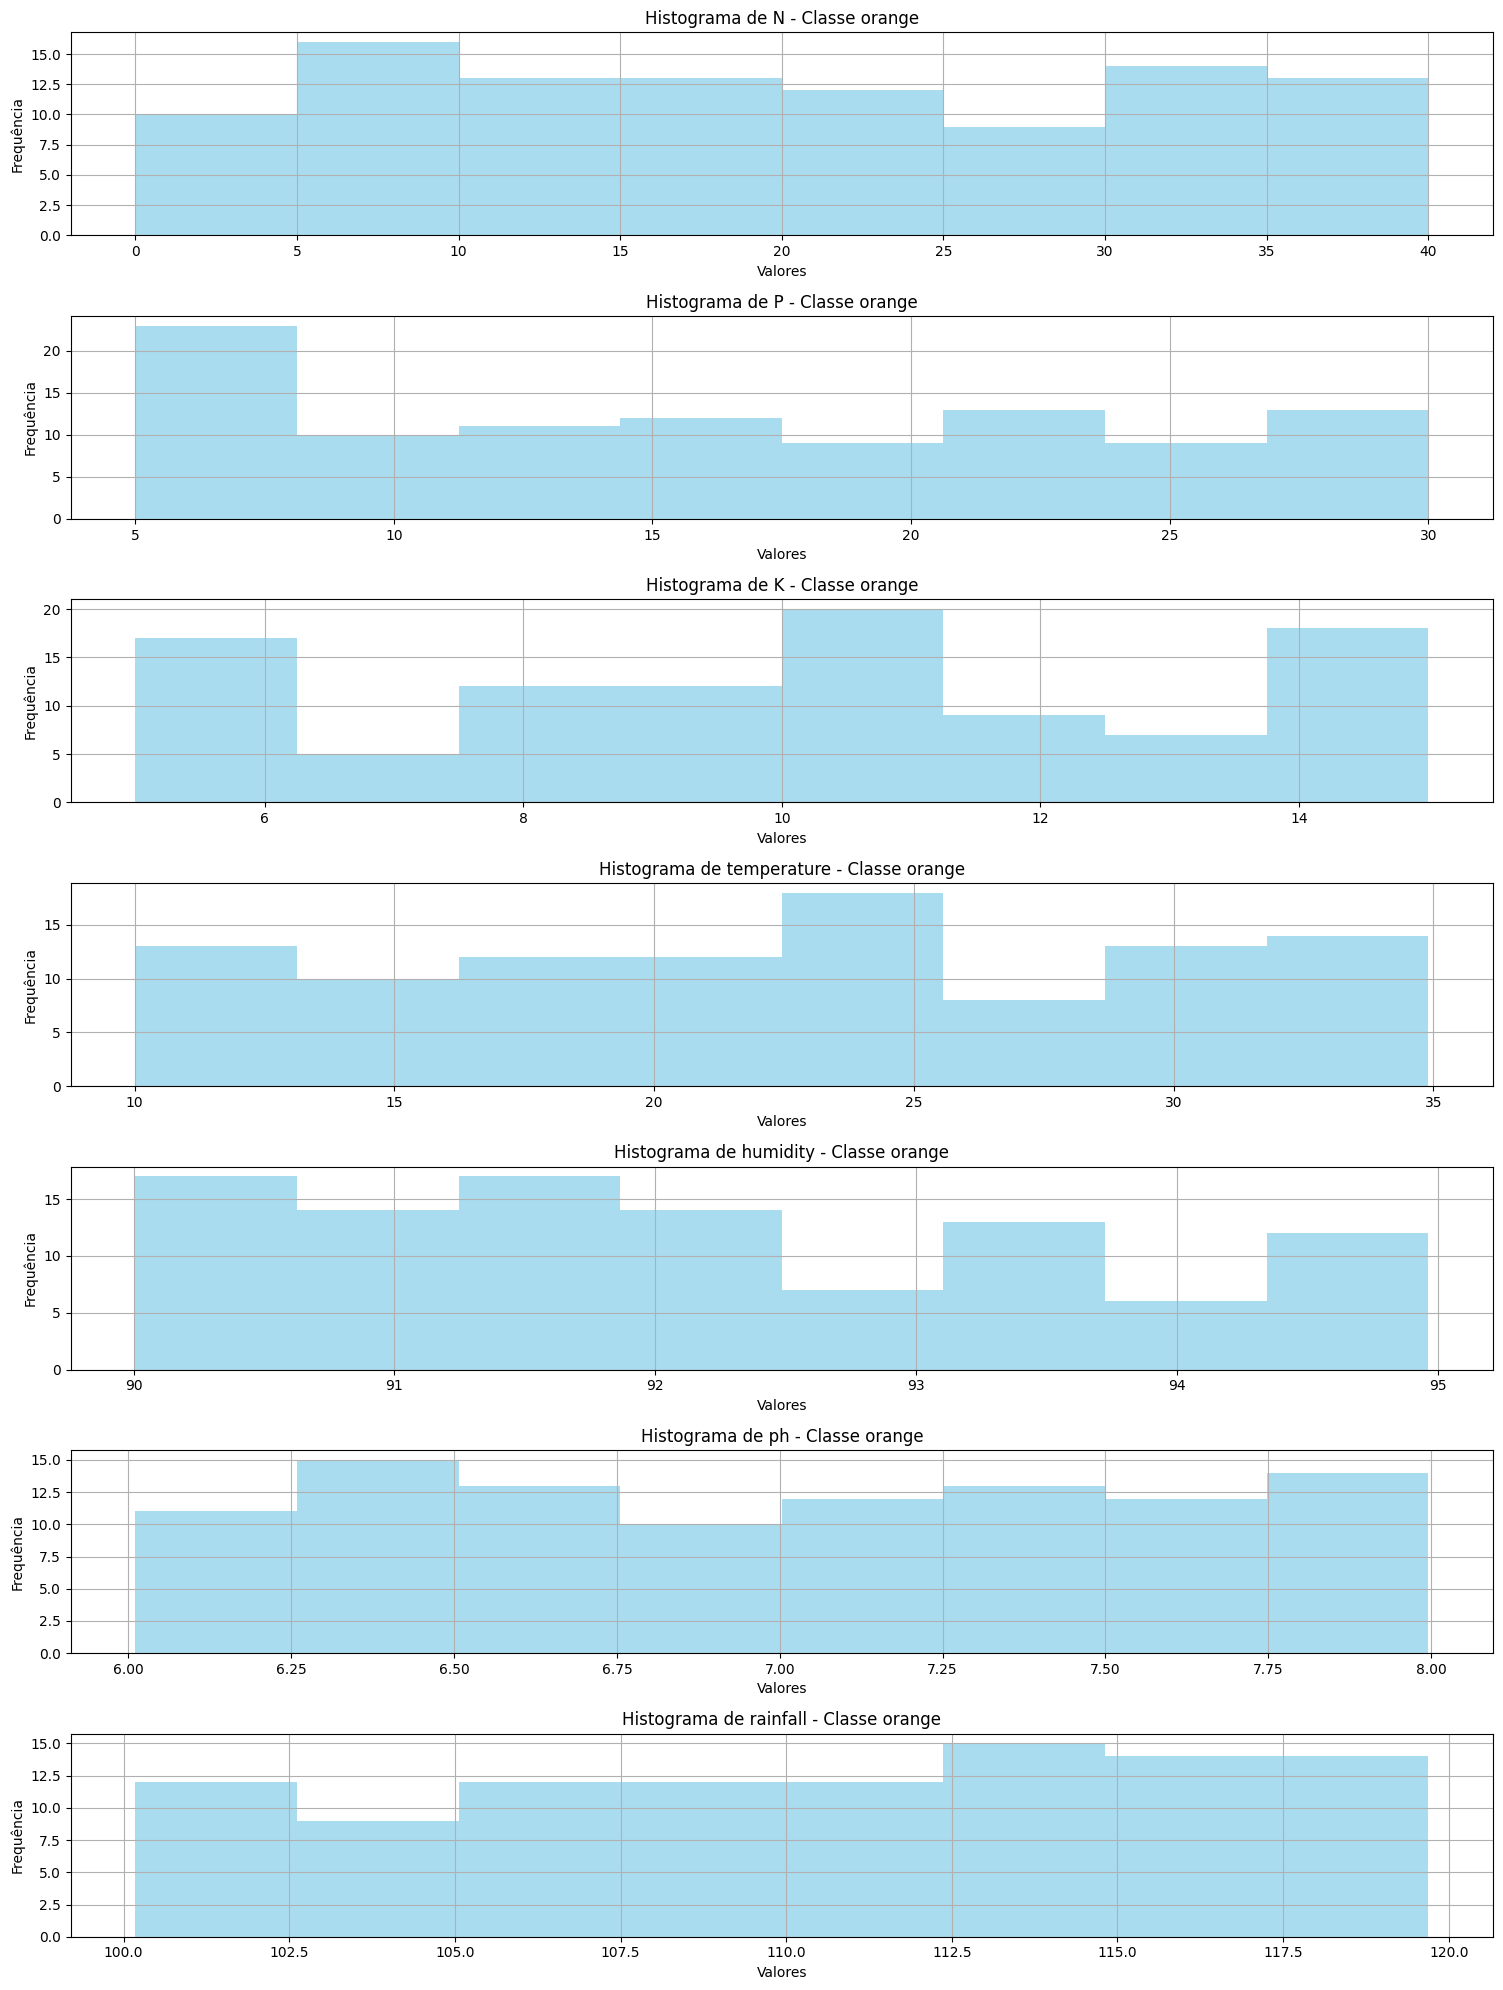

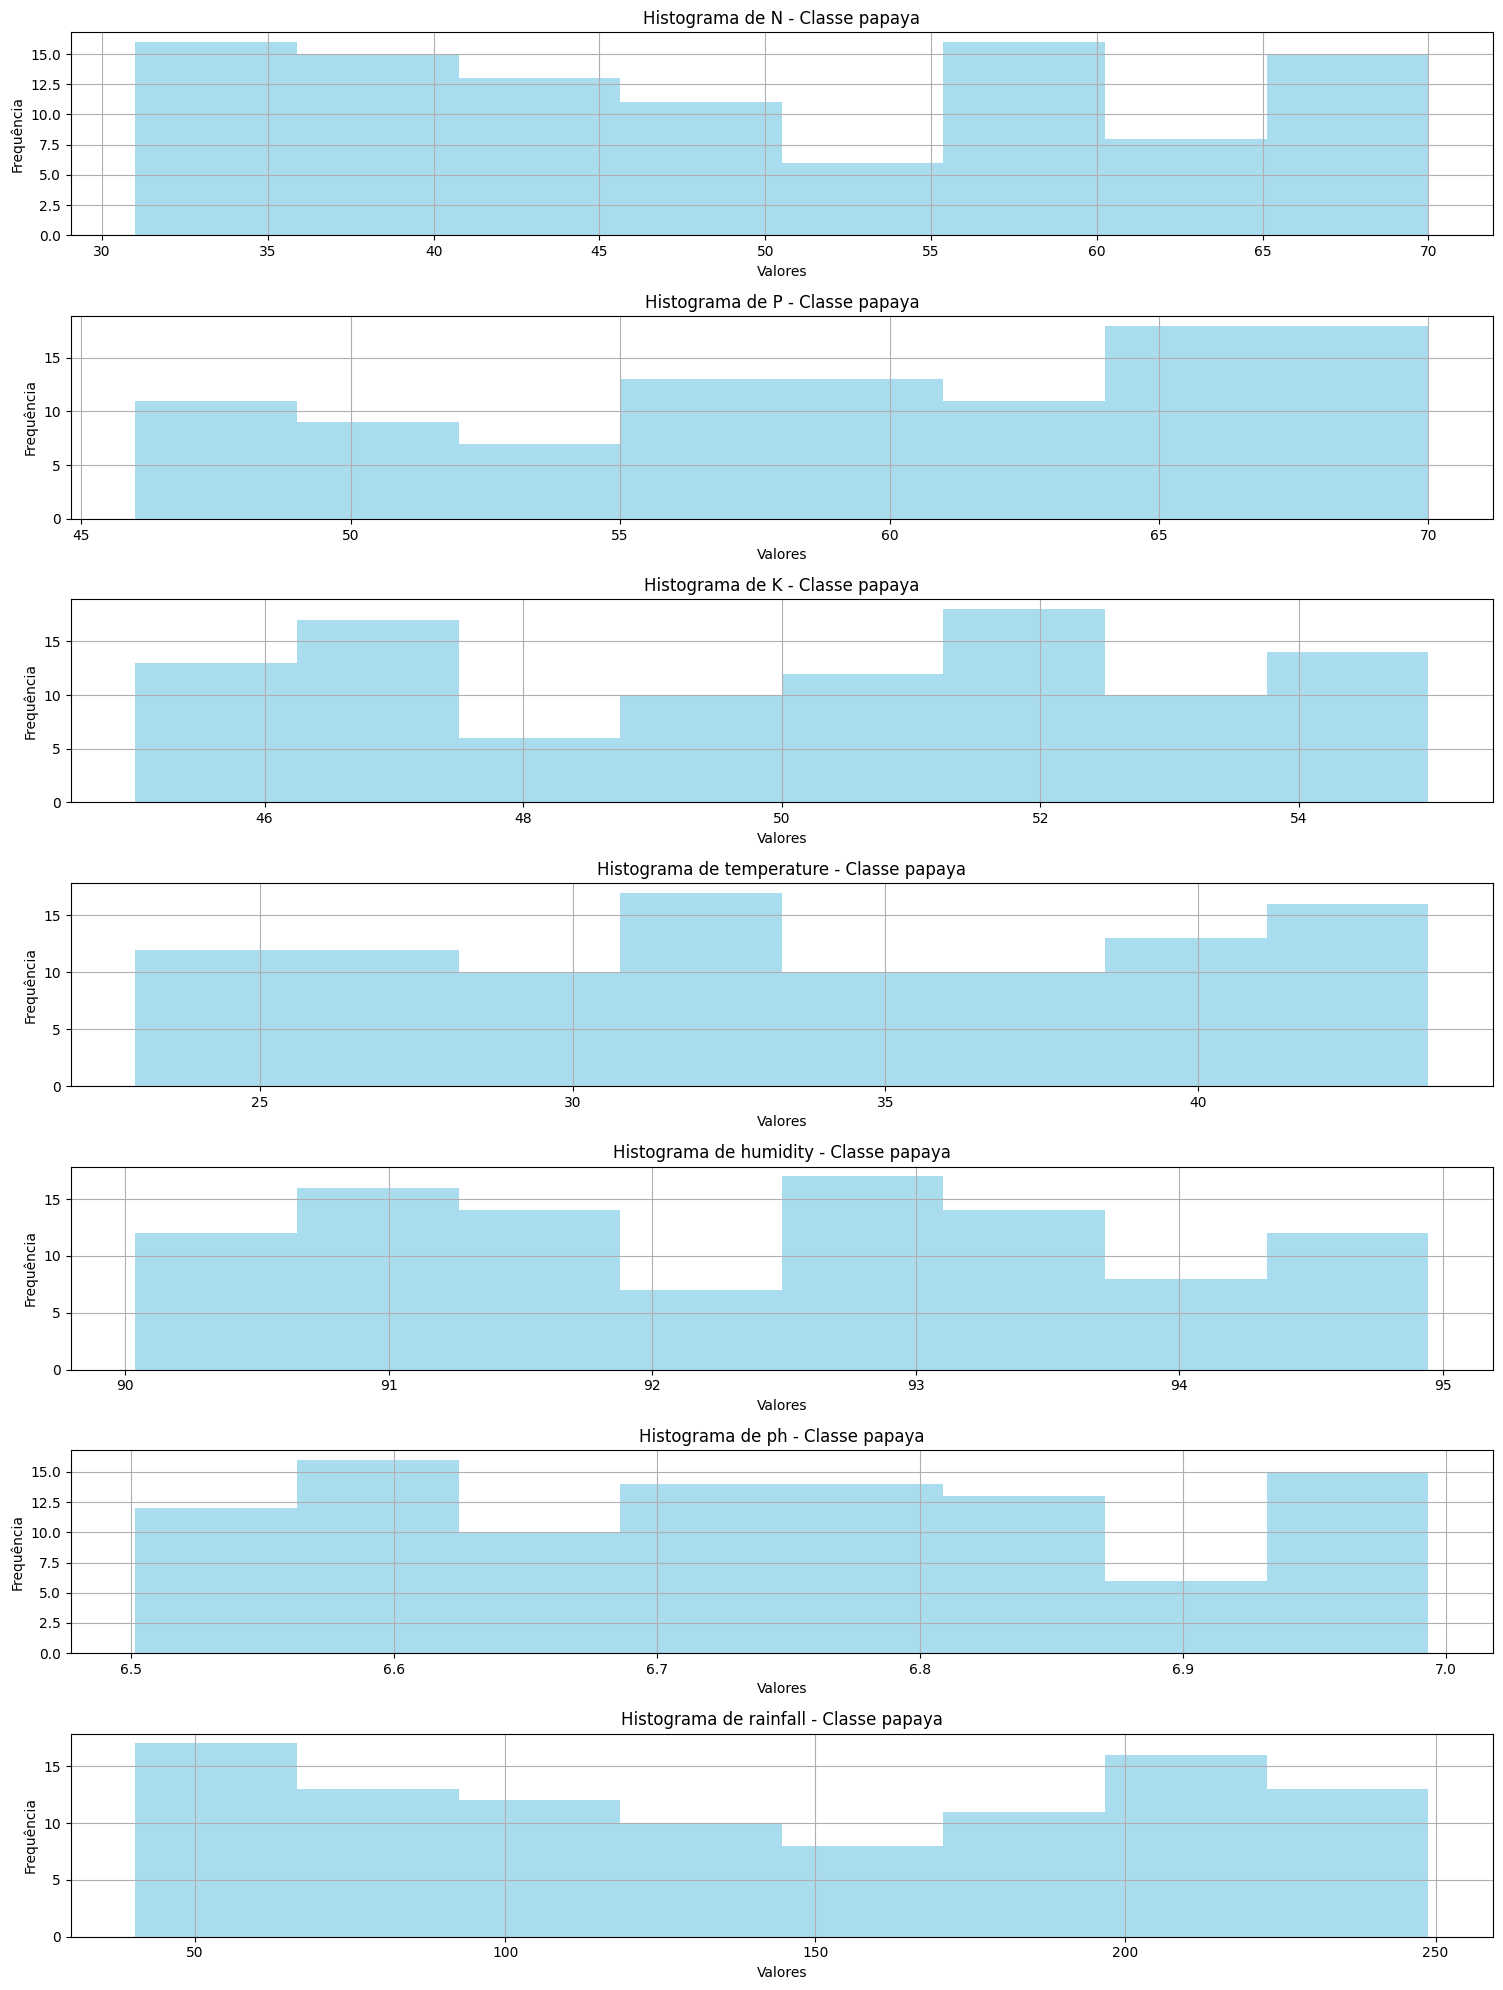

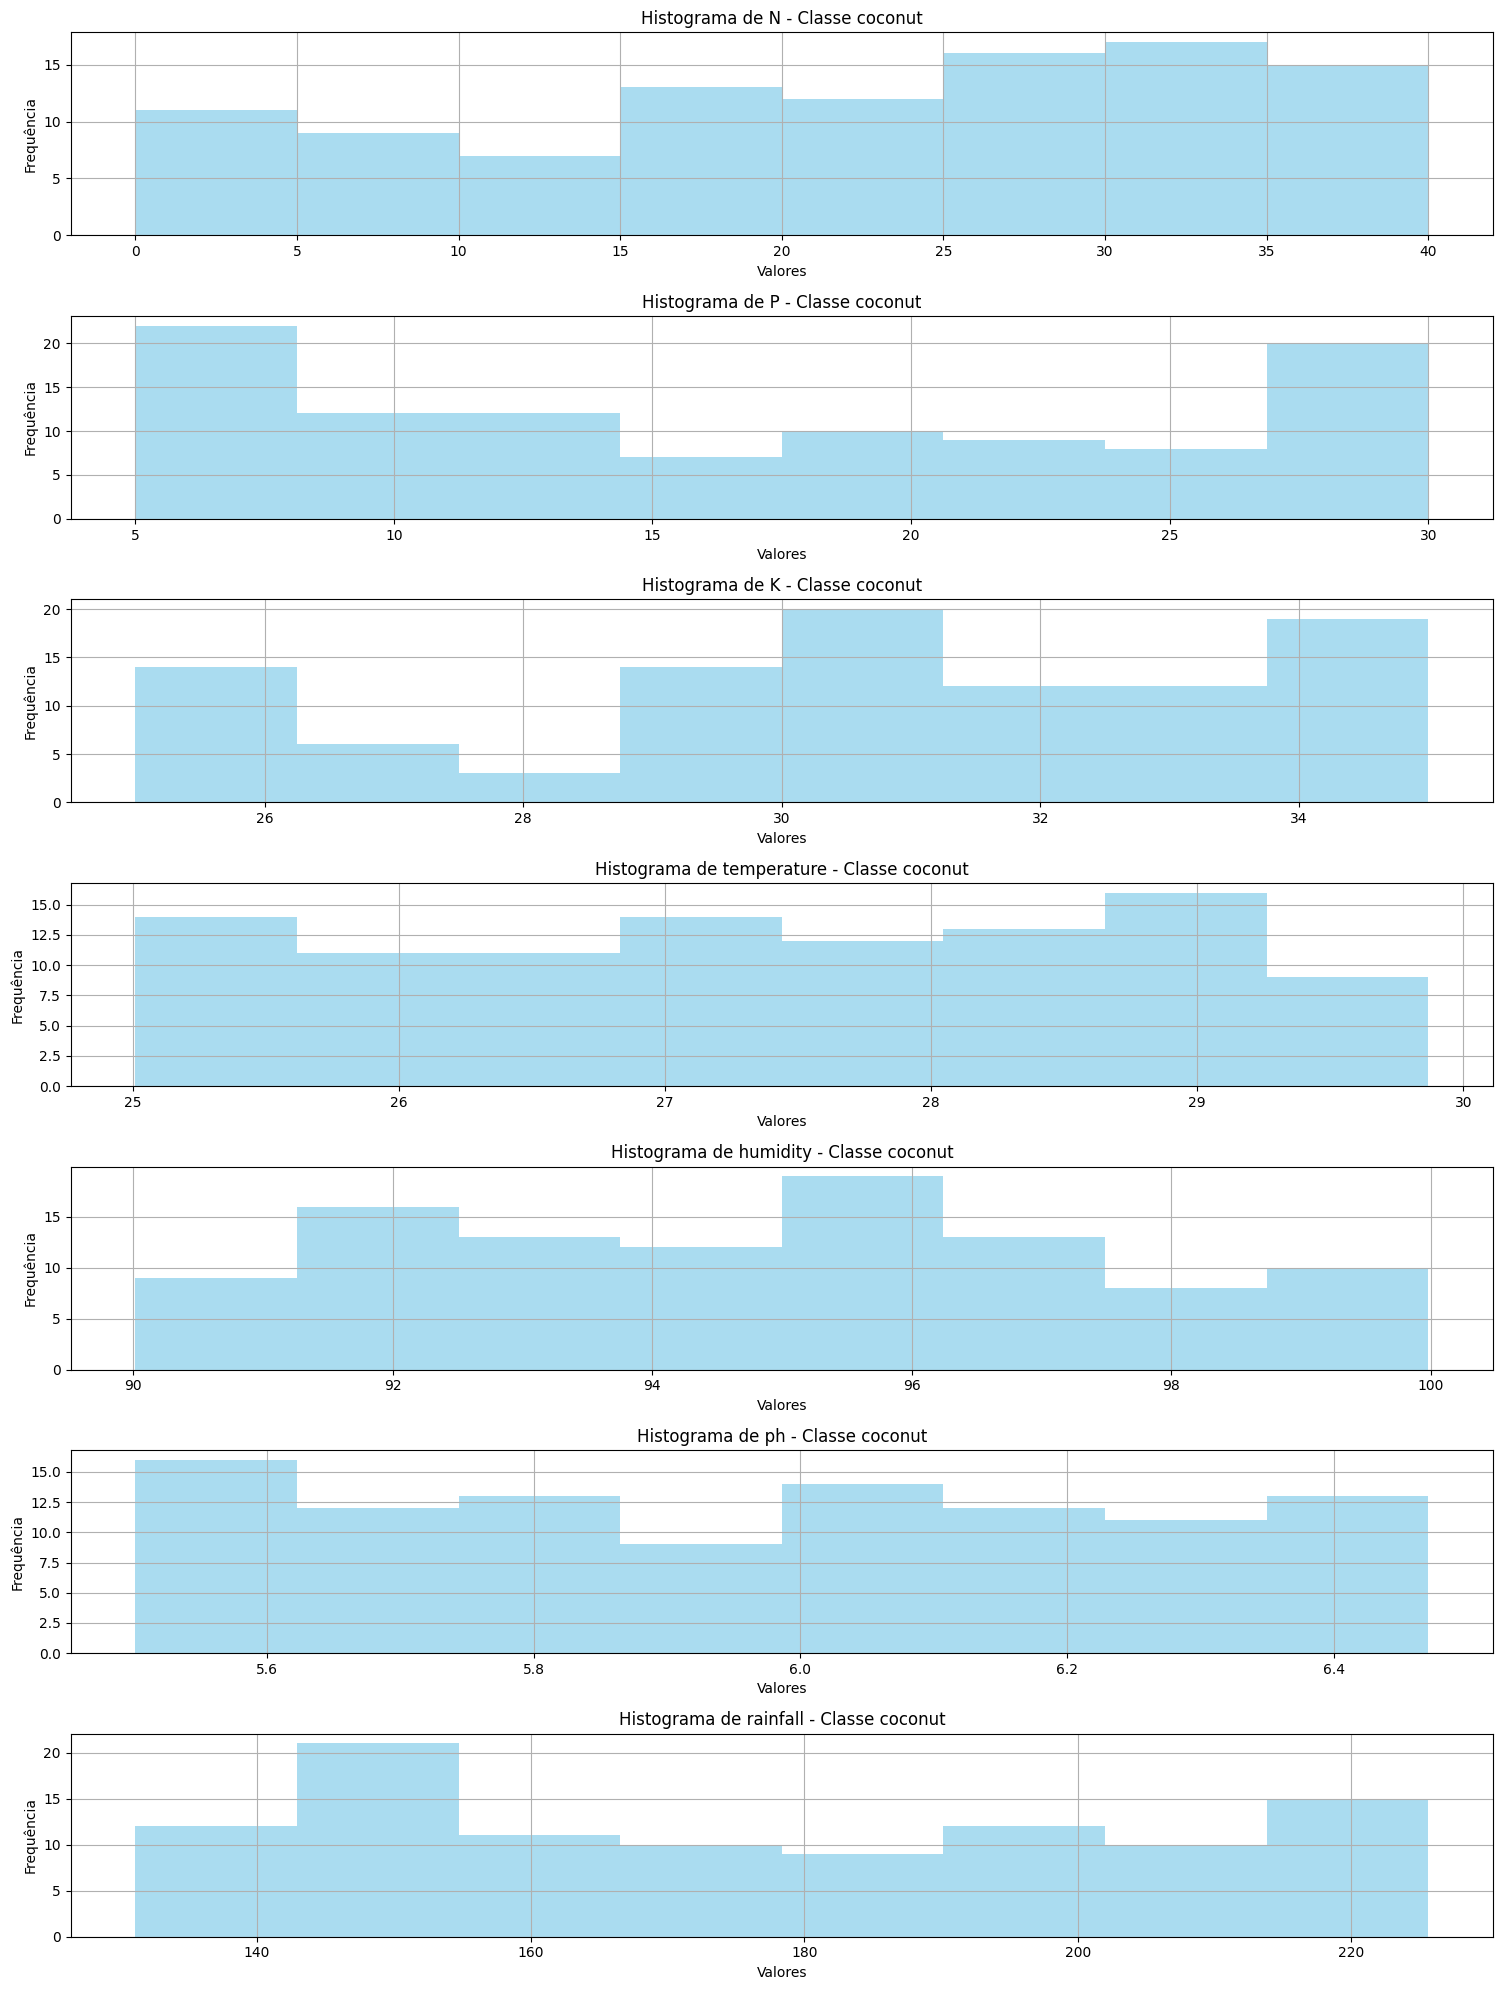

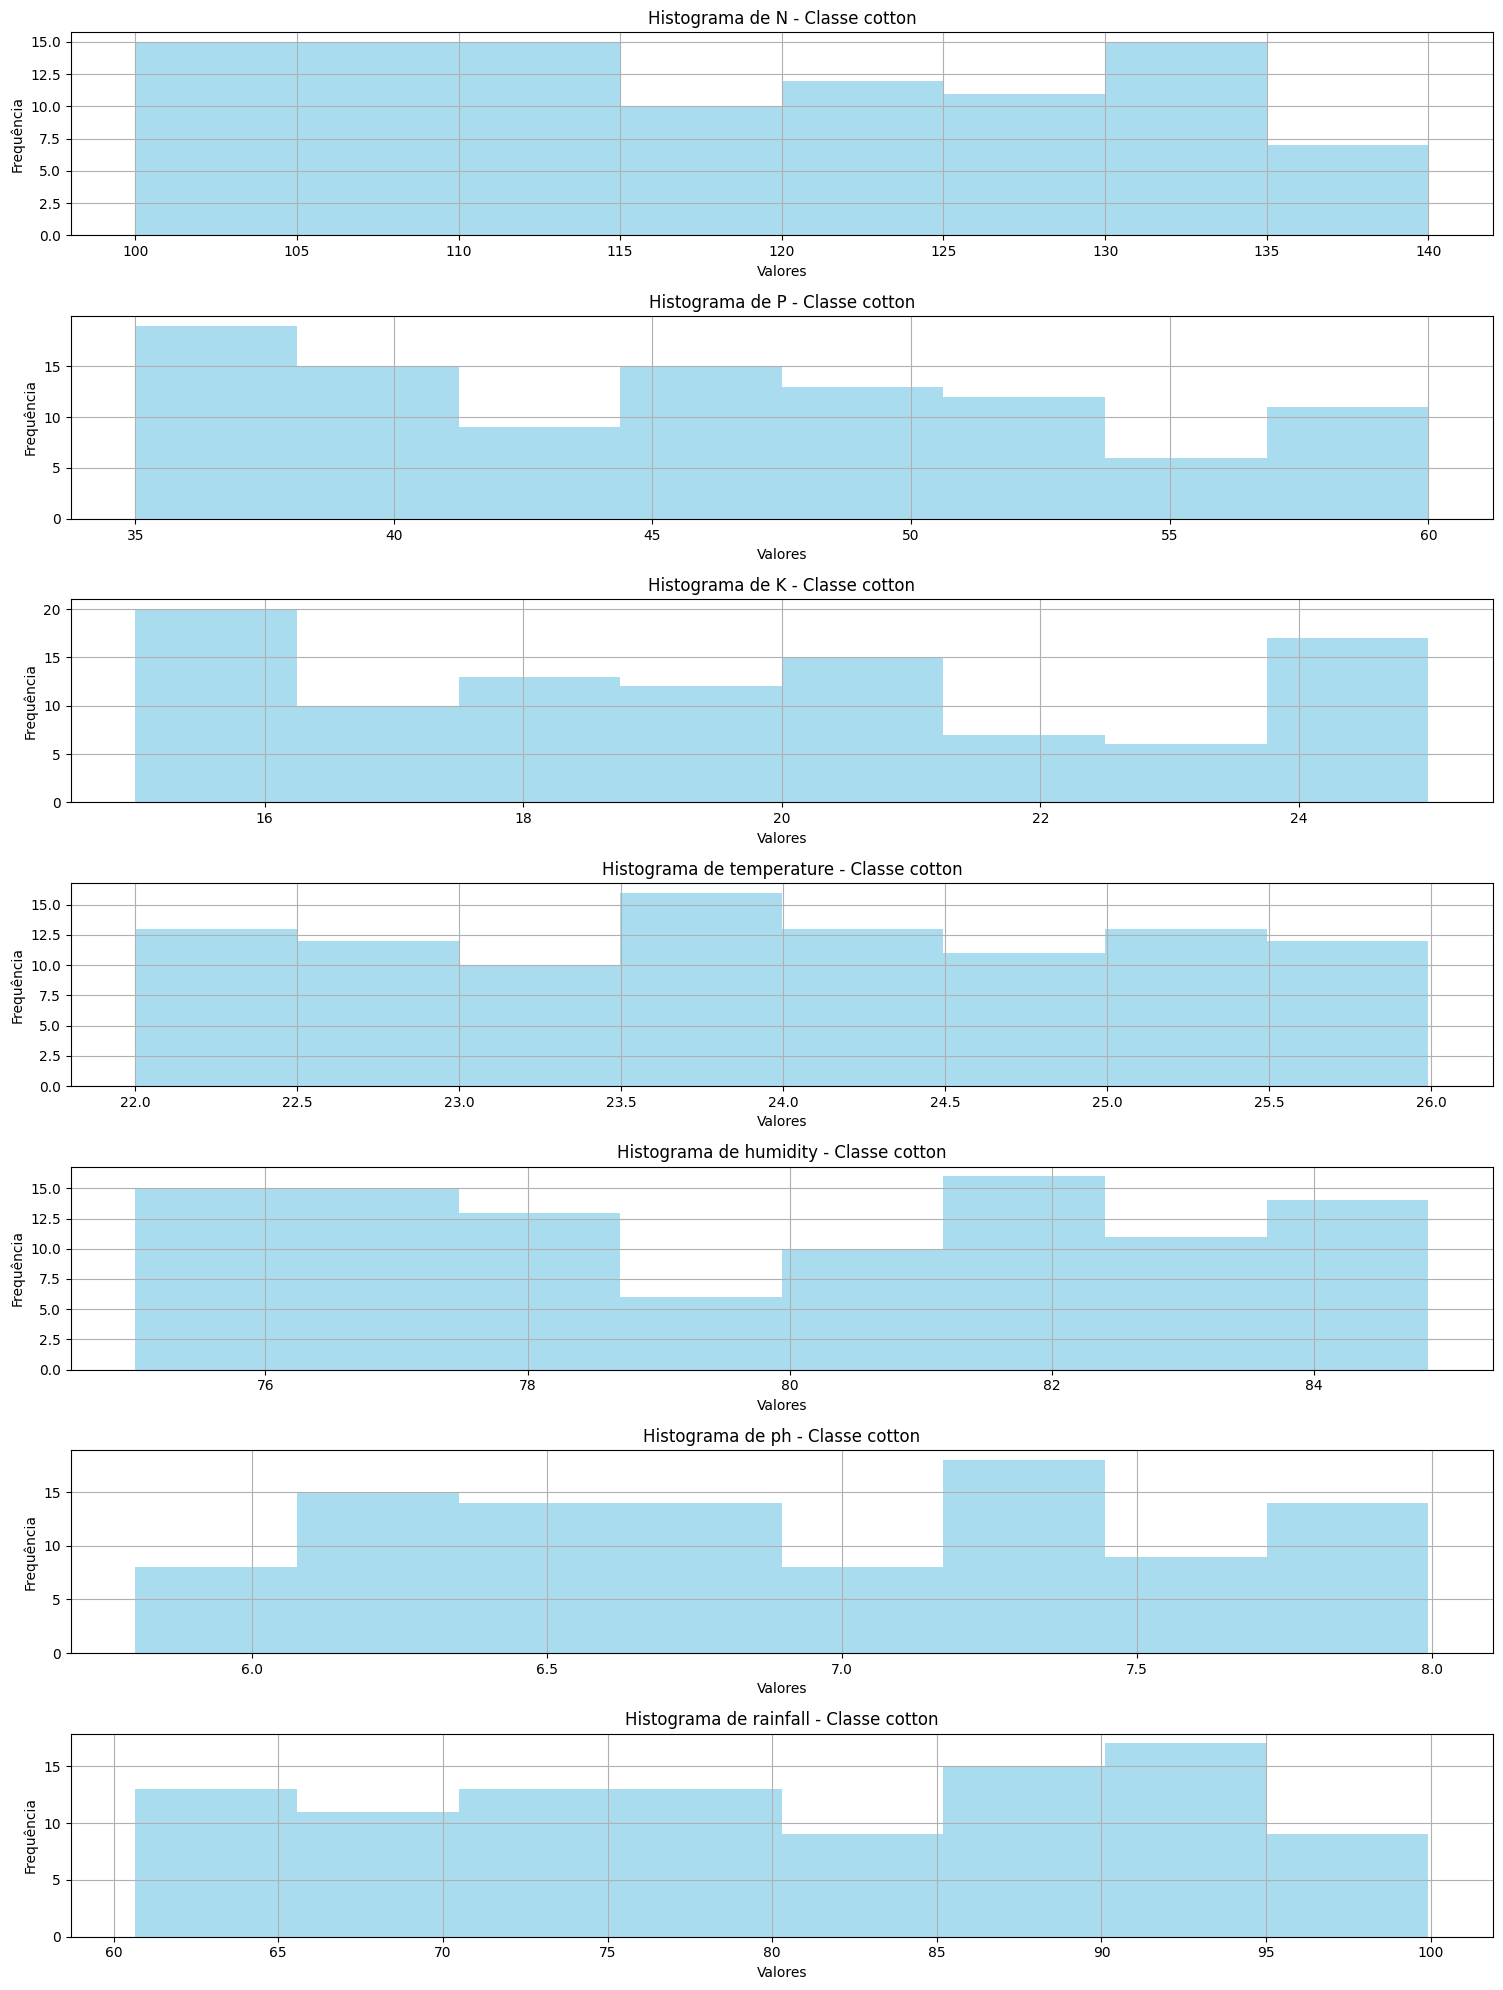

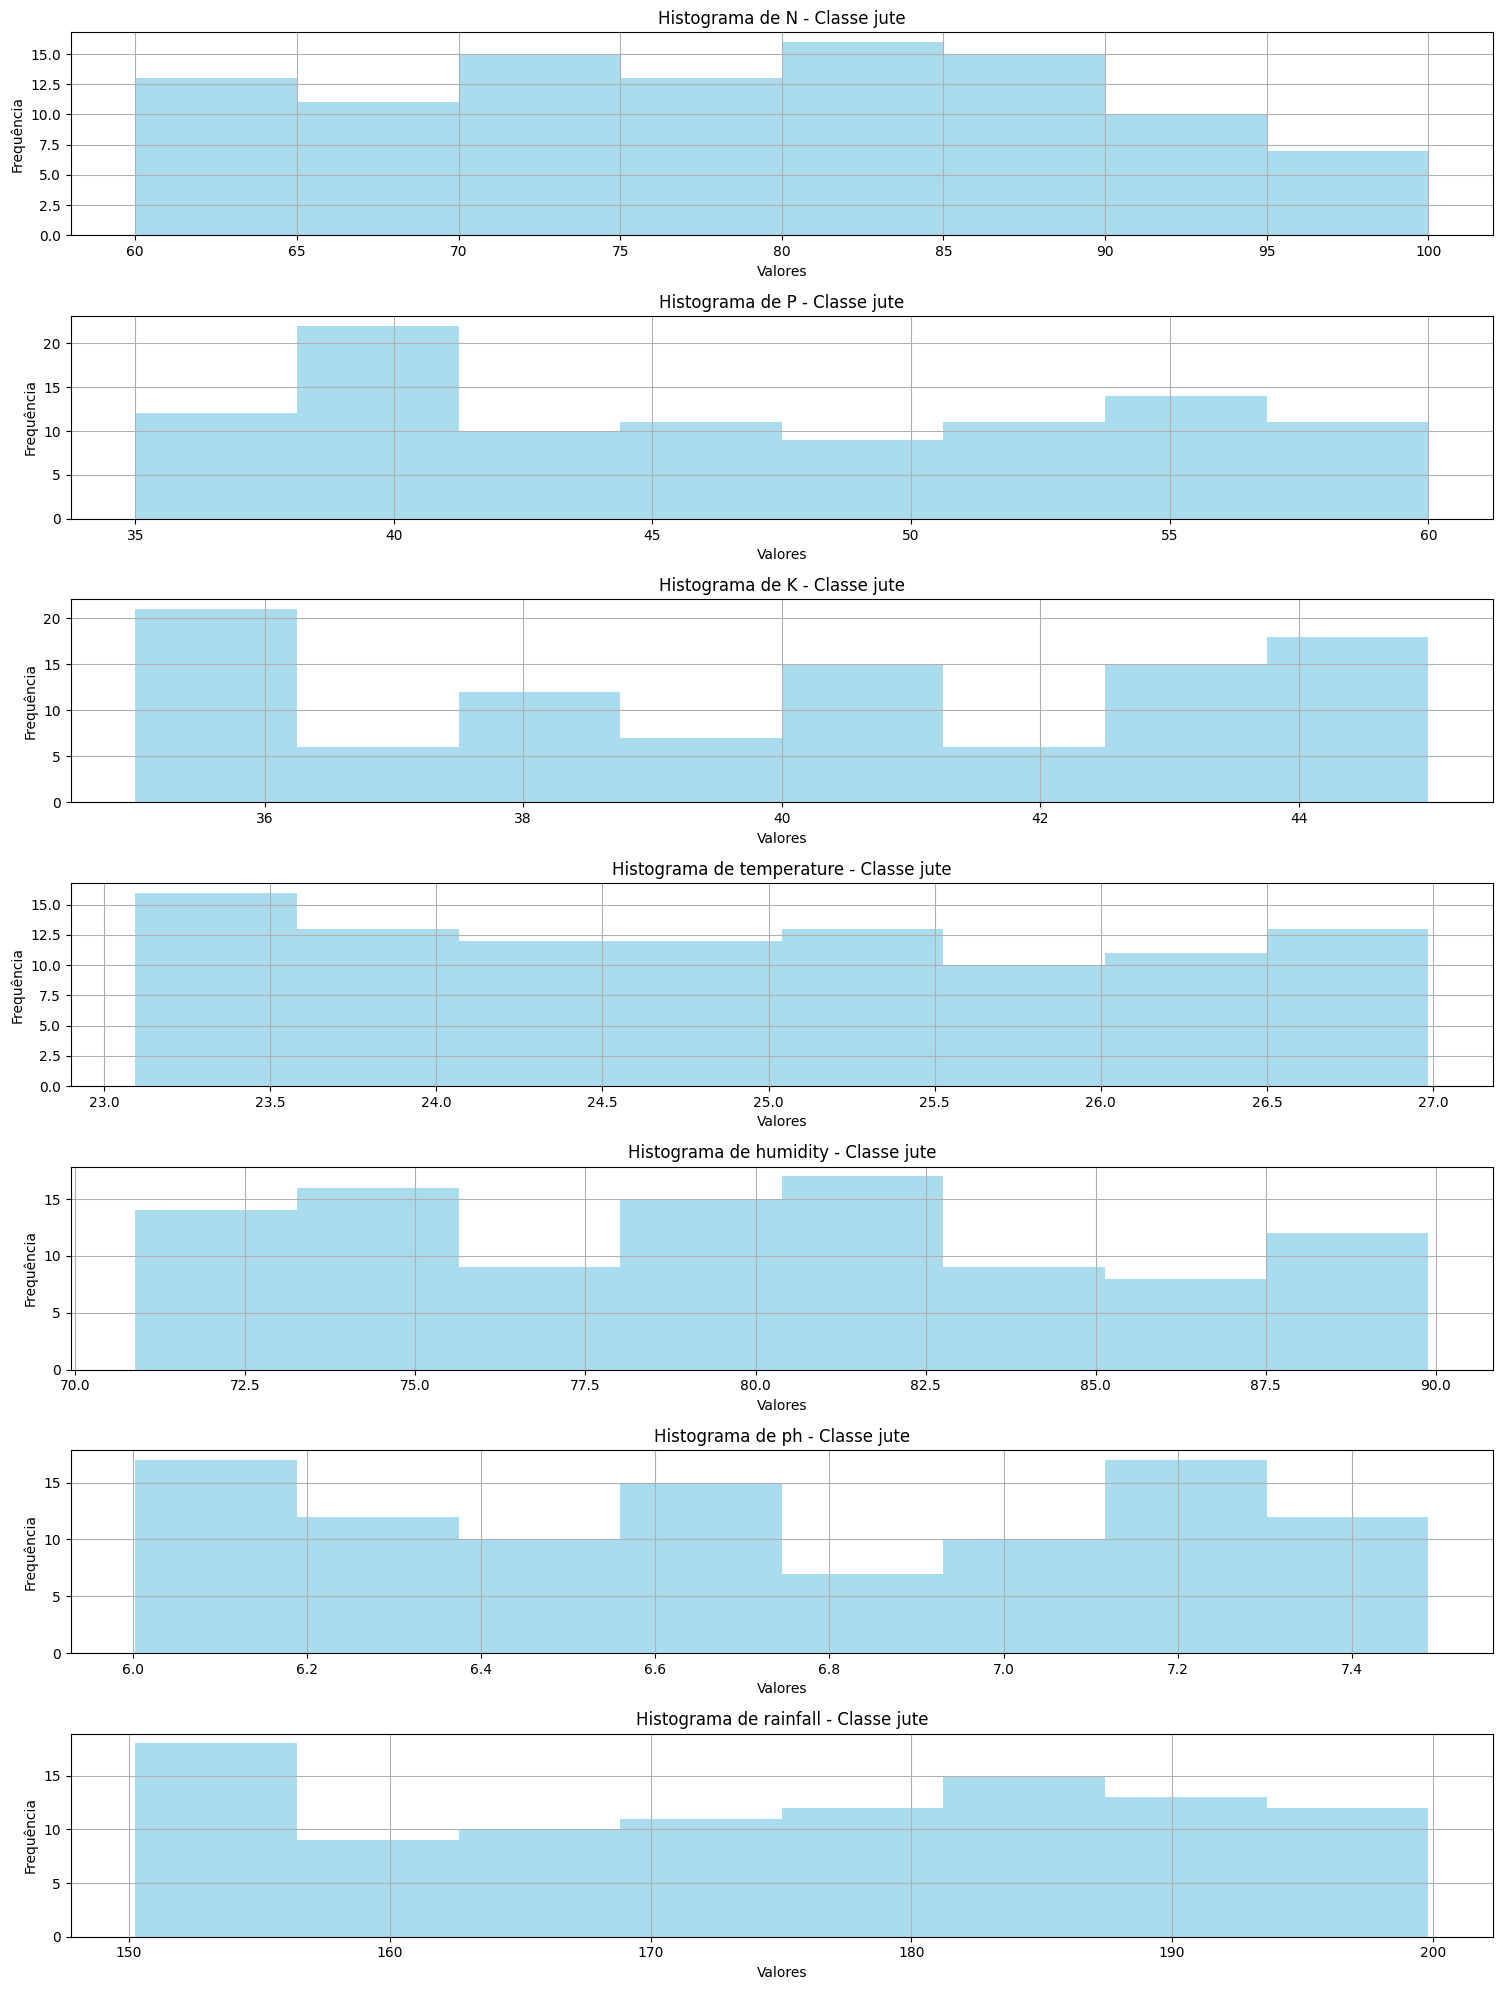

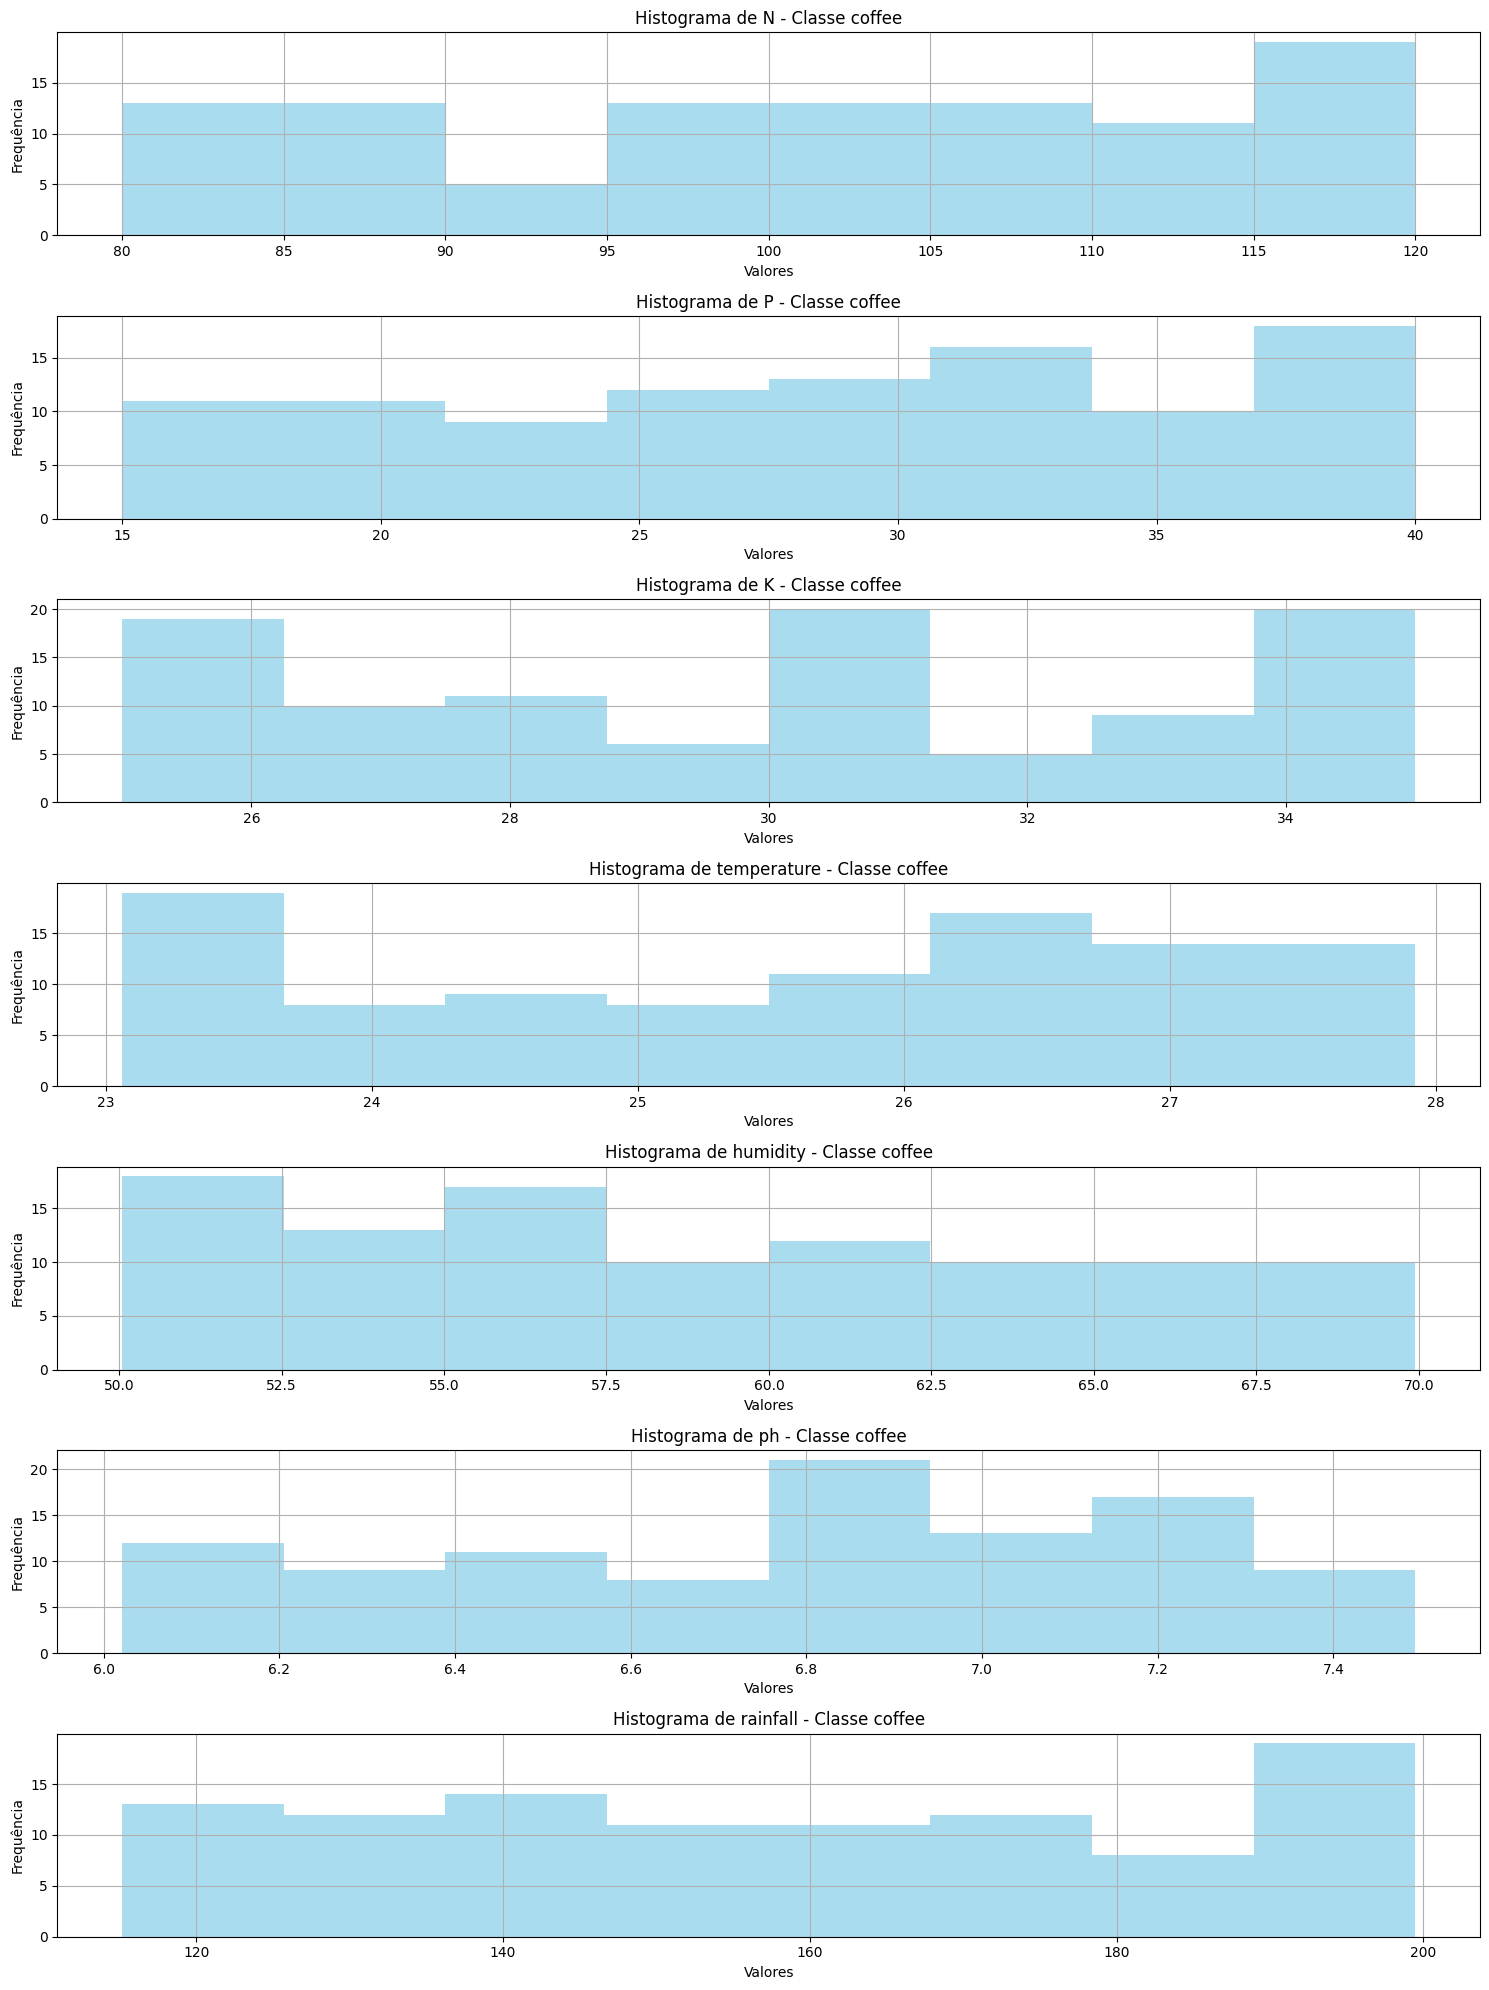

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# Número de classes no dataset
num_classes = crop_recomendation['label'].nunique()

# Número de colunas por subplot
num_cols = 1
num_rows = 7

# Número de linhas necessárias para acomodar todas as colunas
num_rows = (len(crop_recomendation.columns) - 1 + num_cols - 1) // num_cols

# Loop para criar os subplots para cada classe
for classe in crop_recomendation['label'].unique():
    # Filtra os dados para a classe atual
    class_data = crop_recomendation[crop_recomendation['label'] == classe]

    # Cria um novo subplot para a classe atual
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

    # Loop para criar os histogramas para cada variável (coluna) do DataFrame
    for i, column in enumerate(crop_recomendation.columns[:-1]):  # Exclui a coluna 'classe'
        row = i // num_cols
        col = i % num_cols
        axes[row].hist(class_data[column], bins='auto', color='skyblue', alpha=0.7)
        axes[row].set_title(f'Histograma de {column} - Classe {classe}')
        axes[row].set_xlabel('Valores')
        axes[row].set_ylabel('Frequência')
        axes[row].grid(True)

    # Remove eixos vazios
    for i in range(len(crop_recomendation.columns) - 1, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    # Ajusta o layout do subplot
    plt.tight_layout()

    # Exibe o subplot para a classe atual
    plt.show()

## Observação da distribuição dos dados das variaveis do dataset, discrimiando os dados para cada classe da variável label

<Axes: >

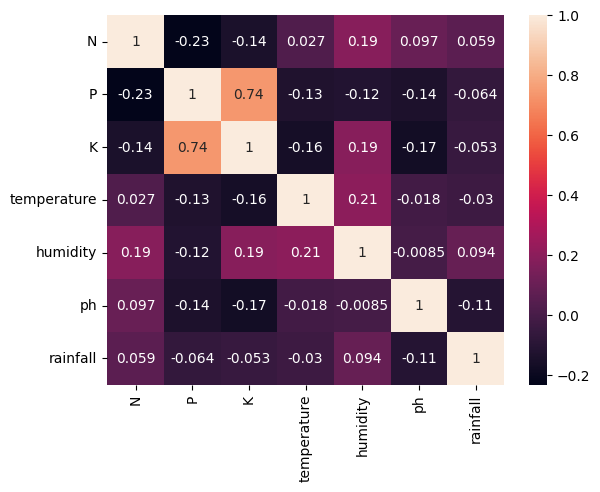

In [18]:
# Gráfico de correlação entre as variáveis
import seaborn as sns
sns.heatmap(crop_recomendation.iloc[:,:-1].corr(),annot=True)


#### OBS.
#### Para o treinamento do modelo, desejamos que ele não possua viés devido ao desbalanceamento das classe durante a separação da base de dados em treino e teste. Dessa forma, devemos garantir que as classes possuam o mesmo número de observações nas bases de treino e teste.

## Para resolver esse problema, podemos usar o parâmetro strtify da função train_test_split da biblioteca sklearn.

* O stratify é usado para especificar a variável que contém as classes (os rótulos) para garantir a divisão estratificada. Ao passar a variável de classes como argumento para stratify, o train_test_split preserva a mesma proporção dessa variável nas partições de treino e teste. Isso significa que a porcentagem de amostras de cada classe será mantida em ambas as partições.

In [19]:
from sklearn.model_selection import train_test_split

# Separando a variável dependente do resto do dataset
X = crop_recomendation.drop('label', axis=1)  # Recursos (características)
y = crop_recomendation['label']  # Classes (rótulos)
columns = list(X.columns)

## Padronizando os dados das variaveis independentes
## Como temos dados com valores em escalas numericas diferentes, para evitarmos o efeito da escala da variável influenciar no modelo realizamos a Normalização dos dados
## Pra a Normalização foi utilizado o método de standar scaler que normaliza os dados a partir da média e o desvio padrão dos dados.
scaler = preprocessing.StandardScaler()
X_df = scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=columns)


# Dividindo o dataset em dados de treino (70%) e teste (30%), mantendo a proporção das classes
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, stratify=y, random_state=42)

# Para o treinamento do modelo, desejamos que ele não possua viés devido ao desbalanceamento das classe durante a separação da base de dados em treino e teste. Dessa forma, devemos garantir que as classes possuam o mesmo número de observações nas bases de treino e teste.

## Para resolver esse problema, podemos usar o parâmetro strtify da função train_test_split da biblioteca sklearn.


# Verificando a proporção das classes nos dados de treino
train_class_counts = y_train.value_counts(normalize=True)
print("Proporção das classes nos dados de treino:")
print(train_class_counts)

# Verificando a proporção das classes nos dados de teste
test_class_counts = y_test.value_counts(normalize=True)
print("\nProporção das classes nos dados de teste:")
print(test_class_counts)

Proporção das classes nos dados de treino:
label
lentil         0.045455
banana         0.045455
kidneybeans    0.045455
orange         0.045455
mango          0.045455
watermelon     0.045455
mungbean       0.045455
jute           0.045455
coconut        0.045455
rice           0.045455
blackgram      0.045455
papaya         0.045455
coffee         0.045455
pomegranate    0.045455
mothbeans      0.045455
cotton         0.045455
muskmelon      0.045455
maize          0.045455
apple          0.045455
grapes         0.045455
chickpea       0.045455
pigeonpeas     0.045455
Name: proportion, dtype: float64

Proporção das classes nos dados de teste:
label
kidneybeans    0.045455
mothbeans      0.045455
blackgram      0.045455
jute           0.045455
papaya         0.045455
mango          0.045455
coffee         0.045455
maize          0.045455
rice           0.045455
coconut        0.045455
orange         0.045455
banana         0.045455
lentil         0.045455
chickpea       0.045455
cotto

In [20]:
X_train.head()

N         P         K  temperature  humidity        ph  rainfall
864  -1.342542  0.413522 -0.536157     0.376311 -0.491726  0.106102 -1.008242
1090  1.800327  0.868365 -0.062190    -0.063669  0.350848 -1.105002  0.035642
304  -1.315449  0.231584 -0.555906    -0.686702 -2.177088 -0.664111 -0.488160
391  -0.285888  0.747073 -0.555906    -1.270201 -2.275410 -1.034225 -0.424249
1686 -1.179980 -1.011654 -0.713895    -1.793870  1.046142  0.007490  0.119775

In [21]:
y_train.head()

864          lentil
1090         banana
304     kidneybeans
391     kidneybeans
1686         orange
Name: label, dtype: object

## **III. Criação e configuração do modelo**

In [216]:
## Cria uma lista que irá receber os valores de Accuracy dos modelos para a base de treino
acc_treino = []

## Cria uma lista que recebe o nome do modelo
model_treino = []

I- Regressão Logistica

In [217]:
from sklearn.linear_model import LogisticRegression

In [218]:
%%time
# Criando o modelo de Regressão Logística
logreg_clf = LogisticRegression(random_state=42)
logreg_clf.fit(X_train, y_train)

CPU times: total: 31.2 ms
Wall time: 33.1 ms


LogisticRegression(random_state=42)

In [219]:
# Predizendo os valores do modelo Regressão logistica e adicionando na liesta acc_treino
predicted_values = logreg_clf.predict(X_train)
x = metrics.accuracy_score(y_train, predicted_values)
acc_treino.append(x)
model_treino.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_train,predicted_values))

Logistic Regression's Accuracy is:  0.9746753246753247
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        70
      banana       1.00      1.00      1.00        70
   blackgram       0.93      0.94      0.94        70
    chickpea       1.00      1.00      1.00        70
     coconut       0.99      1.00      0.99        70
      coffee       0.99      1.00      0.99        70
      cotton       1.00      1.00      1.00        70
      grapes       1.00      1.00      1.00        70
        jute       0.86      0.91      0.89        70
 kidneybeans       0.96      0.99      0.97        70
      lentil       0.94      0.96      0.95        70
       maize       1.00      1.00      1.00        70
       mango       0.99      1.00      0.99        70
   mothbeans       0.98      0.93      0.96        70
    mungbean       0.99      1.00      0.99        70
   muskmelon       1.00      1.00      1.00        70
      orange       1.00   

II- SVM

In [220]:
from sklearn.svm import SVC

In [261]:
%%time
# Configurando o modelo do SVM
svm_clf = SVC(random_state=42, C=15, kernel='poly')
svm_clf.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 11.9 ms


SVC(C=15, kernel='poly', random_state=42)

In [222]:
# Predizendo os valores do modelo SVM e adicionando na liesta acc_treino
predicted_values = svm_clf.predict(X_train)
x = metrics.accuracy_score(y_train, predicted_values)
acc_treino.append(x)
model_treino.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_train,predicted_values))

SVM's Accuracy is:  0.9883116883116884
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        70
      banana       1.00      1.00      1.00        70
   blackgram       0.99      1.00      0.99        70
    chickpea       1.00      1.00      1.00        70
     coconut       1.00      1.00      1.00        70
      coffee       1.00      0.99      0.99        70
      cotton       1.00      1.00      1.00        70
      grapes       1.00      1.00      1.00        70
        jute       0.89      0.94      0.92        70
 kidneybeans       1.00      1.00      1.00        70
      lentil       1.00      0.99      0.99        70
       maize       0.93      1.00      0.97        70
       mango       1.00      0.99      0.99        70
   mothbeans       1.00      1.00      1.00        70
    mungbean       1.00      1.00      1.00        70
   muskmelon       1.00      1.00      1.00        70
      orange       1.00      1.00      1.0

III- KNN

In [223]:
from sklearn.neighbors import KNeighborsClassifier

In [224]:
%%time
#Configurando o modelo do KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can set the desired number of neighbors

# Step 2: Start MLflow run and train the KNN model
knn_clf.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 3 ms


KNeighborsClassifier()

In [225]:
# Predizendo os valores do modelo KNN e adicionando na liesta acc_treino
predicted_values = knn_clf.predict(X_train)
x = metrics.accuracy_score(y_train, predicted_values)
acc_treino.append(x)
model_treino.append('KNN')
print("KNN's Accuracy is: ", x)

print(classification_report(y_train,predicted_values))

KNN's Accuracy is:  0.9818181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        70
      banana       1.00      1.00      1.00        70
   blackgram       0.92      0.99      0.95        70
    chickpea       1.00      1.00      1.00        70
     coconut       1.00      1.00      1.00        70
      coffee       1.00      0.99      0.99        70
      cotton       0.97      1.00      0.99        70
      grapes       1.00      1.00      1.00        70
        jute       0.87      0.99      0.93        70
 kidneybeans       0.99      1.00      0.99        70
      lentil       0.93      0.96      0.94        70
       maize       1.00      0.97      0.99        70
       mango       1.00      1.00      1.00        70
   mothbeans       1.00      0.91      0.96        70
    mungbean       1.00      1.00      1.00        70
   muskmelon       1.00      1.00      1.00        70
      orange       1.00      0.96      0.9

IV-  Decision Tree

In [226]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [227]:
%%time
# Configurando o modelo da Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42,
                                  max_depth=5
                                  )

tree_clf.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 6.54 ms


DecisionTreeClassifier(max_depth=5, random_state=42)

In [228]:
# Visualizando a árvore
print(tree.export_text(tree_clf))

|--- feature_6 <= -1.33
|   |--- class: muskmelon
|--- feature_6 >  -1.33
|   |--- feature_4 <= -1.95
|   |   |--- feature_2 <= 0.04
|   |   |   |--- class: kidneybeans
|   |   |--- feature_2 >  0.04
|   |   |   |--- class: chickpea
|   |--- feature_4 >  -1.95
|   |   |--- feature_1 <= 1.64
|   |   |   |--- feature_4 <= 0.07
|   |   |   |   |--- feature_0 <= 0.24
|   |   |   |   |   |--- class: blackgram
|   |   |   |   |--- feature_0 >  0.24
|   |   |   |   |   |--- class: coffee
|   |   |   |--- feature_4 >  0.07
|   |   |   |   |--- feature_1 <= 0.49
|   |   |   |   |   |--- class: coconut
|   |   |   |   |--- feature_1 >  0.49
|   |   |   |   |   |--- class: banana
|   |   |--- feature_1 >  1.64
|   |   |   |--- feature_6 <= -0.29
|   |   |   |   |--- class: grapes
|   |   |   |--- feature_6 >  -0.29
|   |   |   |   |--- class: apple



In [229]:
classes= crop_recomendation['label'].unique().tolist()
classes

['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

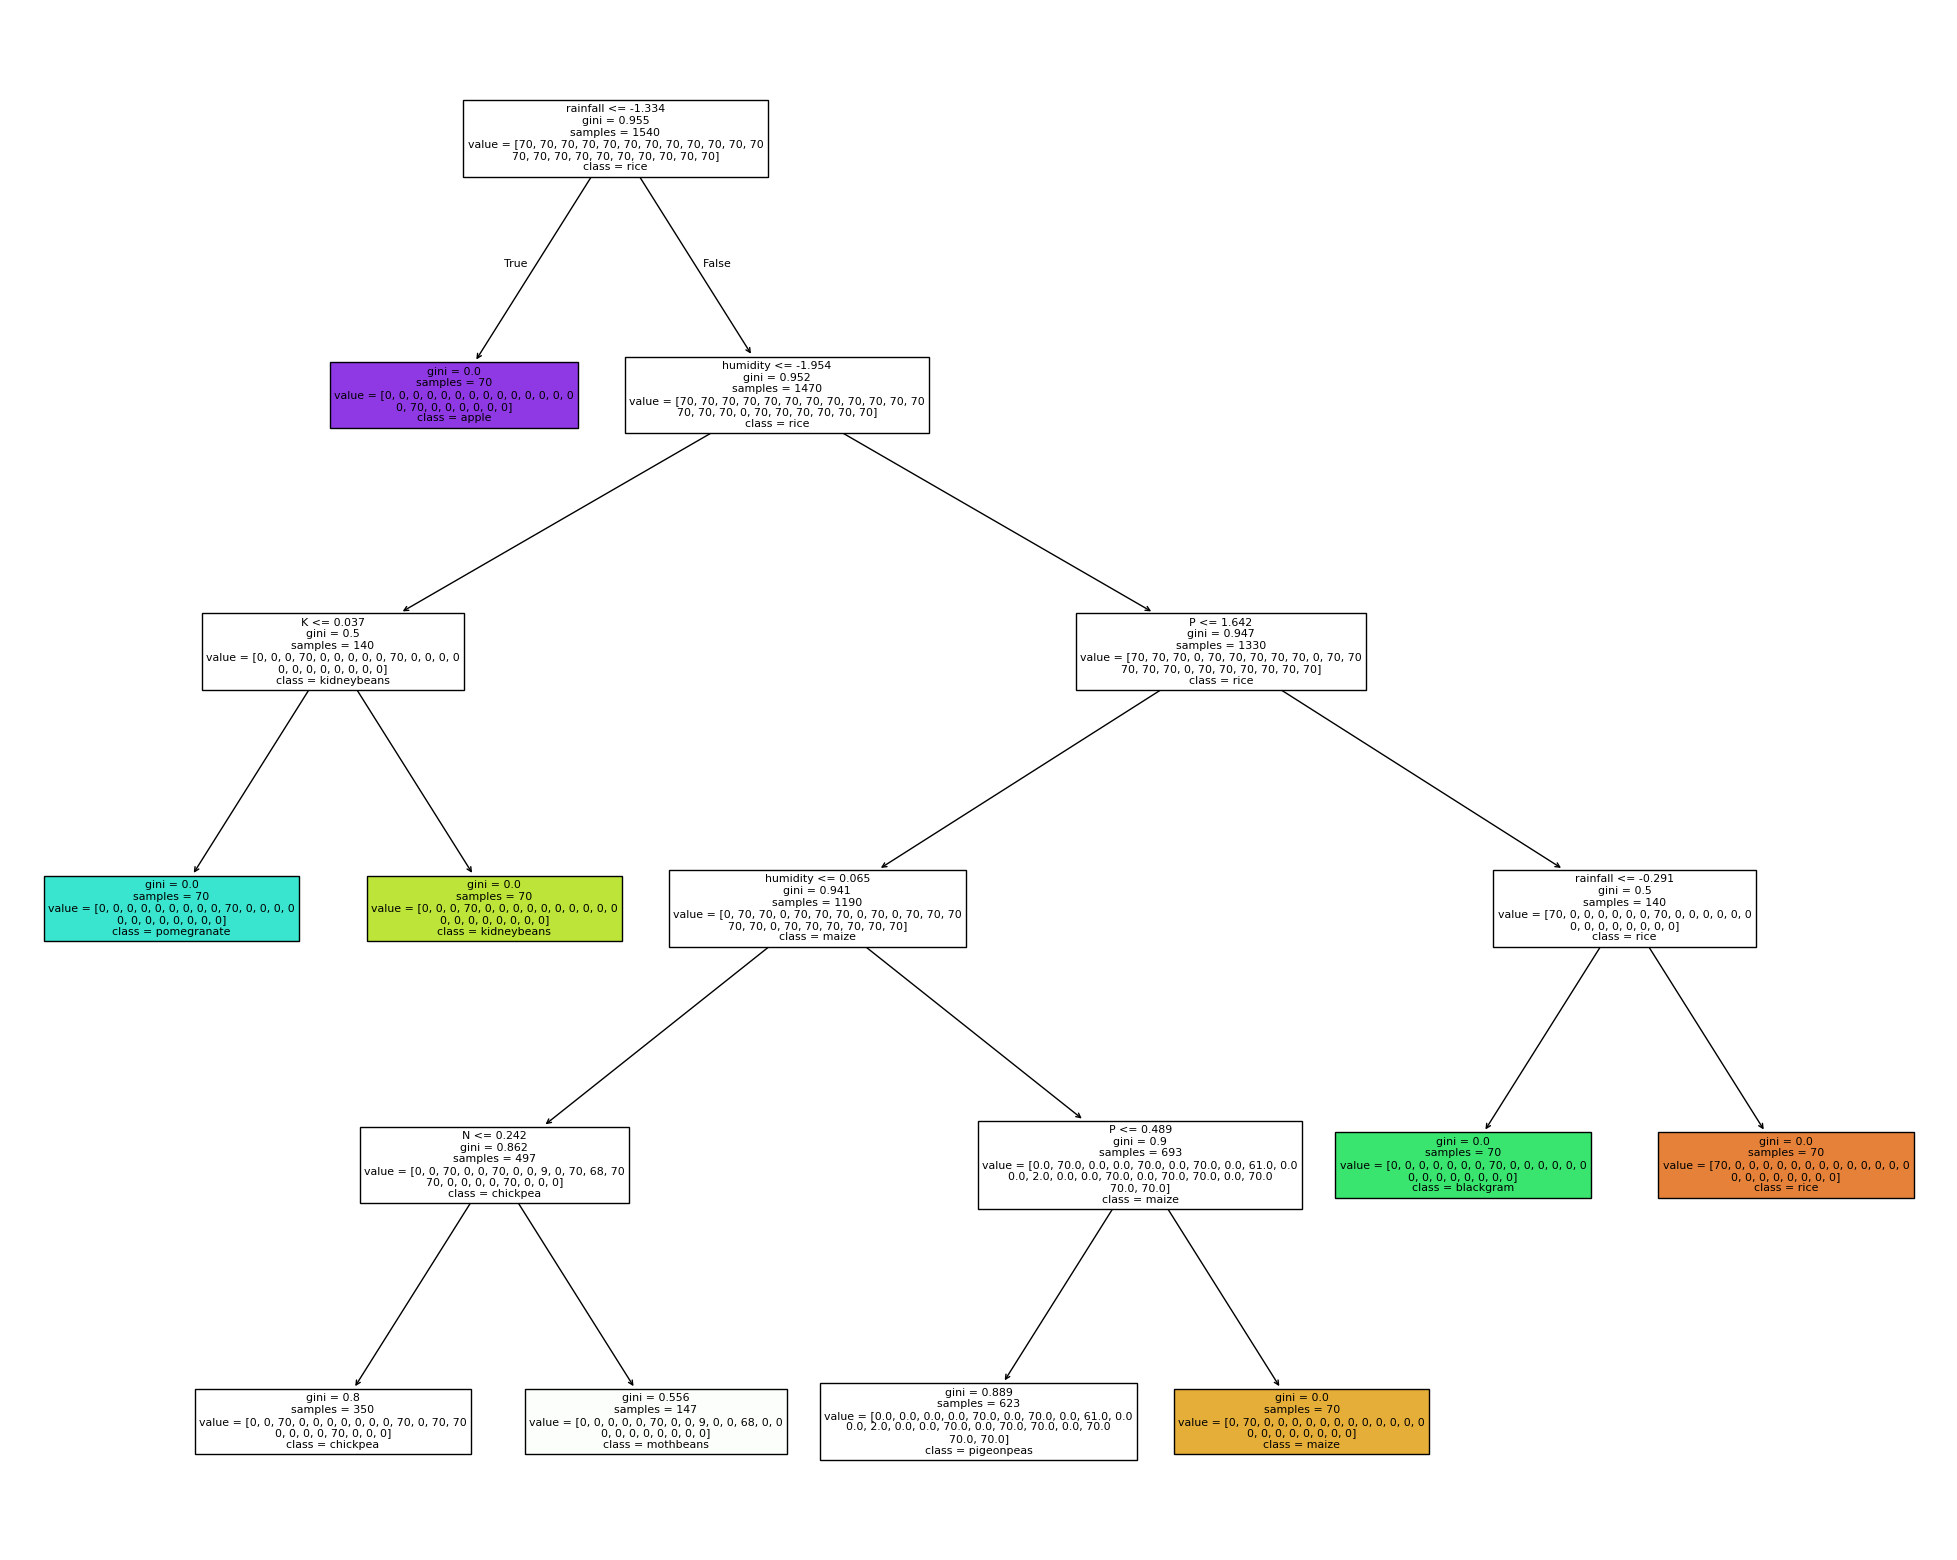

In [230]:
# Visualizando a árvore
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf,
                   feature_names= crop_recomendation.columns.tolist()[:-1],
                   class_names= classes,
                   filled=True)

In [231]:
%%time
# Configurando o modelo da Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42
                                  )

tree_clf.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 8.94 ms


DecisionTreeClassifier(random_state=42)

In [232]:
# Predizendo os valores do modelo Decision Tree e adicionando na liesta acc_treino
predicted_values = tree_clf.predict(X_train)
x = metrics.accuracy_score(y_train, predicted_values)
acc_treino.append(x)
model_treino.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x)

print(classification_report(y_train,predicted_values))

Decision Tree's Accuracy is:  1.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        70
      banana       1.00      1.00      1.00        70
   blackgram       1.00      1.00      1.00        70
    chickpea       1.00      1.00      1.00        70
     coconut       1.00      1.00      1.00        70
      coffee       1.00      1.00      1.00        70
      cotton       1.00      1.00      1.00        70
      grapes       1.00      1.00      1.00        70
        jute       1.00      1.00      1.00        70
 kidneybeans       1.00      1.00      1.00        70
      lentil       1.00      1.00      1.00        70
       maize       1.00      1.00      1.00        70
       mango       1.00      1.00      1.00        70
   mothbeans       1.00      1.00      1.00        70
    mungbean       1.00      1.00      1.00        70
   muskmelon       1.00      1.00      1.00        70
      orange       1.00      1.00      1.00    

V- Random Forest

In [233]:
from sklearn.ensemble import RandomForestClassifier

In [234]:
%%time
#criando o modelo do Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

CPU times: total: 172 ms
Wall time: 203 ms


RandomForestClassifier(random_state=42)

In [235]:
# Predizendo os valores do modelo Random Forest e adicionando na liesta acc_treino
predicted_values = rf_clf.predict(X_train)
x = metrics.accuracy_score(y_train, predicted_values)
acc_treino.append(x)
model_treino.append('Random Forest')
print("Random Forest's Accuracy is: ", x)

print(classification_report(y_train,predicted_values))

Random Forest's Accuracy is:  1.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        70
      banana       1.00      1.00      1.00        70
   blackgram       1.00      1.00      1.00        70
    chickpea       1.00      1.00      1.00        70
     coconut       1.00      1.00      1.00        70
      coffee       1.00      1.00      1.00        70
      cotton       1.00      1.00      1.00        70
      grapes       1.00      1.00      1.00        70
        jute       1.00      1.00      1.00        70
 kidneybeans       1.00      1.00      1.00        70
      lentil       1.00      1.00      1.00        70
       maize       1.00      1.00      1.00        70
       mango       1.00      1.00      1.00        70
   mothbeans       1.00      1.00      1.00        70
    mungbean       1.00      1.00      1.00        70
   muskmelon       1.00      1.00      1.00        70
      orange       1.00      1.00      1.00    

VI- Votting

In [236]:
# Importando as bibliotecas do modelo de votting
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [237]:
%%time
# Configurando o modelo Voting utilizando 3 modelos
  # * Regressão Logística
  # * Random Forest
  # * SVM

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, C=15, kernel='poly')

voting_clf = VotingClassifier(estimators= [('RegressaoLogistica',log_clf),
                                       ('Random Forest', rnd_clf),
                                       ('SuportVectorMachines', svm_clf)],
                          voting= 'hard')

voting_clf.fit(X_train, y_train)

CPU times: total: 234 ms
Wall time: 240 ms


VotingClassifier(estimators=[('RegressaoLogistica',
                              LogisticRegression(random_state=42)),
                             ('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('SuportVectorMachines',
                              SVC(C=15, kernel='poly', random_state=42))])

In [238]:
# Predizendo os valores do modelo Voting e adicionando na liesta acc_treino
predicted_values = voting_clf.predict(X_train)
x = metrics.accuracy_score(y_train, predicted_values)
acc_treino.append(x)
model_treino.append('Voting')
print("Voting's Accuracy is: ", x)

print(classification_report(y_train,predicted_values))

Voting's Accuracy is:  0.9922077922077922
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        70
      banana       1.00      1.00      1.00        70
   blackgram       0.99      1.00      0.99        70
    chickpea       1.00      1.00      1.00        70
     coconut       1.00      1.00      1.00        70
      coffee       1.00      1.00      1.00        70
      cotton       1.00      1.00      1.00        70
      grapes       1.00      1.00      1.00        70
        jute       0.90      0.94      0.92        70
 kidneybeans       1.00      1.00      1.00        70
      lentil       1.00      0.99      0.99        70
       maize       1.00      1.00      1.00        70
       mango       1.00      1.00      1.00        70
   mothbeans       1.00      1.00      1.00        70
    mungbean       1.00      1.00      1.00        70
   muskmelon       1.00      1.00      1.00        70
      orange       1.00      1.00      

VII- Bagging

In [239]:
from sklearn.ensemble import BaggingClassifier

VII.i- Bagging SVM

In [240]:
%%time
# Carregando o modelo BaggingClassifier com estimador da SVM
bagging_SVM_clf =BaggingClassifier(estimator=SVC(random_state=42),
                           n_estimators= 50,
                           max_samples= 200,
                           bootstrap= True,
                           n_jobs = -1)

bagging_SVM_clf.fit(X_train, y_train)


CPU times: total: 46.9 ms
Wall time: 197 ms


BaggingClassifier(estimator=SVC(random_state=42), max_samples=200,
                  n_estimators=50, n_jobs=-1)

In [241]:
# Predizendo os valores do modelo BaggingClassifier  com estimador da SVM e adicionando na liesta acc_treino
predicted_values = bagging_SVM_clf.predict(X_train)
x = metrics.accuracy_score(y_train, predicted_values)
acc_treino.append(x)
model_treino.append('Bagging_SVM')
print("Bagging_SVM's Accuracy is: ", x)

print(classification_report(y_train,predicted_values))

Bagging_SVM's Accuracy is:  0.9512987012987013
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        70
      banana       1.00      1.00      1.00        70
   blackgram       0.82      0.96      0.88        70
    chickpea       1.00      1.00      1.00        70
     coconut       0.99      1.00      0.99        70
      coffee       1.00      1.00      1.00        70
      cotton       0.99      1.00      0.99        70
      grapes       1.00      1.00      1.00        70
        jute       0.74      1.00      0.85        70
 kidneybeans       0.96      1.00      0.98        70
      lentil       0.88      0.90      0.89        70
       maize       1.00      0.99      0.99        70
       mango       0.97      1.00      0.99        70
   mothbeans       1.00      0.81      0.90        70
    mungbean       0.92      1.00      0.96        70
   muskmelon       1.00      1.00      1.00        70
      orange       1.00      0.81 

VII.ii- Bagging Decision Tree




In [242]:
# Carregando o modelo BaggingClassifier com estimador da arvore de decisão
bagging_DecisionTree_clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                           n_estimators= 50,
                           max_samples= 200,
                           bootstrap= True,
                           n_jobs = -1)

bagging_DecisionTree_clf.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=200, n_estimators=50, n_jobs=-1)

In [243]:
# Predizendo os valores do modelo  BaggingClassifier com estimador da arvore de decisão e adicionando na liesta acc_treino
predicted_values = bagging_DecisionTree_clf.predict(X_train)
x = metrics.accuracy_score(y_train, predicted_values)
acc_treino.append(x)
model_treino.append('Bagging_DecisionTree')
print("Bagging_DecisionTree's Accuracy is: ", x)

print(classification_report(y_train,predicted_values))

Bagging_DecisionTree's Accuracy is:  0.9902597402597403
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        70
      banana       1.00      1.00      1.00        70
   blackgram       0.99      0.99      0.99        70
    chickpea       1.00      1.00      1.00        70
     coconut       1.00      1.00      1.00        70
      coffee       1.00      1.00      1.00        70
      cotton       0.99      1.00      0.99        70
      grapes       1.00      1.00      1.00        70
        jute       0.88      1.00      0.93        70
 kidneybeans       1.00      1.00      1.00        70
      lentil       0.99      0.99      0.99        70
       maize       0.99      0.99      0.99        70
       mango       1.00      1.00      1.00        70
   mothbeans       0.99      0.97      0.98        70
    mungbean       1.00      1.00      1.00        70
   muskmelon       1.00      1.00      1.00        70
      orange       1.00  

VIII - Boosting

VIII.i- ADABoost

In [244]:
from sklearn.ensemble import AdaBoostClassifier

In [245]:
%%time
# Carregando o modelo do AdaBoostClassifier com o estimador da Decision Tree
ada_clf= AdaBoostClassifier(estimator= DecisionTreeClassifier(random_state=42, max_depth= 10),
                            n_estimators= 300,
                            learning_rate= 0.01)


ada_clf.fit(X_train, y_train)

C:\Users\Pichau\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CPU times: total: 125 ms
Wall time: 205 ms


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                    random_state=42),
                   learning_rate=0.01, n_estimators=300)

In [246]:
# Predizendo os valores do modelo  AdaBoostClassifier com o estimador da Decision Tree e adicionando na liesta acc_treino
predicted_values = ada_clf.predict(X_train)
x = metrics.accuracy_score(y_train, predicted_values)
acc_treino.append(x)
model_treino.append('ADABOOSTING')
print("ADABOOSTING's Accuracy is: ", x)

print(classification_report(y_train,predicted_values))

ADABOOSTING's Accuracy is:  1.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        70
      banana       1.00      1.00      1.00        70
   blackgram       1.00      1.00      1.00        70
    chickpea       1.00      1.00      1.00        70
     coconut       1.00      1.00      1.00        70
      coffee       1.00      1.00      1.00        70
      cotton       1.00      1.00      1.00        70
      grapes       1.00      1.00      1.00        70
        jute       1.00      1.00      1.00        70
 kidneybeans       1.00      1.00      1.00        70
      lentil       1.00      1.00      1.00        70
       maize       1.00      1.00      1.00        70
       mango       1.00      1.00      1.00        70
   mothbeans       1.00      1.00      1.00        70
    mungbean       1.00      1.00      1.00        70
   muskmelon       1.00      1.00      1.00        70
      orange       1.00      1.00      1.00      

VIII.ii- GradientBoost

In [247]:
from sklearn.ensemble import GradientBoostingClassifier

In [248]:
%%time
#carregando o modelo do GradientBoostingClassifier
gdb_clf = GradientBoostingClassifier(max_depth=10,n_estimators= 300, learning_rate=0.001)

gdb_clf.fit(X_train, y_train)

CPU times: total: 22.2 s
Wall time: 23.5 s


GradientBoostingClassifier(learning_rate=0.001, max_depth=10, n_estimators=300)

In [249]:
# Predizendo os valores do modelo  GradientBoostingClassifier e adicionando na liesta acc_treino
predicted_values = gdb_clf.predict(X_train)
x = metrics.accuracy_score(y_train, predicted_values)
acc_treino.append(x)
model_treino.append('GRADIENTBOOSTING')
print("GRADIENTBOOSTING's Accuracy is: ", x)

print(classification_report(y_train,predicted_values))

GRADIENTBOOSTING's Accuracy is:  1.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        70
      banana       1.00      1.00      1.00        70
   blackgram       1.00      1.00      1.00        70
    chickpea       1.00      1.00      1.00        70
     coconut       1.00      1.00      1.00        70
      coffee       1.00      1.00      1.00        70
      cotton       1.00      1.00      1.00        70
      grapes       1.00      1.00      1.00        70
        jute       1.00      1.00      1.00        70
 kidneybeans       1.00      1.00      1.00        70
      lentil       1.00      1.00      1.00        70
       maize       1.00      1.00      1.00        70
       mango       1.00      1.00      1.00        70
   mothbeans       1.00      1.00      1.00        70
    mungbean       1.00      1.00      1.00        70
   muskmelon       1.00      1.00      1.00        70
      orange       1.00      1.00      1.00 

VIII.iii- XGBoost

In [250]:
# Importando o XGBOOST e adicionando o XGBOOST no mlflow
from xgboost import XGBClassifier

In [251]:
from sklearn.preprocessing import LabelEncoder

#transformar as labels do modelo no formato num para entrada do Xgboost
# Criar o codificador de rótulos
label_encoder = LabelEncoder()

# Codificar as classes para valores numéricos inteiros
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded =label_encoder.fit_transform(y_test)

print(y_train_encoded)
print(y_test_encoded)

[10  1  9 ...  9  9  9]
[ 9 13  2  8  8  9 17 12  5 11 20 17  4 16 12  1 10  3  2  6 12 15  1  9
 18 17  8 12  9  7 13  8 14 19 13 20  9  6  2  7 13  0  4 21  6  9 11  3
 16  6 12  9 15 10  0  1  0 11  1  4 10  3  1 18  4 20 18 17  5 20 16 21
  5  1  3  8 15 18 11  2  7  6  7 16  3  2 18 20  5  4 10 21  7  7  1  7
  0 19 14 17  8  1  5 15 18  3  7 21 19 17 16 13 19  7  8 21 12 20  6 13
 14 18 16  7 15 12  4  6 13  3 19 19 16  9  9 20 14 21 18  0 11 12 16  5
 17  5  8  7 12 16  8  9 15 19  9 10 10 17 19  9 11 10  2  4 16 15  5  9
 10 21 20  3  7 13  0 21 21 18 14  8  5 17 11  8  8  1 13  3 11  4  2 18
  5 17 12 21 15 15 21 15  0  2 16 13 21 19  4 20 15 11  9 15 14  0 11 12
  9 19 13  0  7 21  4  6 14 10 10  6 18 11  7 21 14 14 18 18 20 11 19  2
  1 12  3  3 18 12 17  1 19  3  4  4  4  0 14  2  1 11 21 16 21 19 12  2
 15 11  0 15  0  5  3  4 16  9  2  6 13  7  0 15 12 19 16 13 20  8  2  1
  4 11  3 20  2  6  6 13  5 14 19  2 16 20  8  2 16  2 17  8 10  4  5  0
  6  3 13 20  6  2  2  9  1

In [252]:
%%time
#carregando o modelo do XGBClassifier
xgb_clf = XGBClassifier(max_depth=10,n_estimators= 300, learning_rate=0.001)
xgb_clf.fit(X_train, y_train_encoded)

CPU times: total: 15.8 s
Wall time: 1.18 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [253]:
xgb = xgb_clf.fit(X_train, y_train_encoded)
print(xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [254]:
# Predizendo os valores do modelo Random Forest e adicionando na liesta acc_treino
predicted_values = xgb_clf.predict(X_train)
x = metrics.accuracy_score(y_train_encoded, predicted_values)
acc_treino.append(x)
model_treino.append('XGBOOST')
print("Random Forest's Accuracy is: ", x)

print(classification_report(y_train_encoded,predicted_values))

Random Forest's Accuracy is:  0.9961038961038962
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        70
           2       0.99      1.00      0.99        70
           3       1.00      1.00      1.00        70
           4       1.00      0.99      0.99        70
           5       1.00      1.00      1.00        70
           6       0.99      1.00      0.99        70
           7       1.00      1.00      1.00        70
           8       1.00      0.99      0.99        70
           9       1.00      1.00      1.00        70
          10       0.99      0.99      0.99        70
          11       1.00      0.99      0.99        70
          12       1.00      1.00      1.00        70
          13       0.99      0.97      0.98        70
          14       1.00      1.00      1.00        70
          15       1.00      1.00      1.00        70
          16       1.00      1.0

## **IV Apresentação dos resultados**

In [255]:
# Criando a lista que receberá o valor de Accuracy do modelo do dataset de teste
acc_teste = []

# Criando a lista que receberá o  nome do modelo
model_teste = []

# Copiando os labels da base y_test e colocando em um dataframe para comparar com os resultados obtidos pelos modelos
y_t = y_test.copy()
df_predict = pd.DataFrame(y_t)
df_predict = df_predict.rename(columns={'label': 'Real'})

In [256]:
# Cria uma lista com o nome das classes da variável label
classes= crop_recomendation['label'].unique().tolist()
classes

['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

I - Regressão Logística

In [257]:
# Predizendo os valores do modelo  Regressão Logística e adicionando os valores de Accuracy na liesta acc_teste
predicted_values = logreg_clf.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc_teste.append(x)
model_teste.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.9727272727272728
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       0.94      1.00      0.97        30
    chickpea       1.00      1.00      1.00        30
     coconut       0.97      1.00      0.98        30
      coffee       1.00      1.00      1.00        30
      cotton       0.97      0.97      0.97        30
      grapes       1.00      1.00      1.00        30
        jute       0.85      0.97      0.91        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.96      0.83      0.89        30
       maize       0.97      0.97      0.97        30
       mango       0.97      1.00      0.98        30
   mothbeans       0.87      0.90      0.89        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00   

In [258]:
#Adicionando as classes preditas pelo modelo Regressão Logística no dataframe df_predict
df_predict['Logistic Regression'] = predicted_values
df_predict.head()

Real Logistic Regression
381   kidneybeans         kidneybeans
552     mothbeans           mothbeans
768     blackgram           blackgram
2081         jute                jute
2055         jute                jute

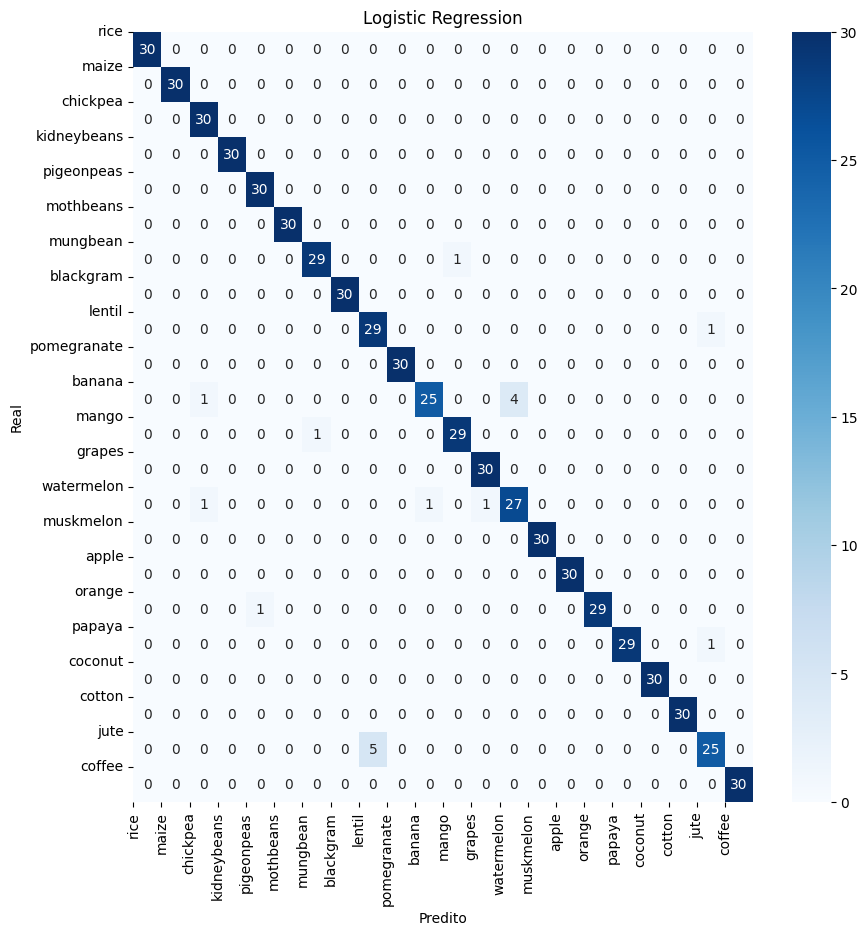

In [259]:
# Matriz de confusão
cm = confusion_matrix(y_test, predicted_values)

# Plot da matriz de confusão usando seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Logistic Regression')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes, rotation=0)
plt.show()

II- SVM

In [262]:
# Predizendo os valores do modelo SVM e adicionando os valores de Accuracy na liesta acc_teste
predicted_values = svm_clf.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc_teste.append(x)
model_teste.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.9833333333333333
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.97      0.97        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      0.97      0.98        30
      cotton       0.97      1.00      0.98        30
      grapes       1.00      1.00      1.00        30
        jute       0.91      1.00      0.95        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.93      0.93      0.93        30
       maize       0.91      0.97      0.94        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.97      0.93      0.95        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.0

In [263]:
#Adicionando as classes preditas pelo modelo SVM no dataframe df_predict
df_predict['SVM'] = predicted_values
df_predict.head()

Real Logistic Regression          SVM
381   kidneybeans         kidneybeans  kidneybeans
552     mothbeans           mothbeans    mothbeans
768     blackgram           blackgram    blackgram
2081         jute                jute         jute
2055         jute                jute         jute

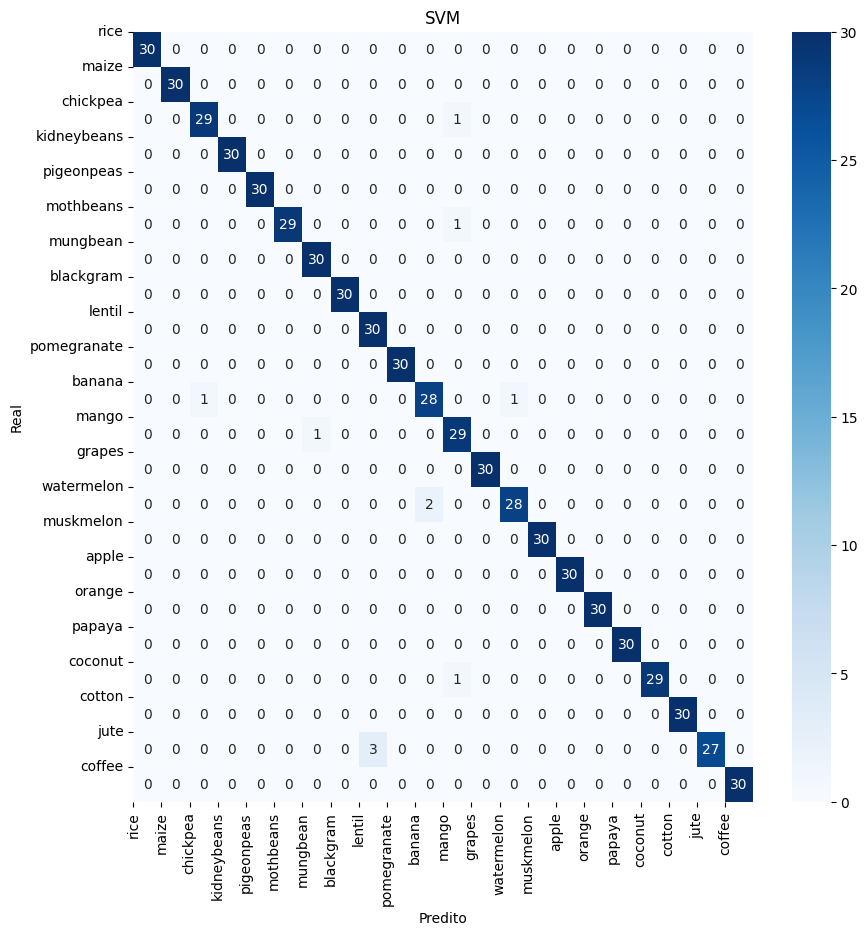

In [264]:
# Matriz de confusão
cm = confusion_matrix(y_test, predicted_values)

# Plot da matriz de confusão usando seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('SVM')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes, rotation=0)
plt.show()

III- KNN

In [265]:
# Predizendo os valores do modelo  KNN e adicionando os valores de Accuracy na liesta acc_teste
predicted_values = knn_clf.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc_teste.append(x)
model_teste.append('KNN')
print("KNN's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN's Accuracy is:  0.9787878787878788
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       0.97      1.00      0.98        30
    chickpea       1.00      1.00      1.00        30
     coconut       0.97      1.00      0.98        30
      coffee       1.00      1.00      1.00        30
      cotton       0.94      1.00      0.97        30
      grapes       1.00      1.00      1.00        30
        jute       0.91      1.00      0.95        30
 kidneybeans       0.94      1.00      0.97        30
      lentil       1.00      0.97      0.98        30
       maize       1.00      0.93      0.97        30
       mango       0.97      1.00      0.98        30
   mothbeans       0.97      0.97      0.97        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      0.87      0.9

In [266]:
#Adicionando as classes preditas pelo modelo KNN no dataframe df_predict
df_predict['KNN'] = predicted_values
df_predict.head()

Real Logistic Regression          SVM          KNN
381   kidneybeans         kidneybeans  kidneybeans  kidneybeans
552     mothbeans           mothbeans    mothbeans    mothbeans
768     blackgram           blackgram    blackgram    blackgram
2081         jute                jute         jute         jute
2055         jute                jute         jute         jute

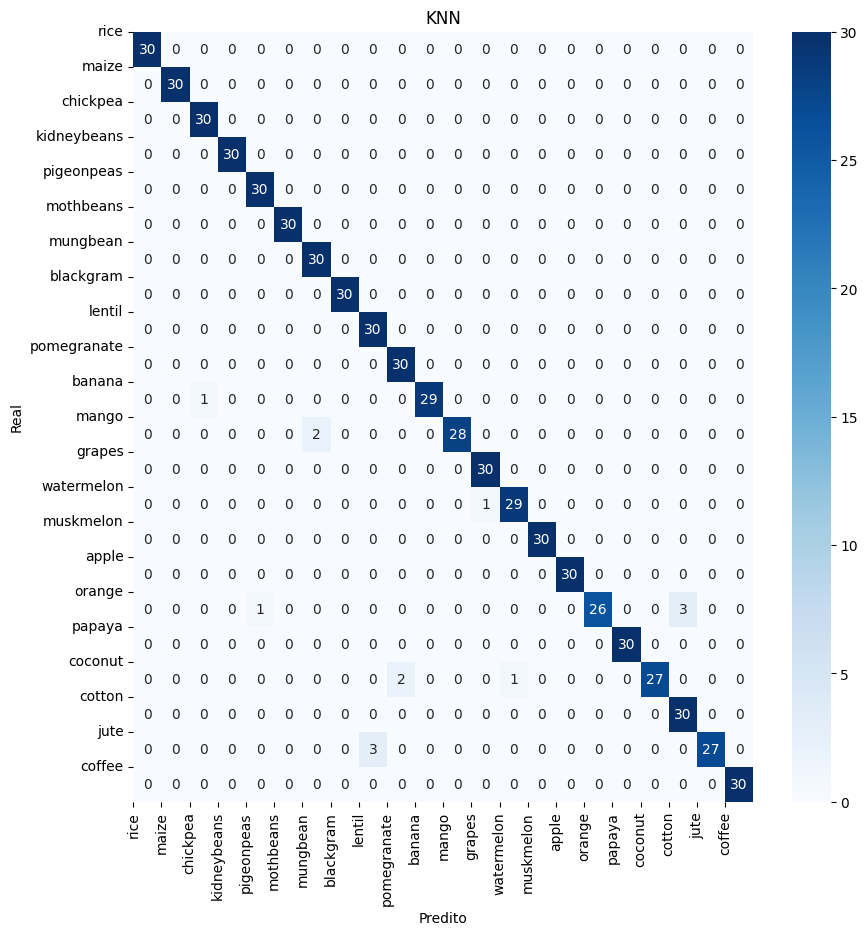

In [267]:
# Matriz de confusão
cm = confusion_matrix(y_test, predicted_values)

# Plot da matriz de confusão usando seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('KNN')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes, rotation=0)
plt.show()

IV - Decision Tree

In [268]:
# Predizendo os valores do modelo Decision Tree e adicionando os valores de Accuracy na liesta acc_teste
predicted_values = tree_clf.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc_teste.append(x)
model_teste.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  0.9787878787878788
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       0.94      1.00      0.97        30
   blackgram       0.97      0.97      0.97        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       1.00      0.97      0.98        30
      grapes       1.00      1.00      1.00        30
        jute       0.93      0.87      0.90        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.94      0.97      0.95        30
       maize       0.94      1.00      0.97        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.96      0.90      0.93        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.0

In [269]:
#Adicionando as classes preditas pelo modelo Decision Tree no dataframe df_predict
df_predict['Decision Tree'] = predicted_values
df_predict.head()

Real Logistic Regression          SVM          KNN Decision Tree
381   kidneybeans         kidneybeans  kidneybeans  kidneybeans   kidneybeans
552     mothbeans           mothbeans    mothbeans    mothbeans     mothbeans
768     blackgram           blackgram    blackgram    blackgram     blackgram
2081         jute                jute         jute         jute          jute
2055         jute                jute         jute         jute          jute

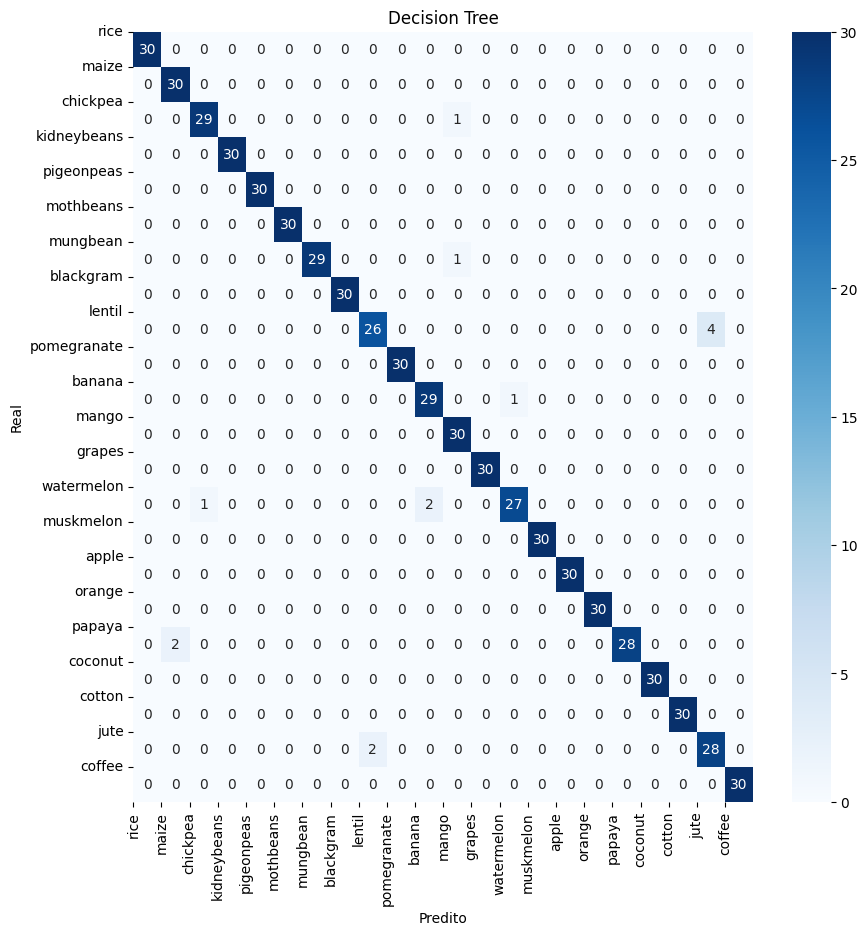

In [270]:
# Matriz de confusão
cm = confusion_matrix(y_test, predicted_values)

# Plot da matriz de confusão usando seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Decision Tree')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes, rotation=0)
plt.show()

V - Random Forest

In [271]:
# Predizendo os valores do modelo  Random Forest e adicionando os valores de Accuracy na liesta acc_teste
predicted_values = rf_clf.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc_teste.append(x)
model_teste.append('Random Forest')
print("Random Forest's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest's Accuracy is:  0.9939393939393939
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       1.00      0.97      0.98        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        30
        jute       0.94      1.00      0.97        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.97      0.98        30
       maize       0.97      1.00      0.98        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.97      1.00      0.98        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.0

In [272]:
#Adicionando as classes preditas pelo modelo Random Forest no dataframe df_predict
df_predict['Random Forest'] = predicted_values
df_predict.head()

Real Logistic Regression          SVM          KNN Decision Tree  \
381   kidneybeans         kidneybeans  kidneybeans  kidneybeans   kidneybeans   
552     mothbeans           mothbeans    mothbeans    mothbeans     mothbeans   
768     blackgram           blackgram    blackgram    blackgram     blackgram   
2081         jute                jute         jute         jute          jute   
2055         jute                jute         jute         jute          jute   

     Random Forest  
381    kidneybeans  
552      mothbeans  
768      blackgram  
2081          jute  
2055          jute

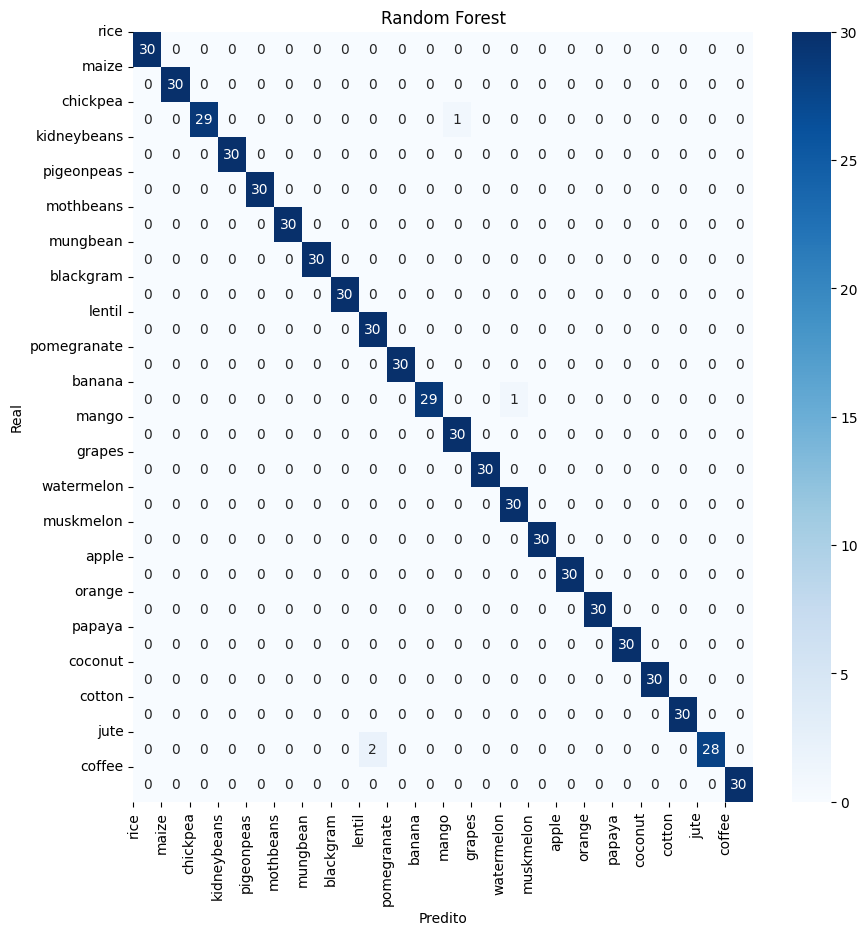

In [273]:
# Matriz de confusão
cm = confusion_matrix(y_test, predicted_values)

# Plot da matriz de confusão usando seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes, rotation=0)
plt.show()

VI- Voting

In [274]:
# Predizendo os valores do modelo  Voting e adicionando os valores de Accuracy na liesta acc_teste
predicted_values = voting_clf.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc_teste.append(x)
model_teste.append('Voting')
print("Voting's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Voting's Accuracy is:  0.9924242424242424
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        30
        jute       0.91      1.00      0.95        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.97      0.97      0.97        30
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.97      0.97      0.97        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      

In [275]:
#Adicionando as classes preditas pelo modelo Random Forest no dataframe df_predict
df_predict['Voting'] = predicted_values
df_predict.head()

Real Logistic Regression          SVM          KNN Decision Tree  \
381   kidneybeans         kidneybeans  kidneybeans  kidneybeans   kidneybeans   
552     mothbeans           mothbeans    mothbeans    mothbeans     mothbeans   
768     blackgram           blackgram    blackgram    blackgram     blackgram   
2081         jute                jute         jute         jute          jute   
2055         jute                jute         jute         jute          jute   

     Random Forest       Voting  
381    kidneybeans  kidneybeans  
552      mothbeans    mothbeans  
768      blackgram    blackgram  
2081          jute         jute  
2055          jute         jute

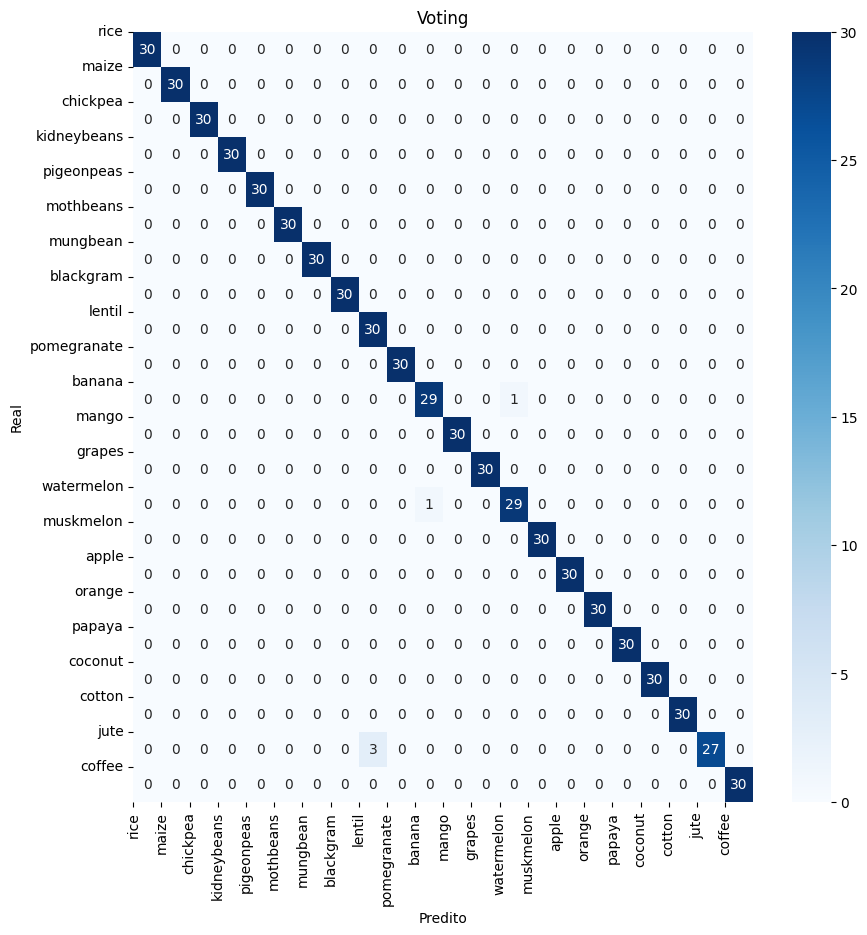

In [276]:
# Matriz de confusão
cm = confusion_matrix(y_test, predicted_values)

# Plot da matriz de confusão usando seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Voting')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes, rotation=0)
plt.show()

VII- Bagging

VII.i- Bagging SVM

In [277]:
# Predizendo os valores do modelo Bagging_SVM e adicionando os valores de Accuracy na liesta acc_teste
predicted_values = bagging_SVM_clf.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc_teste.append(x)
model_teste.append('Bagging_SVM')
print("Bagging_SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Bagging_SVM's Accuracy is:  0.95
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       0.81      1.00      0.90        30
    chickpea       1.00      1.00      1.00        30
     coconut       0.97      1.00      0.98        30
      coffee       1.00      1.00      1.00        30
      cotton       0.94      1.00      0.97        30
      grapes       1.00      1.00      1.00        30
        jute       0.81      1.00      0.90        30
 kidneybeans       0.94      1.00      0.97        30
      lentil       0.96      0.83      0.89        30
       maize       1.00      0.93      0.97        30
       mango       0.91      1.00      0.95        30
   mothbeans       1.00      0.87      0.93        30
    mungbean       0.94      1.00      0.97        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      0.73      0.85     

In [278]:
#Adicionando as classes preditas pelo modelo Bagging_SVM no dataframe df_predict
df_predict['Bagging_SVM'] = predicted_values
df_predict.head()

Real Logistic Regression          SVM          KNN Decision Tree  \
381   kidneybeans         kidneybeans  kidneybeans  kidneybeans   kidneybeans   
552     mothbeans           mothbeans    mothbeans    mothbeans     mothbeans   
768     blackgram           blackgram    blackgram    blackgram     blackgram   
2081         jute                jute         jute         jute          jute   
2055         jute                jute         jute         jute          jute   

     Random Forest       Voting  Bagging_SVM  
381    kidneybeans  kidneybeans  kidneybeans  
552      mothbeans    mothbeans    mothbeans  
768      blackgram    blackgram    blackgram  
2081          jute         jute         jute  
2055          jute         jute         jute

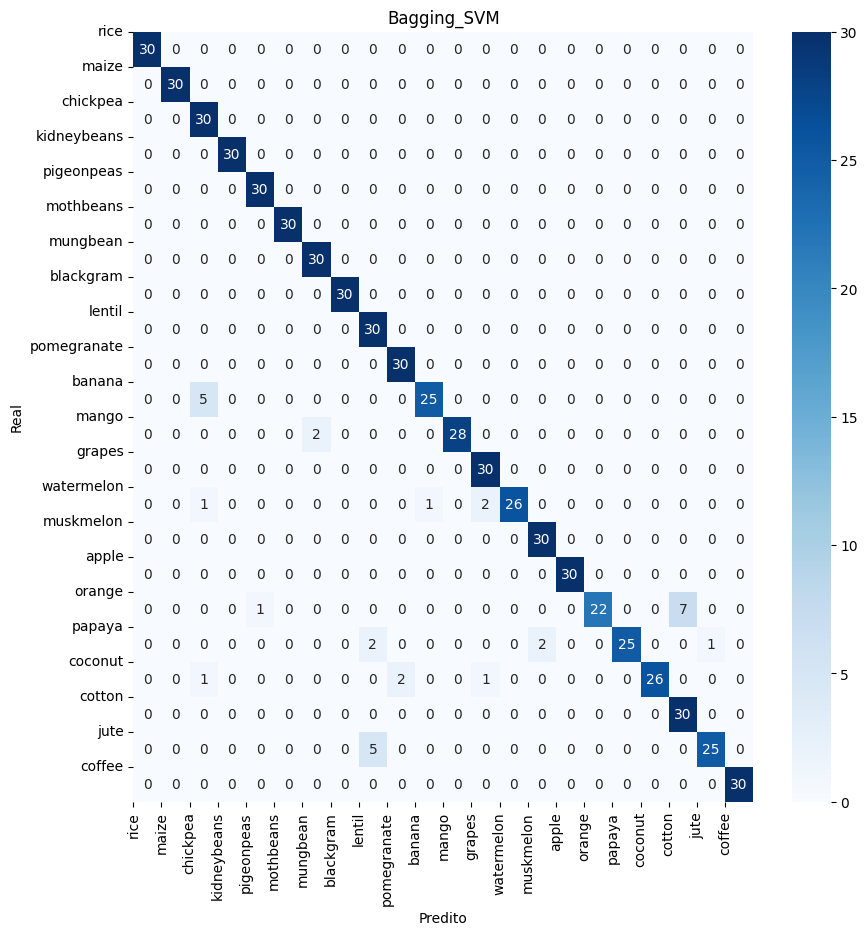

In [279]:
# Matriz de confusão
cm = confusion_matrix(y_test, predicted_values)

# Plot da matriz de confusão usando seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Bagging_SVM')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes, rotation=0)
plt.show()

VII.ii- Bagging Decision Tree




In [280]:
# Predizendo os valores do modelo Bagging_DecisionTree e adicionando os valores de Accuracy na liesta acc_teste
predicted_values = bagging_DecisionTree_clf.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc_teste.append(x)
model_teste.append('Bagging_DecisionTree')
print("Bagging_DecisionTree's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Bagging_DecisionTree's Accuracy is:  0.9893939393939394
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       1.00      0.90      0.95        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        30
        jute       0.91      1.00      0.95        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.97      0.98        30
       maize       0.91      1.00      0.95        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.97      1.00      0.98        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00  

In [281]:
#Adicionando as classes preditas pelo modelo Bagging_DecisionTree no dataframe df_predict
df_predict['Bagging_DecisionTree'] = predicted_values
df_predict.head()

Real Logistic Regression          SVM          KNN Decision Tree  \
381   kidneybeans         kidneybeans  kidneybeans  kidneybeans   kidneybeans   
552     mothbeans           mothbeans    mothbeans    mothbeans     mothbeans   
768     blackgram           blackgram    blackgram    blackgram     blackgram   
2081         jute                jute         jute         jute          jute   
2055         jute                jute         jute         jute          jute   

     Random Forest       Voting  Bagging_SVM Bagging_DecisionTree  
381    kidneybeans  kidneybeans  kidneybeans          kidneybeans  
552      mothbeans    mothbeans    mothbeans            mothbeans  
768      blackgram    blackgram    blackgram            blackgram  
2081          jute         jute         jute                 jute  
2055          jute         jute         jute                 jute

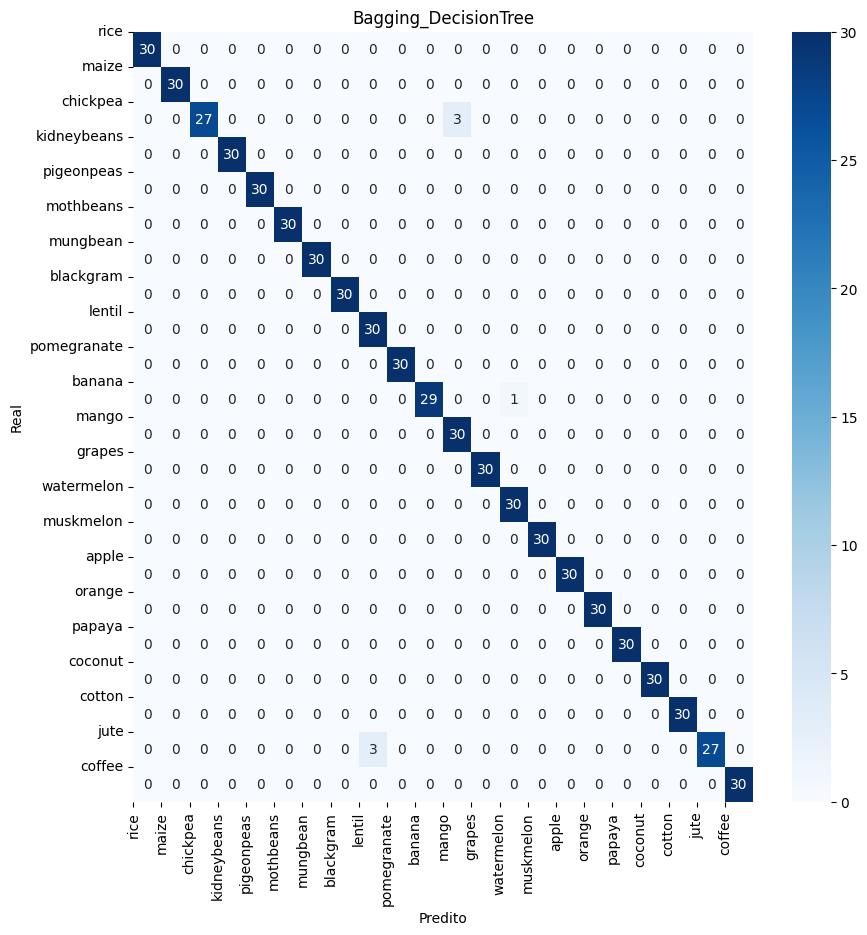

In [282]:
# Matriz de confusão
cm = confusion_matrix(y_test, predicted_values)

# Plot da matriz de confusão usando seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Bagging_DecisionTree')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes, rotation=0)
plt.show()

VIII- Boosting

VIII.i AdaBoosting

In [283]:
# Predizendo os valores do modelo ADABOOSTING' e adicionando os valores de Accuracy na liesta acc_teste
predicted_values = ada_clf.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc_teste.append(x)
model_teste.append('ADABOOSTING')
print("ADABOOSTING's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

ADABOOSTING's Accuracy is:  0.9757575757575757
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       0.94      1.00      0.97        30
   blackgram       1.00      0.90      0.95        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       1.00      0.97      0.98        30
      grapes       1.00      1.00      1.00        30
        jute       0.96      0.87      0.91        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.85      0.93      0.89        30
       maize       0.94      1.00      0.97        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.93      0.90      0.92        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00 

In [284]:
#Adicionando as classes preditas pelo modelo ADABOOSTING no dataframe df_predict
df_predict['ADABOOSTING'] = predicted_values
df_predict.head()

Real Logistic Regression          SVM          KNN Decision Tree  \
381   kidneybeans         kidneybeans  kidneybeans  kidneybeans   kidneybeans   
552     mothbeans           mothbeans    mothbeans    mothbeans     mothbeans   
768     blackgram           blackgram    blackgram    blackgram     blackgram   
2081         jute                jute         jute         jute          jute   
2055         jute                jute         jute         jute          jute   

     Random Forest       Voting  Bagging_SVM Bagging_DecisionTree  ADABOOSTING  
381    kidneybeans  kidneybeans  kidneybeans          kidneybeans  kidneybeans  
552      mothbeans    mothbeans    mothbeans            mothbeans    mothbeans  
768      blackgram    blackgram    blackgram            blackgram       lentil  
2081          jute         jute         jute                 jute         jute  
2055          jute         jute         jute                 jute         jute

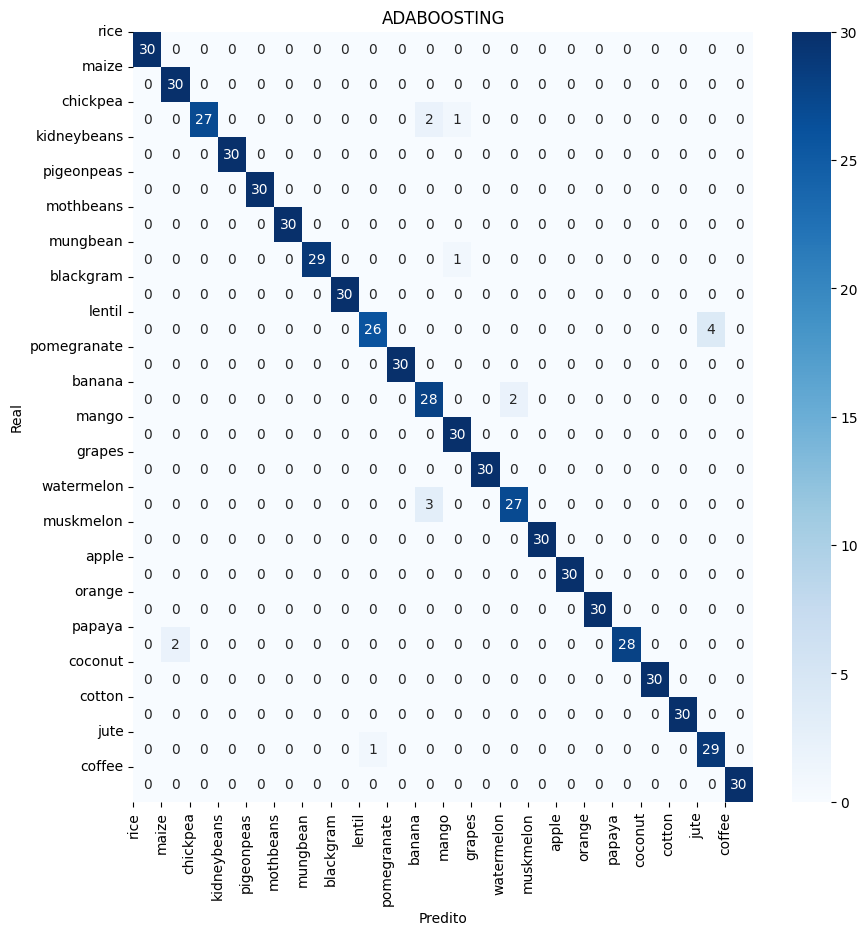

In [285]:
# Matriz de confusão
cm = confusion_matrix(y_test, predicted_values)

# Plot da matriz de confusão usando seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('ADABOOSTING')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes, rotation=0)
plt.show()

VIII.ii- Gradient Boosting

In [286]:
# Predizendo os valores do modelo GRADIENTBOOSTING e adicionando os valores de Accuracy na liesta acc_teste
predicted_values = gdb_clf.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc_teste.append(x)
model_teste.append('GRADIENTBOOSTING')
print("GRADIENTBOOSTING's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

GRADIENTBOOSTING's Accuracy is:  0.9636363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       0.97      1.00      0.98        30
   blackgram       0.97      1.00      0.98        30
    chickpea       0.83      1.00      0.91        30
     coconut       1.00      0.90      0.95        30
      coffee       0.79      1.00      0.88        30
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        30
        jute       0.94      1.00      0.97        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.93      0.90      0.92        30
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.91      0.67      0.77        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      

In [287]:
#Adicionando as classes preditas pelo modelo GRADIENTBOOSTING no dataframe df_predict
df_predict['GRADIENTBOOSTING'] = predicted_values
df_predict.head()

Real Logistic Regression          SVM          KNN Decision Tree  \
381   kidneybeans         kidneybeans  kidneybeans  kidneybeans   kidneybeans   
552     mothbeans           mothbeans    mothbeans    mothbeans     mothbeans   
768     blackgram           blackgram    blackgram    blackgram     blackgram   
2081         jute                jute         jute         jute          jute   
2055         jute                jute         jute         jute          jute   

     Random Forest       Voting  Bagging_SVM Bagging_DecisionTree  \
381    kidneybeans  kidneybeans  kidneybeans          kidneybeans   
552      mothbeans    mothbeans    mothbeans            mothbeans   
768      blackgram    blackgram    blackgram            blackgram   
2081          jute         jute         jute                 jute   
2055          jute         jute         jute                 jute   

      ADABOOSTING GRADIENTBOOSTING  
381   kidneybeans      kidneybeans  
552     mothbeans        mothbeans  
768        lentil        blackgram  
2081         jute             jute  
2055         jute             jute

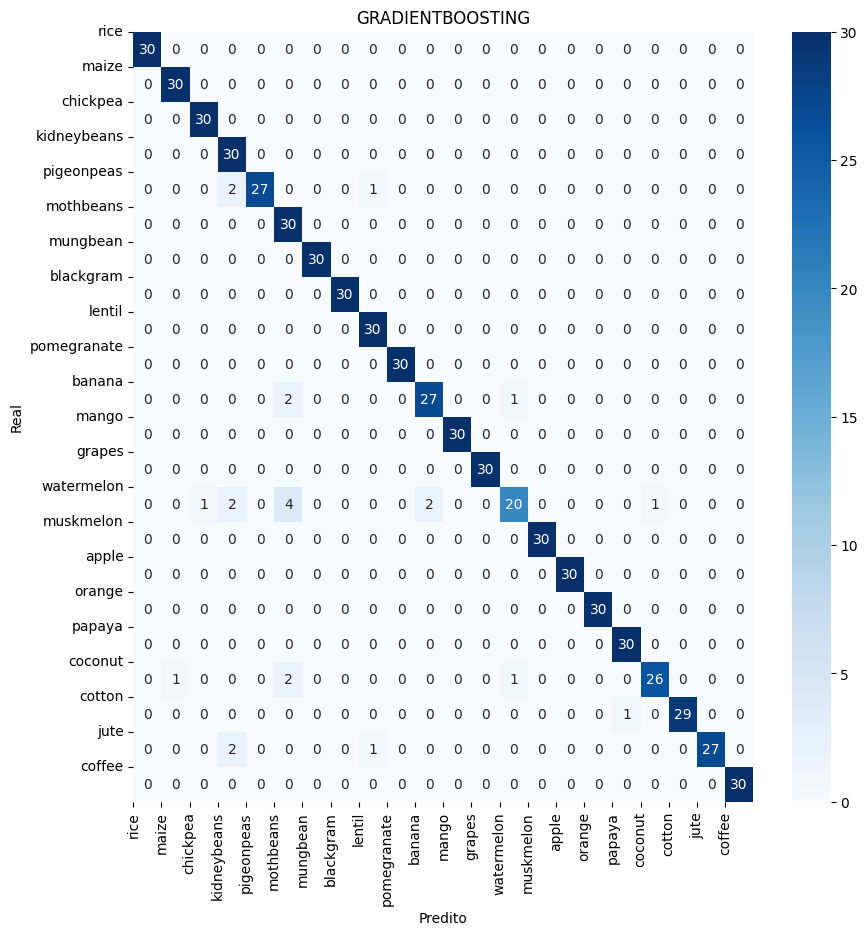

In [288]:
# Matriz de confusão
cm = confusion_matrix(y_test, predicted_values)

# Plot da matriz de confusão usando seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('GRADIENTBOOSTING')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes, rotation=0)
plt.show()

VIII.iii- XGBOOST

In [289]:
from sklearn.preprocessing import LabelEncoder

#transformar as labels do modelo no formato num para entrada do Xgboost
# Criar o codificador de rótulos
label_encoder = LabelEncoder()

# Codificar as classes para valores numéricos inteiros
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded =label_encoder.fit_transform(y_test)

print(y_train_encoded)
print(y_test_encoded)

[10  1  9 ...  9  9  9]
[ 9 13  2  8  8  9 17 12  5 11 20 17  4 16 12  1 10  3  2  6 12 15  1  9
 18 17  8 12  9  7 13  8 14 19 13 20  9  6  2  7 13  0  4 21  6  9 11  3
 16  6 12  9 15 10  0  1  0 11  1  4 10  3  1 18  4 20 18 17  5 20 16 21
  5  1  3  8 15 18 11  2  7  6  7 16  3  2 18 20  5  4 10 21  7  7  1  7
  0 19 14 17  8  1  5 15 18  3  7 21 19 17 16 13 19  7  8 21 12 20  6 13
 14 18 16  7 15 12  4  6 13  3 19 19 16  9  9 20 14 21 18  0 11 12 16  5
 17  5  8  7 12 16  8  9 15 19  9 10 10 17 19  9 11 10  2  4 16 15  5  9
 10 21 20  3  7 13  0 21 21 18 14  8  5 17 11  8  8  1 13  3 11  4  2 18
  5 17 12 21 15 15 21 15  0  2 16 13 21 19  4 20 15 11  9 15 14  0 11 12
  9 19 13  0  7 21  4  6 14 10 10  6 18 11  7 21 14 14 18 18 20 11 19  2
  1 12  3  3 18 12 17  1 19  3  4  4  4  0 14  2  1 11 21 16 21 19 12  2
 15 11  0 15  0  5  3  4 16  9  2  6 13  7  0 15 12 19 16 13 20  8  2  1
  4 11  3 20  2  6  6 13  5 14 19  2 16 20  8  2 16  2 17  8 10  4  5  0
  6  3 13 20  6  2  2  9  1

In [290]:
# Predizendo os valores do modelo GRADIENTBOOSTING e adicionando os valores de Accuracy na liesta acc_teste
predicted_values = xgb_clf.predict(X_test)
x = metrics.accuracy_score(y_test_encoded, predicted_values)
acc_teste.append(x)
model_teste.append('XGBOOST')
print("XGBOOST's Accuracy is: ", x)

print(classification_report(y_test_encoded,predicted_values))

XGBOOST's Accuracy is:  0.9787878787878788
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       0.97      1.00      0.98        30
           2       0.97      1.00      0.98        30
           3       1.00      1.00      1.00        30
           4       1.00      0.90      0.95        30
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        30
           7       1.00      0.93      0.97        30
           8       0.94      0.97      0.95        30
           9       1.00      1.00      1.00        30
          10       1.00      0.93      0.97        30
          11       1.00      0.97      0.98        30
          12       1.00      1.00      1.00        30
          13       0.97      1.00      0.98        30
          14       0.94      1.00      0.97        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00     

In [291]:
#Adicionando as classes preditas pelo modelo GRADIENTBOOSTING no dataframe df_predict
df_predict['XGBOOST'] = label_encoder.inverse_transform(predicted_values)
df_predict.head()

Real Logistic Regression          SVM          KNN Decision Tree  \
381   kidneybeans         kidneybeans  kidneybeans  kidneybeans   kidneybeans   
552     mothbeans           mothbeans    mothbeans    mothbeans     mothbeans   
768     blackgram           blackgram    blackgram    blackgram     blackgram   
2081         jute                jute         jute         jute          jute   
2055         jute                jute         jute         jute          jute   

     Random Forest       Voting  Bagging_SVM Bagging_DecisionTree  \
381    kidneybeans  kidneybeans  kidneybeans          kidneybeans   
552      mothbeans    mothbeans    mothbeans            mothbeans   
768      blackgram    blackgram    blackgram            blackgram   
2081          jute         jute         jute                 jute   
2055          jute         jute         jute                 jute   

      ADABOOSTING GRADIENTBOOSTING      XGBOOST  
381   kidneybeans      kidneybeans  kidneybeans  
552     mothbeans        mothbeans    mothbeans  
768        lentil        blackgram    blackgram  
2081         jute             jute         jute  
2055         jute             jute         jute

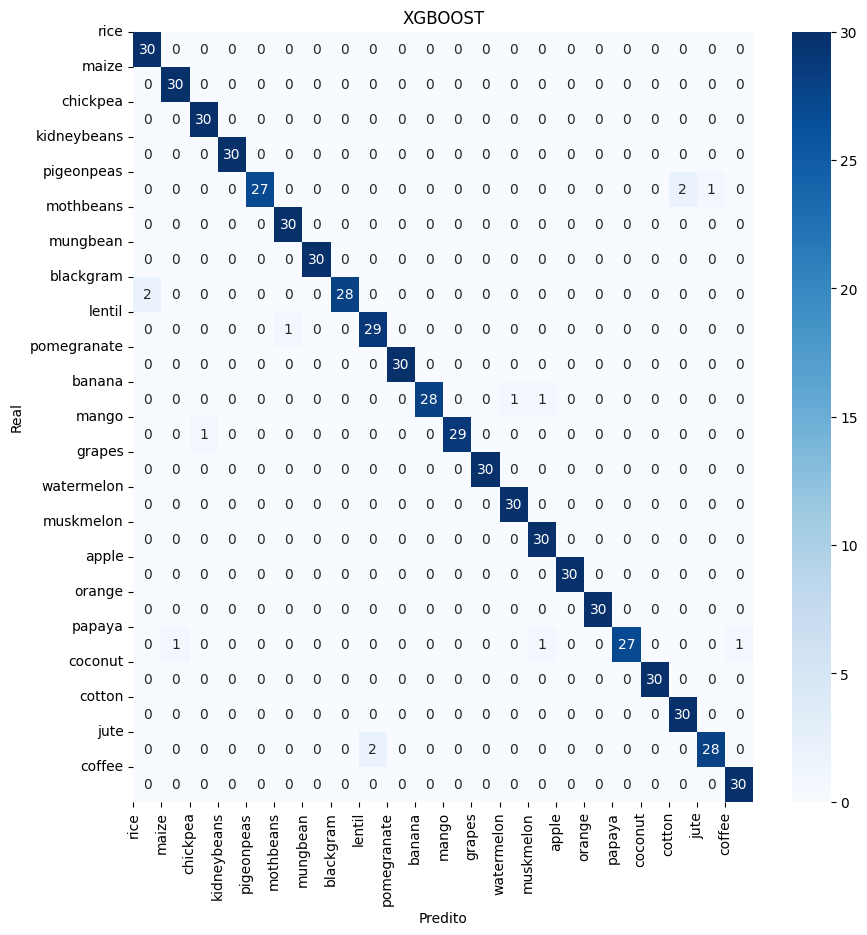

In [292]:
# Matriz de confusão
cm = confusion_matrix(label_encoder.inverse_transform(y_test_encoded), label_encoder.inverse_transform(predicted_values))

# Plot da matriz de confusão usando seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('XGBOOST')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes, rotation=0)
plt.show()

# V. AVALIAÇÃO DOS MODELOS

## ACCURACY

* Treino

In [293]:
model_treino

['Logistic Regression',
 'SVM',
 'KNN',
 'Decision Tree',
 'Random Forest',
 'Voting',
 'Bagging_SVM',
 'Bagging_DecisionTree',
 'ADABOOSTING',
 'GRADIENTBOOSTING',
 'XGBOOST']

In [300]:
# Criando um dataframe df_treino_acc para receber os valores de acurácia dos modelos para os dados de treinamento
df_treino_acc = pd.DataFrame(model_treino, columns=['Modelo'])
df_treino_acc['Accuracy'] = acc_treino

# Ordenando o DataFrame com base na coluna "Accuracy" em ordem crescente
df_treino_acc = df_treino_acc.sort_values(by='Accuracy', ascending= False)

# Redefinindo o valor dos índices após a ordenação
df_treino_acc.reset_index(drop=True, inplace=True)
df_treino_acc

Modelo  Accuracy
0       GRADIENTBOOSTING  1.000000
1          Random Forest  1.000000
2          Decision Tree  1.000000
3            ADABOOSTING  1.000000
4                XGBOOST  0.996104
5                 Voting  0.992208
6   Bagging_DecisionTree  0.990260
7                    SVM  0.988312
8                    KNN  0.981818
9    Logistic Regression  0.974675
10           Bagging_SVM  0.951299

In [301]:
acc_treino= df_treino_acc['Accuracy']
model_treino= df_treino_acc['Modelo']

C:\Users\Pichau\AppData\Local\Temp\ipykernel_23568\515274361.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acc_treino, y=model_treino, palette='dark')


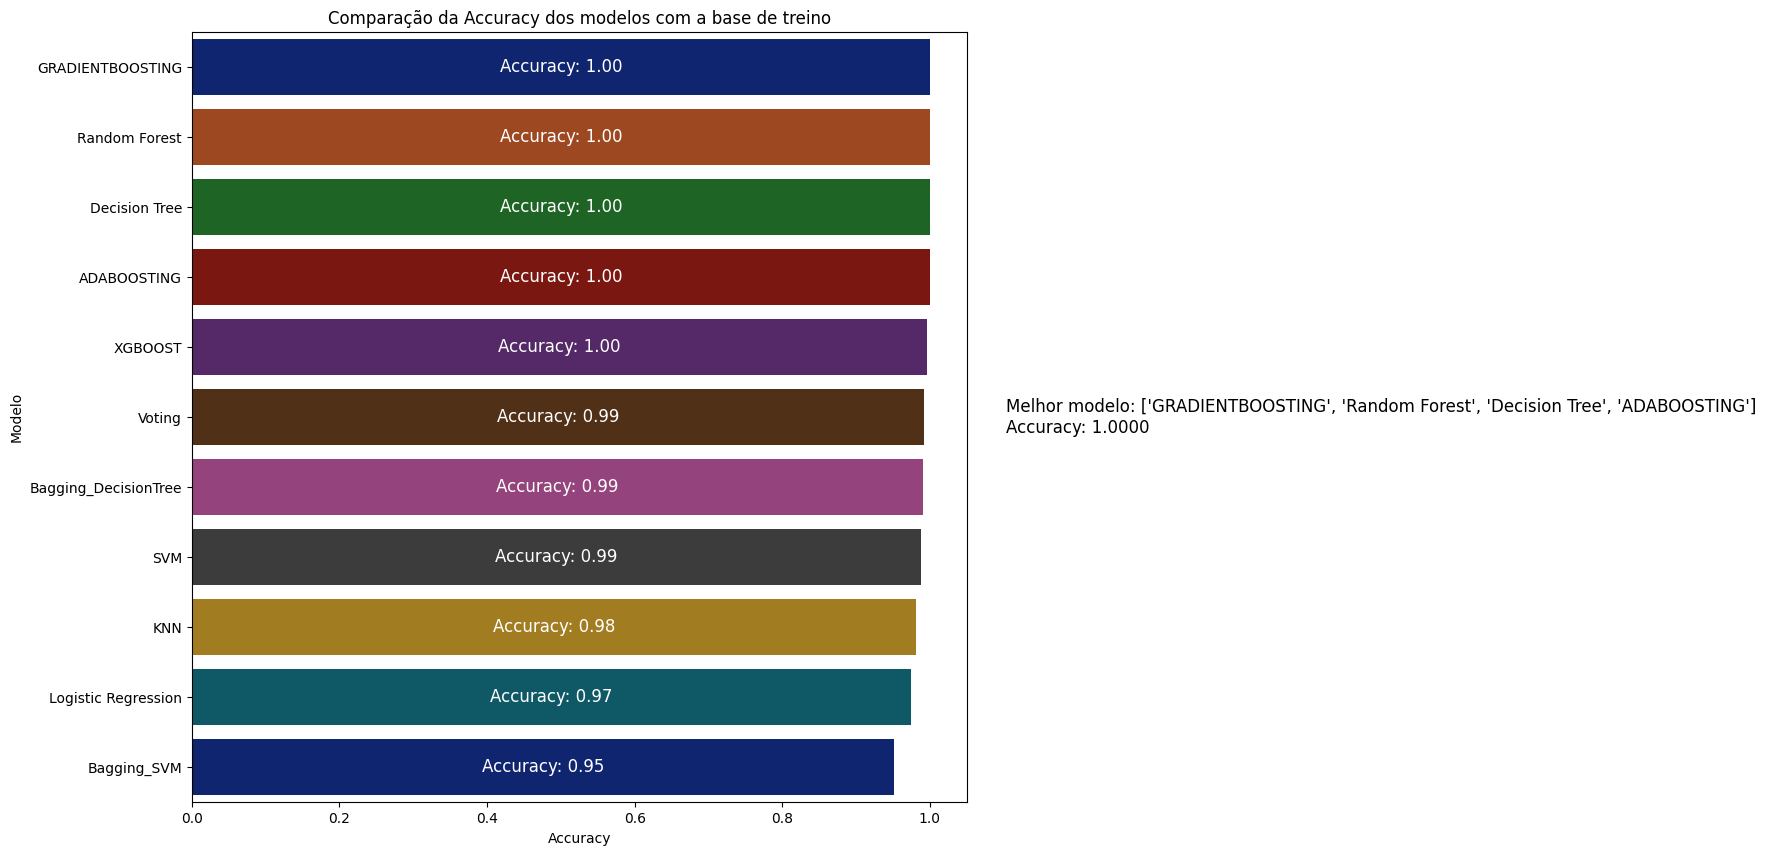

In [303]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plot dos dados de acurácia
plt.figure(figsize=[10, 10], dpi=100)
plt.title('Comparação da Accuracy dos modelos com a base de treino')
plt.xlabel('Accuracy')
plt.ylabel('Modelo')
sns.barplot(x=acc_treino, y=model_treino, palette='dark')

# Adicionar o texto "Accuracy: Acuracia" no meio das barras com a fonte em branco
for idx, acc in enumerate(acc_treino):
    plt.text(acc/2, idx, f'Accuracy: {acc:.2f}', fontsize=12, ha='center', va='center', color='white')

# Identificar o(s) modelo(s) com a maior acurácia
best_accuracy = max(acc_treino)
best_models = [model for model, acc in zip(model_treino, acc_treino) if acc == best_accuracy]



# Adicionar a anotação fora da área de plotagem
annotation_text = f"Melhor modelo: {best_models}\nAccuracy: {best_accuracy:.4f}"
plt.annotate(annotation_text, xy=(1.05, 0.5), xycoords='axes fraction', fontsize=12, va='center')

plt.show()


* Teste

In [304]:
# Criando um dataframe df_treino_acc para receber os valores de acurácia dos modelos para os dados de teste
df_teste_acc = pd.DataFrame(model_teste, columns=['Modelo'])
df_teste_acc['Accuracy'] = acc_teste

# Ordenando o DataFrame com base na coluna "Accuracy" em ordem crescente
df_teste_acc = df_teste_acc.sort_values(by='Accuracy', ascending= False)

# Redefinindo o valor dos índices após a ordenação
df_teste_acc.reset_index(drop=True, inplace=True)
df_teste_acc

Modelo  Accuracy
0          Random Forest  0.993939
1                 Voting  0.992424
2   Bagging_DecisionTree  0.989394
3                    SVM  0.983333
4                    KNN  0.978788
5                XGBOOST  0.978788
6          Decision Tree  0.978788
7            ADABOOSTING  0.975758
8    Logistic Regression  0.972727
9       GRADIENTBOOSTING  0.963636
10           Bagging_SVM  0.950000

In [305]:
acc_teste=df_teste_acc['Accuracy']
model_teste=df_teste_acc['Modelo']

C:\Users\Pichau\AppData\Local\Temp\ipykernel_23568\3311289955.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acc_teste, y=model_teste, palette='dark')


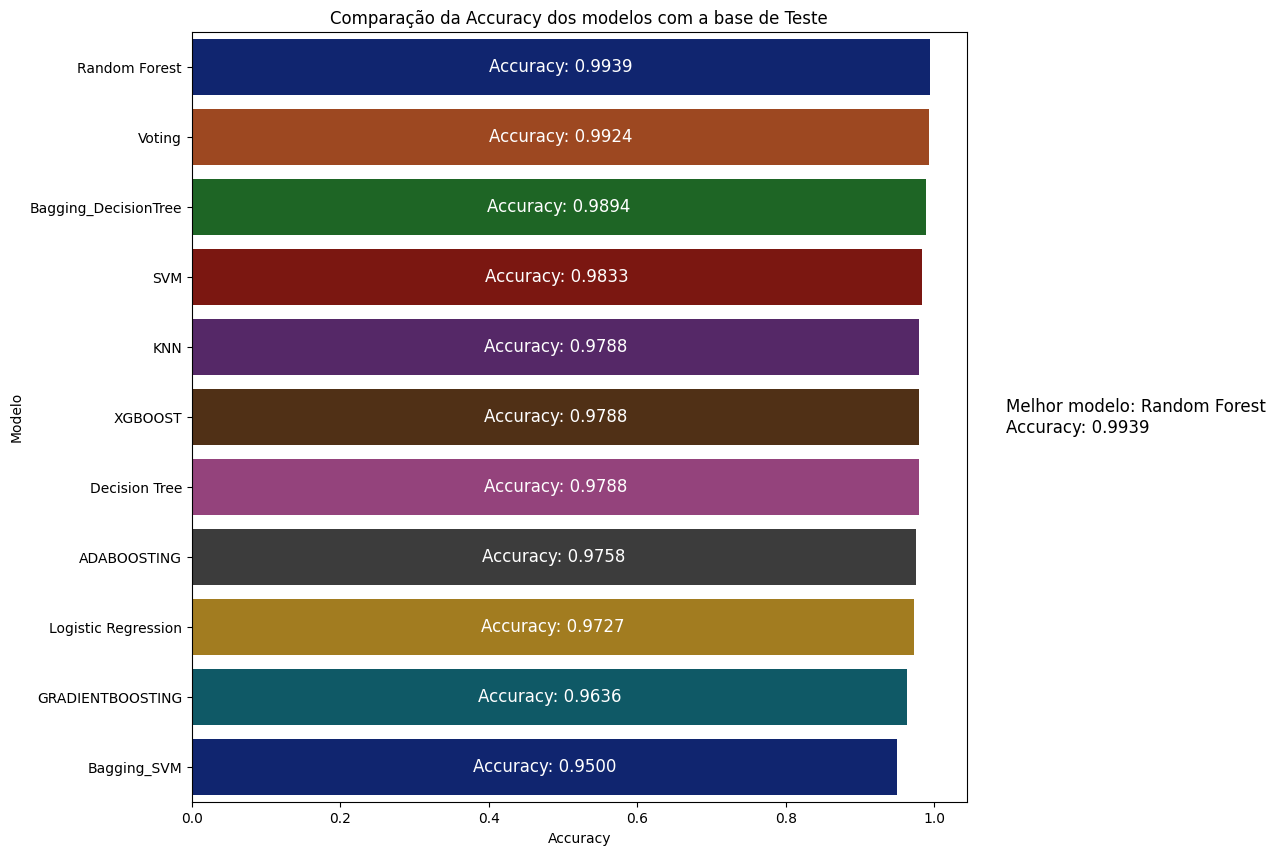

In [306]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plot dos dados de acurácia
plt.figure(figsize=[10, 10], dpi=100)
plt.title('Comparação da Accuracy dos modelos com a base de Teste')
plt.xlabel('Accuracy')
plt.ylabel('Modelo')
sns.barplot(x=acc_teste, y=model_teste, palette='dark')

# Adicionar o texto "Accuracy: Acuracia" no meio das barras com a fonte em branco
for idx, acc in enumerate(acc_teste):
    plt.text(acc/2, idx, f'Accuracy: {acc:.4f}', fontsize=12, ha='center', va='center', color='white')

# Identificar o(s) modelo(s) com a maior acurácia
best_accuracy = max(acc_teste)
best_models = [model for model, acc in zip(model_teste, acc_teste) if acc == best_accuracy]


# Adicionar a anotação fora da área de plotagem
annotation_text = f"Melhor modelo: {best_models[0]}\nAccuracy: {best_accuracy:.4f}"
plt.annotate(annotation_text, xy=(1.05, 0.5), xycoords='axes fraction', fontsize=12, va='center')

plt.show()


### VI. Salvando o modelo

In [307]:
from joblib import dump, load
# Salve o modelo em um arquivo
dump(rf_clf, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [311]:
model_loaded = load('random_forest_model.joblib')


In [312]:
crop_recomendation.head()

NameError: name 'crop_recomendation' is not defined

In [341]:
# Separando a variável dependente do resto do dataset
X = crop_recomendation.drop('label', axis=1)  # Recursos (características)
colunas= X.columns
## Padronizando os dados das variaveis independentes
## Como temos dados com valores em escalas numericas diferentes, para evitarmos o efeito da escala da variável influenciar no modelo realizamos a Normalização dos dados
## Pra a Normalização foi utilizado o método de standar scaler que normaliza os dados a partir da média e o desvio padrão dos dados.
scaler = preprocessing.StandardScaler()
X_df = scaler.fit_transform(X)

In [342]:
data ={ 'N':[78],	
        'P':[42],
        'K':[43],	
        'temperature':[20.8],	
        'humidity':[82.0],	
        'ph':[6.5],	
        'rainfall':[202.93]

}

dados_area= pd.DataFrame(data)
colunas= dados_area.columns

In [343]:
dados_area = scaler.transform(dados_area)
dados_area=pd.DataFrame(dados_area, columns=columns)
dados_area.head()

N         P         K  temperature  humidity        ph  rainfall
0  0.743673 -0.344551 -0.101688    -0.951338  0.472543  0.039444   1.81026

In [344]:

# Use o modelo carregado para fazer previsões
predictions = model_loaded.predict(dados_area)

In [345]:
predictions

array(['rice'], dtype=object)

### VII. Avaliação do Modelo:

* No presente projeto buscou-se a construção de um pipeline de modelos de machine learning completo.

* Para a execução do projeto utilizou-se o dataset What crop grow do Kaggle, que constitui em um dataset com 2200 observações e 8 variaveis (N, P, k, ph, umidity, temperature, rainfall e um label correspondente a uma cultura agrícloa). O dataset busca correlacionar as características de um ambiente de produção e uma cultura de modo que possamos determinar o melhor ambiente de produção para uma cultura ou descobrirmos qual a melhor cultura a ser cultivada em deteminado ambiente.

* Assim, o presente projeto teve por objetivo aplicar os algoritmos de classificação vistos em aula para realizar a predição e recomendação da cultura a ser plantada com  base nas características dos Macronutrientes(N, P, K), pH, umidade do solo, temperatura e chuva.

* Foram construidos ao todo 10 modelos de classificação.

    * I- Regressão Logística
    * II- SVM
    * III- KNN
    * IV- Arvores de decisão
    * V- Random Forest
    * VI- Votting
    * VII- Bagging
      * VII.i - Bagging SVM
      * VII.ii - Bagging DecisionTree
    * VIII- XGBoost
      * VIII.i- ADABoost
      * VIII.ii- GradientBoost
      * VIII.iii - XGBOOST

* Para a aplicação dos modelos foram realizadas algumas etapas de processamento dos dados como:
  * Separação das variaveis independentes da variável dependente
  * Divisão do dataset em bases de treino e teste
  * Estratificação dos dados de acordo com as classes de modo a mantermos o balanceamento das classes nas bases de treino e teste.
  * Normalização dos dados


* Utilizou-se o mlflow juntamente com o dagshub para o controle do ambiente dos modelos permitindo que tenhamos um repositório dos nossos modelos e também maior controle dos parâmetros e métricas de cada modelo.

* Para a Avaliação do modelo, foi utilizada a métrica de Accuracy obtida a partir dos dados preditos para o modelo a partir da base de teste.

* Dentre os modelos utilizados, o modelo de Random Forest foi o modelo que apresentou maior valor de Accuracy = 99,39%. O valor obtido pelo modelo Random Forest foi maior que o obtido no notenook do Kaggle (Accuracy = 99,31%) obtido com o modelo XGBoost e até maior que o modelo de Random Forest ( Accuracy = 99,09%)

* No presente trabalho tentou-se aplicar o modelo XGBoost, mas devido a um erro no mlflow não foi possível aplicar e avaliar o modelo.

* Como o modelo do Random Forest apresentou bom desempenho com os parâmetros selecionados e o resultado foi melhor que o apresentado na proposta original não me preocupei em melhorar o desempenho do modelo e dos demais modelos por momento antes da entrega, mas pretendo fazer a melhoria dos modelos depois.

Portanto, tendo em vista o objetivo do trabalho, foi realizado um pipeline de modelos de machine learning em que foram avaliados o desempenho 10 modelos de machine learning. Dentre os modelos, o Random Forest apresentou o melhor desempenho nas bases de teste, apresentando uma Accuracy de 99,39%, sendo essa maior que a apresentada na proposta original do Kaggle Accuracy = 99,31% obtida com o modelo XGBoost. Para análises futuras no mesmo dataset, pretendo realizar a melhoria dos modelos, fazendo para cada um deles uma otimização dos parametros, de modo a aumentar os valores de Accuracy.

### VIII. Aplicação: recomendacao_app.py

Para o desenvolvimento do sistema, foi desenvolvida uma aplicação utilizando o streamlit, na qual o usuário informa os valores de Nitrogênio(N), Fósforo(P), Potássio(K), Tempetatura(ºC), Umidade(%), pH e precipitação e o sistema retorna qual a cultura indicada para as condições informadas pelo usuário.


A aplicação esta disponível no arquivo recomendacao.py

Para o uso correto da aplicação, as seguintes bibliotecas devem ser instaladas: 
* streamlit
* os
* time
* joblib 
* pandas
* sklearn 
* numpy 

Os seguintes arquivos devem estar presentes:
* recomendacao_app.py (aplicação)
* random_forest_model.joblib (modelo no formato .joblib)
* Crop_recommendation.csv (base de dados)


Para executar a aplicação digite o seguinte comando no terminal do visual estudio:
streamlit run recomendacao_app.py

OBS: A aplicação ainda está em desenvolvimento.. Portanto é possível que hajam pequenos erros a serem corrigidos!
